# Start - figs for roots model

In [91]:
rootsdir = '/Users/user/Documents/Ox/roots/'
orootsdir = '/Users/user/Documents/Ox/roots/roots-model/'

# modelpwy='final_roots_model.xml'
modelpwy='tissue_dnut_model.xml'
# modelpwy='roots_model-1-1-1.xml'
from cobra import io
rmodel=io.read_sbml_model(orootsdir+modelpwy)
from build_roots_model import *
# rootspFBAobj(rmodel2)

KeyboardInterrupt: 

In [ ]:
print(rmodel.reactions.get_by_id('Nitrate_ec_epi00').lower_bound,rmodel2.reactions.get_by_id('Nitrate_ec_epi00').lower_bound)
print(rmodel.reactions.get_by_id('Nitrate_ec_epi00').upper_bound,rmodel2.reactions.get_by_id('Nitrate_ec_epi00').upper_bound)1.1258879399177 

In [ ]:
rmodel2.remove_reactions([rxn for rxn in rmodel2.reactions if 'CARBON_DIOXIDE_c_' in rxn.id and 'apoplast_' in rxn.id])
io.write_sbml_model(rmodel2,rootsdir+modelpwy)

In [ ]:
[rxn.id+': '+str(rxn.reaction) for rxn in rmodel2.reactions if '_ap' in rxn.id]

In [ ]:
# rmodel2.reactions.NITRATE_c_epi00_apoplast_loading_ap1
# [rxn.reaction for rxn in rmodel.metabolites.PROTON_ap1.reactions]
for met in rmodel.metabolites:
    if '_ap' in met.id:
        print(met.id)

In [ ]:
rmodel.reactions.CYS_ph_c_per00

In [ ]:
for rxn2 in rmodel2.reactions:
    if rxn2.id in rmodel.reactions:
        rxn=rmodel.reactions.get_by_id(rxn2.id)
        if rxn.lower_bound!=rxn2.lower_bound:
            print('Lb mismatch: ',rxn.id)
        if rxn.upper_bound!=rxn2.upper_bound:
            print('Ub mismatch: ',rxn.id)
        if set([met.id for met in rxn.metabolites]).difference([met.id for met in rxn2.metabolites]):
            print('Met mismatch: ',rxn.reaction)
            print(rxn2.reaction)
    else:
        if 'apoplast' not in rxn2.id:
            print('Not in rmodel: ',rxn2.id)

In [ ]:
for rxn in rmodel2.reactions:
    if '_apoplast_loading_ap1' in rxn.id:
        print(rxn.id)

In [ ]:
rmodel.reactions.ATPase_tx_per00.lower_bound=0
tempsol=pfba(rmodel)

In [ ]:
print(tempsol['ATPase_tx_per00'])
for rxn in rmodel.reactions:
    if 'CO2_tx_' in rxn.id:
        print(tempsol[rxn.id],rxn.id)

In [ ]:
rxn=rmodel.reactions.EX_X_PROTON_ph_per00
rxn.add_metabolites({phloem_ratio_met:-0.7})

In [ ]:
for rxn in rmodel.reactions:
    if 'Biomass_expanding_cell' in rxn.id:
        print(rxn.id,sol[rxn.id],rxn.reaction)
# for rxn in rmodel.reactions:
#     if 'PHOSPHATIDATE' in rxn.id:
#         print(rxn.id,sol[rxn.id])
# for rxn in rmodel.reactions:
#     if 'Protein_b' in rxn.id:
#         print(rxn.id,sol[rxn.id])

In [ ]:
rmodel=rmodel2.copy()

In [ ]:
# Remove phloem metabolites not listed and add ratio constraint to remaining phloem mets
ph_ratios = pd.read_csv(rootsdir+'Phloem_composition_z_maize.csv')
rmodel.remove_reactions([rxn for rxn in rmodel.reactions if 'EX_X_' in rxn.id and '_ph_' in rxn.id and not any([x in rxn.id for x in list(ph_ratios['met_id'])+['PROTON']])])
phloem_ratio_met=Metabolite('phloem_ratio_met')
rxn=rmodel.reactions.EX_X_SUCROSE_ph_per00
rxn.add_metabolites({phloem_ratio_met:-0.3})
for rxn in rmodel.reactions:
    if 'EX_X_' in rxn.id and '_ph_' in rxn.id and not any([x in rxn.id for x in ['EX_X_SUCROSE_ph_per00','PROTON']]):
        print(rxn.id)
        rxn.add_metabolites({phloem_ratio_met:0.7})


In [ ]:
print(maintsol['Phloem_carbon_import'],lactsol['Phloem_carbon_import'])

In [ ]:
for rxn in rmodel.reactions:
    if 'unlP' in rxn.id and (maintsol[rxn.id]!=0 or lactsol[rxn.id]):
        print(maintsol[rxn.id],lactsol[rxn.id],rxn.id)

In [ ]:
sol2=rmodel2.optimize()
print(sol2['EX_X_SUCROSE_ph_per00'],sol2['CO2_tx_epi00'],sol2['Phloem_carbon_import'])

In [ ]:
# sol=rmodel.optimize()
print(sol['EX_X_SUCROSE_ph_per00'],sol['CO2_tx_epi00'],sol['Phloem_carbon_import'])

In [ ]:
metlist=[met for met in rmodel.reactions.Phloem_import_reaction.metabolites]
rxn=rmodel.reactions.Phloem_import_reaction
for met in metlist:
    if 'ARG_ph_per00' in met.id:
        print(met.id)
        rxn.add_metabolites({met.id:-rxn.get_coefficient(met.id)})

In [ ]:
rmodel.reactions.Phloem_import_reaction.reaction

In [ ]:
rmodel.reactions.EX_X_SUCROSE_ph_per00.upper_bound=1000
rmodel.reactions.Phloem_import_reaction.lower_bound=0
rmodel.objective='Phloem_import_reaction'
rmodel.solver='gurobi'
sol=rmodel.optimize()
print(sol['CO2_tx_epi00'],sol['Phloem_import_reaction'])

In [ ]:
ph_carbon_restr.upper_bound=1000
carbonobj=tissue_model.problem.Objective(ph_carbon_restr.forward_variable,
        direction='min')
tissue_model.objective=carbonobj
solution = flux_analysis.parsimonious.pfba(tissue_model)

In [ ]:
print(solution['Phloem_carbon_restriction'])

In [ ]:
exsum=0
for rxn in rmodel.reactions:
    if 'EX_X' in rxn.id and 'ph' in rxn.id and solution[rxn.id]!=0:
        print(solution[rxn.id],rxn.id)
        exsum+=solution[rxn.id]
print(exsum,solution['EX_X_SUCROSE_ph_per00']/exsum)

In [ ]:
rxn=rmodel.reactions.EX_X_CYS_ph_per00
for met in rxn.products:
    print(met.id,met.formula)
    metformula=met.formula
    if metformula:
        print([x for x in range(len(metformula)) if metformula[x].isdigit()])
        formula_digits=[x for x in range(len(metformula)) if metformula[x].isdigit()]
        print(metformula.index('C'))
        cind = metformula.index('C')
        cnext = [x for x in formula_digits if x>cind+1]
        print(int(metformula[(cind+1):(cnext[0]-1)]))

In [ ]:
def count_carbon(met):
    carbons=0
    metformula=met.formula
    if metformula and 'C' in metformula:
        formula_nondigits=[x for x in range(len(metformula)) if not metformula[x].isdigit()]
        cind = metformula.index('C')
        cnext = [x for x in formula_nondigits if x>cind+1]
        carbons = int(metformula[(cind+1):(cnext[0])])
    return carbons

In [ ]:
rxn.id

In [ ]:
# Add phloem carbon import restriction
ph_rxns = [rxn for rxn in tissue_model.reactions if 'EX_X' in rxn.id and '_ph_' in rxn.id]
carboncountmet = Metabolite('Phloem_carbon_in')
for rxn in ph_rxns:
    carbon_translocated = sum([count_carbon(met) for met in rxn.products])
    rxn.add_metabolites({carboncountmet:carbon_translocated})
ph_carbon_restr = Reaction('Phloem_carbon_restriction')
tissue_model.add_reaction(ph_carbon_restr)
ph_carbon_restr.add_metabolites({carboncountmet:-3.79682498})
ph_carbon_restr.upper_bound=1
ph_carbon_restr.lower_bound=0

In [ ]:
for rxn in rmodel.reactions:
    if 'LACTATE_' in rxn.id and solution[rxn.id]!=0:
        print(solution[rxn.id],rxn.id)

In [ ]:
exsum=0
for rxn in rmodel.reactions:
    if 'EX_X' in rxn.id and 'ph' in rxn.id and solution[rxn.id]!=0:
        print(solution[rxn.id],rxn.id)
        exsum+=solution[rxn.id]
print(exsum,solution['EX_X_SUCROSE_ph_per00']/exsum)

In [ ]:
tissue_model.reactions.EX_X_4_AMINO_BUTYRATE_ph_per00.upper_bound=0
solution=flux_analysis.parsimonious.pfba(tissue_model)

In [ ]:
# ph_ratios = pd.read_csv(rootsdir+'Phloem_composition_z_maize.csv')
ph_mets = list(ph_ratios['met_id'])
ph_nums = list(ph_ratios['Oshima1990'])
ghostdict = {}
# for rxn in [rxn.id for rxn in rmodel.reactions if 'EX_X_' in rxn.id and 'per00' in rxn.id]:
#     if any([x in rxn for x in ph_mets]):
#         met = [x for x in range(len(ph_mets)) if ph_mets[x] in rxn][0]
#         ghostdict[rxn]=ph_nums[met]
for it,met in enumerate(ph_mets):
    ghostdict[met]=ph_nums[it]

In [ ]:
ghostdict.keys()

In [ ]:
plot_apo_transport2(rmodel,sol,ex_type='EX_X_',cell_type='ph_per00',thresh=1e-6,ybreak=0.15,savebool='ph_mod_v_oshima',ghost=ghostdict)

In [ ]:
def plot_apo_transport2(stem_model,psol,ex_type='_ec_',splitnum=2,cell_type='CC_l',thresh=5e-5,yscale=None,fva_sol_min=None,fva_sol_max=None,rangeplot=None,exclude_rxns=[],ybreak=None,savebool=None,ymax=0,ghost=None):
    if not rangeplot:
        labels=[rxn.id for rxn in stem_model.reactions if ((cell_type in rxn.id)and(ex_type in rxn.id)and abs(psol[rxn.id])>thresh)and not any([x in rxn.id for x in exclude_rxns])]
    else:
        labels=[rxn for rxn in list(fva_sol_min.keys()) if ((cell_type in rxn.id)and(ex_type in rxn.id)and (abs(fva_sol_min[rxn])>thresh or abs(fva_sol_max[rxn])>thresh))and not any([x in rxn for x in exclude_rxns])]
    labels = sorted(labels, key=lambda x: x[-1:-5:-1],reverse=True)
    data1=[psol[rxn] for rxn in labels]
    if ghost:
        sucrxn = [rxn for rxn in labels if 'SUCROSE' in rxn][0]
        sucval = psol[sucrxn]
    if rangeplot:
        datamax = [round(fva_sol_max[rxn]-psol[rxn],4) for rxn in labels]
        datamin = [round(psol[rxn]-fva_sol_min[rxn],4) for rxn in labels]
#         print(labels)
#         print(data1)
#         print(datamax)
#         print(datamin)
    labels = ['_'.join(x.split('_')[2:-splitnum]) for x in labels]
    width=0.6
    
    if ybreak:
        fig,(ax,ax2) = plt.subplots(2,1, sharex=True)
    plt.xticks(range(len(data1)), labels,rotation='vertical')
    if ybreak:
        ax.bar(np.arange(len(data1)), data1, width=width)
        ax2.bar(np.arange(len(data1)), data1, width=width)
        if ghost:
            normaliser = sucval/ghost['SUCROSE']
            ghostdata=[ghost[rxn]*normaliser if rxn in ghost.keys() else 0 for rxn in labels]
            # print(normaliser,ghost['SUCROSE'],sucval)
            # print(labels)
            # print(ghostdata)
            # print(data1)
            ax.bar(np.arange(len(data1)), ghostdata, width=width,color='none',edgecolor='grey',linestyle='--')
            ax2.bar(np.arange(len(data1)), ghostdata, width=width,color='none',edgecolor='grey',linestyle='--')
        ax2.set_ylim(0,ybreak)
        min2 = min([x for x in data1 if x>ybreak])
        max2 = max(1.05*max(data1),ymax)
        ax.set_ylim(0.95*min2,max2)
        ax2.spines['top'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.xaxis.tick_top()
        ax.tick_params(labeltop=False)
        ax2.xaxis.tick_bottom()
        
        d = .5  # proportion of vertical to horizontal extent of the slanted line
        kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
                      linestyle="none", color='k', mec='k', mew=1, clip_on=False)
        ax.plot([0, 1], [0, 0], transform=ax.transAxes, **kwargs)
        ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)
        ax.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
        ax2.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
        if rangeplot:
            ax.errorbar(np.arange(len(data1)),
                data1,
                yerr=[datamin,datamax], 
                fmt="o", markersize=1,color="grey",label='_nolegend_',capsize=5)
            ax2.errorbar(np.arange(len(data1)),
                data1,
                yerr=[datamin,datamax], 
                fmt="o", markersize=1,color="grey",label='_nolegend_',capsize=5)
            print(data1)
            print(datamin)
            print(datamax)
    else:
        plt.bar(np.arange(len(data1)), data1, width=width)
        plt.ylim(0,max(ymax,max(data1)))
        if rangeplot:
            plt.errorbar(np.arange(len(data1)),
                data1,
                yerr=[datamin,datamax], 
                fmt="o", markersize=1, color="grey",label='_nolegend_',capsize=5)
    # plt.bar(np.arange(len(data2))+ width, data2, width=width)
#     plt.legend(['apo ->'+cell_type])
    plt.ylabel(r'flux ($\mu$M/m$^2$/s)')
    
    if yscale:
        if not rangeplot and not any([x<-5e-5 for x in data1]):
            plt.ylim(0,min(100,yscale))
        else:
            plt.ylim(max(-80,-yscale),min(100,yscale))
    if savebool:
        now = datetime.now().strftime('%Y_%m_%d')
        plt.savefig('Figures/'+'apo_transport_'+savebool+now+'.png', bbox_inches='tight')
    plt.show()




In [ ]:
rmodel.reactions.get_by_id("ATPase_tx_per00").lower_bound=0.01
remphrxns=[rxn.id for rxn in rmodel.reactions if 'ph_c' in rxn.id]
for rxn in remphrxns:
    rmodel.remove_reactions([rxn])
    sol=rmodel.optimize()
    print(sol['CO2_tx_epi00'],rxn)
# sol=rmodel.optimize()
# print(sol['CO2_tx_epi00'],rxn)
# rxn=rmodel.reactions.Phloem_import_reaction



In [ ]:
import pandas as pd
from cobra import Reaction, Metabolite
rmodel=rmodel2.copy()
# Restrict phloem import
# Replace all ph_per reactions with phloem import reactions
rmodel.reactions.get_by_id("ATPase_tx_per00").lower_bound=0.01
phrxns=[rxn.id for rxn in rmodel.reactions if 'ph_c' in rxn.id]
ph_ratios = pd.read_csv(rootsdir+'Phloem_composition_z_maize.csv')
ph_mets = list(ph_ratios['met_id'])
ph_nums = list(ph_ratios['Oshima1990'])
ph_imp_rxn = Reaction('Phloem_import_reaction')
rmodel.add_reaction(ph_imp_rxn)
phsuffix = '_ph_per00'
persuffix = '_c_per00'
for ii in range(1,len(ph_nums)):
    if not any([ph_mets[ii]+phsuffix in met.id for met in rmodel.metabolites]):
        newmet = Metabolite(ph_mets[ii]+phsuffix,compartment='ph_per00',name=ph_mets[ii],formula=rmodel.metabolites.get_by_id(ph_mets[ii]+persuffix).formula)
        metinrxn = Reaction('EX_X_'+ph_mets[ii]+phsuffix)
        metinrxn.add_metabolites({newmet:1})
        rmodel.add_reaction(metinrxn)
        # print(adda)
    rmodel.remove_reactions([rxn for rxn in phrxns if ph_mets[ii] in rxn])
    ph_imp_rxn.add_metabolites({ph_mets[ii]+phsuffix:-ph_nums[ii],ph_mets[ii]+persuffix:ph_nums[ii]})
    sol=rmodel.optimize()
    print(sol['Phloem_import_reaction'],sol['CO2_tx_epi00'],[rxn for rxn in phrxns if ph_mets[ii] in rxn])


In [ ]:
def mapSink(cobra_model,sol,current_met='SUCROSE_c_SE_d',i_max=2,weighting=50,trav_mets=[],cell_trans=None,ends=None,arrow_labels=1,data=None,verbosep=None):
    now = datetime.now().strftime('%Y-%m-%d-%H-%M')
    f=Digraph('Sources:'+current_met+now,filename='Sources/'+current_met+now+'.gv',strict=True)
    f.attr(rankdir='LR',size='8,5')
    f.attr('node', shape='diamond',style='filled',fillcolor='darkgoldenrod1')
    f.node(current_met)
    f.attr('node', shape='circle',style='filled',fillcolor='white')
    ignore_mets=['ATP_','aATP_','ADP_','aADP_','AMP_','WATER_','PROTON_','NADPH_','NADH_','NADP_','NAD_','ATPase_NADPHoxidase_constraint_','Pi_','aPi_','Protein_processing_cost','Protein_polymerisation_cost','Protein_translocation_cost','CARBON_CC','CARBON_MC','UBIQUIN','AMMONIUM_','PPI_','Phloem_contri','sucrose_to_be','CARBON_DIOXIDE_']
    ignore_rxns=[]
    trav_mets=mapSinkRec(f,current_met,cobra_model,sol,0,ignore_mets,ignore_rxns,i_max,weighting,cell_trans,ends,arrow_labels,data,verbosep)
    print(trav_mets)
    f.view()
    return f

def mapSinkRec(f,current_met,cobra_model,sol,i=0,trav_mets=[],trav_rxns=[],i_max=2,weight_mult=50,cell_trans=None,ends=None,arrow_labels=1,data=None,verbosep=None):
    if i>i_max-1:
        return ''
    i=i+1
    ig_rxns=[]
    colours=['azure3','royalblue','deeppink4','red','forestgreen','darkorchid','lightseagreen','orange']
    gltmets=['GLT_','2_KETOGLUTARATE_']
    for rxn in [x for x in cobra_model.metabolites.get_by_id(current_met).reactions if sol[x.id]*x.get_coefficient(current_met)<0]:
        if abs(sol[rxn.id])>1e-5:
#                 print(str(i)+': '+rxn.id)
            if rxn.get_coefficient(current_met)<0:
#                 print(rxn.id,rxn.reaction)
                mets=rxn.products
                if any([x in current_met for x in gltmets]) and any([x in met.id for x in gltmets for met in mets]):
                    mets=[met for met in mets if any([x in met.id for x in gltmets])]
                for met in mets:
                    if verbosep:
                         print(met.id)
                    cont = 1
                    if 1:#not (any([x in rxn.id for x in ['_pc_','_mc_','_xc_','_vc_']]) and met.id.split('_')[-3]==current_met.split('_')[-3]):
                        if any(x in met.id for x in trav_mets):
                            if ends:
                                cont=0
                            else:
                                continue
                        if any(x in rxn.id for x in trav_rxns):
                            cont=0
#                             print(met.id,'end')
                        this_width=min(weight_mult*abs(sol[rxn.id]*rxn.get_coefficient(current_met)),60)
                        this_edge=str(max(this_width,.5))
                        this_arrow=str(min(max(this_width/20,0.5),10))
                        if 'dielTransfer' in rxn.id:
                            this_col=1
                        elif any(x in rxn.id for x in ['_CC_SE_','_SE_pSE_','_ec_']):
                            this_col=2
                            if cell_trans:
                                continue
                        elif any(['ATP' in met.id for met in rxn.products]):
                            this_col=3
                        elif any(['ATP' in met.id for met in rxn.reactants]):
                            this_col=4
                        elif any(['NADH' in met.id for met in rxn.products]) or any(['NADPH' in met.id for met in rxn.products]):
                            this_col=5
                        elif any(['NADH' in met.id for met in rxn.reactants]) or any(['NADPH' in met.id for met in rxn.reactants]):
                            this_col=6
                        elif any(['PPI' in met.id for met in rxn.products]):
                            this_col=7
                        else:
                            this_col=0
                        # f.attr(size=str((sol[rxn.id]*rxn.get_coefficient(current_met))/50))
                        tailtype=''
                        if data:
#                             print('1a',rxn.id)
                            if data[rxn.id]!='nan' and data[rxn.id]!='':
                                tailtype='dashed'
#                                 print('2a')
                        if arrow_labels:
                            f.edge(current_met,met.id,label=rxn.id+': '+str(rxn.get_coefficient(current_met))+'*'+str(sol[rxn.id])+'\n'+rxn.reaction,arrowsize=this_arrow,penwidth=this_edge,color=colours[this_col],style=tailtype)
                        else:
                            f.edge(current_met,met.id,label=str(sol[rxn.id]),arrowsize=this_arrow,penwidth=this_edge,color=colours[this_col],style=tailtype)
                        # f.edge_attr.update(arrowhead='vee', arrowsize=this_width,penwidth=this_width)
    #                                 print(this_edge)
                        ig_rxns=trav_rxns.copy()
                        ig_rxns.append(rxn.id)
                        if cont:
                            temp=mapSinkRec(f,met.id,cobra_model,sol,i,trav_mets,ig_rxns,i_max,weight_mult,cell_trans,ends,arrow_labels,data,verbosep)
            else:
                mets=rxn.reactants
                if any([x in current_met for x in gltmets]) and any([x in met.id for x in gltmets for met in mets]):
                    mets=[met for met in mets if any([x in met.id for x in gltmets])]
                for met in mets:
                    cont = 1
                    if 1:#not (any([x in rxn.id for x in ['_pc_','_mc_','_xc_','_vc_']]) and met.id.split('_')[-3]==current_met.split('_')[-3]):
                        if any(x in met.id for x in trav_mets):
                            if ends:
                                cont=0
                            else:
                                continue
                        if any(x in rxn.id for x in trav_rxns):
                            cont = 0
#                             print(met.id,'end')
                        this_width=min(weight_mult*abs(sol[rxn.id]*rxn.get_coefficient(current_met)),60)
                        this_edge=str(max(this_width,.5))
                        this_arrow=str(min(max(this_width/20,0.5),10))
                        if 'dielTransfer' in rxn.id:
                            this_col=1
                        elif any(x in rxn.id for x in ['_CC_SE_','_SE_pSE_','_ec_']):
                            if cell_trans:
                                continue
                            this_col=2
                        elif any(['ATP' in met.id for met in rxn.products]):
                            this_col=4
                        elif any(['ATP' in met.id for met in rxn.reactants]):
                            this_col=3
                        elif any(['NADH' in met.id for met in rxn.products]) or any(['NADPH' in met.id for met in rxn.products]):
                            this_col=6
                        elif any(['NADH' in met.id for met in rxn.reactants]) or any(['NADPH' in met.id for met in rxn.reactants]):
                            this_col=5
                        elif any(['PPI' in met.id for met in rxn.reactants]):
                            this_col=7
                        else:
                            this_col=0
                        tailtype=''
                        if data:
#                             print('1b')
                            if data[rxn.id]!='nan' and data[rxn.id]!='':
#                                 print('2b')
                                tailtype='dashed'
                        if arrow_labels:
                            f.edge(current_met,met.id,label=rxn.id+': '+str(rxn.get_coefficient(current_met))+'*'+str(sol[rxn.id])+'\n'+rxn.reaction,arrowsize=this_arrow,penwidth=this_edge,color=colours[this_col],style=tailtype)
                        else:
                            f.edge(current_met,met.id,label=str(sol[rxn.id]),arrowsize=this_arrow,penwidth=this_edge,color=colours[this_col],style=tailtype)
                        # f.edge_attr.update(arrowhead='vee', arrowsize=this_width,penwidth=this_width)
    #                                 print(this_edge)
                        ig_rxns=trav_rxns.copy()
                        ig_rxns.append(rxn.id)
                        if cont==1:
                            temp=mapSinkRec(f,met.id,cobra_model,sol,i,trav_mets,ig_rxns,i_max,weight_mult,cell_trans,ends,arrow_labels,data,verbosep)
    return ig_rxns

In [ ]:
rmodel.metabolites.VC_cor00

In [ ]:
met='VO_cor00'
for rxn in rmodel.metabolites.get_by_id(met).reactions:
    if sol[rxn.id]!=0:
        print(sol[rxn.id],rxn.id, rxn.reaction)

In [ ]:
[lact_tx[0]]+lact_tx[1:3]

In [ ]:
lact_tx=[0.780743775,0.809735105,0.685672354,0.773258487,0.745468885,0.78852693,0.800979978]
for i in range(3):
    plt.plot(range(3),[lact_tx[0]]+lact_tx[(1+2*i):(3+2*i)])
plt.xticks(range(3),['0','-20%','-50%'])
plt.xlabel('Change to biomass composition')
plt.ylabel('L_LACTATE export (uM/m^2/4hrs)')
plt.legend(['Cellulose','Phosphatidate','Protein'])
plt.savefig('Figures/lactate_exp.png')

In [ ]:
# from analysis import *
mapSource(rmodel,sol,'FRUCTOSE_6P_c_per00',i_max=3)

In [ ]:
remphrxns=[rxn.id for rxn in rmodel.reactions if 'ph_c' in rxn.id and not 'SUCROSE_ph_c_per00' in rxn.id]
for rxn in remphrxns:
    rmodel.remove_reactions([rxn])
    sol=rmodel.optimize()
    print(sol['CO2_tx_epi00'],rxn)

In [ ]:
sol=rmodel.optimize()
print(sol['Phloem_import_reaction'],sol['CO2_tx_epi00'],sol['L_LACTATE_ec_epi00'])

In [ ]:
for rxn in rmodel.reactions:
    if 'EX_X' in rxn.id:
        print(rxn.id, rxn.lower_bound)

In [ ]:
for rxn in rmodel.reactions:
    if 'Biomass_expanding_cell' in rxn.id:
        print(sol[rxn.id],rxn.id)
        print(rxn.reaction)
        print([met for met in rxn.metabolites if 'Cellulose' in met.id][0])

In [ ]:
for rxn in rmodel.reactions:
    if any(['CARBON_DIOXIDE' in met.id for met in rxn.metabolites]) and sol[rxn.id]!=0:
        print(sol[rxn.id],rxn.id)

In [ ]:
io.write_sbml_model(rmodel,rootsdir+'roots_fixed_ph.xml')

In [ ]:
range(0.1,1,0.3)

In [ ]:
rmodel=io.read_sbml_model(rootsdir+'roots_fixed_ph.xml')

In [ ]:
for rxn in rmodel.reactions:
    if '_ph_c' in rxn.id:
        print(rxn.id, rxn.reaction)

In [ ]:
# tissue_model=rmodel.copy()

#determine ratio of cytoplasmic volumes of each cell relative to cell with smallest cyt vol (per00)
rootslice = pd.read_excel(orootsdir+"model_constraints_data/cell_dimensions.xlsx", index_col=0)

a1 = rootslice.loc["_per00", "ratio_cytoplasm_dnut_vol"]
b1 = rootslice.loc["_end00", "ratio_cytoplasm_dnut_vol"]
c1 = rootslice.loc["_cor07", "ratio_cytoplasm_dnut_vol"]
d1 = rootslice.loc["_cor06", "ratio_cytoplasm_dnut_vol"]
e1 = rootslice.loc["_cor05", "ratio_cytoplasm_dnut_vol"]
f1 = rootslice.loc["_cor04", "ratio_cytoplasm_dnut_vol"]
g1 = rootslice.loc["_cor03", "ratio_cytoplasm_dnut_vol"]
h1 = rootslice.loc["_cor02", "ratio_cytoplasm_dnut_vol"]
i1 = rootslice.loc["_cor01", "ratio_cytoplasm_dnut_vol"]
j1 = rootslice.loc["_cor00", "ratio_cytoplasm_dnut_vol"]
k1 = rootslice.loc["_epi00", "ratio_cytoplasm_dnut_vol"]

#constraining ATPases of each cell in ratio given their cytoplasmic volumes
a = tissue_model.reactions.get_by_id("ATPase_tx_per00")
b = tissue_model.reactions.get_by_id("ATPase_tx_end00")
c = tissue_model.reactions.get_by_id("ATPase_tx_cor07")
d = tissue_model.reactions.get_by_id("ATPase_tx_cor06")
e = tissue_model.reactions.get_by_id("ATPase_tx_cor05")
f = tissue_model.reactions.get_by_id("ATPase_tx_cor04")
g = tissue_model.reactions.get_by_id("ATPase_tx_cor03")
h = tissue_model.reactions.get_by_id("ATPase_tx_cor02")
i = tissue_model.reactions.get_by_id("ATPase_tx_cor01")
j = tissue_model.reactions.get_by_id("ATPase_tx_cor00")
k = tissue_model.reactions.get_by_id("ATPase_tx_epi00")

ATPase_cells_flux  = tissue_model.problem.Constraint(
    (a.flux_expression) -  b1*(b.flux_expression) -  c1*(c.flux_expression) -  d1*(d.flux_expression) -  e1*(e.flux_expression) -  f1*(f.flux_expression)
     -  g1*(g.flux_expression) -  h1*(h.flux_expression) -  i1*(i.flux_expression) -  j1*(j.flux_expression) -  k1*(k.flux_expression), 
    name = "ATPase_cell_flux",
    lb = 0,
    ub= 0)
tissue_model.add_cons_vars(ATPase_cells_flux)

In [ ]:
for rxn in rmodel.reactions:
    if 'ATPase_tx' in rxn.id:
        print(rxn.id, rxn.lower_bound,rxn.upper_bound)
        # rxn.lower_bound=0

In [ ]:
met = 'G3P_p_epi00'
for rxn in rmodel.metabolites.get_by_id(met).reactions:
    print(sol[rxn.id]*rxn.get_coefficient(met),rxn.id)
    print('   ',rxn.reaction)

In [ ]:
# sol=rmodel.optimize()
print(sol['Phloem_import_reaction'],sol['CO2_tx_epi00'],rxn)

In [ ]:
resp_rate = 8.76E-14 #umol CO2 per sec per um3 of cytoplasm
resp_rate = resp_rate*60*60 #umol/hour/um3 cytoplasm
resp_rate = resp_rate*(1e-3) #mmol/hour/um3 cytoplasm
#resp_rate = resp_rate*4 #mmol/4 hours/um3 cytoplasm
resp_rate

whole_model_vol = 6216571.895 #this value is the average volume of whole model across cell lengths
gDW_per_tissue = whole_model_vol/2.541e+13 # 2.541e+13 is um3/gDW according to https://doi.org/10.1371/journal.pone.0239075
def set_maintenance1(model, respiration_rate, cell_dimensions):
    import pandas as pd
    rootslice = pd.read_excel(cell_dimensions, index_col=0)
    
    whole_model_cytoplasm_dnut_vol = rootslice.loc["whole_model", "avg_cytoplasm_dnut_vol"]
    whole_model_tot_dnut_vol = rootslice.loc["whole_model", "avg_tot_dnut_vol"]
       
    
    #scale respiration rate to cytoplasmic volume of whole model
    vol_adj_resp_rate = respiration_rate * -1 * whole_model_cytoplasm_dnut_vol #mmol/model; value is -ve because CO2 leaving the cell
    vol_adj_resp_rate = vol_adj_resp_rate / gDW_per_tissue #mmol/gDW
    vol_adj_resp_rate=-3.134302912
    print(f"the respiration rate adjusted for per gDW was {vol_adj_resp_rate}")
    
    from cobra import io,flux_analysis
    tempModel = model#.copy()
    # solution = flux_analysis.parsimonious.pfba(tempModel)
    CO2_tx_flux = 0
    i = 0.5
    while CO2_tx_flux > vol_adj_resp_rate:
        i=i+0.01
        print('set to : ',i)
        tempModel.reactions.get_by_id("ATPase_tx_per00").lower_bound = i
        # tempModel.reactions.get_by_id("ATPase_tx_per00").upper_bound = i
        solution = flux_analysis.parsimonious.pfba(tempModel)
        # try:
        #     solution = flux_analysis.parsimonious.pfba(tempModel)
        # except:
        #     print('Broke at ',i)
        #     break

        CO2_tx_flux = solution["CO2_tx_epi00"]
        print("NGAM ATPase flux = "+str(i))
        print("CO2_tx_flux = "+str(CO2_tx_flux))
        print("---------------------------")

    print("Assumed maintenance cost, ATPase_tx =")
    print(solution["ATPase_tx_per00"])
    print("CO2 flux: ", solution["CO2_tx_epi00"])

    #set ATPase_tx value in model to value determined above
    
    model.reactions.get_by_id("ATPase_tx_per00").lower_bound = float(solution["ATPase_tx_per00"])
    # model.reactions.get_by_id("ATPase_tx_per00").upper_bound = tempModel.reactions.get_by_id("ATPase_tx_per00").flux
    for rxn in [x for x in model.reactions if "ATPase_tx_" in x.id]:
        print(solution[rxn.id], rxn)


In [ ]:
set_maintenance1(tissue_model, 3.1536000000000003e-13, orootsdir+"model_constraints_data/cell_dimensions.xlsx")

In [ ]:
solution = flux_analysis.parsimonious.pfba(tissue_model)

In [ ]:
rmodel.reactions.ATPase_tx_per00.lower_bound=float(rmodel.reactions.ATPase_tx_per00.lower_bound)

In [ ]:
for rxn in rmodel.reactions:
    if type(rxn.upper_bound) != float or type(rxn.lower_bound) != float:
        print(rxn.id,type(rxn.lower_bound),type(rxn.upper_bound))

In [ ]:
io.write_sbml_model(rmodel,'roots_unfixed_ph.xml')

In [ ]:
tissue_model=rmodel.copy()

In [ ]:
#create dict for objective
photon_obj = {tissue_model.reactions.Photon_ep_epi00: 1}

#exclude sympastic transfer reactions and apoplast exchange rxns from pFBA minimisation
exclude_from_pFBA = {}
for rxn in tissue_model.reactions:
    if "Transfer" in rxn.id:
        exclude_from_pFBA[rxn.id] = 0 #therefore these fluxes won't be minimised
    elif "apoplast_exchange" in rxn.id:
        exclude_from_pFBA[rxn.id] = 0 #therefore these fluxes won't be minimised
#exclude_from_pFBA

Dcoeffs = {}
sum_var = tissue_model.problem.Variable('sumvar')
tissue_model.add_cons_vars(sum_var)
for ii in [rxn.id for rxn in tissue_model.reactions if rxn.id not in list(exclude_from_pFBA.keys())]:
    Dcoeffs[tissue_model.reactions.get_by_id(ii).forward_variable]=1
    Dcoeffs[tissue_model.reactions.get_by_id(ii).reverse_variable]=1
Dcoeffs[sum_var]=-1
Dcons = tissue_model.problem.Constraint(0,
    lb=0,
    ub=0)
tissue_model.add_cons_vars([Dcons])
tissue_model.solver.update()
Dcons.set_linear_coefficients(coefficients=Dcoeffs)
regrexobj=tissue_model.problem.Objective(sum_var,
        direction='min')
solution = flux_analysis.parsimonious.pfba(tissue_model)

t

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# from root_study_functions import *
import sys, importlib
importlib.reload(sys.modules['root_analysis_functions'])
from root_analysis_functions import *

#generate ATP and NAD energy budgets
#find colour hex codes here: https://www.colorhexa.com/color-names
nad_coloursdict = {
    'MALATE_DEH_RXN_m_': '#5C6BC0',
    '2OXOGLUTARATEDEH_RXN_m_':'#8D6E63' ,
    'ISOCITRATE_DEHYDROGENASE_NAD_RXN_m_': '#AB47BC',
    'PYRUVDEH_RXN_m_': '#2E7D32',
    'GAPOXNPHOSPHN_RXN_c_': '#EF5350',
    'MALATE_DEH_RXN_c_': '#FF7043',
    'NADH_DEHYDROG_A_RXN_mi_': '#26C6DA',
    'GLC': '#9CCC65',
    'Other': '#BDBDBD',
    'ISOCITDEH_RXN_m_': '#e9d66b',
    'MALATE_DEH_RXN_p_': '#fdee00',
    '6PGLUCONDEHYDROG_RXN_p_': '#f4c2c2',}

atp_coloursdict = {
    'Mitochondrial_ATP_Synthase_m_': '#5C6BC0',
    'PHOSGLYPHOS_RXN_c_':'#8D6E63' ,
    'PEPDEPHOS_RXN_p_': '#AB47BC',
    'PHOSPHORIBULOSEKINASE_RXN_p_': '#2E7D32',
    'PEPDEPHOS_RXN_c_': '#EF5350',
    'PHOSGLYPHOS_RXN_c_': '#FF7043',
    'GLUC1PADENYLTRANS_RXN_c_': '#26C6DA',
    'ACETYL_COA_CARBOXYLTRANSFER_RXN_p_': '#9CCC65',
    'UDPKIN_RXN_c_': '#BDBDBD',
    'GDPKIN_RXN_c_': '#fbceb1',
    'FRUCTOKINASE_RXN_c_': '#cd9575',
    'PROTON_ATPase_c_': '#000000',
    'Others-pos': '#000000',}

total_atp_dict,temp = generateATPbudget(tissue_model, solution.fluxes, outfile="atp_fluxescor00.csv",
    percentage=False, save_plot_to=f"ATP&NAD_budgets/ATPbudget_",colourDict=atp_coloursdict)
    
total_nad_dict,temp = generateNADHNADPHbudget(tissue_model,solution.fluxes,outfile="nadfluxescor00.csv",
    show_plot=True,percentage=False,save_plot_to=f"ATP&NAD_budgets/NADbudget_",colourDict=nad_coloursdict)

#convert nad and atp dictionaries to dataframes
nad_df = pd.DataFrame.from_dict(total_nad_dict, orient='index')
atp_df = pd.DataFrame.from_dict(total_atp_dict, orient='index')

#import rootslice data
rootslice = pd.read_excel(orootsdir+"model_constraints_data/cell_dimensions.xlsx", index_col=0)
rootslice = rootslice[:11]
rootslice

#create chart
#v useful guide to dataframe.plot() https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html
rootslice[['avg_tot_dnut_vol','avg_vac_dnut_vol','avg_pm_dnut_vol', "avg_cellwall_dnut_vol", "avg_cytoplasm_dnut_vol"]].plot(kind='bar', width = 1, figsize=(12,6), colormap="viridis")
#rootslice[['avg_pm_dnut_vol']].plot(kind='bar', width = 1, figsize=(12,6), colormap="viridis")

plt.ylabel("volume (μm3)")
nad_df[0].plot(secondary_y=True, color='y', label="nad")
atp_df[0].plot(secondary_y=True,color='g', label="atp")
plt.legend(loc="center right")
plt.ylabel("mmol/gDW")
plt.title("Plot of total doughnut volume vs NAD and ATP demand")
plt.savefig('vol_v_NAD_ATP.png')

In [ ]:
print(exchange_rxns,[solution[x] for x in exchange_rxns])

In [ ]:
# exchange_rxns=[]
# for rxn in tissue_model.reactions:
#     if ('_tx' in rxn.id or '_ph_c' in rxn.id)and not 'NADPH' in rxn.id and not 'ATP' in rxn.id:
#         exchange_rxns+=[rxn.id]
# exrxn_dicts={}
# ex_types   = set(['_'.join(rxn.split('_')[:-1]) for rxn in exchange_rxns])
# cell_types = set([rxn.split('_')[-1] for rxn in exchange_rxns if abs(solution[rxn])>1e-4])
# cell_types=['per00','epi00']#
# for ex in ex_types:
#         type_dict={}
#         for cell in cell_types:
#             rxn=ex+'_'+cell
#             if rxn in exchange_rxns:
#                 type_dict[cell]=solution[rxn]
#             # else:
#             #     type_dict[cell]=0
#         exrxn_dicts[ex] = type_dict
# df=pd.DataFrame.from_dict(exrxn_dicts)

# ph_ratios['Oshima1990'].plot(kind='bar', width = 1, figsize=(12,6), colormap="viridis")
plt.bar(range(len(ph_ratios['met_id'])),ph_ratios['Oshima1990'])
plt.xticks(range(len(ph_ratios['met_id'])), ph_ratios['met_id'],rotation='vertical')
# rootslice[['avg_tot_dnut_vol','avg_vac_dnut_vol','avg_pm_dnut_vol', "avg_cellwall_dnut_vol", "avg_cytoplasm_dnut_vol"]].plot(kind='bar', width = 1, figsize=(12,6), colormap="viridis")
# plt.ylabel("volume (μm3)")
# for key in list(exrxn_dicts.keys()):
#     df=pd.DataFrame.from_dict(exrxn_dicts[key], orient='index')
#     df[0].plot(secondary_y=True, label=key)
plt.legend(loc="center left")
# plt.ylabel("mmol/gDW")
plt.title("Phloem metabolite ratios")
plt.savefig('Oshima1990.png', bbox_inches='tight')

In [ ]:
for rxn in tissue_model.reactions:
    if 'L_LACTATE' in rxn.id  and solution[rxn.id]!=0:
        print(solution[rxn.id],rxn.id)
        print('   ',rxn.reaction)

In [ ]:
from matplotlib.ticker import FormatStrFormatter
from datetime import datetime, date, time
# solution['MET_ph_c_per00']
plot_apo_transport2(rmodel,sol,ex_type='EX_X',splitnum=2,cell_type='per00',ybreak=0.015,savebool='ph_suc_v_aa_min_C')

In [ ]:
from matplotlib.ticker import FormatStrFormatter
from datetime import datetime, date, time
# solution['MET_ph_c_per00']
plot_apo_transport(rmodel,sol,ex_type='_ec_',splitnum=2,cell_type='epi00',ybreak=0.015,savebool='ph_suc_v_mets')

In [ ]:
def plot_apo_transport(stem_model,psol,ex_type='_ec_',splitnum=3,cell_type='CC_l',thresh=5e-5,yscale=None,fva_sol_min=None,fva_sol_max=None,rangeplot=None,exclude_rxns=[],ybreak=None,savebool=None,ymax=0):
    if not rangeplot:
        labels=[rxn.id for rxn in stem_model.reactions if ((cell_type in rxn.id)and(ex_type in rxn.id)and abs(psol[rxn.id])>thresh)and not any([x in rxn.id for x in exclude_rxns])]
    else:
        labels=[rxn for rxn in list(fva_sol_min.keys()) if ((cell_type in rxn.id)and(ex_type in rxn.id)and (abs(fva_sol_min[rxn])>thresh or abs(fva_sol_max[rxn])>thresh))and not any([x in rxn for x in exclude_rxns])]
    labels = sorted(labels, key=lambda x: x[-1:-5:-1],reverse=True)
    data1=[psol[rxn] for rxn in labels]
    if rangeplot:
        datamax = [round(fva_sol_max[rxn]-psol[rxn],4) for rxn in labels]
        datamin = [round(psol[rxn]-fva_sol_min[rxn],4) for rxn in labels]
#         print(labels)
#         print(data1)
#         print(datamax)
#         print(datamin)
    labels = ['_'.join(x.split('_')[:-splitnum]) for x in labels]
    width=0.6
    
    if ybreak:
        fig,(ax,ax2) = plt.subplots(2,1, sharex=True)
    plt.xticks(range(len(data1)), labels,rotation='vertical')
    if ybreak:
        ax.bar(np.arange(len(data1)), data1, width=width)
        ax2.bar(np.arange(len(data1)), data1, width=width)
        ax2.set_ylim(0,ybreak)
        min2 = min([x for x in data1 if x>ybreak])
        max2 = max(1.05*max(data1),ymax)
        ax.set_ylim(0.95*min2,max2)
        ax2.spines['top'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.xaxis.tick_top()
        ax.tick_params(labeltop=False)
        ax2.xaxis.tick_bottom()
        
        d = .5  # proportion of vertical to horizontal extent of the slanted line
        kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
                      linestyle="none", color='k', mec='k', mew=1, clip_on=False)
        ax.plot([0, 1], [0, 0], transform=ax.transAxes, **kwargs)
        ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)
        ax.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
        ax2.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
        if rangeplot:
            ax.errorbar(np.arange(len(data1)),
                data1,
                yerr=[datamin,datamax], 
                fmt="o", markersize=1,color="grey",label='_nolegend_',capsize=5)
            ax2.errorbar(np.arange(len(data1)),
                data1,
                yerr=[datamin,datamax], 
                fmt="o", markersize=1,color="grey",label='_nolegend_',capsize=5)
            print(data1)
            print(datamin)
            print(datamax)
    else:
        plt.bar(np.arange(len(data1)), data1, width=width)
        plt.ylim(0,max(ymax,max(data1)))
        if rangeplot:
            plt.errorbar(np.arange(len(data1)),
                data1,
                yerr=[datamin,datamax], 
                fmt="o", markersize=1, color="grey",label='_nolegend_',capsize=5)
    # plt.bar(np.arange(len(data2))+ width, data2, width=width)
#     plt.legend(['apo ->'+cell_type])
    plt.ylabel(r'flux ($\mu$M/m$^2$/s)')
    
    if yscale:
        if not rangeplot and not any([x<-5e-5 for x in data1]):
            plt.ylim(0,min(100,yscale))
        else:
            plt.ylim(max(-80,-yscale),min(100,yscale))
    if savebool:
        now = datetime.now().strftime('%Y_%m_%d')
        plt.savefig('Figures/'+'apo_transport_'+savebool+now+'.png', bbox_inches='tight')
    plt.show()

In [ ]:
temp3=[cons for cons in temp2 if 'NADPHoxm' in str(cons.expression) and 'NADPHoxc' in str(cons.expression)]
print(len(temp3))

In [ ]:
temp2[5].expression

In [ ]:
#mean respiration rate: 8.76E-14 umol CO2 per sec per um3 of cytoplasm
set_maintenance(tissue_model, 8.76E-14, 0, model_tag)

In [ ]:
for rxn in rmodel.reactions:
    if 'ATPase_tx' in rxn.id:
        print(rxn.id, rxn.lower_bound,rxn.upper_bound)
        rxn.lower_bound=0
        rxn.upper_bound=1000

In [ ]:
rmodel.reactions.ATPase_tx_per00.lower_bound=0.2
sol=rmodel.optimize()

In [ ]:
from cobra import flux_analysis
solution = flux_analysis.parsimonious.pfba(rmodel)

In [ ]:
for rxn in rmodel.reactions:
    if 'CO2_tx' in rxn.id:
        print(sol[rxn.id],rxn.id) 

In [ ]:
# Look at phloem import rxns
for rxn in rmodel.reactions:
    if '_ph_c_' in rxn.id and sol[rxn.id]!=0:
        print(sol[rxn.id],rxn.id)
        print('   ',rxn.reaction)

In [ ]:
# Load biomass composition exploration as dict
import pandas as pd
rs2=pd.read_csv('Spreadsheets/BiomassComposition.csv')
sol_dict = {}
for solname in rs2.columns[7:]:
    sol_dict[solname]={}
    for ii in range(len(rs2)):
        sol_dict[solname][rs2.loc[ii]['reaction_id']]=rs2.loc[ii][solname]
    for rxn in rmodel.reactions:
        if rxn.id not in sol_dict[solname].keys():
            sol_dict[solname][rxn.id] = 0


In [ ]:
for rxn in rmodel2.reactions:
    if 'apoplast_' in rxn.id and sol_dict['1-1-1'][rxn.id]!=0:
        print(rxn.id,sol_dict['1-1-1'][rxn.id])
        print('  ',rxn.reaction)

In [ ]:
tempdf=rs2.Frame[solname].copy()

In [ ]:
tempdf.set_index('reaction_id').to_dict(orient='list')

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
carbon_imported={}
lactate_exported={}
for solname in list(sol_dict.keys()):
    carbon_imported[solname]=sol_dict[solname]['Phloem_carbon_import']
    lactate_exported[solname]=sol_dict[solname]['L_LACTATE_ec_epi00']


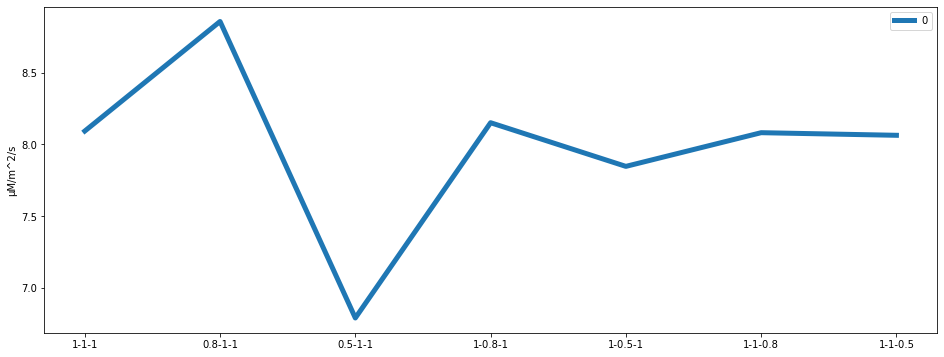

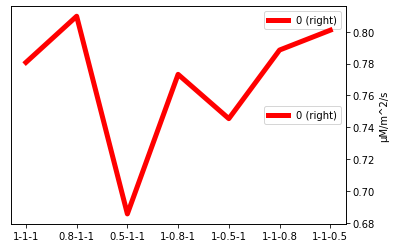

In [ ]:
data1=pd.DataFrame.from_dict(carbon_imported,orient='index')
data2=pd.DataFrame.from_dict(lactate_exported,orient='index')
data1.plot(kind='line', linewidth=5, figsize=(16,6))
plt.ylabel("μM/m^2/s")
data2.plot(secondary_y=True, color='r', linewidth=5, label="Lactate Export")
plt.ylabel("μM/m^2/s")
# plt.xlabel("")
# plt.xticks(range(len(cell_names)), cell_names, rotation = 10)
# plt.ylim(bottom=0)
plt.legend(loc="center right")

In [ ]:

Total_torus_volume.plot(kind='line', linewidth=5, figsize=(16,6))
plt.ylabel("volume (μm^3)")
nad_df[0].plot(secondary_y=True, color='r', linewidth=5, label="NAD(P)H demand")
atp_df[0].plot(secondary_y=True,color='g', linewidth=5, label="ATP demand")
plt.ylabel("mmol/gDW")
plt.xlabel("")
plt.xticks(range(len(cell_names)), cell_names, rotation = 10)
plt.ylim(bottom=0)
plt.legend(loc="center right")
#plt.title("Plot of total doughnut volume vs NAD and ATP demand")

# plt.savefig(save_loc, bbox_inches='tight')

NameError: name 'Total_torus_volume' is not defined

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#convert nad and atp dictionaries to dataframes
nad_df = pd.DataFrame.from_dict(total_nad_dict, orient='index')
atp_df = pd.DataFrame.from_dict(total_atp_dict, orient='index')

#import rootslice data
rootslice = pd.read_excel(cell_dimensions, index_col=0)
rootslice = rootslice[:11]
rootslice.rename(columns={'avg_tot_dnut_vol': "Total torus volume"}, inplace=True)
rootslice.rename(columns={'cell_id': "Cell type"}, inplace=True)
Total_torus_volume = rootslice[['Total torus volume']]

#create chart
#v useful guide to dataframe.plot() https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html
#plot of all volumes
    #rootslice[['avg_tot_dnut_vol','avg_vac_dnut_vol','avg_pm_dnut_vol', "avg_cellwall_dnut_vol", "avg_cytoplasm_dnut_vol"]].plot(kind='bar', width = 1, figsize=(12,6), colormap="viridis")
#rootslice[['avg_pm_dnut_vol']].plot(kind='bar', width = 1, figsize=(12,6), colormap="viridis")

cell_names = ["Epidermal", "Cortical 1", "Cortical 2", "Cortical 3", "Cortical 4",
                "Cortical 5", "Cortical 6", "Cortical 7", "Cortical 8", "Endodermal", "Pericycle"]

Total_torus_volume.plot(kind='line', linewidth=5, figsize=(16,6))
plt.ylabel("volume (μm^3)")
nad_df[0].plot(secondary_y=True, color='r', linewidth=5, label="NAD(P)H demand")
atp_df[0].plot(secondary_y=True,color='g', linewidth=5, label="ATP demand")
plt.ylabel("mmol/gDW")
plt.xlabel("")
plt.xticks(range(len(cell_names)), cell_names, rotation = 10)
plt.ylim(bottom=0)
plt.legend(loc="center right")
#plt.title("Plot of total doughnut volume vs NAD and ATP demand")

plt.savefig(save_loc, bbox_inches='tight')

In [ ]:
rootsdir = '/Users/user/Documents/Ox/roots/'
orootsdir = '/Users/user/Documents/Ox/roots/roots-model/'

# modelpwy='final_roots_model.xml'
# modelpwy='tissue_dnut_model.xml'
modelpwy='roots_model-1-1-1.xml'
from cobra import io
rmodel=io.read_sbml_model(rootsdir+modelpwy)
from build_roots_model import *
rootspFBAobj(rmodel)

In [ ]:
# sol=pfba(rmodel)
# print(sol['Phloem_carbon_import'])
print(sol['L_LACTATE_ec_epi00'])

In [ ]:
rmodel.reactions.Nitrate_ec_epi00

In [ ]:
for rxn2 in rmodel2.reactions:
    if rxn2.id in rmodel.reactions:
        rxn=rmodel.reactions.get_by_id(rxn2.id)
        if rxn.lower_bound!=rxn2.lower_bound:
            print('Lb mismatch: ',rxn.id)
        if rxn.upper_bound!=rxn2.upper_bound:
            print('Ub mismatch: ',rxn.id)
        if set([met.id for met in rxn.metabolites]).difference([met.id for met in rxn2.metabolites]):
            print('Met mismatch: ',rxn.reaction)
            print(rxn2.reaction)
    else:
        if 'apoplast' not in rxn2.id:
            print('Not in rmodel: ',rxn2.id)

# ATP sink

In [ ]:
from exploreBiomassComposition import *
rootsdir = '/Users/user/Documents/Ox/roots/'

# modelpwy='final_roots_model.xml'
# modelpwy='tissue_dnut_model.xml'
modelpwy='roots_model-1-1-1.xml'
from cobra import io
rmodel=io.read_sbml_model(rootsdir+modelpwy)


# Remove phloem metabolites not listed and add ratio constraint to remaining phloem mets
ph_ratios = pd.read_csv(rootsdir+'Phloem_composition_z_maize.csv')
rmodel.remove_reactions([rxn for rxn in rmodel.reactions if 'EX_X_' in rxn.id and '_ph_' in rxn.id and not any([x in rxn.id for x in list(ph_ratios['met_id'])+['PROTON']])])
phloem_ratio_met=Metabolite('phloem_ratio_met')
rxn=rmodel.reactions.EX_X_SUCROSE_ph_per00
rxn.add_metabolites({phloem_ratio_met:-0.3})
for rxn in rmodel.reactions:
    if 'EX_X_' in rxn.id and '_ph_' in rxn.id and not any([x in rxn.id for x in ['EX_X_SUCROSE_ph_per00','PROTON']]):
        # print(rxn.id)
        rxn.add_metabolites({phloem_ratio_met:0.7})
# Define obj
rootspFBAobj(rmodel)

In [ ]:
# rmodel.metabolites.ATP_c_per00.reactions
rmodel.reactions.get_by_id('6PFRUCTPHOS_RXN_c_per00')

In [ ]:
rmodel_atpsink=rmodel.copy()
# ATP reaction
atpsink = Reaction('ATP_sink_c_per00')
rmodel_atpsink.add_reaction(atpsink)
atpsink.add_metabolites({'ATP_c_per00':-0.65,'aATP_c_per00':-0.35})

In [ ]:
lbs = [0]#,0.01,1,10]
for x in lbs:
    rmodel_atpsink.reactions.ATP_sink_c_per00.lower_bound=x
    sol2=pfba(rmodel_atpsink)
    lsols[x]=sol2

In [ ]:
print(atpflux[:-1],lactflux[:-1])

In [ ]:
atpflux = [lsols[x]['ATP_sink_c_per00'] for x in list(lsols.keys())]
lactflux = [lsols[x]['L_LACTATE_ec_epi00'] for x in list(lsols.keys())]
plt.plot(atpflux[:-1],lactflux[:-1])

In [ ]:
lsols={}
lsols[0]=sol
lsols[0.1]=sol2

In [ ]:
print(sol2['ATP_sink_c_per00'],sol2['L_LACTATE_ec_epi00'],sol['L_LACTATE_ec_epi00'])

In [ ]:
from cobra.flux_analysis.parsimonious import pfba
sol=pfba(rmodel)

In [ ]:
sol

In [ ]:
biomass_rxns = [rxn for rxn in rmodel.reactions if 'Biomass_expanding_cell' in rxn.id]
print(biomass_rxns[0])

In [ ]:
cells = [rxn.split('_')[-1] for rxn in biomass_rxns]

In [ ]:
[met.id for met in rmodel.reactions.Biomass_expanding_cell_epi00.metabolites]

In [ ]:
mapSource(rmodel,sol,'Protein_b_'+rxn,i_max=4)

In [ ]:
for rxn in cells:
    mapSource(rmodel,sol,'L_PHOSPHATIDATE_p_'+rxn,i_max=4)

In [ ]:
lact_mets = [met.id for met in rmodel.metabolites if 'L_LACTATE_c' in met.id]
print(lact_mets)

In [ ]:
mapSource(rmodel,sol,'L_LACTATE_c_epi00',i_max=4)

In [ ]:
rmodel_atpsink.reactions.ATP_sink_c_per00.lower_bound=0
rmodel_atpsink.objective = 'Biomass_expanding_cell_epi00'
fva_sol=flux_variability_analysis(rmodel_atpsink)

In [ ]:
print(fva_sol.minimum['L_LACTATE_ec_epi00'],fva_sol.maximum['ATP_sink_c_per00'])

In [ ]:
print(fva_sol.minimum['Biomass_expanding_cell_epi00'],fva_sol.maximum['Biomass_expanding_cell_epi00'])

In [ ]:
rmodel.reactions.CO2_tx_epi00.upper_bound=-0.5980052008496906
rmodel.reactions.CO2_tx_epi00.lower_bound=-0.5980052008496906
rmodel.reactions.ATPase_tx_per00.lower_bound=0
# rmodel.objective = 'Biomass_expanding_cell_epi00'
# fva_sol_co2=flux_variability_analysis(rmodel,reaction_list=['ATPase_tx_per00'])

In [ ]:
print(fva_sol_co2['minimum'].ATPase_tx_per00,fva_sol_co2['maximum'].ATPase_tx_per00)

In [ ]:
import os 
os.system("say done")

In [ ]:
for rxn in rmodel.reactions:
    if 'ATPase_tx' in rxn.id:
        print(fva_sol_co2.minimum[rxn.id],fva_sol_co2.maximum[rxn.id], rxn.id)

In [ ]:
sumobj = rmodel.problem.Objective(rmodel.solver.variables.sumvar,
    direction='min')
rmodel.objective = sumobj
rmodel.reactions.L_LACTATE_ec_epi00.upper_bound=1000
# rmodel.reactions.ATPase_tx_per00.lower_bound=15.007535424655115

maintsol=rmodel.optimize()
print(sum([abs(maintsol[rxn.id]) for rxn in rmodel.reactions]))

In [ ]:
sumobj = rmodel.problem.Objective(rmodel.solver.variables.sumvar,
    direction='min')
rmodel.objective = sumobj
rmodel.reactions.L_LACTATE_ec_epi00.upper_bound=0
# rmodel.reactions.ATPase_tx_per00.lower_bound=15.007535424655115

nolactsol_m=rmodel.optimize()
print(sum([abs(nolactsol_m[rxn.id]) for rxn in rmodel.reactions]))

In [ ]:
print(sum([abs(nolactsol_m[rxn.id]) for rxn in rmodel.reactions]))

In [ ]:
print(maintsol['L_LACTATE_ec_epi00'],nolactsol['L_LACTATE_ec_epi00'])
print(maintsol['ATPase_tx_per00'],maintsol['CO2_tx_epi00'])

In [ ]:
def set_maintenance_hilary(model, respiration_rate, cell_dimensions,verbose=True):
    whole_model_vol = 6216571.895 #this value is the average volume of whole model across cell lengths
    gDW_per_tissue = whole_model_vol/2.541e+13 # 2.541e+13 is um3/gDW according to https://doi.org/10.1371/journal.pone.0239075

    rootslice = pd.read_excel(cell_dimensions, index_col=0)
    
    whole_model_cytoplasm_dnut_vol = rootslice.loc["whole_model", "avg_cytoplasm_dnut_vol"]
       
    
    #scale respiration rate to cytoplasmic volume of whole model
    vol_adj_resp_rate = respiration_rate * -1 * whole_model_cytoplasm_dnut_vol #mmol/model; value is -ve because CO2 leaving the cell
    vol_adj_resp_rate = vol_adj_resp_rate / gDW_per_tissue #mmol/gDW
    if verbose:
        print(f"the respiration rate adjusted for per gDW was {vol_adj_resp_rate}")
    
    tempModel = model.copy()
    CO2_tx_flux = 0
    i = 0
    co2_vals={}
    for it in [0.1,0.3,0.3]:
        i=i+it
        tempModel.reactions.get_by_id("ATPase_tx_per00").lower_bound = i
        # tempModel.reactions.get_by_id("ATPase_tx_per00").upper_bound = i
        solution = tempModel.optimize()
        CO2_tx_flux = solution.fluxes.get("CO2_tx_epi00")
        co2_vals[i]=(vol_adj_resp_rate - CO2_tx_flux)/vol_adj_resp_rate
        if verbose:
            print("NGAM ATPase flux = "+str(i))
            print("CO2_tx_flux = "+str(CO2_tx_flux))
            print("---------------------------")


    popt, pcov = curve_fit(Hyp_func, list(co2_vals.keys()), list(co2_vals.values()),maxfev=10000)
    i = (-popt[1])/popt[0]
    if i<0:
        i=0
        print('Warning: Predicted ATPase_tx flux is ', i)
    model_feasible=0
    try:
        tempModel.reactions.get_by_id("ATPase_tx_per00").lower_bound = i
        # model.reactions.get_by_id("ATPase_tx_per00").upper_bound = i
        sol = tempModel.optimize()
        model_feasible=1
        count+=1
    except:
        print('Warning: Predicted ATPase_tx value infeasible!')
        while not model_feasible:
            try:
                i = (-popt[1])/popt[0]+ ((vol_adj_resp_rate -sol.fluxes['ATPase_tx_per00']))/4
                tempModel.reactions.get_by_id("ATPase_tx_per00").lower_bound = i
                sol = tempModel.optimize()
                model_feasible=1
                count+=1
            except:
                print('Warning: Predicted ATPase_tx value infeasible again!')
    if verbose:
        print("Assumed maintenance cost, ATPase_tx =")
        print(sol["ATPase_tx_per00"])
        print("CO2 flux: ", sol["CO2_tx_epi00"])

    #set ATPase_tx value in model to value determined above
    # model.reactions.get_by_id("ATPase_tx_per00").upper_bound = tempModel.reactions.get_by_id("ATPase_tx_per00").flux
    if 'ATPase_tx_per00' not in model.reactions:
        print([rxn.id for rxn in model.reactions if 'ATPase_tx' in rxn.id])
    model.reactions.get_by_id("ATPase_tx_per00").lower_bound = i
    for rxn in model.reactions.query("ATPase_tx_"):
        print(rxn.x, rxn)        

In [ ]:
resp_rate = 8.76E-14 #umol CO2 per sec per um3 of cytoplasm
resp_rate = resp_rate*60*60 #umol/hour/um3 cytoplasm
resp_rate = resp_rate*(1e-3) #mmol/hour/um3 cytoplasm
rmodel.reactions.CO2_tx_epi00.upper_bound=0
rmodel.reactions.CO2_tx_epi00.lower_bound=-1000
set_maintenance_hilary(rmodel, resp_rate, orootsdir+"model_constraints_data/cell_dimensions.xlsx")

In [ ]:
sum([abs(lactsol[rxn.id]) for rxn in rmodel.reactions])

In [ ]:
rmodel.reactions.L_LACTATE_ec_epi00.upper_bound=1000
# lactsol=rmodel.optimize()

In [ ]:
# rmodel_atpsink.reactions.ATP_sink_c_per00.lower_bound=0
rmodel.reactions.L_LACTATE_ec_epi00.upper_bound=0
# rootspFBAobj(rmodel_atpsink)
# rmodel_atpsink.objective=rmodel_atpsink.problem.Variable
nolactsol=rmodel.optimize()

In [ ]:
print(lactsol['L_LACTATE_ec_epi00'],nolactsol['L_LACTATE_ec_epi00'])

In [ ]:
rxndiffdict={}
for rxn in rmodel.reactions:
    rxndiffdict[rxn.id]=abs(lactsol[rxn.id]-nolactsol[rxn.id])
sortdiff=sorted(rxndiffdict.keys(),key=lambda x:rxndiffdict[x])

In [ ]:
met='PROTON_c_cor05'
rxns=sorted([x for x in rmodel.metabolites.get_by_id(met).reactions if nolactsol[x.id]!=0],key=lambda x:abs(nolactsol[x.id]*rxn.get_coefficient(met)),reverse=True)
for rxn in rxns:
    print(nolactsol[rxn.id]*rxn.get_coefficient(met),lactsol[rxn.id]*rxn.get_coefficient(met),rxn.id)

In [ ]:
for rxn in rmodel.reactions:
    if 'PROTON_c_' in rxn.id:
        print(nolactsol[rxn.id],lactsol[rxn.id],rxn.id)
        rxn.upper_bound=0

In [ ]:
sortdiff[-50:]

In [ ]:
metbase='PHOSPHO_ENOL_PYRUVATE_c_'
for cell in cells:
    met=metbase+cell
    for rxn in rmodel.metabolites.get_by_id(met).reactions:
        if nolactsol[rxn.id]!=0:
            print(nolactsol[rxn.id],lactsol[rxn.id],rxn.id)

['GAP_c_epi00_Transfer_epi00_to_cor00']


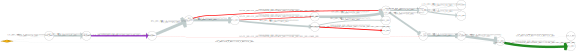

In [224]:
from analysis import * 
mapSink(rmodel,sol,'GAP_c_epi00',i_max=7)

In [ ]:
# Load atpsink exploration as dict
import pandas as pd
rs2=pd.read_csv('Spreadsheets/ATPsink.csv')
sol_dict = {}
for solname in rs2.columns[7:]:
    sol_dict[solname]={}
    for ii in range(len(rs2)):
        sol_dict[solname][rs2.loc[ii]['reaction_id']]=rs2.loc[ii][solname]
    for rxn in rmodel.reactions:
        if rxn.id not in sol_dict[solname].keys():
            sol_dict[solname][rxn.id] = 0
print(sol_dict.keys())


In [ ]:
print(sol_dict.keys())

In [ ]:
mapSource(rmodel,sol_dict['1_opt'],'L_LACTATE_c_cor05',i_max=7)

In [ ]:
# import sys, importlib
# importlib.reload(sys.modules['root_analysis_functions'])

#import analysis functions
from root_analysis_functions import *
total_nad_dict, nad_rxns_fluxes = generateNADHNADPHbudget(rmodel,sol_dict['1_opt'],outfile="",
    show_plot=False,percentage=False,save_plot_to="")
total_atp_dict, atp_rxns_fluxes = generateATPbudget(rmodel,sol_dict['1_opt'],outfile="",
    show_plot=False,percentage=False,save_plot_to="")
vol_vs_energy(rmodel, '/Users/user/Documents/Ox/roots/roots-model/'+"model_constraints_data/cell_dimensions.xlsx", total_nad_dict, total_atp_dict, "vol_vs_energy_plot_1_opt.png")

KeyError: '1_opt'

In [ ]:
total_nad_dict0, nad_rxns_fluxes0 = generateNADHNADPHbudget(rmodel,sol_dict['0_opt'],outfile="",
    show_plot=False,percentage=False,save_plot_to="")
total_atp_dict0, atp_rxns_fluxes0 = generateATPbudget(rmodel,sol_dict['0_opt'],outfile="",
    show_plot=False,percentage=False,save_plot_to="")
vol_vs_energy(rmodel, '/Users/user/Documents/Ox/roots/roots-model/'+"model_constraints_data/cell_dimensions.xlsx", total_nad_dict0, total_atp_dict0, "vol_vs_energy_plot_0_opt.png")

In [ ]:
# shortsoldict=sol_dict.copy()
del shortsoldict['10_opt']

In [ ]:
compareRxns(sol_dict,'L_LACTATE_tx','carbon_import',[1,1])

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
def compareRxns(soldict,rxn1,rxn2,signs=[1,1]):
    #convert nad and atp dictionaries to dataframes
    solkeys=list(soldict.keys())
    rxn1s = [x for x in list(soldict[solkeys[0]].keys()) if rxn1 in x]
    rxn2s = [x for x in list(soldict[solkeys[0]].keys()) if rxn2 in x]
    totrxn1s={}
    totrxn2s={}
    for sol in solkeys:
        totrxn1s[sol.split('_')[0]]=signs[0]*sum([soldict[sol][x] for x in rxn1s])
        totrxn2s[sol.split('_')[0]]=signs[1]*sum([soldict[sol][x] for x in rxn2s])
    rxn1_df = pd.DataFrame.from_dict(totrxn1s, orient='index')
    rxn2_df = pd.DataFrame.from_dict(totrxn2s, orient='index')
    # print(rxn1_df)
    # print(rxn2_df)
    sol_names = [sol.split('_')[0] for sol in solkeys]
    
    rxn1_df[0].plot(color='r', linewidth=5, label=rxn1,figsize=(16,6))
    plt.ylabel("mmol/gDW")
    plt.legend(loc="center left")
    rxn2_df[0].plot(secondary_y=True,color='g', linewidth=5, label=rxn2)
    plt.ylabel("mmol/gDW")
    plt.xlabel("ATP sink flux")
    plt.xticks(range(len(sol_names)), sol_names, rotation = 10)
    plt.ylim(bottom=0)
    plt.legend(loc="center right")
    #plt.title("Plot of total doughnut volume vs NAD and ATP demand")

    # plt.savefig(save_loc, bbox_inches='tight')

In [158]:
for rxn in rmodel.reactions:
    if 'PHOSPHORIBULOSEKINASE_RXN_p_' in rxn.id:
        print(rxn.id, rxn.reaction)

In [ ]:
def generate_atp_process_chart9(model, solution1, y_lim):
    reaction_atp_process = {
    'Mitochondrial_ATP_Synthase_m_': 'Mitochondrial ATP Synthase',
    'PHOSGLYPHOS_RXN_c_': 'Cytosolic glycolysis' ,
    'PEPDEPHOS_RXN_p_': 'Plastidic glycolysis',
    'PHOSPHORIBULOSEKINASE_RXN_p_': 'Calvin cycle',
    'PEPDEPHOS_RXN_c_': 'Cytosolic glycolysis',
    'PHOSGLYPHOS_RXN_p_': 'Plastidic glycolysis',
    'ACETYL_COA_CARBOXYLTRANSFER_RXN_p_': 'Lipid synthesis',
    'UDPKIN_RXN_c_': 'Cellulose Synthesis',
    'GDPKIN_RXN_c_': 'GDP kinase',
    'FRUCTOKINASE_RXN_c_': 'Cytosolic glycolysis',
    'PROTON_ATPase_c_': 'Plasma membrane proton ATPase',
    'PEPCARBOXYKIN_RXN_c_': 'PEP carboxykinase',}

    atp_coloursdict = {
    'Mitochondrial ATP Synthase': '#5C6BC0',
    'Cytosolic glycolysis':'#8D6E63' ,
    'Plastidic glycolysis': '#AB47BC',
    'Calvin cycle': '#2E7D32',
    'Lipid synthesis': '#FF7043',
    'Cellulose Synthesis': '#26C6DA',
    'GDP kinase': '#9CCC65',
    'Plasma membrane proton ATPase': '#fbceb1',
    'PEP carboxykinase': '#cd9575',
    'Others-pos': '#000000',}
    
    import matplotlib.pyplot as plt
    # plt.style.reload_library()
    # with plt.style.context('style1'):
    fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2)
    fig.set_size_inches(18,6)    

    for cell_tag in ["_cor00","_cor01","_cor02","_cor03","_cor04","_cor05","_cor06","_cor07","_end00", "_per00"]:

        total_atp_dict, atp_rxns_fluxes = generateATPbudgetforonecell(model,solution1,cell_tag, percentage=False)

        process_fluxes = {}
        for v in reaction_atp_process.values():
            process_fluxes[v] = 0

        for k in atp_rxns_fluxes.keys():
            for rxn_id in reaction_atp_process.keys():
                if rxn_id in k:
                    process = reaction_atp_process[rxn_id]
                    rxn_flux = atp_rxns_fluxes[k]
                    process_fluxes[process] = process_fluxes[process] + rxn_flux

        pos_processes = process_fluxes.copy()
        to_del_pos = []
        for k in pos_processes.keys():
            if pos_processes[k] <= 0:
                to_del_pos.append(k)

        for k in to_del_pos:
            del pos_processes[k]

        neg_processes = process_fluxes.copy()
        to_del_neg = []
        for k in neg_processes.keys():
            if neg_processes[k] >= 0:
                to_del_neg.append(k)
        for k in to_del_neg:
            del neg_processes[k]

        pos_keys = [*pos_processes.keys()]
        pos_values = [*pos_processes.values()]
        neg_keys = [*neg_processes.keys()]
        neg_values_old = [*neg_processes.values()]
        neg_values = []
        for value in neg_values_old:
            neg_values.append(value*-1)

        for i in range(0,len(pos_keys)):
            ax1.bar(pos_keys[i], pos_values[i], color=atp_coloursdict[pos_keys[i]])
        for i in range(0,len(neg_keys)):
            ax2.bar(neg_keys[i], neg_values[i], color=atp_coloursdict[neg_keys[i]])
    
    
    ax1.set_xticks([])
    ax1.set_ylim(0, y_lim)
    #ax1.set_title("ATP generating processes in "+cell_tag, size=25)
    ax1.set_ylabel("ATP in mmol", size=20)
    ax1.legend(pos_keys, loc='upper right', framealpha=0.3)

        
    ax2.set_xticks([])
    ax2.set_ylim(0, y_lim)
    #ax2.set_title("ATP consuming processes in "+cell_tag, size=25)
    ax2.set_ylabel("ATP in mmol", size=20)
    ax2.legend(neg_keys, loc="upper left", framealpha=0.3)
        
        #plt.savefig("ATPorNAD production and usage/ATP/"+"ATP_"+cell_tag+"production+usage", bbox_inches='tight')

In [ ]:
for rxn in rmodel.reactions:
    if '_tx' in rxn.id:# and (sol_dict['0_opt'][rxn.id]!=0 or sol_dict['1_opt'][rxn.id]!=0):
        print(sol_dict['0_opt'][rxn.id],sol_dict['1_opt'][rxn.id],rxn.id)

In [ ]:
rmodel.reactions.CO2_tx_epi00

In [ ]:
mapSink(rmodel,sol_dict['0_opt'],'UDP_GLUCOSE_c_cor06',i_max=4)

In [ ]:
mapSource(rmodel,nolactsol,'ATP_m_per00',ignore=0,i_max=5)

# New maintenance strategy

In [ ]:
from exploreBiomassComposition import *
rootsdir = '/Users/user/Documents/Ox/roots/'

# modelpwy='final_roots_model.xml'
# modelpwy='tissue_dnut_model.xml'
modelpwy='roots_model-1-1-1.xml'
from cobra import io
rmodel=io.read_sbml_model(rootsdir+modelpwy)

In [ ]:
from build_roots_model import *
rootspFBAobj(rmodel)

In [ ]:
# Work out pfba thing. Within that min co2 out
rmodel.optimize()


<Solution infeasible at 0x7fadb39254f0>

In [ ]:
fva_sol_co2=flux_variability_analysis(rmodel,reaction_list=['CO2_tx_epi00'],fraction_of_optimum=1.2)
print(fva_sol_co2)

In [ ]:
from cobra import io,flux_analysis
vol_adj_resp_rate=-0.598
# tempModel = rmodel.copy()
CO2_tx_flux = 0
i = 0
while CO2_tx_flux > vol_adj_resp_rate:
    i=i+0.01
    tempModel.reactions.get_by_id("ATPase_tx_per00").lower_bound = i
    # 
    solution=flux_variability_analysis(tempModel,reaction_list=['CO2_tx_epi00'],fraction_of_optimum=1.15)
    CO2_tx_flux = solution.maximum["CO2_tx_epi00"]
    print("NGAM ATPase flux = "+str(i))
    print("CO2_tx_flux = "+str(CO2_tx_flux))
    print("---------------------------")

print("Assumed maintenance cost, ATPase_tx =")
print(i)
print("CO2 flux: ", CO2_tx_flux)

# Import model

In [ ]:
rmodel=rmodelo.copy()

In [101]:
from exploreBiomassComposition import *
rootsdir = '/Users/user/Documents/Ox/roots/'

# modelpwy='final_roots_model.xml'
# modelpwy='tissue_dnut_model.xml'
modelpwy='roots_model-1-1-1.xml'
from cobra import io
rmodel=io.read_sbml_model(rootsdir+modelpwy)
from build_roots_model import *

# sol=rmodel.optimize()

No objective coefficients in model. Unclear what should be optimized


In [ ]:
rmodelo=rmodel.copy()
temp=rootspFBAobj(rmodelo)
solo=rmodelo.optimize()

Read LP format model from file /var/folders/rx/sg79_yds24z7clp5pp_fnpnh0000gp/T/tmpw5zv6wd2.lp
Reading time = 0.17 seconds
: 10049 rows, 26628 columns, 116004 nonzeros


In [106]:
for rxn in rmodel.reactions:
    if 'ACETALD' in rxn.id and 'Transfer' in rxn.id:
        print(rxn.id,rxn.reaction)

ACETALD_c_cor00_Transfer_00_to_01 ACETALD_c_cor00 <=> ACETALD_c_cor01
ACETALD_c_cor01_Transfer_01_to_02 ACETALD_c_cor01 <=> ACETALD_c_cor02
ACETALD_c_cor02_Transfer_02_to_03 ACETALD_c_cor02 <=> ACETALD_c_cor03
ACETALD_c_cor03_Transfer_03_to_04 ACETALD_c_cor03 <=> ACETALD_c_cor04
ACETALD_c_cor04_Transfer_04_to_05 ACETALD_c_cor04 <=> ACETALD_c_cor05
ACETALD_c_cor05_Transfer_05_to_06 ACETALD_c_cor05 <=> ACETALD_c_cor06
ACETALD_c_cor06_Transfer_06_to_07 ACETALD_c_cor06 <=> ACETALD_c_cor07
ACETALD_c_epi00_Transfer_epi00_to_cor00 ACETALD_c_epi00 <=> ACETALD_c_cor00
ACETALD_c_cor07_Transfer_cor07_to_end00 ACETALD_c_cor07 <=> ACETALD_c_end00
ACETALD_c_end00_Transfer_end00_to_per00 ACETALD_c_end00 <=> ACETALD_c_per00


In [107]:
# Remove ammonium as an osmolyte
for rxn in rmodel.reactions:
    if 'AMMONIUM' in rxn.id and 'biomass' in rxn.id:
        # print(rxn.id, rxn.reaction)
        rmodel.remove_reactions({rxn})
# Stop Fe transfer through apoplast
    if 'FeII' in rxn.id and 'apoplast_exchange' in rxn.id:
        rmodel.remove_reactions({rxn})
# Remove Proline from phloem import
    if 'PRO_ph' in rxn.id:
        rxn.upper_bound=0
    if 'unlProtHYPO' in rxn.id:
        rxn.upper_bound=0
# Constrain direction of phosphate transport
    if 'Pi_c' in rxn.id and 'Transfer' in rxn.id:
        rxn.lower_bound=0
# Constrain minimum xylem export
rxn = rmodel.reactions.NITRATE_c_xy_per00
rxn.lower_bound=rmodel.reactions.Nitrate_ec_epi00*.19
for met in rxn.metabolites:
    if 'PROTON' in met.id:
        rxn.add_metabolites({met.id:-rxn.get_coefficient(met.id)})
# cells = [rxn.id.split('_')[-1] for rxn in rmodel.reactions if 'CELLULOSE_SYNTHASE_UDP_FORMING_RXN_c' in rxn.id]
# rmodel.reactions.H_tx_epi00.lower_bound=-1000 # Neg means drawing in protons from the soil
# Phloem ratios
ph_ratios = pd.read_csv(rootsdir+'Phloem_composition_z_maize.csv')
rmodel.remove_reactions([rxn for rxn in rmodel.reactions if 'EX_X_' in rxn.id and '_ph_' in rxn.id and not any([x in rxn.id for x in list(ph_ratios['met_id'])+['PROTON']])])
phloem_ratio_met=Metabolite('phloem_ratio_met')
rxn=rmodel.reactions.EX_X_SUCROSE_ph_per00
rxn.add_metabolites({phloem_ratio_met:-0.3})
for rxn in rmodel.reactions:
    if 'EX_X_' in rxn.id and '_ph_' in rxn.id and not any([x in rxn.id for x in ['EX_X_SUCROSE_ph_per00','PROTON']]):
        # print(rxn.id)
        rxn.add_metabolites({phloem_ratio_met:0.7})

In [108]:
no_symp_transport = ['ATP','UTP','GTP','PROTON','UDP_GLUCOSE','CARBON_DIOXIDE','GDP_D_GLUCOSE','CPD_14553','OXYGEN_','AMP','NADH','FeII','SUPER_OXIDE','PPI']+['Heteroglycans','CELLULOSE','Cellulose','STARCH','ACETALD','ARACHIDIC_ACID_c_','DOCOSANOATE_c_',
                'CPD_16709_c_','STEARIC_ACID_c_','OLEATE_CPD_c_','Octadecadienoate_c_','LINOLENIC_ACID_c_',
                'PALMITATE','CPD_9245_c_','CPD_17412_c_','CPD_17291_c_','CPD_674_c_','Fatty_Acids_c_','CPD_2961_']
# no_symp_transport = ['ATP','UTP','GTP','PROTON','UDP_GLUCOSE','CARBON_DIOXIDE','GDP_D_GLUCOSE','MAL_','OXALACETIC_ACID','NADH_','NAD_','GAP','DPG','FRUCTOSE_16_DIPHOSPHATE_','DIHYDROXY_ACETONE_PHOSPHATE_']
for rxn in rmodel.reactions:
    if 'Transfer' in rxn.id and any([x in rxn.id for x in no_symp_transport]):
        rxn.upper_bound=0
        rxn.lower_bound=0
        # print(rxn.id)



In [109]:
# exudates = ['FRU_','GLC_','CIT_','SUC_','FUM_','MAL_','OXALACETIC_ACID_','L_ALPHA_ALANINE_','HIS_','GLY_','L_ASPARTATE_','LEU_','GLT_','TYR_','PHE_','GLN_','VAL_','THR_','SER_','ILE_','ASN_','LYS_','MANNOSE_','ETOH_']
exudates = ['ETOH_']
for metfrag in exudates:
    if metfrag+'c_epi00' in rmodel.metabolites:
        metc = rmodel.metabolites.get_by_id(metfrag+'c_epi00')
        if metfrag+'e_epi00' not in rmodel.metabolites:
            mete = Metabolite(metfrag+'e_epi00',compartment='e_epi00')
            rmodel.add_metabolites({mete})
        else:
            mete = rmodel.metabolites.get_by_id(metfrag+'e_epi00')
        hc   = rmodel.metabolites.get_by_id('PROTON_c_epi00')
        he   = rmodel.metabolites.get_by_id('PROTON_e_epi00')
        rxnec = Reaction(metfrag+'_ec_epi00')
        rxntx = Reaction(metfrag+'_tx_epi00')
        rmodel.add_reactions({rxnec,rxntx})
        if metfrag == 'ETOH_':
            rxnec.add_metabolites({metc:-1,mete:1})
        else:
            rxnec.add_metabolites({metc:-1,mete:1,hc:-1,he:1})
        rxntx.add_metabolites({mete:-1})
    else:
        print('False ',metfrag)

In [110]:
rmodelo=rmodel.copy()

Read LP format model from file /var/folders/rx/sg79_yds24z7clp5pp_fnpnh0000gp/T/tmp2iyodpdz.lp
Reading time = 0.16 seconds
: 10051 rows, 26530 columns, 115756 nonzeros


In [147]:
rmodel=rmodelo.copy()

Read LP format model from file /var/folders/rx/sg79_yds24z7clp5pp_fnpnh0000gp/T/tmp2ua79o1r.lp
Reading time = 0.16 seconds
: 10051 rows, 26530 columns, 115756 nonzeros


In [148]:
sol1=rootspFBAobj(rmodel)
sol=rmodel.optimize()

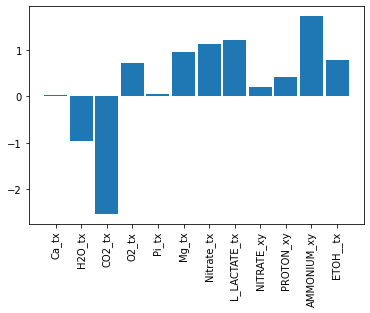

In [112]:
t1=plot_bdry(0,len(exudates))

In [70]:
import matplotlib.pyplot as plt
import numpy as np
def plot_bdry(it=1,tot_num=1,rxns=[]):
    exp_mets = {}
    exbit='EX_X_'
    for rxn in [x for x in rmodel.reactions if (x.boundary and abs(sol[x.id])>1e-4 and not '_b_' in x.id and not 'TotalSoluteConstraint' in x.id and not 'Phloem_carbon' in x.id) or x.id in rxns]:
            rxns+=[rxn.id]
            rxnroot = '_'.join(rxn.id.split('_')[:-1])
            if exbit in rxnroot:
                rxnroot = '_'.join(rxnroot.split('_')[2:])
            if rxnroot not in list(exp_mets.keys()):
                exp_mets[rxnroot]=0
            exp_mets[rxnroot]+=sol[rxn.id]
            # print(round(sol[rxn.id],4),rxn.id ,rxn.reaction)
    width = 0.9/(tot_num)
    plt.bar(np.arange(len(exp_mets))+it*width,exp_mets.values(),width=width)
    t1=plt.xticks(range(len(exp_mets)),exp_mets.keys(),rotation=90)
    return rxns


In [74]:
len(rxns)

968

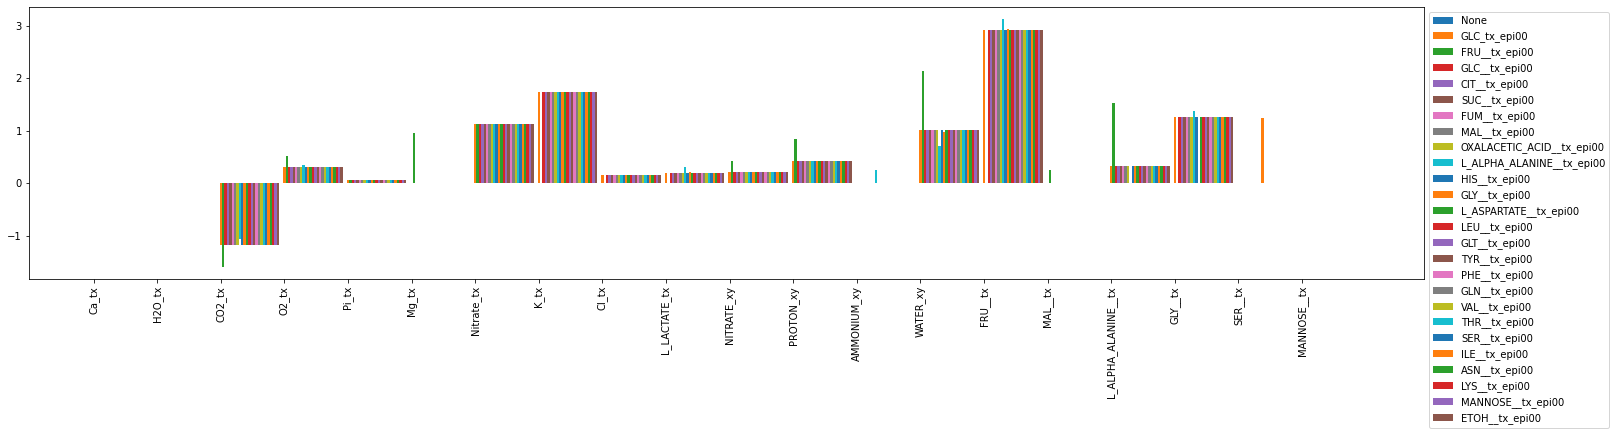

In [77]:
count=0
# rxns=[]
leg_rxns=[]
plt.figure(figsize=(25,5))
sol=rmodel.optimize()
rxns=plot_bdry(count,len(exudates),rxns)
leg_rxns+=['None']
for rxn in [x for x in rmodel.reactions if any([y in x.id for y in exudates]) and '_tx_epi00' in x.id]:
    tu=rxn.upper_bound
    tl=rxn.lower_bound
    rxn.upper_bound=0
    rxn.lower_bound=0
    sol=rmodel.optimize()
    # if any([sol[x.id] for x in rmodel.reactions if 'LACTATED' in x.id]):
    #     print(rxn.id,[sol[x.id] for x in rmodel.reactions if 'LACTATED' in x.id])
    rxns=plot_bdry(count,len(exudates),rxns)
    leg_rxns+=[rxn.id]
    plt.legend(leg_rxns,bbox_to_anchor=(1,1), loc="upper left")
    rxn.upper_bound=tu
    rxn.lower_bound=tl
    count+=1
plt.savefig('Remove_exudates_plt.pdf',bbox_inches='tight')

In [42]:
for rxn in rmodel.reactions:
    if 'LACTATED' in rxn.id:
        print(round(sol[rxn.id]),rxn.id)

0 L_LACTATEDEHYDROG_RXN_c_epi00
0 L_LACTATEDEHYDROG_RXN_c_cor00
0 L_LACTATEDEHYDROG_RXN_c_cor01
0 L_LACTATEDEHYDROG_RXN_c_cor02
0 L_LACTATEDEHYDROG_RXN_c_cor03
0 L_LACTATEDEHYDROG_RXN_c_cor04
0 L_LACTATEDEHYDROG_RXN_c_cor05
0 L_LACTATEDEHYDROG_RXN_c_cor06
0 L_LACTATEDEHYDROG_RXN_c_cor07
0 L_LACTATEDEHYDROG_RXN_c_end00
0 L_LACTATEDEHYDROG_RXN_c_per00


In [40]:
rmodel=rmodelo.copy()

Read LP format model from file /var/folders/rx/sg79_yds24z7clp5pp_fnpnh0000gp/T/tmprmjj9m40.lp
Reading time = 0.26 seconds
: 10073 rows, 26622 columns, 115986 nonzeros


In [16]:
fva_sol = flux_variability_analysis(rmodel)

Set parameter Username
Academic license - for non-commercial use only - expires 2023-01-15
Read LP format model from file /var/folders/rx/sg79_yds24z7clp5pp_fnpnh0000gp/T/tmpupt4siya.lp
Reading time = 0.17 seconds
: 10075 rows, 26624 columns, 138175 nonzeros
Set parameter Username
Academic license - for non-commercial use only - expires 2023-01-15
Read LP format model from file /var/folders/rx/sg79_yds24z7clp5pp_fnpnh0000gp/T/tmp4a6x9bcq.lp
Reading time = 0.33 seconds
: 10075 rows, 26624 columns, 138175 nonzeros
Set parameter Username
Academic license - for non-commercial use only - expires 2023-01-15
Read LP format model from file /var/folders/rx/sg79_yds24z7clp5pp_fnpnh0000gp/T/tmp8s3pbuxn.lp
Reading time = 0.30 seconds
: 10075 rows, 26624 columns, 138175 nonzeros
Set parameter Username
Academic license - for non-commercial use only - expires 2023-01-15
Read LP format model from file /var/folders/rx/sg79_yds24z7clp5pp_fnpnh0000gp/T/tmphyhf3s7g.lp
Reading time = 0.30 seconds
: 10075 r

In [ ]:
for rxn in rmodel.reactions:
    if '_tx_epi00' in rxn.id and sol[rxn.id]!=0:
        print(round(sol[rxn.id],4),rxn.id)

0.1076 Ca_tx_epi00
-2.1511 H2O_tx_epi00
-2.0294 CO2_tx_epi00
1.0794 O2_tx_epi00
0.0636 Pi_tx_epi00
0.0023 Biomass_tx_epi00
0.9466 Mg_tx_epi00
1.1259 Nitrate_tx_epi00
0.5498 L_LACTATE_tx_epi00


In [ ]:
celltags = ['_epi00','_cor00','_cor01','_cor02','_cor03','_cor04','_cor05','_cor06','_cor07','_end00','_per00']
soldict = {}
rxnfrag = set(['_'.join(rxn.id.split('_')[:-1]) if any([x in rxn.id for x in celltags]) else rxn.id for rxn in rmodel.reactions])
rxnlist = [rxn.id for rxn in rmodel.reactions]
soldict['reaction']={}
for cell in celltags:
    soldict['pFBA-'+cell[1:]]={}
for cell in celltags:
    soldict['FVA_min-'+cell[1:]]={}
    soldict['FVA_max-'+cell[1:]]={}
    for rxn in rxnfrag:
        rxnmatch = [x for x in rxnlist if rxn in x]
        soldict['reaction']=rmodel.reactions.get_by_id(rxnmatch[0]).reaction
        if rxn+cell in rmodel.reactions:
            soldict['pFBA-'+cell[1:]][rxn]=sol[rxn+cell]
            soldict['FVA_min-'+cell[1:]][rxn]=sol[rxn+cell]
            soldict['FVA_max-'+cell[1:]][rxn]=sol[rxn+cell]
        elif cell == '_epi00' and rxn in rmodel.reactions:
            soldict['pFBA-'+cell[1:]][rxn]=sol[rxn]
            soldict['FVA_min-'+cell[1:]][rxn]=sol[rxn]
            soldict['FVA_max-'+cell[1:]][rxn]=sol[rxn]
        else:
            soldict['pFBA-'+cell[1:]][rxn]=0
            soldict['FVA_min-'+cell[1:]][rxn]=0
            soldict['FVA_max-'+cell[1:]][rxn]=0

In [ ]:
temp=pd.DataFrame(soldict)
temp.to_csv('Spreadsheets/FVAroots.csv')

In [ ]:
from cobra.flux_analysis.parsimonious import pfba
from cobra.flux_analysis.variability import *
# rsol=pfba(rmodel)
# fva_sol = flux_variability_analysis(rmodel)
data={'reaction_id':[x.id for x in rmodel.reactions],
    'cell':['_'.join(x.id.split('_')[-2:]) if ('_l' in x.id or '_d' in x.id) else '' for x in rmodel.reactions],
    'subsystem':[x.notes['SUBSYSTEM']  if 'SUBSYSTEM' in str(x.notes) else '' for x in rmodel.reactions],
    'reaction':[x.reaction for x in rmodel.reactions],
    'rfva_min':[fva_sol.minimum[x.id] for x in rmodel.reactions],
    'rfva_max':[fva_sol.maximum[x.id] for x in rmodel.reactions],
    'regrexsol':[sol[x.id] for x in rmodel.reactions]}
df=pd.DataFrame(data)
from datetime import datetime, date, time
now = datetime.now().strftime('%Y_%m_%d')
df.to_csv('/Users/user/Documents/Ox/roots/Spreadsheets/FVAroots.csv')

In [17]:
import pickle as pkl
with open('roots_solc.pkl','wb') as file:
    pkl.dump(sol,file)
with open('roots_fva_solc.pkl','wb') as file:
    pkl.dump(fva_sol,file)

In [209]:
with open('roots_sol.pkl','rb') as file:
    sol=pkl.load(file)
with open('roots_fva_sol.pkl','rb') as file:
    fva_sol=pkl.load(file)

In [ ]:
rmodel.reactions.L_LACTATE_ec_epi00.lower_bound=0
sol=rmodel.optimize()

# No sugar in vacuole

In [ ]:
sugs=['SUCROSE','GLC_','FRU_']
sugsums={}
for sug in sugs:
    sugsums[sug]=0
sugsumso=sugsums.copy()
for rxn in rmodel.reactions:
    if any([x in rxn.id for x in sugs]) and 'v_biomass' in rxn.id:
        # print(rxn.id, rxn.reaction)
        sug = [x for x in sugs if x in rxn.id]
        sugsums[sug[0]]+=sol[rxn.id]
        # if rxn.id in solo:
        sugsumso[sug[0]]+=solo[rxn.id]

        rxn.upper_bound = solo[rxn.id]

In [ ]:
print(sugsums)
print(sugsumso)

{'SUCROSE': 0.13623186428176431, 'GLC_': 1.5215464114582335, 'FRU_': 1.3811352493270204}
{'SUCROSE': 0.08447976139470208, 'GLC_': 0.9435375377753148, 'FRU_': 0.8564661206987337}


In [ ]:
sugs=['CIT_','MAL_']
sugsums={}
for sug in sugs:
    sugsums[sug]=0
sugsumso=sugsums.copy()
for rxn in rmodel.reactions:
    if any([x in rxn.id for x in sugs]) and 'v_biomass' in rxn.id:
        # print(rxn.id, rxn.reaction)
        sug = [x for x in sugs if x in rxn.id]
        sugsums[sug[0]]+=sol[rxn.id]
        # if rxn.id in solo:
        sugsumso[sug[0]]+=solo[rxn.id]

        rmodel.remove_reactions({rxn})

# Look into cellulose synthesis

In [ ]:
cells = [rxn.id.split('_')[-1] for rxn in rmodel.reactions if 'CELLULOSE_SYNTHASE_UDP_FORMING_RXN_c' in rxn.id]
print(cells)

['epi00', 'cor00', 'cor01', 'cor02', 'cor03', 'cor04', 'cor05', 'cor06', 'cor07', 'end00', 'per00']


In [ ]:

# for rxn in rmodel.reactions:
#     if 'CELLULOSE_SYNTH' in rxn.id:
#         print(rxn.id, rxn.x)
#         print(rxn.reaction)
cell_synth={}
for cell in cells:
    cell_synth[cell]=0
for rxn in rmodel.reactions:
    if any([met for met in rxn.metabolites if 'CELLULOSE_c' in met.id and rxn.get_coefficient(met.id)*rxn.x>0]):
        print(rxn.id, rxn.x)
        print(rxn.reaction) 
        this_cell = rxn.id.split('_')[-1]    
        cell_synth[this_cell]+=rxn.x*rxn.get_coefficient('CELLULOSE_c_'+this_cell)   
print(cell_synth)


In [ ]:
import matplotlib.pylab as plt
myList=cell_synth.items()
# myList = sorted(myList)
x,y = zip(*myList)
plt.plot(x,y)
plt.show()

In [ ]:
cell_synth_max={}
cell_synth_min={}
cellsynth_rxns=['CELLULOSE_SYNTHASE_UDP_FORMING_RXN_c_','CELLULOSE_SYNTHASE_GDP_FORMING_RXN_c_']
for rxn in cellsynth_rxns:
    cell_synth_max[rxn]=[fva_sol.maximum[rxn+cell] for cell in cells]
    cell_synth_min[rxn]=[fva_sol.minimum[rxn+cell] for cell in cells]
    plt.stackplot(range(len(cells)),cell_synth_max[rxn],colors = col[it], baseline='zero',alpha=0.5) 
    plt.stackplot(range(len(cells)),cell_synth_min[rxn],colors = col[it], baseline='zero',alpha=0.5) 


## UDP-glucose synthesis

In [ ]:
udpglc_mets= [met for met in rmodel.metabolites if 'UDP_GLUCOSE' in met.id]
# udpglc_forming_rxns = [rxn.id for rxn in rmodel.reactions if (sol[rxn.id]>0 and any([x in rxn.products for x in udpglc_mets])) or (sol[rxn.id]<0 and any([x in rxn.reactants for x in udpglc_mets]))]
# # print(udpglc_forming_rxns)
# udpglc_rxns = list(set(['_'.join(rxn.id.split('_')[:-1]) for rxn in rmodel.reactions if (any([x in rxn.metabolites for x in udpglc_mets]) and not 'Transfer' in rxn.id)]))
exclbits=['Transfer','CELLULOSE_SYNTH']
udpglc_rxns_p = list(set(['_'.join(rxn.id.split('_')[:-1]) for rxn in rmodel.reactions if (any([x in rxn.products for x in udpglc_mets]) and not any([x in rxn.id for x in exclbits]))]))
udpglc_rxns_r = list(set(['_'.join(rxn.id.split('_')[:-1]) for rxn in rmodel.reactions if (any([x in rxn.reactants for x in udpglc_mets]) and not any([x in rxn.id for x in exclbits]))]))

In [ ]:
import matplotlib.pyplot as plt
sudpglc_ict = {}
plts=[]
plted=[]
celltags = ['_epi00','_cor00','_cor01','_cor02','_cor03','_cor04','_cor05','_cor06','_cor07','_end00','_per00']
udpglc_dict_max={}
udpglc_dict_min={}
udpglc_dict={}
for it,rxn in enumerate(list(udpglc_rxns_p)):
    # rxn = rmodel.reactions.get_by_id(rxn+x)
    udpglc_dict_max[rxn]=[fva_sol.maximum[rxn+x] for x in celltags]
    udpglc_dict_min[rxn]=[fva_sol.minimum[rxn+x] for x in celltags]
    udpglc_dict[rxn]=[sol[rxn+x] for x in celltags]
    if 0:#sum(udpglc_dict[rxn])>=0:
        if all([abs(x)<1e-4 for x in udpglc_dict_min[rxn]]):
            bl='zero'
        else:
            print('Warning - baseline: ',rxn,': ',udpglc_dict_min[rxn])
        plts+=plt.stackplot(range(len(udpglc_dict_max[rxn])),udpglc_dict[rxn],labels = celltags, colors = col[it], baseline=bl,alpha=0.5) 
        plted+=[it]
for it,rxn in enumerate(list(udpglc_rxns_r)):
    # rxn = rmodel.reactions.get_by_id(rxn+x)
    udpglc_dict_max[rxn]=[-fva_sol.minimum[rxn+x] for x in celltags]
    udpglc_dict_min[rxn]=[-fva_sol.maximum[rxn+x] for x in celltags]
    udpglc_dict[rxn]=[sol[rxn+x] for x in celltags]
    if 0:#sum(udpglc_dict[rxn])>=0:
        if all([abs(x)<1e-4 for x in udpglc_dict_min[rxn]]):
            bl='zero'
        else:
            print('Warning - baseline: ',rxn,': ',udpglc_dict_min[rxn])
        plts+=plt.stackplot(range(len(udpglc_dict_max[rxn])),udpglc_dict[rxn],labels = celltags, colors = col[it+len(udpglc_rxns_p)], baseline=bl,alpha=0.5) 
        plted+=[it+len(udpglc_rxns_p)]
for it,rxn in enumerate(list(udpglc_dict.keys())):
    if not all([abs(x)<1e-4 for x in udpglc_dict_max[rxn]]):
        if all([abs(x)<1e-4 for x in udpglc_dict_min[rxn]]):
            bl='zero'
        else:
            print('Warning - baseline: ',rxn,': ',udpglc_dict_min[rxn])
        plts+=plt.stackplot(range(len(udpglc_dict_max[rxn])),udpglc_dict_max[rxn],labels = celltags, colors = col[it], baseline=bl,alpha=0.2) 
        plt.plot(udpglc_dict[rxn],color=col[it])
        plted+=[it]
plt.legend(plts,[list(udpglc_dict.keys())[x] for x in plted],bbox_to_anchor=(1,0.5),loc='center left')
plt.xticks(range(len(udpglc_dict[rxn])),labels=[x[1:] for x in celltags],rotation=90)
plt.xlabel('cell')
plt.ylabel('UDP-glucose producing flux')
plt.show()

# udpglc_dict = {}
# plts=[]
# plted=[]
# for it,rxn in enumerate(list(udpglc_rxns)[5:10]):
#     udpglc_dict[rxn]=[rmodel.reactions.get_by_id(rxn+'_'+x).x for x in celltags]
#     if 1:#sum(udpglc_dict[rxn])>=0:
#         plts+=plt.stackplot(range(len(udpglc_dict[rxn])),udpglc_dict[rxn],labels = celltags, colors = col[it], baseline='zero',alpha=0.5) 
#         plted+=[it]
# plt.legend(plts,[list(udpglc_rxns)[x+5] for x in plted],bbox_to_anchor=(1,0.5),loc='center left')
# plt.xticks(range(len(udpglc_dict[rxn])),labels=celltags,rotation=90)
# plt.xlabel('Transfer location')
# plt.ylabel('Flux towards pericycle (neg fluxes => towards epithelium)')
# plt.show()

In [ ]:
for rxn in rmodel.reactions:
    if 'SUCROSE_SYNTHASE' in rxn.id:
        print(rxn.id, fva_sol.minimum[rxn.id],fva_sol.maximum[rxn.id])

# Look into vacuole activity

In [ ]:
for rxn in rmodel.reactions:
    if 'PROTON_PPi_rev_vc_' in rxn.id:
        print(rxn.id, sol[rxn.id])

In [ ]:
p_in = {}
p_out = {}
for cell in cells:
    p_in[cell]=0
    p_out[cell]=0
    for rxn in rmodel.metabolites.get_by_id('PROTON_v_'+cell).reactions:
        if rxn.x!=0:
            # print(round(rxn.x*rxn.get_coefficient('PROTON_v_'+cell),4),rxn.id,rxn.reaction)
            if rxn.x*rxn.get_coefficient('PROTON_v_'+cell)>0:
                p_in[cell]+=rxn.x*rxn.get_coefficient('PROTON_v_'+cell)
            else:
                p_out[cell]+=rxn.x*rxn.get_coefficient('PROTON_v_'+cell)

# for rxn in rmodel.reactions:
#     if 'vc_cor00' in rxn.id and rxn.x!=0:
#         print(rxn.id, rxn.x, rxn.reaction)

In [ ]:
cell= 'epi00'
for rxn in rmodel.metabolites.get_by_id('PROTON_v_'+cell).reactions:
    if rxn.x!=0:
        print(round(rxn.x*rxn.get_coefficient('PROTON_v_'+cell),4),rxn.id,rxn.reaction)

In [ ]:
cell= 'cor02'
met='MGII_v_'
for rxn in rmodel.metabolites.get_by_id(met+cell).reactions:
    if rxn.x!=0:
        print(round(rxn.x*rxn.get_coefficient(met+cell),4),rxn.id,rxn.reaction)

In [ ]:
p_in

In [ ]:
# vo contributions
cell='cor02'
meto='VO_'
vo_mets=[]
metdicts={}
for cell in cells:
    # metdicts[cell]={}
    for rxn in rmodel.metabolites.get_by_id(meto+cell).reactions:
        if rxn.x!=0:
            for met in rxn.reactants:
                if '_v_' in met.id:
                    vo_mets+=[met.id]
                    metroot = met.id.split('_v_')[0]
                    if met.id[0]!='a':
                        if metroot not in metdicts.keys():
                            metdicts[metroot]={}
                            for it in cells:
                                metdicts[metroot][it]=0
                        metdicts[metroot][cell]-=rxn.x*rxn.get_coefficient(met.id)
                    else:
                        metdicts[metroot[1:]][cell]-=rxn.x*rxn.get_coefficient(met.id)
print(vo_mets)
print(metdicts)

In [ ]:
allcolors=mcolors.CSS4_COLORS
allcolors.keys()

In [ ]:
rmodel.metabolites.get_by_id(met)

In [ ]:
met='VC_cor02'
for rxn in rmodel.metabolites.get_by_id(met).reactions:
    if rxn.x!=0:
        print(round(rxn.x*rxn.get_coefficient(met),4),rxn.id, rxn.reaction)

In [ ]:
met='VO_cor02'
for rxn in rmodel.metabolites.get_by_id(met).reactions:
    if rxn.x!=0:
        print(round(rxn.x*rxn.get_coefficient(met),4),rxn.id, rxn.reaction)

In [ ]:
met='MGII_v_cor02'
for rxn in rmodel.metabolites.get_by_id(met).reactions:
    if rxn.x!=0:
        print(round(rxn.x*rxn.get_coefficient(met),4),rxn.id, rxn.reaction)

In [ ]:
rmodel.reactions.KI_v_biomass_cor02

In [ ]:
for met in rmodel.metabolites:
    if 'KI_' in met.id:
        print(met.id,[x.id for x in met.reactions])

In [ ]:
import math
def dsqtuple(c1,c2):
    tup1=mcolors.to_rgb(c1)
    tup2=mcolors.to_rgb(c2)
    if len(tup1)!=len(tup2):
        print("Lengths don't match")
        return math.nan
    return math.sqrt(sum([pow(tup1[x]-tup2[x],2) for x in range(len(tup1))]))


In [ ]:
mcolors.to_rgb('darkblue')-mcolors.to_rgb('blue')

In [ ]:
allcolors=[x for x in list(mcolors.CSS4_COLORS.keys()) if min(mcolors.to_rgb(x))<0.5 and not len(set((mcolors.to_rgb(x))))==1]
# allcolors=sorted(allcolors,key=lambda x: mcolors.to_rgb(x)[0])
# allcolors=sorted(allcolors,key=lambda x: mcolors.to_rgb(x)[1])
# allcolors=sorted(allcolors,key=lambda x: mcolors.to_rgb(x)[2])
allcolors = [x for it,x in enumerate(allcolors) if all([dsqtuple(x,y)>0.2 for y in allcolors[:it]])]
len(allcolors)

In [ ]:
import matplotlib.pylab as plt
import matplotlib.colors as mcolors
# allcolors=[x for x in list(mcolors.CSS4_COLORS.keys())[10:] if min(mcolors.to_rgb(x))<0.8]
myList=p_in.items()
x1,y1 = zip(*myList)
plt.plot(x1,y1,color='black')
# plt.plot(x2,y2)
plt.ylabel('Vacuolar import flux')
for it,key in enumerate(list(metdicts.keys())):
    myList=metdicts[key].items()
    x2,y2 = zip(*myList)
    plt.plot(x2,y2,color=allcolors[it])
plt.legend(['PROTON']+list(metdicts.keys()),bbox_to_anchor=(1,1))
plt.show()


In [ ]:
for key in list(metdicts.keys()):
    myList=metdicts[key].items()
    x2,y2 = zip(*myList)
    plt.plot(x2,y2)
    plt.title(key)
    plt.show()
# plt.legend(['PROTON']+list(metdicts.keys()))


In [ ]:
p_in = {}
p_out = {}
pvar = 'VO_'
for cell in cells:
    p_in[cell]=0
    p_out[cell]=0
    for rxn in rmodel.metabolites.get_by_id(pvar+cell).reactions:
        if rxn.x!=0:
            print(round(rxn.x*rxn.get_coefficient(pvar+cell),4),rxn.id,rxn.reaction)
            if rxn.x*rxn.get_coefficient(pvar+cell)>0:
                p_in[cell]+=rxn.x*rxn.get_coefficient(pvar+cell)
            else:
                p_out[cell]+=rxn.x*rxn.get_coefficient(pvar+cell)

# for rxn in rmodel.reactions:
#     if 'vc_cor00' in rxn.id and rxn.x!=0:
#         print(rxn.id, rxn.x, rxn.reaction)
print(p_in)
print(p_out)

In [ ]:
import matplotlib.pylab as plt
myList=p_in.items()
x1,y1 = zip(*myList)
myList=p_out.items()
x2,y2 = zip(*myList)
plt.plot(x1,y1)
# plt.plot(x2,y2)
plt.ylabel(r'Vacuolar osmolytes')
plt.show()


In [ ]:
p_in = {}
p_out = {}
pvar = 'CO_'
for cell in cells:
    p_in[cell]=0
    p_out[cell]=0
    for rxn in rmodel.metabolites.get_by_id(pvar+cell).reactions:
        if rxn.x!=0:
            print(round(rxn.x*rxn.get_coefficient(pvar+cell),4),rxn.id,rxn.reaction)
            if rxn.x*rxn.get_coefficient(pvar+cell)>0:
                p_in[cell]+=rxn.x*rxn.get_coefficient(pvar+cell)
            else:
                p_out[cell]+=rxn.x*rxn.get_coefficient(pvar+cell)

# for rxn in rmodel.reactions:
#     if 'vc_cor00' in rxn.id and rxn.x!=0:
#         print(rxn.id, rxn.x, rxn.reaction)
print(p_in)
print(p_out)
myList=p_in.items()
x1,y1 = zip(*myList)
myList=p_out.items()
x2,y2 = zip(*myList)
plt.plot(x1,y1)
# plt.plot(x2,y2)
plt.ylabel('Cytosolic osmolyte influx')
plt.show()


NameError: name 'cells' is not defined

In [ ]:
for rxn in rmodel.metabolites.TotalSolute_cor06.reactions:
    if rxn.x!=0:
        print(rxn.id, rxn.reaction)

In [ ]:
rmodel.reactions.TotalSoluteConstraint_cor06

In [ ]:
for rxn in rmodel.reactions:
    if 'AMMONIUM' in rxn.id and 'biomass' in rxn.id:
        print(rxn.id, rxn.reaction)

In [ ]:
# vo contributions
cell='cor02'
meto='VO_'
vo_mets=[]
metdictsmax={}
metdictsmin={}
metdict = {}
for rxn in rmodel.metabolites.get_by_id(meto+cell).reactions:
    if fva_sol.maximum[rxn.id]!=0 or fva_sol.minimum[rxn.id]!=0:
        for met in rxn.reactants:
            if '_v_' in met.id:
                vo_mets+=[met.id]
                metroot = met.id.split('_v_')[0]
                rxnroot = '_'.join(rxn.id.split('_')[:-1])
                if met.id[0]!='a':
                    # if metroot not in metdictsmax.keys():
                    #     metdictsmax[metroot]={}
                    #     metdictsmin[metroot]={}
                    metdictsmax[metroot]=[-fva_sol.maximum[rmodel.reactions.get_by_id(rxnroot+'_'+cell).id]*rmodel.reactions.get_by_id(rxnroot+'_'+cell).get_coefficient(metroot+'_v_'+cell) for cell in cells]
                    metdictsmin[metroot]=[-fva_sol.minimum[rmodel.reactions.get_by_id(rxnroot+'_'+cell).id]*rmodel.reactions.get_by_id(rxnroot+'_'+cell).get_coefficient(metroot+'_v_'+cell) for cell in cells]
                    metdict[metroot]=[-sol[rmodel.reactions.get_by_id(rxnroot+'_'+cell).id]*rmodel.reactions.get_by_id(rxnroot+'_'+cell).get_coefficient(metroot+'_v_'+cell) for cell in cells]
                else:
                    metdictsmax[metroot[1:]]=[-fva_sol.maximum[rmodel.reactions.get_by_id(rxnroot+'_'+cell).id]*rmodel.reactions.get_by_id(rxnroot+'_'+cell).get_coefficient(metroot+'_v_'+cell) for cell in cells]
                    metdictsmin[metroot[1:]]=[-fva_sol.minimum[rmodel.reactions.get_by_id(rxnroot+'_'+cell).id]*rmodel.reactions.get_by_id(rxnroot+'_'+cell).get_coefficient(metroot+'_v_'+cell) for cell in cells]
                    metdict[metroot[1:]]=[-sol[rmodel.reactions.get_by_id(rxnroot+'_'+cell).id]*rmodel.reactions.get_by_id(rxnroot+'_'+cell).get_coefficient(metroot+'_v_'+cell) for cell in cells]
# print(vo_mets)
# print(metdictsmax)

In [ ]:
# For original model solution
# vo contributions
cell='cor02'
meto='VO_'
vo_mets=[]
metdicto = {}
for rxn in rmodel.metabolites.get_by_id(meto+cell).reactions:
    # if solo[rxn.id]!=0:
        for met in rxn.reactants:
            if '_v_' in met.id:
                vo_mets+=[met.id]
                metroot = met.id.split('_v_')[0]
                rxnroot = '_'.join(rxn.id.split('_')[:-1])
                print(metroot)
                if met.id[0]!='a':
                    # if metroot not in metdictsmax.keys():
                    #     metdictsmax[metroot]={}
                    #     metdictsmin[metroot]={}
                    metdicto[metroot]=[-solo[rmodel.reactions.get_by_id(rxnroot+'_'+cell).id]*rmodel.reactions.get_by_id(rxnroot+'_'+cell).get_coefficient(metroot+'_v_'+cell) for cell in cells]
                else:
                    metdicto[metroot[1:]]=[-solo[rmodel.reactions.get_by_id(rxnroot+'_'+cell).id]*rmodel.reactions.get_by_id(rxnroot+'_'+cell).get_coefficient(metroot+'_v_'+cell) for cell in cells]
# print(vo_mets)
# print(metdictsmax)

AMMONIUM
TRP
ASN
GLC
NITRATE
PRO
Cl
PHE
GLT
L_ALPHA_ALANINE
GLN
LYS
MET
VAL
MGII
FUM
aFUM
SUCROSE
ILE
MAL
aMAL
THR
GLY
KI
CAII
CIT
aCIT
TYR
SER
4_AMINO_BUTYRATE
FRU
L_ASPARTATE


In [ ]:
rx=len(metdictsmax.keys())
plt.figure(figsize=(10,7))
for it,met in enumerate(list(metdictsmax.keys())[:rx]):
    plt.plot(range(len(cells)),metdictsmax[met],color = col[it],linewidth=2)
    # plt.stackplot(range(len(cells)),metdictsmin[met],colors = col[it], baseline='zero',alpha=0.5) 
plt.legend(list(metdictsmax.keys())[:rx],bbox_to_anchor=(1,1))
plt.xticks(range(len(cells)),cells,rotation=90)

In [ ]:
import matplotlib.pyplot as plt
sudpglc_ict = {}
plts=[]
plted=[]
celltags = ['_epi00','_cor00','_cor01','_cor02','_cor03','_cor04','_cor05','_cor06','_cor07','_end00','_per00']

for it,rxn in enumerate(list(metdict.keys())):
    if not all([abs(x)<1e-4 for x in metdictsmax[rxn]]):
        if all([abs(x)<1e-4 for x in metdictsmin[rxn]]):
            bl='zero'
        else:
            print('Warning - baseline: ',rxn,': ',metdictsmin[rxn])
        plt.stackplot(range(len(metdictsmax[rxn])),metdictsmax[rxn],labels = celltags, colors = col[it], baseline=bl,alpha=0.2) 
        plts+=plt.plot(metdict[rxn],color=col[it])
        plted+=[it]
plt.legend(plts,[list(metdict.keys())[x] for x in plted],bbox_to_anchor=(1,0.5),loc='center left')
plt.xticks(range(len(metdict[rxn])),labels=[x[1:] for x in celltags],rotation=90)
plt.xlabel('cell')
plt.ylabel('UDP-glucose producing flux')
plt.show()

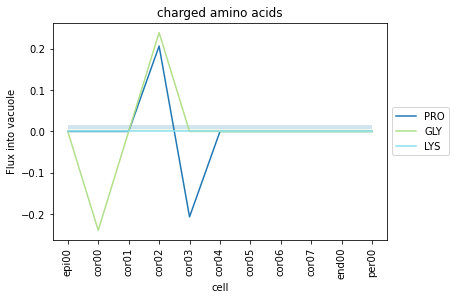

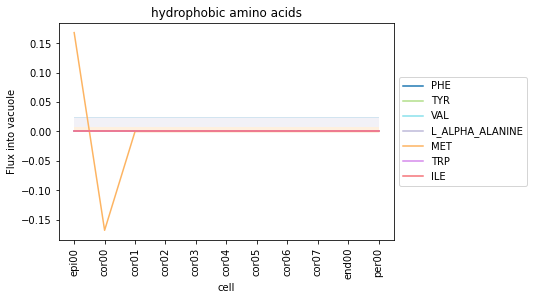

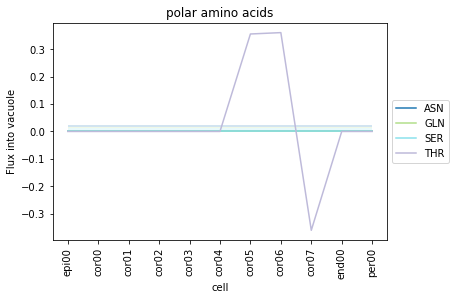

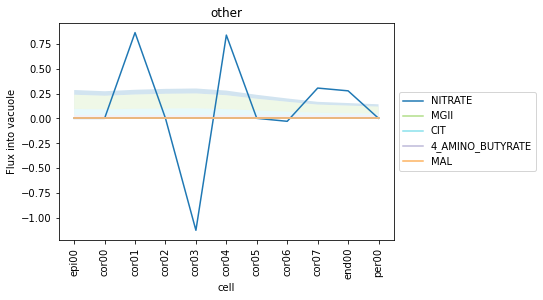

In [ ]:
import matplotlib.pyplot as plt
dict_cats={}
# dict_cats['sugars']  = ['SUCROSE','FRU','GLC']
# dict_cats['charges amino acids']     = ['GLY','LYS','PRO']
# dict_cats['hydrophobic amino acids']     = ['L_ALPHA_ALANINE','ILE','MET','PHE','TRP','TYR','VAL']
# dict_cats['polar amino acids']     = ['ASN','SER','THR','GLN']
# # dict_cats['aas']     = ['L_ALPHA_ALANINE','ASN','GLN','GLY','ILE','LYS','MET','PHE','PRO','SER','THR','TRP','TYR','VAL']
# dict_cats['other']   = [x for x in list(set(metdict.keys())) if not any([x in dict_cats[y] for y in list(dict_cats.keys())])]

# dict_cats['sugars']  = ['FRU','GLC','SUCROSE']
dict_cats['charged amino acids']     = ['PRO','GLY','LYS']
dict_cats['hydrophobic amino acids']     = ['PHE','TYR','VAL','L_ALPHA_ALANINE','MET','TRP','ILE']
dict_cats['polar amino acids']     = ['ASN','GLN','SER','THR']
dict_cats['other']   = ['NITRATE','MGII','CIT','4_AMINO_BUTYRATE','MAL']

sudpglc_ict = {}
celltags = ['_epi00','_cor00','_cor01','_cor02','_cor03','_cor04','_cor05','_cor06','_cor07','_end00','_per00']

for cat in dict_cats:
    plts=[]
    plted=[]
    for it,rxn in enumerate(dict_cats[cat]):
        if not all([abs(x)<1e-4 for x in metdictsmax[rxn]]):
            if all([abs(x)<1e-4 for x in metdictsmin[rxn]]):
                bl='zero'
            else:
                print('Warning - baseline: ',rxn,': ',metdictsmin[rxn])
            plt.stackplot(range(len(metdictsmax[rxn])),metdictsmax[rxn],labels = celltags, colors = 'white', baseline=bl,alpha=1) 
            plt.stackplot(range(len(metdictsmax[rxn])),metdictsmax[rxn],labels = celltags, colors = col[it], baseline=bl,alpha=0.2) 
            plts+=plt.plot(metdict[rxn],color=col[it])
            plted+=[it]
    plt.legend(plts,[dict_cats[cat][x] for x in plted],bbox_to_anchor=(1,0.5),loc='center left')
    plt.title(cat)
    plt.xticks(range(len(metdict[rxn])),labels=[x[1:] for x in celltags],rotation=90)
    plt.xlabel('cell')
    plt.ylabel('Flux into vacuole')
    plt.show()

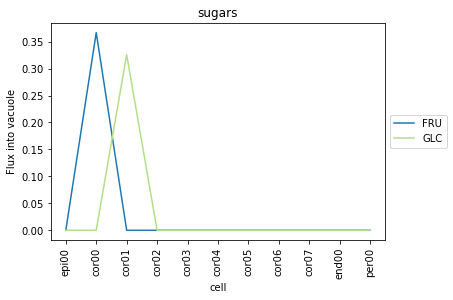

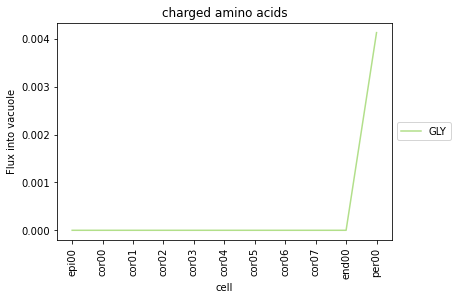

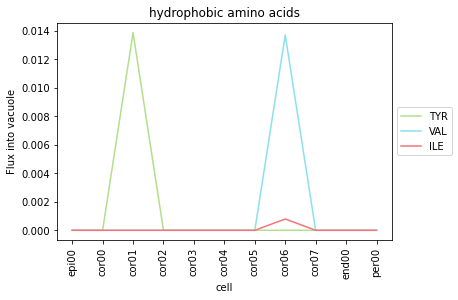

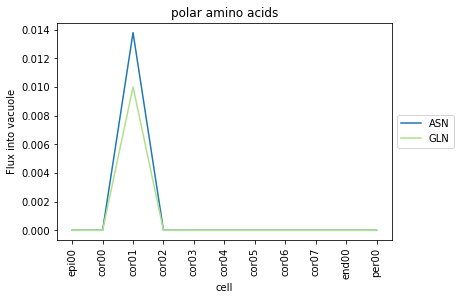

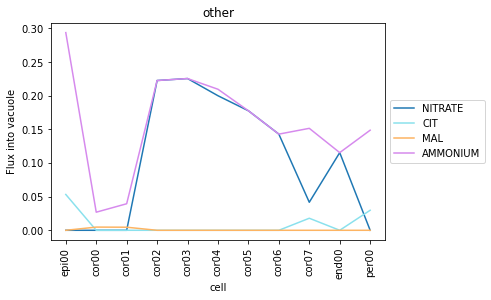

In [ ]:
# Original model sol
import matplotlib.pyplot as plt
dict_cats={}
# dict_cats['sugars']  = ['SUCROSE','FRU','GLC']
# dict_cats['charges amino acids']     = ['GLY','LYS','PRO']
# dict_cats['hydrophobic amino acids']     = ['L_ALPHA_ALANINE','ILE','MET','PHE','TRP','TYR','VAL']
# dict_cats['polar amino acids']     = ['ASN','SER','THR','GLN']
# # dict_cats['aas']     = ['L_ALPHA_ALANINE','ASN','GLN','GLY','ILE','LYS','MET','PHE','PRO','SER','THR','TRP','TYR','VAL']
# dict_cats['other']   = [x for x in list(set(metdicto.keys())) if not any([x in dict_cats[y] for y in list(dict_cats.keys())])]

dict_cats['sugars']  = ['FRU','GLC','SUCROSE']
dict_cats['charged amino acids']     = ['PRO','GLY','LYS']
dict_cats['hydrophobic amino acids']     = ['PHE','TYR','VAL','L_ALPHA_ALANINE','MET','TRP','ILE']
dict_cats['polar amino acids']     = ['ASN','GLN','SER','THR']
dict_cats['other']   = ['NITRATE','MGII','CIT','4_AMINO_BUTYRATE','MAL','AMMONIUM']

sudpglc_ict = {}
celltags = ['_epi00','_cor00','_cor01','_cor02','_cor03','_cor04','_cor05','_cor06','_cor07','_end00','_per00']

for cat in dict_cats:
    plts=[]
    plted=[]
    for it,rxn in enumerate(dict_cats[cat]):
        if rxn in metdicto.keys():
            if not all([abs(x)<1e-4 for x in metdicto[rxn]]):
                plts+=plt.plot(metdicto[rxn],color=col[it])
                plted+=[it]
    plt.legend(plts,[dict_cats[cat][x] for x in plted],bbox_to_anchor=(1,0.5),loc='center left')
    plt.title(cat)
    plt.xticks(range(len(metdicto[rxn])),labels=[x[1:] for x in celltags],rotation=90)
    plt.xlabel('cell')
    plt.ylabel('Flux into vacuole')
    plt.show()

In [ ]:
rmodel.reactions.CIT_v_biomass_epi00

Reaction identifier,CIT_v_biomass_epi00
Name,
Memory address,0x07fadf912dac0
Stoichiometry,0.5 CIT_v_epi00 + 2.5 VC_epi00 + 0.5 aCIT_v_epi00 --> CIT_b_epi00 + VO_epi00 0.5 CIT + 2.5 vacuolar charge + 0.5 aCIT[v] --> + vacuolar osmolytes
GPR,
Lower bound,0.0
Upper bound,1000.0


In [ ]:
for rxn in rmodel.reactions:
    if any(['VO_' in met.id for met in rxn.metabolites]) and solo[rxn.id]!=0:
        print(solo[rxn.id], rxn.id)

0.10648736250481432 CIT_v_biomass_epi00
0.027600460505623703 L_ASPARTATE_v_biomass_epi00
0.2938188667676595 AMMONIUM_v_biomass_epi00
0.03914599462289246 VacCytRatio_epi00
0.3667089816682849 FRU_v_biomass_cor00
0.0158247836093669 MAL_v_biomass_cor00
0.02690213213592373 AMMONIUM_v_biomass_cor00
0.037456239459314394 VacCytRatio_cor00
0.009999539357804363 GLN_v_biomass_cor01
0.32587059224145565 GLC_v_biomass_cor01
0.013562429335049475 L_ASPARTATE_v_biomass_cor01
0.013791269625574455 ASN_v_biomass_cor01
0.015228734328447895 MAL_v_biomass_cor01
0.013860757605526217 TYR_v_biomass_cor01
0.03945127769341089 AMMONIUM_v_biomass_cor01
0.03579230453907782 VacCytRatio_cor01
0.2226209949474575 NITRATE_v_biomass_cor02
0.2226209949474575 AMMONIUM_v_biomass_cor02
0.033771297921730024 VacCytRatio_cor02
0.22555822256704453 NITRATE_v_biomass_cor03
0.22555822256704453 AMMONIUM_v_biomass_cor03
0.03155971084560494 VacCytRatio_cor03
0.009634786969252851 GLT_v_biomass_cor04
0.2000016787107061 NITRATE_v_biomass_

In [ ]:
osprot = {}
vomet='VO_cor02'
hv = 'PROTON_v_cor02'
for met in list(set(metdict.keys())):
    metin = [rxn for rxn in rmodel.reactions if (rmodel.metabolites.get_by_id(met+'_c_cor02') in rxn.reactants and rmodel.metabolites.get_by_id(met+'_v_cor02') in rxn.products ) and not any([x for x in rxn.metabolites if (met not in x.id and 'PROTON' not in x.id)])]
    metbiomass = [rxn for rxn in rmodel.reactions if (rmodel.metabolites.get_by_id(met+'_v_cor02') in rxn.metabolites and 'v_biomass' in rxn.id)]
    if len(metin)==1:
        metin=metin[0]
    if len(metbiomass)==1:
        metbiomass=metbiomass[0]
    osprot[met] = (metbiomass.get_coefficient(vomet)/metbiomass.get_coefficient(met+'_v_cor02'))/(metin.get_coefficient(hv)/metin.get_coefficient(met+'_v_cor02'))
print(sorted(osprot.items(),key=lambda x:x[1])) # osprot gives ratio of VO to protons released


In [ ]:

plt.bar(sorted(osprot.keys(),key=lambda x: osprot[x]),sorted(osprot.values()),width=0.4)
temp=plt.xticks(rotation=90)

In [ ]:
plts=[]
plted=[]
bl='zero'
numrangemax={}
numrange={}
for it,cat in enumerate(list(set(osprot.values()))):
    numrangemax[cat] = [sum([metdictsmax[met][x] for met in list(metdictsmax.keys()) if osprot[met]==cat]) for x in range(len(cells))]
    numrange[cat] = [sum([metdict[met][x] for met in list(metdict.keys()) if osprot[met]==cat]) for x in range(len(cells))]
sortedosprot = sorted(list(set(osprot.values())),key=lambda x: max(numrangemax[x]),reverse=True)
for it,cat in enumerate(sortedosprot):
    plt.stackplot(range(len(numrangemax[cat])),numrangemax[cat],labels = celltags, colors = 'white', baseline=bl,alpha=1) 
    plt.stackplot(range(len(numrangemax[cat])),numrangemax[cat],labels = celltags, colors = col[it], baseline=bl,alpha=0.2) 
    plts+=plt.plot(numrange[cat],color=col[it])
plt.legend(plts,sortedosprot,bbox_to_anchor=(1,0.5),loc='center left')
plt.title('Osmolytes by proton efficiency')
plt.xticks(range(len(numrange[cat])),labels=[x[1:] for x in celltags],rotation=90)
plt.xlabel('cell')
plt.ylabel('Flux into vacuole')
plt.show()

In [ ]:
# print(rmodel.reactions.Mg_biomass_cor02.reaction,rmodel.reactions.Mg_biomass_cor02.lower_bound,rmodel.reactions.Mg_biomass_cor02.upper_bound)
# print(rmodel.reactions.MGII_v_biomass_cor02.reaction,rmodel.reactions.MGII_v_biomass_cor02.lower_bound,rmodel.reactions.MGII_v_biomass_cor02.upper_bound)
rmodel.reactions.MAL_CIT_vc_cor02

In [ ]:
for rxn in rmodel.reactions:
    if 'biomass_per00' in rxn.id:
        print(rxn.id, rxn.lower_bound,rxn.upper_bound,rxn.reaction)

In [ ]:
for rxn in rmodel.reactions:
    if 'nitrate_v' in rxn.id.lower():
        print(rxn.id,rxn.reaction)

In [ ]:
for rxn in rmodel.metabolites.NITRATE_b_per00.reactions:
    print(rxn.id, rxn.lower_bound,rxn.upper_bound,rxn.reaction)

In [ ]:
for met in rmodel.reactions.soluble_biomass_tissue.metabolites:
    if 'nitrate' in met.id.lower():
        print(met.id, rmodel.reactions.soluble_biomass_tissue.get_coefficient(met.id))

# Look into transport between cells

In [ ]:
for rxn in rmodel:
    if any(cells[0] in x for x in rxn.compartments)

In [ ]:
rxn.compartments

# Energy budgets

In [ ]:
from analysis import *
#['UDP_GLUCOSE_c_cor00','GDP_D_GLUCOSE_c_per00']
mapSource(rmodel,sol,'CELLULOSE_c_cor05',i_max=7)
# UTP and GTP both produced via kinase reactions 1:1 with ATP, UTP synth requires 0.15 H+ per UTP, H+ imported with nitrate and Mg2+

In [ ]:
from analysis import *
#['UDP_GLUCOSE_c_cor00','GDP_D_GLUCOSE_c_per00']
mapSink(rmodel,sol,'ATP_p_cor03',i_max=7)
# UTP and GTP both produced via kinase reactions 1:1 with ATP, UTP synth requires 0.15 H+ per UTP, H+ imported with nitrate and Mg2+

In [153]:
total_atp_dict, atp_rxns_fluxes= generateATPbudgetforonecell_ed(rmodel,sol.fluxes,'_cor05', percentage=False)

In [ ]:
atp_rxns_fluxes

{'Others-pos': 0,
 'Others-neg': -0.00549110425989795,
 'PROTONATP_rev_vc_cor05': -0.17490150444428468,
 'PHOSGLYPHOS_RXN_c_cor05': 0.12074599430429551,
 'PEPDEPHOS_RXN_c_cor05': 0.08573485073866226,
 'ACETYL_COA_CARBOXYLTRANSFER_RXN_p_cor05': -0.07416435775492941,
 'PEPDEPHOS_RXN_p_cor05': 0.037082178877464705,
 'PHOSGLYPHOS_RXN_p_cor05': 0.037082178877464705,
 'Protein_Polymerisation_c_cor05': -0.010982208519795898,
 'Protein_Translocation_c_cor05': -0.007934645655552536,
 'ADENYL_KIN_RXN_c_cor05': -0.005491104259897949,
 'Protein_Processing_c_cor05': -0.0016802779035287722}

{'Others-pos': 0, 'Others-neg': 0, 'Mitochondrial_ATP_Synthase_m_epi00': 4.264732430017791, 'PROTON_ATPase_c_epi00': -2.442499245301843, '2_PERIOD_7_PERIOD_7_PERIOD_44_RXN_c_epi00': -0.8308851246432493, 'FRUCTOKINASE_RXN_c_epi00': -0.5958004327242401, '2_PERIOD_7_PERIOD_7_PERIOD_34_RXN_c_epi00': -0.474284237927315, 'PHOSGLYPHOS_RXN_c_epi00': 0.23927458413307567, 'PROTONATP_rev_vc_epi00': -0.2003066649394626, 'ACETYL_COA_CARBOXYLTRANSFER_RXN_p_epi00': -0.10856270955618941, 'PEPDEPHOS_RXN_p_epi00': 0.10690050720014789, 'SUCCCOASYN_RXN_m_epi00': 0.09655116104774153, 'Protein_Polymerisation_c_epi00': -0.015985167128884207, 'Protein_Translocation_c_epi00': -0.01154928325061884, 'ADENYL_KIN_RXN_m_epi00': -0.007992583564442086, 'ADENYL_KIN_RXN_p_epi00': -0.0025308387812009742, 'PRPPSYN_RXN_p_epi00': -0.002530838781200957, 'SHIKIMATE_KINASE_RXN_p_epi00': -0.002530838781200957, 'Protein_Processing_c_epi00': -0.0024457305707192836, 'GLUC1PADENYLTRANS_RXN_p_epi00': -0.0015624028837466456, 'ASPART

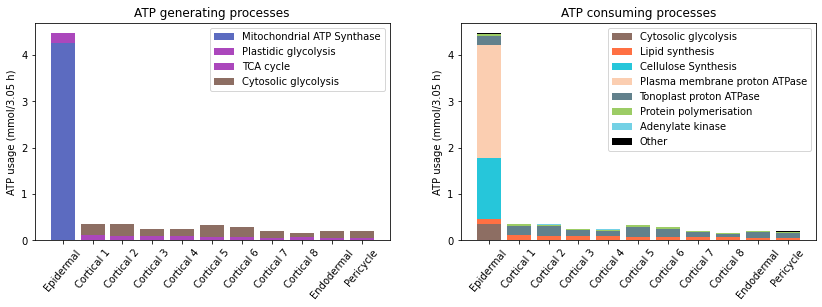

In [234]:

temp=generate_atp_process_chart_all(rmodel, sol)
# No tonoplast H+-ATPase implies H+-PPiase

In [235]:
reaction_atp_process = {
    'Mitochondrial_ATP_Synthase_m_': 'Mitochondrial ATP Synthase',
    'PHOSGLYPHOS_RXN_c_': 'Cytosolic glycolysis' ,
    'PEPDEPHOS_RXN_p_': 'Plastidic glycolysis',
    'PHOSPHORIBULOSEKINASE_RXN_p_': 'Calvin cycle',
    'PEPDEPHOS_RXN_c_': 'Cytosolic glycolysis',
    'PHOSGLYPHOS_RXN_p_': 'Plastidic glycolysis',
    'ACETYL_COA_CARBOXYLTRANSFER_RXN_p_': 'Lipid synthesis',
    'UDPKIN_RXN_c_': 'Cellulose Synthesis',
    'GDPKIN_RXN_c_': 'Cellulose Synthesis',
    'FRUCTOKINASE_RXN_c_': 'Cytosolic glycolysis',
    'PROTON_ATPase_c_': 'Plasma membrane proton ATPase',
    'PROTONATP_rev_vc':'Tonoplast proton ATPase',
    'PEPCARBOXYKIN_RXN_c_': 'PEP carboxykinase',
    'GLUC1PURIDYLTRANS_RXN_c_': 'Cellulose Synthesis',
    'SUCROSE_SYNTHASE_RXN_c_': 'Cellulose Synthesis',
    '2_PERIOD_7_PERIOD_7_PERIOD_44_RXN_c_':'Cellulose Synthesis',
    '2_PERIOD_7_PERIOD_7_PERIOD_34_RXN_c_': 'Cellulose Synthesis',
    'Protein_Polymerisation_c_': 'Protein polymerisation',
    '2_PERIOD_7_PERIOD_7_PERIOD_13_RXN_c_': 'Cellulose Synthesis',
    'Protein_Translocation_c': 'Protein polymerisation',
    'Protein_Processing_c': 'Protein polymerisation',
    'ADENYL_KIN': 'Adenylate kinase',
    'TRNA_LIGASE_RXN':'Protein polymerisation',
    'GLURS_RXN':'Protein polymerisation',
    'SUCCCOASYN_RXN':'sad'
    }
met = 'ATP_p_epi00'
for rxn in rmodel.metabolites.get_by_id(met).reactions:
    if sol[rxn.id]*rxn.get_coefficient(met)<0 and not any([x in rxn.id for x in list(reaction_atp_process.keys())]):
        print(round(sol[rxn.id]*rxn.get_coefficient(met),4),rxn.id, rxn.reaction)

-0.0023 PRPPSYN_RXN_p_epi00 0.9 ATP_p_epi00 + RIBOSE_5P_p_epi00 + 0.1 aATP_p_epi00 --> AMP_p_epi00 + 0.9 PROTON_p_epi00 + 0.8 PRPP_p_epi00 + 0.2 aPRPP_p_epi00
-0.0023 SHIKIMATE_KINASE_RXN_p_epi00 0.9 ATP_p_epi00 + SHIKIMATE_p_epi00 + 0.1 aATP_p_epi00 --> 0.8 ADP_p_epi00 + 0.9 PROTON_p_epi00 + SHIKIMATE_5P_p_epi00 + 0.2 aADP_p_epi00
-0.0014 GLUC1PADENYLTRANS_RXN_p_epi00 0.9 ATP_p_epi00 + GLC_1_P_p_epi00 + 0.45 PROTON_p_epi00 + 0.1 aATP_p_epi00 --> ADP_D_GLUCOSE_p_epi00 + 0.55 PPI_p_epi00 + 0.45 bPPI_p_epi00


In [225]:
import importlib,sys
importlib.reload(sys.modules['analysis'])
from analysis import *
mapSink(rmodel,sol,'CARBOXYPHENYLAMINO_DEOXYRIBULOSE_P_p_epi00',3)

['IGPSYN_RXN_p_epi00']


ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [ ]:
temp1=pd.DataFrame(temp)
# print(temp1)
temp1.to_csv('ATP_budget_table.csv')

Other:  Others-pos
Other:  Others-neg
Other:  MALIC_NADP_RXN_p_epi00
Other:  GLUTSEMIALDEHYDROG_RXN_c_epi00
Other:  Others-pos
Other:  Others-neg
Other:  Others-pos
Other:  Others-neg
Other:  Others-pos
Other:  Others-neg
Other:  MALIC_NADP_RXN_p_cor02
Other:  ACETOLACTREDUCTOISOM_RXN_p_cor02
Other:  Others-pos
Other:  Others-neg
Other:  ACETOLACTREDUCTOISOM_RXN_p_cor03
Other:  MALIC_NADP_RXN_p_cor03
Other:  Others-pos
Other:  Others-neg
Other:  Others-pos
Other:  Others-neg
Other:  Others-pos
Other:  Others-neg
Other:  Others-pos
Other:  Others-neg
Other:  ACETOLACTREDUCTOISOM_RXN_p_cor07
Other:  MALIC_NADP_RXN_p_cor07
Other:  Others-pos
Other:  Others-neg
Other:  PYRROLINECARBREDUCT_RXN_NAD_c_end00
Other:  MALIC_NADP_RXN_c_end00
Other:  Others-pos
Other:  Others-neg


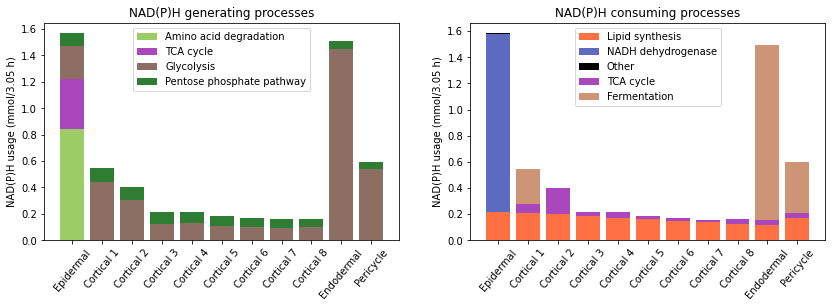

In [236]:

temp=generate_nad_process_chart_all(rmodel, sol)

In [ ]:
temp1=pd.DataFrame(temp)
print(temp1)
temp1.to_csv('NADPH_budget_table.csv')

                             _epi00    _cor00    _cor01    _cor02    _cor03  \
Amino acid degradation     0.533645  0.000000  0.000000  0.000000  0.000000   
TCA cycle                  1.106446 -0.032152 -0.404667 -0.028767 -0.055627   
Glycolysis                 0.344990  0.136029  0.516913  0.121707  0.142158   
Pentose phosphate pathway  0.110809  0.103877  0.098967  0.092940  0.086531   
Fe reduction/oxidation     0.000000  0.000000  0.000000  0.000000  0.000000   
Fermentation               0.000000  0.000000  0.000000  0.000000  0.000000   
Lipid synthesis           -0.217125 -0.207753 -0.197935 -0.185880 -0.173062   
NADH dehydrogenase        -1.876518  0.000000  0.000000  0.000000  0.000000   
Other                     -0.002246  0.000000 -0.013278  0.000000  0.000000   

                             _cor04    _cor05    _cor06    _cor07    _end00  \
Amino acid degradation     0.000000  0.000000  0.000000  0.000000  0.000000   
TCA cycle                 -0.024893 -0.047677 -0.03

In [216]:
for rxn in rmodel.metabolites.ATP_c_cor04.reactions:
    if rxn.x!=0:
        print(round(rxn.x*rxn.get_coefficient('ATP_c_cor04'),4),rxn.id)

-0.1383 PROTONATP_rev_vc_cor04
0.0412 PEPDEPHOS_RXN_c_cor04
-0.0056 Protein_Translocation_c_cor04
-0.0003 ALANINE_TRNA_LIGASE_RXN_c_cor04
-0.0003 THREONINE_TRNA_LIGASE_RXN_c_cor04
-0.0001 GLUTAMINE_TRNA_LIGASE_RXN_c_cor04
-0.0002 VALINE_TRNA_LIGASE_RXN_c_cor04
0.1194 PHOSGLYPHOS_RXN_c_cor04
-0.0002 PHENYLALANINE_TRNA_LIGASE_RXN_c_cor04
-0.0 LEUCINE_TRNA_LIGASE_RXN_c_cor04
-0.0002 ISOLEUCINE_TRNA_LIGASE_RXN_c_cor04
-0.0002 ASPARAGINE_TRNA_LIGASE_RXN_c_cor04
-0.0004 ASPARTATE_TRNA_LIGASE_RXN_c_cor04
-0.0004 LYSINE_TRNA_LIGASE_RXN_c_cor04
-0.0039 ADENYL_KIN_RXN_c_cor04
-0.0003 GLYCINE_TRNA_LIGASE_RXN_c_cor04
-0.0078 GDPKIN_RXN_c_cor04
-0.0002 HISTIDINE_TRNA_LIGASE_RXN_c_cor04
-0.0002 ARGININE_TRNA_LIGASE_RXN_c_cor04
-0.0002 METHIONINE_TRNA_LIGASE_RXN_c_cor04
-0.0002 TYROSINE_TRNA_LIGASE_RXN_c_cor04
-0.0003 GLURS_RXN_c_cor04
-0.0012 Protein_Processing_c_cor04
-0.0004 SERINE_TRNA_LIGASE_RXN_c_cor04


In [ ]:
tempax

array([[<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>]], dtype=object)

<BarContainer object of 4 artists>

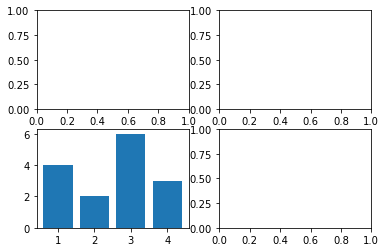

In [ ]:
fig, tempax = plt.subplots(nrows=2, ncols=2)
tempax[1][0].bar([1,2,3,4],[4,2,6,3])

In [159]:
for rxn in rmodel.reactions:
    if 'PHOSPHORIBULOKINASE_RXN' in rxn.id:
        print(round(rxn.x,4),rxn.id)

0.0 PHOSPHORIBULOKINASE_RXN_p_epi00
0.0 PHOSPHORIBULOKINASE_RXN_p_cor00
0.0 PHOSPHORIBULOKINASE_RXN_p_cor01
0.0 PHOSPHORIBULOKINASE_RXN_p_cor02
0.0 PHOSPHORIBULOKINASE_RXN_p_cor03
0.0 PHOSPHORIBULOKINASE_RXN_p_cor04
0.0 PHOSPHORIBULOKINASE_RXN_p_cor05
0.0 PHOSPHORIBULOKINASE_RXN_p_cor06
0.0 PHOSPHORIBULOKINASE_RXN_p_cor07
0.0 PHOSPHORIBULOKINASE_RXN_p_end00
0.0 PHOSPHORIBULOKINASE_RXN_p_per00


In [209]:
import matplotlib.pyplot as plt
def generate_atp_process_chart_all(model, solution1,split_epi=None):
    reaction_atp_process = {
    'Mitochondrial_ATP_Synthase_m_': 'Mitochondrial ATP Synthase',
    'PHOSGLYPHOS_RXN_c_': 'Cytosolic glycolysis' ,
    'PEPDEPHOS_RXN_p_': 'Plastidic glycolysis',
    'PHOSPHORIBULOSEKINASE_RXN_p_': 'Calvin cycle',
    'PEPDEPHOS_RXN_c_': 'Cytosolic glycolysis',
    'PHOSGLYPHOS_RXN_p_': 'Plastidic glycolysis',
    'ACETYL_COA_CARBOXYLTRANSFER_RXN_p_': 'Lipid synthesis',
    'UDPKIN_RXN_c_': 'Cellulose Synthesis',
    'GDPKIN_RXN_c_': 'Cellulose Synthesis',
    'FRUCTOKINASE_RXN_c_': 'Cytosolic glycolysis',
    'PROTON_ATPase_c_': 'Plasma membrane proton ATPase',
    'PROTONATP_rev_vc':'Tonoplast proton ATPase',
    'PEPCARBOXYKIN_RXN_c_': 'PEP carboxykinase',
    'GLUC1PURIDYLTRANS_RXN_c_': 'Cellulose Synthesis',
    'SUCROSE_SYNTHASE_RXN_c_': 'Cellulose Synthesis',
    '2_PERIOD_7_PERIOD_7_PERIOD_44_RXN_c_':'Cellulose Synthesis',
    '2_PERIOD_7_PERIOD_7_PERIOD_34_RXN_c_': 'Cellulose Synthesis',
    'Protein_Polymerisation_c_': 'Protein polymerisation',
    '2_PERIOD_7_PERIOD_7_PERIOD_13_RXN_c_': 'Cellulose Synthesis',
    'Protein_Translocation_c': 'Protein polymerisation',
    'Protein_Processing_c': 'Protein polymerisation',
    'ADENYL_KIN': 'Adenylate kinase',
    'TRNA_LIGASE_RXN':'Protein polymerisation',
    'GLURS_RXN':'Protein polymerisation',
    'SUCCCOASYN_RXN': 'TCA cycle',
    
    }

    atp_coloursdict = {
    'Mitochondrial ATP Synthase': '#5C6BC0',
    'Cytosolic glycolysis':'#8D6E63' ,
    'Plastidic glycolysis': '#AB47BC',
    'Calvin cycle': '#2E7D32',
    'Lipid synthesis': '#FF7043',
    'Cellulose Synthesis': '#26C6DA',
    'Protein polymerisation': '#9CCC65',
    'Plasma membrane proton ATPase': '#fbceb1',
    'PEP carboxykinase': '#cd9575',
    'Tonoplast proton ATPase': '#62818C',
    'TCA cycle': '#AB47BC',
    'Other': '#000000',
    'Adenylate kinase':'#73D1E5'}
    outdict={}
    cell_names = ["Epidermal", "Cortical 1", "Cortical 2", "Cortical 3", "Cortical 4",
                    "Cortical 5", "Cortical 6", "Cortical 7", "Cortical 8", "Endodermal", "Pericycle"]
    celltags = ['_epi00','_cor00','_cor01','_cor02','_cor03','_cor04','_cor05','_cor06','_cor07','_end00','_per00']
    # atp_rxns_fluxes={}

    fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2)
    poskeykeep=[]
    negkeykeep=[]
    p1={}
    p2={}
    if split_epi:
        start=1
    else:
        start=0
    for it,celltag in enumerate(celltags[start:]):
        outdict[celltag]={}
        total_atp_dict, atp_rxns_fluxes= generateATPbudgetforonecell_ed(model,solution1.fluxes,celltag, percentage=False,thresh=0)
        # print([reaction_atp_process[x[:-5]]+str(atp_rxns_fluxes[x]) for x in list(atp_rxns_fluxes.keys()) if x[:-5] in reaction_atp_process.keys()])
        # if 'per00' in celltag:
            # print(atp_rxns_fluxes)
        process_fluxes = {}
        for v in reaction_atp_process.values():
            process_fluxes[v] = 0
        process_fluxes['Other']=0
        print(atp_rxns_fluxes)
        for k in atp_rxns_fluxes.keys():
            for rxn_id in reaction_atp_process.keys():
                if rxn_id in k:
                    process = reaction_atp_process[rxn_id]
                    rxn_flux = atp_rxns_fluxes[k]
                    process_fluxes[process] = process_fluxes[process] + rxn_flux
            if not any([rxn_id in k for rxn_id in reaction_atp_process.keys()]) and abs(atp_rxns_fluxes[k])>1e-5:
                rxn_flux = atp_rxns_fluxes[k]
                process_fluxes['Other']+=rxn_flux
                print('Other: ',k,rxn_flux)

        pos_processes = process_fluxes.copy()
        to_del_pos = []
        for k in pos_processes.keys():
            if pos_processes[k] < 0:
                to_del_pos.append(k)

        for k in to_del_pos:
            del pos_processes[k]

        neg_processes = process_fluxes.copy()
        to_del_neg = []
        for k in neg_processes.keys():
            if neg_processes[k] > 0:
                to_del_neg.append(k)
        for k in to_del_neg:
            del neg_processes[k]

        pos_keys = [*pos_processes.keys()]
        pos_values = [*pos_processes.values()]
        neg_keys = [*neg_processes.keys()]
        neg_values_old = [*neg_processes.values()]
        neg_values = []
        for value in neg_values_old:
            neg_values.append(value*-1)
        for key in list(pos_processes.keys()):
            outdict[celltag][key]=pos_processes[key]
        for key in list(neg_processes.keys()):
            outdict[celltag][key]=neg_processes[key]
        plt.style.reload_library()
        # with plt.style.context('style1'):

        fig.set_size_inches(14,4)
        my_colors = ["r","g","b","k","y","m","c"]  #red, green, blue, black, etc.
        possum=0
        for itp,ii in enumerate(pos_keys):
            if ii not in poskeykeep and pos_values[itp]>1e-5:
                poskeykeep+=[ii]
        for i in range(len(poskeykeep)):
            if poskeykeep[i] in pos_keys:
                posval=pos_values[pos_keys.index(poskeykeep[i])]
                if posval>0:
                    p1[i]=ax1.bar(cell_names[it], posval, bottom=possum,color=atp_coloursdict[poskeykeep[i]])
                    possum+=posval
        ax1.tick_params("x", labelrotation=50)
        # ax1.set_ylim(0, 4)
        ax1.set_title("ATP generating processes")
        ax1.set_ylabel("ATP usage (mmol/3.05 h)")
        for itn,ii in enumerate(neg_keys):
            if ii not in negkeykeep and neg_values[itn]>1e-5:
                negkeykeep+=[ii]
        negsum=0
        for i in range(0,len(negkeykeep)):
            if negkeykeep[i] in neg_keys:
                negval=neg_values[neg_keys.index(negkeykeep[i])]
                if negval>0:
                    p2[i]=ax2.bar(cell_names[it], negval, bottom=negsum,color=atp_coloursdict[negkeykeep[i]])
                    if celltag=='_cor04':
                        print(negkeykeep[i],negval,atp_coloursdict[negkeykeep[i]])
                    negsum+=negval
        ax2.tick_params("x", labelrotation=50)
        # ax2.set_ylim(0, 4)
        ax2.set_title("ATP consuming processes")
        ax2.set_ylabel("ATP usage (mmol/3.05 h)")
    for i in range(0,len(poskeykeep)):
        p2[i]=ax2.bar(cell_names[it], 0, bottom=negsum,color=atp_coloursdict[poskeykeep[i]])
    ax1.legend(p1.values(),[poskeykeep[x] for x in list(p1.keys())])
    for i in range(0,len(negkeykeep)):
        p2[i]=ax2.bar(cell_names[it], 0, bottom=negsum,color=atp_coloursdict[negkeykeep[i]])
    ax2.legend(p2.values(),[negkeykeep[x] for x in list(p2.keys())])
    plt.savefig('Figures/ATP_budget.png',bbox_inches='tight')
    return outdict

        # plt.savefig("ATPorNAD production and usage/ATP/"+"ATP_"+cell_tag+"production+usage", bbox_inches='tight')

In [196]:
def generateATPbudgetforonecell_ed(model,solution,tag = "_epi00", outfile="",show_plot=False,percentage=False,save_plot_to="",thresh=0.005):

    #find colour hex codes here: https://www.colorhexa.com/color-names
    atp_coloursdict = {
        'Mitochondrial_ATP_Synthase_m_': '#5C6BC0',
        'PHOSGLYPHOS_RXN_c_':'#8D6E63' ,
        'PEPDEPHOS_RXN_p_': '#AB47BC',
        'PHOSPHORIBULOSEKINASE_RXN_p_': '#2E7D32',
        'PEPDEPHOS_RXN_c_': '#EF5350',
        'PHOSGLYPHOS_RXN_c_': '#FF7043',
        'GLUC1PADENYLTRANS_RXN_c_': '#26C6DA',
        'ACETYL_COA_CARBOXYLTRANSFER_RXN_p_': '#9CCC65',
        'UDPKIN_RXN_c_': '#BDBDBD',
        'GDPKIN_RXN_c_': '#fbceb1',
        'FRUCTOKINASE_RXN_c_': '#cd9575',
        'PROTON_ATPase_c_': '#000000',
        'Others-pos': '#000000',}
    colourDict = atp_coloursdict

    total_atp_dict = {}
    model_tag = tag
    if outfile!="":
        fout = open(outfile,"w")
    ATPdict = dict()
    total = 0
    excl = ['UDPKIN_RXN_c_','GDPKIN_RXN_c_','_mc_','_xc_','_pc_','Transfer']
    energymets=['ATP_','GTP_','UTP_']
    metcomps={'ATP_':("c","p","m","x"),'GTP_':("c","p","m"),'UTP_':("c","p")}
    
    
    for thismet in energymets:
        for p in metcomps[thismet]:
            met=model.metabolites.get_by_id(thismet+p+model_tag)
            met1=model.metabolites.get_by_id("a"+thismet+p+model_tag)
            for rxn in met.reactions:
                if any([rxn.id.__contains__(x) for x in excl]):
                    continue
                sto=rxn.metabolites.get(met)
                sto1=rxn.metabolites.get(met1)
                try:
                    if outfile!="":
                        fout.write(rxn.id+"\t"+rxn.reaction+"\t"+str(solution.get(rxn.id)*(sto+sto1))+"\t"+met.compartment+"\n")
                    ATPdict[rxn.id]=solution.get(rxn.id)*(sto+sto1)
                except:
                    continue
                try:
                    if solution.get(rxn.id)*(sto+sto1) > 0:
                        total = total + (solution.get(rxn.id)*(sto+sto1))
                except:
                    continue
    if outfile!="":
        fout.close()

    tempDict = dict()
    for rxn in ATPdict.keys():
        tempDict[rxn]=abs(ATPdict[rxn])

    #sort ATPdict by values
    import operator
    sorted_by_value = sorted(tempDict.items(), key= lambda x:x[1],reverse=True)

    ATPdict2 = dict()
    ATPdict2["Others-pos"]=0
    ATPdict2["Others-neg"]=0
    baseline = dict()
    pos_base=0
    neg_base=0
    i=0
    for TEMP in sorted_by_value:
            rxn = TEMP[0]
            if ATPdict[rxn]>0:
                if ATPdict[rxn] < total*thresh:
                    if percentage:
                        ATPdict2["Others-pos"]=ATPdict2["Others-pos"]+float(ATPdict[rxn]*100)/total
                    else:
                        ATPdict2["Others-pos"]=ATPdict2["Others-pos"]+ATPdict[rxn]
                    continue
                base = pos_base
                if percentage:
                    ATPdict2[rxn]=float(ATPdict[rxn]*100)/total
                    pos_base = pos_base + float(ATPdict[rxn]*100)/total
                else:
                    pos_base = pos_base + ATPdict[rxn]
                    ATPdict2[rxn]=ATPdict[rxn]
            else:
                if abs(ATPdict[rxn]) < total*thresh:
                    if percentage:
                        ATPdict2["Others-neg"]=ATPdict2["Others-neg"]+float(ATPdict[rxn]*100)/total
                    else:
                        ATPdict2["Others-neg"]=ATPdict2["Others-neg"]+ATPdict[rxn]
                    continue
                base = neg_base
                if percentage:
                    ATPdict2[rxn]=float(ATPdict[rxn]*100)/total
                    neg_base = neg_base + float(ATPdict[rxn]*100)/total
                else:
                    neg_base = neg_base + ATPdict[rxn]
                    ATPdict2[rxn]=ATPdict[rxn]
            i=i+1
            baseline[rxn]=base
    baseline["Others-pos"]=pos_base
    baseline["Others-neg"]=neg_base

    #obtaining total ATP expenditure
    total = 0
    for value in ATPdict2.values():
        if value > 0:
            total += value
    # print(model_tag, " total ATP consumed: ", total)
    total_atp_dict[model_tag] = total


    #making plots
    if show_plot:
        import matplotlib.pyplot as plt
        #plt.suptitle(title)
        plt.rcParams.update({'font.size': 10}) #sets a global fontsize
        plt.rcParams['xtick.major.size'] = 5 # adjusts tick line length and width
        plt.rcParams['xtick.major.width'] = 1
        plt.rcParams['ytick.major.size'] = 5
        plt.rcParams['ytick.major.width'] = 1
        plt.rcParams['axes.linewidth']=2 # makes axes line thicker
        plt.figure(figsize=(3,4))
        for rxn in ATPdict2.keys():
            if colourDict.keys().__contains__(rxn[:-5]):
                plt.bar(1,ATPdict2[rxn],width=0.1,bottom=baseline[rxn],label=rxn,color=colourDict[rxn[:-5]])
            else:
                plt.bar(1,ATPdict2[rxn],width=0.1,bottom=baseline[rxn],label=rxn)
        plt.xlim(0.8,1.2)
        if percentage:
            plt.ylabel("ATP produced/consumed (%)")
        else:
            plt.ylabel("ATP produced/consumed (in moles)")
        handles, labels = plt.gca().get_legend_handles_labels()
        labels2=list(set(labels)-set(["Others-neg","Others-pos"]))+list(["Others-neg","Others-pos"])
        handles2=[handles[labels.index(i)] for i in labels2]
        lgd=plt.legend(handles2,labels2,bbox_to_anchor=(1,1))
        plt.axhline(0,linestyle="--",color="black")
        plt.tight_layout
        plt.savefig(save_plot_to, bbox_extra_artists=(lgd,), bbox_inches='tight')

    return total_atp_dict, ATPdict2

In [152]:
def generateATPbudget(model,solution,outfile="",show_plot=True,percentage=False,save_plot_to="temp.png",colourDict=None):
    if not colourDict:
        #find colour hex codes here: https://www.colorhexa.com/color-names
        atp_coloursdict = {
            'Mitochondrial_ATP_Synthase_m_': '#5C6BC0',
            'PHOSGLYPHOS_RXN_c_':'#8D6E63' ,
            'PEPDEPHOS_RXN_p_': '#AB47BC',
            'PHOSPHORIBULOSEKINASE_RXN_p_': '#2E7D32',
            'PEPDEPHOS_RXN_c_': '#EF5350',
            'PHOSGLYPHOS_RXN_c_': '#FF7043',
            'GLUC1PADENYLTRANS_RXN_c_': '#26C6DA',
            'ACETYL_COA_CARBOXYLTRANSFER_RXN_p_': '#9CCC65',
            'UDPKIN_RXN_c_': '#BDBDBD',
            'GDPKIN_RXN_c_': '#fbceb1',
            'FRUCTOKINASE_RXN_c_': '#cd9575',
            'PROTON_ATPase_c_': '#000000',
            'Others-pos': '#000000',}
        colourDict = atp_coloursdict

    total_atp_dict = {}
    for model_tag in ["_epi00","_cor00","_cor01","_cor02","_cor03","_cor04","_cor05","_cor06","_cor07","_end00", "_per00"]:
        if outfile!="":
            fout = open(outfile,"w")
        ATPdict = dict()
        total = 0
        for p in ("c","p","m","x"):
            met=model.metabolites.get_by_id("ATP_"+p+model_tag)
            met1=model.metabolites.get_by_id("aATP_"+p+model_tag)
            for rxn in met.reactions:
                if rxn.id.__contains__("ATP_AMP_mc") or rxn.id.__contains__("ATP_ADP_mc") or rxn.id.__contains__("ATP_pc") or rxn.id.__contains__("AMP_ATP_xc") or rxn.id.__contains__("ATP_ADP_Pi_pc"):
                    continue
                sto=rxn.metabolites.get(met)
                sto1=rxn.metabolites.get(met1)
                try:
                    if outfile!="":
                        fout.write(rxn.id+"\t"+rxn.reaction+"\t"+str(solution.get(rxn.id)*(sto+sto1))+"\t"+met.compartment+"\n")
                    ATPdict[rxn.id]=solution.get(rxn.id)*(sto+sto1)
                except:
                    continue
                try:
                    if solution.get(rxn.id)*(sto+sto1) > 0:
                        total = total + (solution.get(rxn.id)*(sto+sto1))
                except:
                    continue
        if outfile!="":
            fout.close()

        tempDict = dict()
        for rxn in ATPdict.keys():
            tempDict[rxn]=abs(ATPdict[rxn])

        #sort ATPdict by values
        import operator
        sorted_by_value = sorted(tempDict.items(), key= lambda x:x[1],reverse=True)

        ATPdict2 = dict()
        ATPdict2["Others-pos"]=0
        ATPdict2["Others-neg"]=0
        baseline = dict()
        pos_base=0
        neg_base=0
        i=0
        for TEMP in sorted_by_value:
            rxn = TEMP[0]
            if ATPdict[rxn]>0:
                if ATPdict[rxn] < total*0.005:
                    if percentage:
                        ATPdict2["Others-pos"]=ATPdict2["Others-pos"]+float(ATPdict[rxn]*100)/total
                    else:
                        ATPdict2["Others-pos"]=ATPdict2["Others-pos"]+ATPdict[rxn]
                    continue
                base = pos_base
                if percentage:
                    ATPdict2[rxn]=float(ATPdict[rxn]*100)/total
                    pos_base = pos_base + float(ATPdict[rxn]*100)/total
                else:
                    pos_base = pos_base + ATPdict[rxn]
                    ATPdict2[rxn]=ATPdict[rxn]
            else:
                if abs(ATPdict[rxn]) < total*0.005:
                    if percentage:
                        ATPdict2["Others-neg"]=ATPdict2["Others-neg"]+float(ATPdict[rxn]*100)/total
                    else:
                        ATPdict2["Others-neg"]=ATPdict2["Others-neg"]+ATPdict[rxn]
                    continue
                base = neg_base
                if percentage:
                    ATPdict2[rxn]=float(ATPdict[rxn]*100)/total
                    neg_base = neg_base + float(ATPdict[rxn]*100)/total
                else:
                    neg_base = neg_base + ATPdict[rxn]
                    ATPdict2[rxn]=ATPdict[rxn]
            i=i+1
            baseline[rxn]=base
        baseline["Others-pos"]=pos_base
        baseline["Others-neg"]=neg_base

        #obtaining total ATP expenditure
        total = 0
        for value in ATPdict2.values():
            if value > 0:
                total += value
        print(model_tag, " total ATP consumed: ", total)
        total_atp_dict[model_tag] = total


        #making plots
        if show_plot:
            import matplotlib.pyplot as plt
            #plt.suptitle(title)
            plt.rcParams.update({'font.size': 10}) #sets a global fontsize
            plt.rcParams['xtick.major.size'] = 5 # adjusts tick line length and width
            plt.rcParams['xtick.major.width'] = 1
            plt.rcParams['ytick.major.size'] = 5
            plt.rcParams['ytick.major.width'] = 1
            plt.rcParams['axes.linewidth']=2 # makes axes line thicker
            plt.figure(figsize=(3,4))
            for rxn in ATPdict2.keys():
                if colourDict.keys().__contains__(rxn[:-5]):
                    plt.bar(1,ATPdict2[rxn],width=0.1,bottom=baseline[rxn],label=rxn,color=colourDict[rxn[:-5]])
                else:
                    plt.bar(1,ATPdict2[rxn],width=0.1,bottom=baseline[rxn],label=rxn)
            plt.xlim(0.8,1.2)
            if percentage:
                plt.ylabel("ATP produced/consumed (%)")
            else:
                plt.ylabel("ATP produced/consumed (in moles)")
            handles, labels = plt.gca().get_legend_handles_labels()
            labels2=list(set(labels)-set(["Others-neg","Others-pos"]))+list(["Others-neg","Others-pos"])
            handles2=[handles[labels.index(i)] for i in labels2]
            lgd=plt.legend(handles2,labels2,bbox_to_anchor=(1,1))
            plt.axhline(0,linestyle="--",color="black")
            plt.tight_layout
            plt.savefig(save_plot_to, bbox_extra_artists=(lgd,), bbox_inches='tight')

    return total_atp_dict, ATPdict2

In [ ]:
for rxn in rmodel.reactions:
    if '_tx' in rxn.id:# and sol[rxn.id]!=0:
        print(round(sol[rxn.id],4),rxn.id,rxn.lower_bound,rxn.upper_bound)


In [ ]:
nadrxns=[] # ACYL_SN_GLYCEROL_3P
for rxn in rmodel.reactions:
    if any(['LACTATE' in x.id for x in rxn.metabolites]) and sol[rxn.id]!=0 and 'Transfer' not in rxn.id:
        # print(round(sol[rxn.id],4),rxn.id)
        # print('   ',rxn.reaction)
        rxnroot = '_'.join(rxn.id.split('_')[:-1])
        if rxnroot not in nadrxns:
            nadrxns+=[rxnroot]
        print(round(sol[rxn.id],4),rxn.id,rxn.lower_bound,rxn.upper_bound)
        print('   ',rxn.reaction)
# print(nadrxns)

In [ ]:
rmodel.metabolites.L_LACTATE_c_epi00.reactions

frozenset({<Reaction L_LACTATEDEHYDROG_RXN_c_epi00 at 0x7ff4036599d0>,
           <Reaction L_LACTATE_c_epi00_Transfer_epi00_to_cor00 at 0x7ff371abbe50>,
           <Reaction L_LACTATE_ec_epi00 at 0x7ff403659e20>})

In [166]:
import matplotlib.pyplot as plt

def generateNADbudgetforonecell_ed(model,solution,tag = "_epi00", outfile="",percentage=False,save_plot_to=""):

    total_atp_dict = {}
    model_tag = tag
    if outfile!="":
        fout = open(outfile,"w")
    NADdict = dict()
    total = 0
    excl = ['UDPKIN_RXN_c_','GDPKIN_RXN_c_','_mc_','_xc_','_pc_','Transfer']
    energymets=['NADH_','NADPH_']
    metcomps={'NADH_':("c","p","m","x"),'NADPH_':("c","x","p","m")}
    
    
    for thismet in energymets:
        for p in metcomps[thismet]:
            met=model.metabolites.get_by_id(thismet+p+model_tag)
            for rxn in met.reactions:
                if any([rxn.id.__contains__(x) for x in excl]):
                    continue
                sto=rxn.metabolites.get(met)
                try:
                    if outfile!="":
                        fout.write(rxn.id+"\t"+rxn.reaction+"\t"+str(solution.get(rxn.id)*(sto))+"\t"+met.compartment+"\n")
                    NADdict[rxn.id]=solution.get(rxn.id)*(sto)
                except:
                    continue
                try:
                    if solution.get(rxn.id)*(sto) > 0:
                        total = total + (solution.get(rxn.id)*(sto))
                except:
                    continue
    if outfile!="":
        fout.close()

    tempDict = dict()
    for rxn in NADdict.keys():
        tempDict[rxn]=abs(NADdict[rxn])

    #sort NADdict by values
    import operator
    sorted_by_value = sorted(tempDict.items(), key= lambda x:x[1],reverse=True)

    NADdict2 = dict()
    NADdict2["Others-pos"]=0
    NADdict2["Others-neg"]=0
    baseline = dict()
    pos_base=0
    neg_base=0
    i=0
    for TEMP in sorted_by_value:
            rxn = TEMP[0]
            if NADdict[rxn]>0:
                if NADdict[rxn] < total*0.005:
                    if percentage:
                        NADdict2["Others-pos"]=NADdict2["Others-pos"]+float(NADdict[rxn]*100)/total
                    else:
                        NADdict2["Others-pos"]=NADdict2["Others-pos"]+NADdict[rxn]
                    continue
                base = pos_base
                if percentage:
                    NADdict2[rxn]=float(NADdict[rxn]*100)/total
                    pos_base = pos_base + float(NADdict[rxn]*100)/total
                else:
                    pos_base = pos_base + NADdict[rxn]
                    NADdict2[rxn]=NADdict[rxn]
            else:
                if abs(NADdict[rxn]) < total*0.005:
                    if percentage:
                        NADdict2["Others-neg"]=NADdict2["Others-neg"]+float(NADdict[rxn]*100)/total
                    else:
                        NADdict2["Others-neg"]=NADdict2["Others-neg"]+NADdict[rxn]
                    continue
                base = neg_base
                if percentage:
                    NADdict2[rxn]=float(NADdict[rxn]*100)/total
                    neg_base = neg_base + float(NADdict[rxn]*100)/total
                else:
                    neg_base = neg_base + NADdict[rxn]
                    NADdict2[rxn]=NADdict[rxn]
            i=i+1
            baseline[rxn]=base
    baseline["Others-pos"]=pos_base
    baseline["Others-neg"]=neg_base

    #obtaining total ATP expenditure
    total = 0
    for value in NADdict2.values():
        if value > 0:
            total += value
    # print(model_tag, " total ATP consumed: ", total)
    total_atp_dict[model_tag] = total

    return total_atp_dict, NADdict2

def generate_nad_process_chart_all(model, solution1):
    reaction_nad_process = {'RXN_9532_p': 'Lipid synthesis', 
    'NADH_DEHYDROG_A_RXN_mi': 'NADH dehydrogenase', 
    'RXN_9663_p': 'Lipid synthesis', 
    'RXN_9661_p': 'Lipid synthesis',
    'RXN_9536_p': 'Lipid synthesis',
    'PYRROLINECARBDEHYDROG_RXN_NADP_m': 'Amino acid degradation', 
    'ISOCITDEH_RXN_m': 'TCA cycle', 
    'RXN_9658_p': 'Lipid synthesis',
    'RXN_9514_p': 'Lipid synthesis',
    'RXN_9660_p': 'Lipid synthesis',
    'PYRUVDEH_RXN_p': 'Glycolysis', 
    'PYRUVDEH_RXN_m': 'Glycolysis', 
    'MALATE_DEH_RXN_': 'TCA cycle',  
    'RXN_9518_p': 'Lipid synthesis',
    'RXN_9662_p': 'Lipid synthesis',
    '2OXOGLUTARATEDEH_RXN_m': 'TCA cycle', 
    'RXN_9540_p': 'Lipid synthesis',
    'RXN_9524_p': 'Lipid synthesis',
    'RXN_9657_p': 'Lipid synthesis',
    'GLUTAMATE_DEHYDROGENASE_RXN_m': 'Amino acid degradation', 
    'RXN_9528_p': 'Lipid synthesis',
    '6PGLUCONDEHYDROG_RXN_p': 'Pentose phosphate pathway', 
    'RXN_9659_p': 'Lipid synthesis',
    'GLU6PDEHYDROG_RXN_p':'Pentose phosphate pathway', 
    'GAPOXNPHOSPHN_RXN_': 'Glycolysis', 
    'FERRIC_CHELATE_REDUCTASE_RXN_c': 'Fe reduction/oxidation',
    'ALCOHOL_DEHYDROG_RXN_c': 'Fermentation', 
    'L_LACTATEDEHYDROG_RXN_c':'Fermentation',
    'GLYC3PDEHYDROGBIOSYN_RXN_c': 'Lipid synthesis'}

    nad_coloursdict = {
    'NADH dehydrogenase': '#5C6BC0',
    'Glycolysis':'#8D6E63' ,
    'TCA cycle': '#AB47BC',
    'Pentose phosphate pathway': '#2E7D32',
    'Lipid synthesis': '#FF7043',
    # 'Cellulose Synthesis': '#26C6DA',
    'Amino acid degradation': '#9CCC65',
    'Fe reduction/oxidation': '#fbceb1',
    'Fermentation': '#cd9575',
    'Tonoplast proton ATPase': '#62818C',
    'Other': '#000000',}
    outdict={}
    cell_names = ["Epidermal", "Cortical 1", "Cortical 2", "Cortical 3", "Cortical 4",
                    "Cortical 5", "Cortical 6", "Cortical 7", "Cortical 8", "Endodermal", "Pericycle"]
    celltags = ['_epi00','_cor00','_cor01','_cor02','_cor03','_cor04','_cor05','_cor06','_cor07','_end00','_per00']
    # atp_rxns_fluxes={}

    fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2)
    poskeykeep=[]
    negkeykeep=[]
    p1={}
    p2={}
    for it,celltag in enumerate(celltags):
        outdict[celltag]={}
        total_atp_dict, atp_rxns_fluxes= generateNADbudgetforonecell_ed(model,solution1.fluxes,celltag, percentage=False)
        # print([reaction_nad_process[x[:-5]]+str(atp_rxns_fluxes[x]) for x in list(atp_rxns_fluxes.keys()) if x[:-5] in reaction_nad_process.keys()])
        # if 'per00' in celltag:
            # print(atp_rxns_fluxes)
        process_fluxes = {}
        for v in reaction_nad_process.values():
            process_fluxes[v] = 0
        process_fluxes['Other']=0

        for k in atp_rxns_fluxes.keys():
            for rxn_id in reaction_nad_process.keys():
                if rxn_id in k:
                    process = reaction_nad_process[rxn_id]
                    rxn_flux = atp_rxns_fluxes[k]
                    process_fluxes[process] = process_fluxes[process] + rxn_flux
            if not any([rxn_id in k for rxn_id in reaction_nad_process.keys()]):
                rxn_flux = atp_rxns_fluxes[k]
                process_fluxes['Other']+=rxn_flux
                print('Other: ',k)

        pos_processes = process_fluxes.copy()
        to_del_pos = []
        for k in pos_processes.keys():
            if pos_processes[k] < 0:
                to_del_pos.append(k)

        for k in to_del_pos:
            del pos_processes[k]

        neg_processes = process_fluxes.copy()
        to_del_neg = []
        for k in neg_processes.keys():
            if neg_processes[k] > 0:
                to_del_neg.append(k)
        for k in to_del_neg:
            del neg_processes[k]

        pos_keys = [*pos_processes.keys()]
        pos_values = [*pos_processes.values()]
        neg_keys = [*neg_processes.keys()]
        neg_values_old = [*neg_processes.values()]
        neg_values = []
        for value in neg_values_old:
            neg_values.append(value*-1)
        for key in list(pos_processes.keys()):
            outdict[celltag][key]=pos_processes[key]
        for key in list(neg_processes.keys()):
            outdict[celltag][key]=neg_processes[key]
        plt.style.reload_library()
        # with plt.style.context('style1'):

        fig.set_size_inches(14,4)
        # my_colors = ["r","g","b","k","y","m","c"]  #red, green, blue, black, etc.
        possum=0
        for itp,ii in enumerate(pos_keys):
            if ii not in poskeykeep and pos_values[itp]>1e-5:
                poskeykeep+=[ii]
        for i in range(len(poskeykeep)):
            if poskeykeep[i] in pos_keys:
                posval = pos_values[pos_keys.index(poskeykeep[i])]
                if posval>0:
                    p1[i]=ax1.bar(cell_names[it], posval, bottom=possum,color=nad_coloursdict[poskeykeep[i]])
                    # if celltag=='_cor04':
                    #     print(pos_keys[i],pos_val,nad_coloursdict[pos_keys[i]])
                    possum+=posval
        ax1.tick_params("x", labelrotation=50)
        # ax1.set_ylim(0, 4)
        ax1.set_title("NAD(P)H generating processes")
        ax1.set_ylabel("NAD(P)H usage (mmol/3.05 h)")
        for itn,ii in enumerate(neg_keys):
            if ii not in negkeykeep and neg_values[itn]>1e-5:
                negkeykeep+=[ii]
        negsum=0
        # print('Neg lengths: ',len(neg_keys),len(neg_processes))
        for i in range(0,len(negkeykeep)):
            if negkeykeep[i] in neg_keys:
                negval=neg_values[neg_keys.index(negkeykeep[i])]
                if negval>0:
                    p2[i]=ax2.bar(cell_names[it], negval, bottom=negsum,color=nad_coloursdict[negkeykeep[i]])
                    # if celltag=='_cor04':
                    #     print(negkeykeep[i],negval,nad_coloursdict[negkeykeep[i]])
                    negsum+=negval
        ax2.tick_params("x", labelrotation=50)
        # ax2.set_ylim(0, 4)
        ax2.set_title("NAD(P)H consuming processes")
        ax2.set_ylabel("NAD(P)H usage (mmol/3.05 h)")
    
    for i in range(len(poskeykeep)):
        p1[i]=ax1.bar(cell_names[it], 0, bottom=possum,color=nad_coloursdict[poskeykeep[i]])
    ax1.legend(p1.values(),[poskeykeep[x] for x in list(p1.keys())])
    # negkeykeep=[neg_keys[x] for x in set(negkeykeep)]
    for i in range(0,len(negkeykeep)):
        p2[i]=ax2.bar(cell_names[it], 0, bottom=negsum,color=nad_coloursdict[negkeykeep[i]])
    # print(p2.keys())
    # print(neg_keys)
    # for ii in list(p2.keys()):
        # print(ii)
        # print(neg_keys[ii])
    ax2.legend(p2.values(),[negkeykeep[x] for x in list(p2.keys())])
    # ax2.legend(negkeykeep)
    plt.savefig('Figures/NADPH_budget.png',bbox_inches='tight')
    return outdict
        # plt.savefig("ATPorNAD production and usage/ATP/"+"ATP_"+cell_tag+"production+usage", bbox_inches='tight')

# Fig 3

In [ ]:
# import sys, importlib
# importlib.reload(sys.modules['root_analysis_functions'])

#import analysis functions
from root_analysis_functions import *
total_nad_dict, nad_rxns_fluxes = generateNADHNADPHbudget(rmodel,sol_dict['1_opt'],outfile="",
    show_plot=False,percentage=False,save_plot_to="")
total_atp_dict, atp_rxns_fluxes = generateATPbudget(rmodel,sol_dict['1_opt'],outfile="",
    show_plot=False,percentage=False,save_plot_to="")
vol_vs_energy(rmodel, '/Users/user/Documents/Ox/roots/roots-model/'+"model_constraints_data/cell_dimensions.xlsx", total_nad_dict, total_atp_dict, "vol_vs_energy_plot_1_opt.png")

_epi00  total NAD(P)H consumed:  2.2239808194034905
_cor00  total NAD(P)H consumed:  0.23990536416313799
_cor01  total NAD(P)H consumed:  0.6158799729927102
_cor02  total NAD(P)H consumed:  0.21464747664876047
_cor03  total NAD(P)H consumed:  0.22868849769826663
_cor04  total NAD(P)H consumed:  0.18573820433087596
_cor05  total NAD(P)H consumed:  0.19600580263802772
_cor06  total NAD(P)H consumed:  0.18195227955131504
_cor07  total NAD(P)H consumed:  0.14610777817454246
_end00  total NAD(P)H consumed:  0.7681851725557138
_per00  total NAD(P)H consumed:  0.13141004240373552
_epi00  total ATP consumed:  6.4338619166157756
_cor00  total ATP consumed:  0.34862191866913034
_cor01  total ATP consumed:  0.2452552019886283
_cor02  total ATP consumed:  0.2459240153398496
_cor03  total ATP consumed:  0.34579427446478206
_cor04  total ATP consumed:  0.33979275318311336
_cor05  total ATP consumed:  0.21579338456940977
_cor06  total ATP consumed:  0.4071262609415732
_cor07  total ATP consumed:  0.3

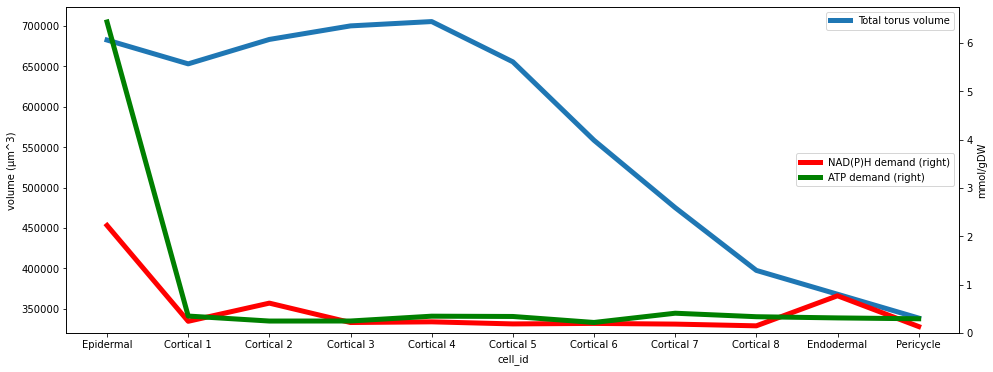

In [ ]:
# import sys, importlib
# importlib.reload(sys.modules['root_analysis_functions'])

#import analysis functions
from root_analysis_functions import *
soldict1 = {}
for rxn in rmodel.reactions:
    soldict1[rxn.id]=sol[rxn.id]
total_nad_dict, nad_rxns_fluxes = generateNADHNADPHbudget(rmodel,soldict1,outfile="",
    show_plot=False,percentage=False,save_plot_to="")
total_atp_dict, atp_rxns_fluxes = generateATPbudget(rmodel,soldict1,outfile="",
    show_plot=False,percentage=False,save_plot_to="")
vol_vs_energy(rmodel, '/Users/user/Documents/Ox/roots/roots-model/'+"model_constraints_data/cell_dimensions.xlsx", total_nad_dict, total_atp_dict, "Figures/vol_vs_energy_plot_new.png")

In [ ]:
for met in rmodel.metabolites:
    if 'GTP_' in met.id and 'epi00' in met.id:
        print(met.id)

In [ ]:
def generateNADbudget_ed(model,solution,outfile="",show_plot=True,percentage=False,save_plot_to="temp.png",colourDict=None):
    if not colourDict:
        #find colour hex codes here: https://www.colorhexa.com/color-names
        atp_coloursdict = {
            'Mitochondrial_ATP_Synthase_m_': '#5C6BC0',
            'PHOSGLYPHOS_RXN_c_':'#8D6E63' ,
            'PEPDEPHOS_RXN_p_': '#AB47BC',
            'PHOSPHORIBULOSEKINASE_RXN_p_': '#2E7D32',
            'PEPDEPHOS_RXN_c_': '#EF5350',
            'PHOSGLYPHOS_RXN_c_': '#FF7043',
            'GLUC1PADENYLTRANS_RXN_c_': '#26C6DA',
            'ACETYL_COA_CARBOXYLTRANSFER_RXN_p_': '#9CCC65',
            'UDPKIN_RXN_c_': '#BDBDBD',
            'GDPKIN_RXN_c_': '#fbceb1',
            'FRUCTOKINASE_RXN_c_': '#cd9575',
            'PROTON_ATPase_c_': '#000000',
            'Others-pos': '#000000',}
        colourDict = atp_coloursdict
    excl = ['UDPKIN_RXN_c_','GDPKIN_RXN_c_','_mc_','_xc_','_pc_','Transfer']
    energymets=['ATP_','GTP_','UTP_']
    metcomps={'ATP_':("c","p","m","x"),'GTP_':("c","p","m"),'UTP_':("c","p")}
    total_atp_dict = {}
    for model_tag in ["_epi00","_cor00","_cor01","_cor02","_cor03","_cor04","_cor05","_cor06","_cor07","_end00", "_per00"]:
        if outfile!="":
            fout = open(outfile,"w")
        ATPdict = dict()
        total = 0
        for thismet in energymets:
            for p in metcomps[thismet]:
                met=model.metabolites.get_by_id(thismet+p+model_tag)
                met1=model.metabolites.get_by_id("a"+thismet+p+model_tag)
                for rxn in met.reactions:
                    if any([rxn.id.__contains__(x) for x in excl]):
                        continue
                    sto=rxn.metabolites.get(met)
                    sto1=rxn.metabolites.get(met1)
                    try:
                        if outfile!="":
                            fout.write(rxn.id+"\t"+rxn.reaction+"\t"+str(solution.get(rxn.id)*(sto+sto1))+"\t"+met.compartment+"\n")
                        ATPdict[rxn.id]=solution.get(rxn.id)*(sto+sto1)
                    except:
                        continue
                    try:
                        if solution.get(rxn.id)*(sto+sto1) > 0:
                            total = total + (solution.get(rxn.id)*(sto+sto1))
                    except:
                        continue
        if outfile!="":
            fout.close()

        tempDict = dict()
        for rxn in ATPdict.keys():
            tempDict[rxn]=abs(ATPdict[rxn])

        #sort ATPdict by values
        import operator
        sorted_by_value = sorted(tempDict.items(), key= lambda x:x[1],reverse=True)

        ATPdict2 = dict()
        ATPdict2["Others-pos"]=0
        ATPdict2["Others-neg"]=0
        baseline = dict()
        pos_base=0
        neg_base=0
        i=0
        for TEMP in sorted_by_value:
            rxn = TEMP[0]
            if ATPdict[rxn]>0:
                if ATPdict[rxn] < total*0.005:
                    if percentage:
                        ATPdict2["Others-pos"]=ATPdict2["Others-pos"]+float(ATPdict[rxn]*100)/total
                    else:
                        ATPdict2["Others-pos"]=ATPdict2["Others-pos"]+ATPdict[rxn]
                    continue
                base = pos_base
                if percentage:
                    ATPdict2[rxn]=float(ATPdict[rxn]*100)/total
                    pos_base = pos_base + float(ATPdict[rxn]*100)/total
                else:
                    pos_base = pos_base + ATPdict[rxn]
                    ATPdict2[rxn]=ATPdict[rxn]
            else:
                if abs(ATPdict[rxn]) < total*0.005:
                    if percentage:
                        ATPdict2["Others-neg"]=ATPdict2["Others-neg"]+float(ATPdict[rxn]*100)/total
                    else:
                        ATPdict2["Others-neg"]=ATPdict2["Others-neg"]+ATPdict[rxn]
                    continue
                base = neg_base
                if percentage:
                    ATPdict2[rxn]=float(ATPdict[rxn]*100)/total
                    neg_base = neg_base + float(ATPdict[rxn]*100)/total
                else:
                    neg_base = neg_base + ATPdict[rxn]
                    ATPdict2[rxn]=ATPdict[rxn]
            i=i+1
            baseline[rxn]=base
        baseline["Others-pos"]=pos_base
        baseline["Others-neg"]=neg_base

        #obtaining total ATP expenditure
        total = 0
        for value in ATPdict2.values():
            if value > 0:
                total += value
        print(model_tag, " total ATP consumed: ", total)
        total_atp_dict[model_tag] = total


        #making plots
        if show_plot:
            import matplotlib.pyplot as plt
            #plt.suptitle(title)
            plt.rcParams.update({'font.size': 10}) #sets a global fontsize
            plt.rcParams['xtick.major.size'] = 5 # adjusts tick line length and width
            plt.rcParams['xtick.major.width'] = 1
            plt.rcParams['ytick.major.size'] = 5
            plt.rcParams['ytick.major.width'] = 1
            plt.rcParams['axes.linewidth']=2 # makes axes line thicker
            plt.figure(figsize=(3,4))
            for rxn in ATPdict2.keys():
                if colourDict.keys().__contains__(rxn[:-5]):
                    plt.bar(1,ATPdict2[rxn],width=0.1,bottom=baseline[rxn],label=rxn,color=colourDict[rxn[:-5]])
                else:
                    plt.bar(1,ATPdict2[rxn],width=0.1,bottom=baseline[rxn],label=rxn)
            plt.xlim(0.8,1.2)
            if percentage:
                plt.ylabel("ATP produced/consumed (%)")
            else:
                plt.ylabel("ATP produced/consumed (in moles)")
            handles, labels = plt.gca().get_legend_handles_labels()
            labels2=list(set(labels)-set(["Others-neg","Others-pos"]))+list(["Others-neg","Others-pos"])
            handles2=[handles[labels.index(i)] for i in labels2]
            lgd=plt.legend(handles2,labels2,bbox_to_anchor=(1,1))
            plt.axhline(0,linestyle="--",color="black")
            plt.tight_layout
            plt.savefig(save_plot_to, bbox_extra_artists=(lgd,), bbox_inches='tight')

    return total_atp_dict, ATPdict2

In [ ]:
###plot dnut volumes vs atp and nad use
def vol_vs_energy(model, cell_dimensions, total_nad_dict, total_atp_dict, save_loc):
    import matplotlib.pyplot as plt
    import numpy as np
    import pandas as pd

    #convert nad and atp dictionaries to dataframes
    nad_df = pd.DataFrame.from_dict(total_nad_dict, orient='index')
    atp_df = pd.DataFrame.from_dict(total_atp_dict, orient='index')

    #import rootslice data
    rootslice = pd.read_excel(cell_dimensions, index_col=0)
    rootslice = rootslice[:11]
    rootslice.rename(columns={'avg_tot_dnut_vol': "Total torus volume"}, inplace=True)
    rootslice.rename(columns={'cell_id': "Cell type"}, inplace=True)
    Total_torus_volume = rootslice[['Total torus volume']]

    #create chart
    #v useful guide to dataframe.plot() https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html
    #plot of all volumes
        #rootslice[['avg_tot_dnut_vol','avg_vac_dnut_vol','avg_pm_dnut_vol', "avg_cellwall_dnut_vol", "avg_cytoplasm_dnut_vol"]].plot(kind='bar', width = 1, figsize=(12,6), colormap="viridis")
    #rootslice[['avg_pm_dnut_vol']].plot(kind='bar', width = 1, figsize=(12,6), colormap="viridis")

    cell_names = ["Epidermal", "Cortical 1", "Cortical 2", "Cortical 3", "Cortical 4",
                    "Cortical 5", "Cortical 6", "Cortical 7", "Cortical 8", "Endodermal", "Pericycle"]

    Total_torus_volume.plot(kind='line', linewidth=5, figsize=(16,6))
    plt.ylabel("volume (μm^3)")
    nad_df[0].plot(secondary_y=True, color='r', linewidth=5, label="NAD(P)H demand")
    atp_df[0].plot(secondary_y=True,color='g', linewidth=5, label="ATP demand")
    plt.ylabel("mmol/gDW")
    plt.xlabel("")
    plt.xticks(range(len(cell_names)), cell_names, rotation = 10)
    plt.ylim(bottom=0)
    plt.legend(loc="center right")
    #plt.title("Plot of total doughnut volume vs NAD and ATP demand")

    plt.savefig(save_loc, bbox_inches='tight')

# Symplastic transport

In [ ]:
# from matplotlib.backends.backend_pdf import PdfPages
# pp = PdfPages('Symplastic_transport.pdf')
        
# for ii in list(transfers):
#     data={}
#     # width=0.8
#     for rxn in rmodel.reactions:
#         if ii in rxn.id and rxn.x!=0:
#             data['_'.join(rxn.id.split('_')[:-5])]=rxn.x
#     plot_dictp=plt.figure(figsize=(len(data)*4/6,4.8))
#     plt.bar(data.keys(), data.values())
#     plt.title(ii)
#     plt.tick_params("x", labelrotation=80)
#     plt.show()
#     pp.savefig(plot_dictp,bbox_inches='tight')
# pp.close()


In [132]:
transfers = set(['_'.join(x.id.split('_')[-5:]) for x in rmodel.reactions if 'Transfer' in x.id and not 'WATER' in x.id])
large_symp = sorted([rxn for rxn in rmodel.reactions if any([x in rxn.id for x in list(transfers)])],key=lambda x:abs(sol[x.id]),reverse=True)
subset_symp = set(['_'.join(x.id.split('_')[:-5]) for x in large_symp[:70]])
print(len(subset_symp),subset_symp)
print(list(transfers)[0])

17 {'GAP_c', 'PYRUVATE_c', 'FRUCTOSE_6P_c', 'PHOSPHO_ENOL_PYRUVATE_c', 'NITRATE_c', '2_PG_c', 'UDP_GLUCURONATE_c', 'ETOH_c', 'Pi_c', 'G3P_c', 'FRUCTOSE_16_DIPHOSPHATE_c', 'CPD_510_c', 'AMMONIUM_c', 'FRU_c', 'WATER_c', 'L_LACTATE_c', 'SUCROSE_c'}
cor03_Transfer_03_to_04


In [114]:
col = [
'#1f78b4',
'#b2df8a',
'#8ae1ed',
'#bebada',
'#fdb462',
'#d68aed',
'#f5737a',
'#fee08b',
'#e69595',
'#66c2a5',
'#d690b2',
'#3288bd',
'#ffff99',
'#a6cee3',
'#ffffb3',
'#6a3d9a',
'#ff7f00',
'#d9d9d9',
'#9e0142',
'#b3de69',
'#33a02c',
'#f46d43',
'#abdda4',
'#d53e4f',
'#fccde5',
'#fb8072',
'#ccebc5',
'#ffffbf',
'#e6f598',
'#bc80bd',
'#5e4fa2',
'#e89f82',
'#80b1d3',
'#ffed6f']
transfers_list=sorted(list(transfers),key=lambda x:x)
transfers_list =[transfers_list[-1]]+transfers_list[:-1]
# transfers_list 

In [115]:
import re
import numpy as np
def formula_bkdown(chem_formula):
    elems=['C','H','O','P','N']
    temp1 = re.findall(r'[A-Z][a-z]?',chem_formula)
    formula_dict = [0,0,0,0,0]
    for it,elt in enumerate(elems):
        if elt in temp1:
            it1=temp1.index(elt)
            if chem_formula.index(elt)+1==len(chem_formula):
                formula_dict[it]=1
            elif it1+1==len(temp1):
                formula_dict[it]=float(chem_formula[(chem_formula.index(elt)+1):])
            elif chem_formula.index(elt)==(chem_formula.index(temp1[it1+1])-1):
                formula_dict[it]=1
            else:
                formula_dict[it]=float(chem_formula[(chem_formula.index(elt)+1):(chem_formula.index(temp1[it1+1]))])
    return formula_dict

def dls(met1,met2):
    f1 = formula_bkdown(met1.formula)
    f2 = formula_bkdown(met2.formula)
    return np.sqrt(sum([pow(f1[x]/f1[1]-f2[x]/max(f2[1],1),2) for x in range(len(f1))]))

In [320]:
import matplotlib.pyplot as plt
met_dict={'PHOSPHO_ENOL_PYRUVATE':'PEP', 'UDP_GLUCURONATE':'UDP-Glucuronate', 'GLC_1_P':'Glucose-1P', 'FRU':'Fructose', 'G3P':'3-PGA', 'CPD_510':'Glucuronate-1P', 'L_LACTATE':'Lactate', 'FRUCTOSE_6P':'Fructose-6P', 'NITRATE':r'NO$_3$', 'FRUCTOSE_16_DIPHOSPHATE':'Fructose-1,6P', 'PYRUVATE':'Pyruvate', 'AMMONIUM':r'NH$_4$', 'SUCROSE':'Sucrose', 'GAP':'GAP', '2_PG':'2-PG', 'ETOH':'Ethanol', 'MGII':r'Mg$^{2+}$', 'DPG':'DPGA', 'Pi':'Pi','SER':'Serine','GLC_6_P':'Glucose-6P','DIHYDROXY_ACETONE_PHOSPHATE':'DHAP','UDP':'UDP','MAL':'Malate','ARG':'Arginine','OXALACETIC_ACID':'OAA'}
def plot_sym_transport(subset_symp,rmodel,col,saveas=None,ylab=1,xlab=1):
    transfers = set(['_'.join(x.id.split('_')[-5:]) for x in rmodel.reactions if 'Transfer' in x.id])
    transfers_list=list(sorted(list(transfers),key=lambda x:x))
    transfers_list =[transfers_list[-1]]+transfers_list[:-1]
    x_ticks = {'cor03_Transfer_03_to_04':'COR 4', 'cor06_Transfer_06_to_07':'COR 7', 'epi00_Transfer_epi00_to_cor00': 'EPI 1', 'cor01_Transfer_01_to_02': 'COR 2', 'cor05_Transfer_05_to_06':'COR 6', 'cor00_Transfer_00_to_01':'COR 1', 'end00_Transfer_end00_to_per00':'END 1', 'cor07_Transfer_cor07_to_end00':'COR 8', 'cor02_Transfer_02_to_03':'COR 3', 'cor04_Transfer_04_to_05':'COR 5'}
    
    symdict = {}
    plts=[]
    plted=[]
    met_labels = [met_dict[x[:-2]] for x in subset_symp]
    # plt.figure(figsize=(8,8))
    fig,(ax1,ax2) = plt.subplots(1,2, sharex=False,figsize=(12,6),sharey=True)
    for it,met in enumerate(list(subset_symp)):
        symdict[met]=[sol[met+'_'+x] for x in transfers_list]
        if 1:#sum(symdict[met])>=0:
            ax1.stackplot(range(len(symdict[met])),[x if x>=0 else 0 for x in symdict[met]],labels = transfers_list, colors = [col[it]], baseline='zero',alpha=0.5)
            plts+=ax2.stackplot(range(len(symdict[met])),[-x if x<0 else 0 for x in symdict[met][-1::-1]],labels = transfers_list, colors = [col[it]], baseline='zero',alpha=0.5) 
            plted+=[it]
    ax2.legend(plts,[list(met_labels)[x] for x in plted],bbox_to_anchor=(1,0.5),loc='center left',fontsize=18)
    ax1.set_xticks(range(len(symdict[met])),labels=[x_ticks[x] for x in transfers_list],rotation=90,fontsize=16)
    ax2.set_xticks(range(len(symdict[met])),labels=[x_ticks[x] for x in transfers_list[-1::-1]],rotation=90,fontsize=16)
    ax1.tick_params(axis='y',labelsize=16)
    ax2.tick_params(axis='y',labelsize=16)
    ax1.set_ylim(0,3.5)
    if xlab:
        ax1.set_xlabel('Transfer location',fontsize=24)
        ax2.set_xlabel('Transfer location',fontsize=24)
    if ylab:
        ax1.set_ylabel('Flux to next cell',fontsize=24)
    if saveas:
        plt.savefig(saveas, bbox_inches='tight')
    plt.show()

In [321]:
len(large_symp)

1868

24 {'DIHYDROXY_ACETONE_PHOSPHATE_c', 'PHOSPHO_ENOL_PYRUVATE_c', 'UDP_GLUCURONATE_c', 'UDP_c', 'MAL_c', 'GLC_1_P_c', 'ARG_c', 'FRU_c', 'L_LACTATE_c', 'G3P_c', 'CPD_510_c', 'FRUCTOSE_6P_c', 'NITRATE_c', 'FRUCTOSE_16_DIPHOSPHATE_c', 'PYRUVATE_c', 'AMMONIUM_c', 'GLC_6_P_c', 'SUCROSE_c', 'OXALACETIC_ACID_c', 'GAP_c', 'ETOH_c', 'SER_c', 'DPG_c', 'Pi_c'}
cor03_Transfer_03_to_04


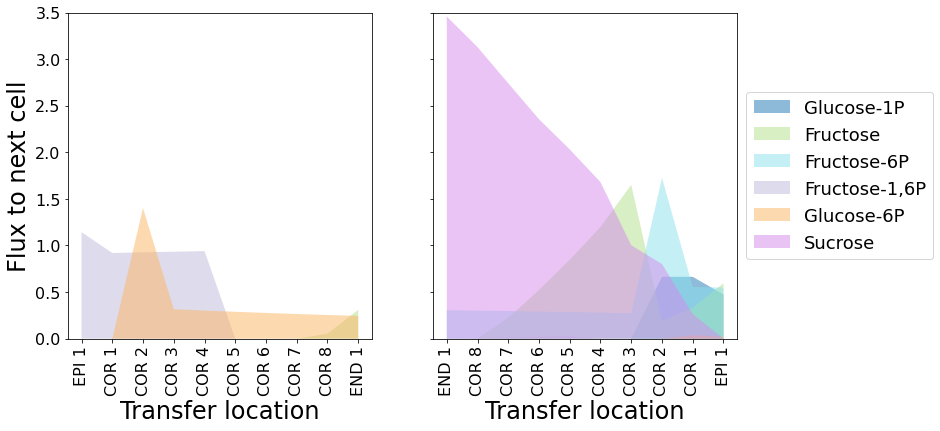

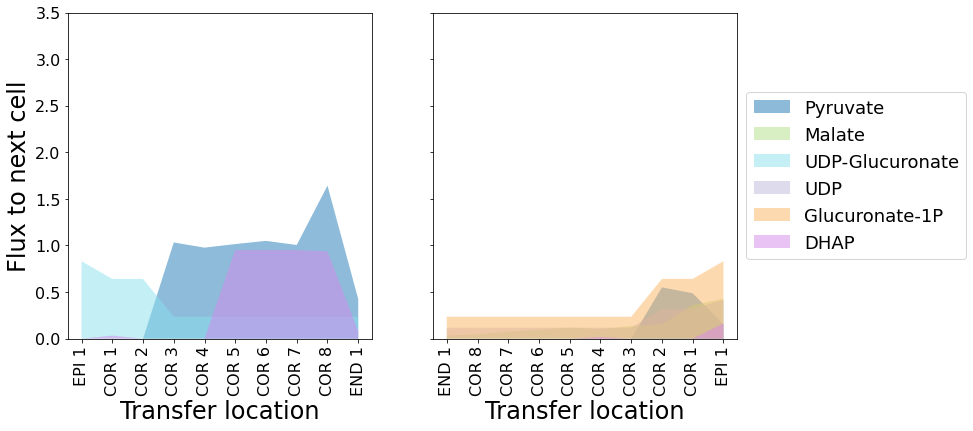

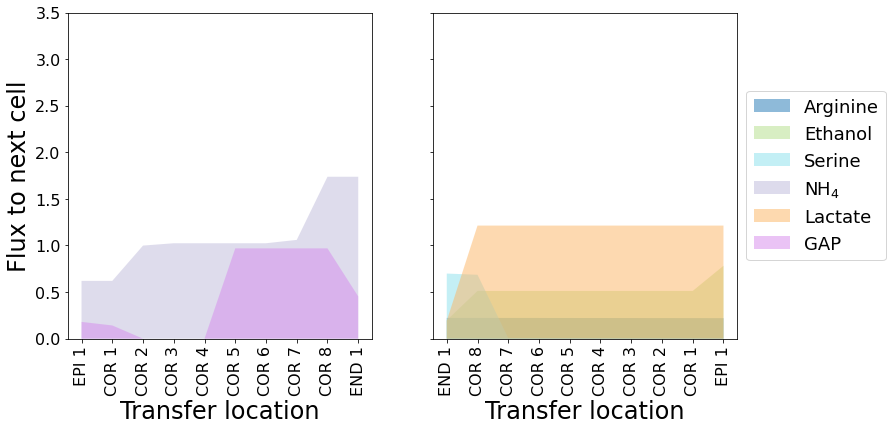

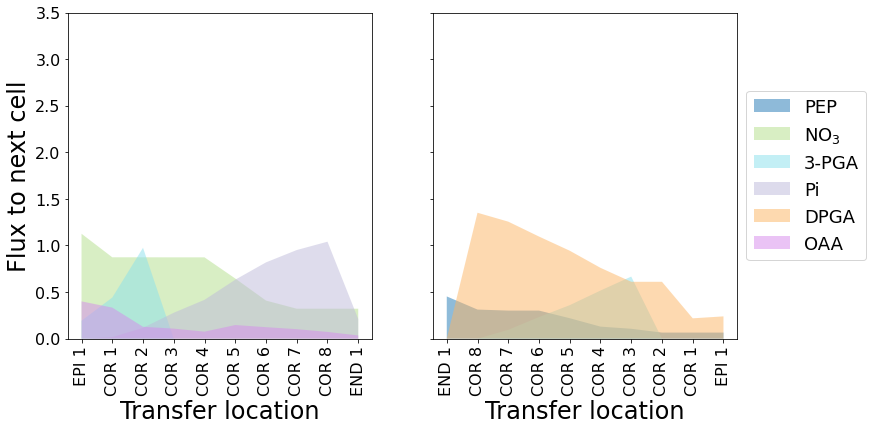

In [322]:
large_symp = sorted([rxn for rxn in rmodel.reactions if any([x in rxn.id for x in list(transfers)]) and not rxn.id[0]=='a'],key=lambda x:abs(sol[x.id]),reverse=True)
subset_symp = set(['_'.join(x.id.split('_')[:-5]) for x in large_symp[:160]])
print(len(subset_symp),subset_symp)
print(list(transfers)[0])
partitions = 4
partition_size=6
sym_partitions={}
temp_symp=list(subset_symp)[:partition_size*partitions]
for ii in range(partitions):
    if 'SUCROSE_c' in temp_symp:
        ref_met = 'SUCROSE_c'
    elif 'PYRUVATE_c' in temp_symp:
        ref_met = 'PYRUVATE_c'
    else:
        ref_met = sorted(temp_symp,key=lambda x: formula_bkdown(rmodel.metabolites.get_by_id(x+'_cor01').formula)[0])[-1]
    if ref_met=='SUCROSE_c':
        sym_partitions[ii] = [x for x in temp_symp if 'ose' in met_dict[x[:-2]]]
        sym_partitions[ii]=sym_partitions[ii][:min(len(sym_partitions[ii]),partition_size)]
    elif len(temp_symp)>partition_size:
        sym_partitions[ii] = sorted(temp_symp,key=lambda x: dls(rmodel.metabolites.get_by_id(ref_met+'_cor01'),rmodel.metabolites.get_by_id(x+'_cor01')))[:partition_size]
    else:
        sym_partitions[ii]=temp_symp.copy()
    # print(sym_partitions)
    plot_sym_transport(sym_partitions[ii],rmodel,col,'Figures/SymplasticTransport'+str(ii)+'.png')
    # print(sorted(temp_symp,key=lambda x: dls(rmodel.metabolites.get_by_id(ref_met+'_cor01'),rmodel.metabolites.get_by_id(x+'_cor01'))))
    temp_symp = list(set(temp_symp).difference(set(sym_partitions[ii])))

In [304]:
for rxn in rmodel.reactions:
    if 'SUCROSE' in rxn.id and 'Transfer' in rxn.id:
        print(sol[rxn.id],rxn.id,rxn.reaction)

0.0 SUCROSE_6P_c_cor00_Transfer_00_to_01 SUCROSE_6P_c_cor00 <=> SUCROSE_6P_c_cor01
-0.2643852118338318 SUCROSE_c_cor00_Transfer_00_to_01 SUCROSE_c_cor00 <=> SUCROSE_c_cor01
-0.800976407288481 SUCROSE_c_cor01_Transfer_01_to_02 SUCROSE_c_cor01 <=> SUCROSE_c_cor02
0.0 SUCROSE_6P_c_cor01_Transfer_01_to_02 SUCROSE_6P_c_cor01 <=> SUCROSE_6P_c_cor02
-1.0024044468183684 SUCROSE_c_cor02_Transfer_02_to_03 SUCROSE_c_cor02 <=> SUCROSE_c_cor03
0.0 SUCROSE_6P_c_cor02_Transfer_02_to_03 SUCROSE_6P_c_cor02 <=> SUCROSE_6P_c_cor03
-1.6799290610441209 SUCROSE_c_cor03_Transfer_03_to_04 SUCROSE_c_cor03 <=> SUCROSE_c_cor04
0.0 SUCROSE_6P_c_cor03_Transfer_03_to_04 SUCROSE_6P_c_cor03 <=> SUCROSE_6P_c_cor04
-2.031164695556222 SUCROSE_c_cor04_Transfer_04_to_05 SUCROSE_c_cor04 <=> SUCROSE_c_cor05
0.0 SUCROSE_6P_c_cor04_Transfer_04_to_05 SUCROSE_6P_c_cor04 <=> SUCROSE_6P_c_cor05
-2.355162638729737 SUCROSE_c_cor05_Transfer_05_to_06 SUCROSE_c_cor05 <=> SUCROSE_c_cor06
0.0 SUCROSE_6P_c_cor05_Transfer_05_to_06 SUCROSE

In [284]:
from cobra.flux_analysis.parsimonious import pfba
from cobra.flux_analysis.variability import *
rsol=pfba(rmodel)
fva_sol = flux_variability_analysis(rmodel)
data={'reaction_id':[x.id for x in rmodel.reactions],
    'cell':['_'.join(x.id.split('_')[-2:]) if ('_l' in x.id or '_d' in x.id) else '' for x in rmodel.reactions],
    'subsystem':[x.notes['SUBSYSTEM']  if 'SUBSYSTEM' in str(x.notes) else '' for x in rmodel.reactions],
    'reaction':[x.reaction for x in rmodel.reactions],
    'rfva_min':[fva_sol.minimum[x.id] for x in rmodel.reactions],
    'rfva_max':[fva_sol.maximum[x.id] for x in rmodel.reactions],
    'regrexsol':[rsol[x.id] for x in rmodel.reactions]}
df=pd.DataFrame(data)
from datetime import datetime, date, time
now = datetime.now().strftime('%Y_%m_%d')
df.to_csv('/Users/user/Documents/Ox/roots/Spreadsheets/FVAroots.csv')


Interrupt request received


OptimizationError: There is no optimal solution for the chosen objective! (interrupted).

In [ ]:
for ii in list(transfers):
    data={}
    # width=0.8
    for rxn in rmodel.reactions:
        if ii in rxn.id and rxn.x!=0:
            data['_'.join(rxn.id.split('_')[:-5])]=rxn.x
    plot_dictp=plt.figure(figsize=(len(data)*4/6,4.8))
    plt.bar(data.keys(), data.values())
    plt.title(ii)
    plt.tick_params("x", labelrotation=80)
    plt.show()
    pp.savefig(plot_dictp,bbox_inches='tight')
pp.close()


In [ ]:
met='FeIII_c_cor07'
for rxn in rmodel.metabolites.get_by_id(met).reactions:
    if abs(sol[rxn.id])>1e-2:
        print(round(sol[rxn.id]*rxn.get_coefficient(met),4),rxn.id)
        print('    ',rxn.reaction)

In [ ]:
for rxn in rmodel.reactions:
    if 'apoplast' in rxn.id and sol[rxn.id]!=0:
        print(round(sol[rxn.id],4),rxn.id)


In [ ]:
rmodel.compartments

In [ ]:
# Protein 

In [ ]:
rmodel.reactions.Protein_Translocation_c_epi00

In [ ]:
for rxn in rmodel.reactions:
    if 'protein' in rxn.id.lower():
        print(rsol[rxn.id],rxn.id)

# Phloem import

In [ ]:
for rxn in rmodel.reactions:
    if 'EX_' in rxn.id and '_ph' in rxn.id and sol[rxn.id]!=0:
        print(sol[rxn.id], rxn.id)

0.025912873538030116 EX_X_PHE_ph_per00
0.00010117663055402748 EX_X_LEU_ph_per00
0.02713432108266009 EX_X_4_AMINO_BUTYRATE_ph_per00
0.34278671403371413 EX_X_GLT_ph_per00
0.02469636328382975 EX_X_L_ALPHA_ALANINE_ph_per00
3.048322895822716 EX_X_SUCROSE_ph_per00
0.003171169612722325 EX_X_HIS_ph_per00
0.003950456848559784 EX_X_ILE_ph_per00
0.08715136984299583 EX_X_ARG_ph_per00
0.010616546643051089 EX_X_GLY_ph_per00
0.09313269429541572 EX_X_L_ASPARTATE_ph_per00
0.5946169687248104 EX_X_SER_ph_per00
0.009503294172778544 EX_X_MET_ph_per00
0.024851946596635505 EX_X_TYR_ph_per00
0.02356445761612797 EX_X_ASN_ph_per00
0.019855453286666446 EX_X_GLN_ph_per00
0.006991084057460559 EX_X_LYS_ph_per00
0.008387207943723905 EX_X_THR_ph_per00


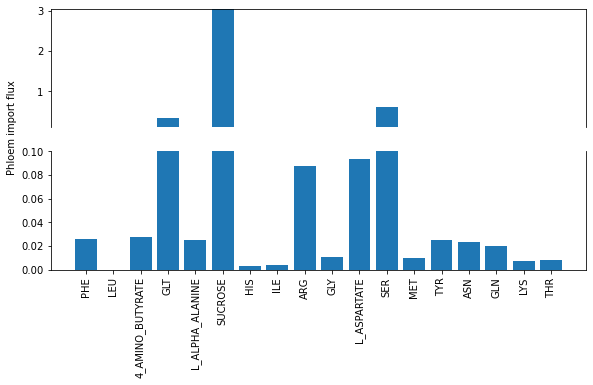

In [ ]:
from turtle import position


ph_import={}
for rxn in rmodel.reactions:
    if 'EX_' in rxn.id and '_ph' in rxn.id and sol[rxn.id]!=0:
        ph_import['_'.join(rxn.id.split('_')[2:-2])]=sol[rxn.id]
ybreak=0.1
fig,(ax1,ax2) = plt.subplots(2,1, sharex=True,figsize=(len(ph_import)*6.4/12,4.8))
ax1.bar(range(len(ph_import)),ph_import.values())
ax2.bar(range(len(ph_import)),ph_import.values())
ax2.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax2.tick_params(top=False)
ax1.tick_params(labeltop=False)
ax1.tick_params(bottom=False)
temp=plt.xticks(range(len(ph_import)),ph_import.keys(),rotation=90)
ax1.set_ylim(ybreak, max(ph_import.values()))
ax2.set_ylim(0,ybreak)
plt.ylabel('Phloem import flux',position=(0,1.2))
plt.savefig('Figures/Phloem_import_fluxes.png',bbox_inches='tight')

# Apoplast

In [ ]:
rmodel.compartments

In [ ]:
for rxn in rmodel.reactions:
    if any(['ap' in x for x in rxn.compartments]) and sol[rxn.id]!=0:
        print(rxn.id,rxn.reaction)

# What's happening to pyruvate?

In [ ]:
for rxn in rmodel.reactions:
    if any(['PYRUVATE' in met.id[:10] for met in rxn.metabolites]) and not any([x in rxn.id for x in ['Transfer','_pc_','_mc_','_xc_']]) and sol[rxn.id]!=0:
        print([round(sol[rxn.id]*rxn.get_coefficient(met.id),4) for met in rxn.metabolites if 'PYRUVATE' in met.id[:10]],rxn.id)
        print('   ',rxn.reaction)

In [ ]:
for rxn in rmodel.reactions:
    if 'soluble' in rxn.id and not any([x in rxn.id for x in ['Transfer','_pc_','_mc_','_xc_']]) and sol[rxn.id]!=0:
        print(round(sol[rxn.id],4),rxn.id)
        print('   ',rxn.reaction)

In [ ]:
rmodel.reactions.Biomass_expanding_cell_cor03.reaction

In [ ]:
mapSource(rmodel,sol,'FRUCTOSE_16_DIPHOSPHATE_c_cor00',i_max=8)

In [ ]:
rxn.reaction

In [ ]:
def traceCarbon(rmodel,sol,meto):
    carbonbkdwn={}
    if type(meto)==str:
        meto = rmodel.metabolites.get_by_id(meto)
    metoformula = formula_bkdown(meto.formula)
    metdg = 0
    rxndict={'SUCROSE_SYNTHASE_RXN':{'FRU':0.5,'UDP_GLUCOSE':0.5}}
    if metoformula[0] !=0:
        for rxn in meto.reactions:
            reactmetsC = [met for met in rxn.reactants if formula_bkdown(met.formula)[0]!=0]
            prodmetsC = [met for met in rxn.products if formula_bkdown(met.formula)[0]!=0]
            sumprodmetsC = sum([formula_bkdown(met.formula)[0]*rxn.get_coefficient(met) for met in rxn.products])
            sumreactmetsC = sum([formula_bkdown(met.formula)[0]*rxn.get_coefficient(met) for met in rxn.reactants])
            if meto in rxn.reactants and sol[rxn.id]>0:
                metdg+=-sol[rxn.id]*rxn.get_coefficient(meto)
                if len(reactmetsC)==1:
                    for met in prodmetsC:
                        if met.id not in list(carbonbkdwn.keys()):
                            carbonbkdwn[met.id]=0
                        carbonbkdwn[met.id]+=formula_bkdown(met.formula)[0]*rxn.get_coefficient(met)/sumprodmetsC*sol[rxn.id]
                elif len(prodmetsC)==1:
                    met = prodmetsC[0]
                    if met.id not in list(carbonbkdwn.keys()):
                            carbonbkdwn[met.id]=0
                    carbonbkdwn[met.id]+=sol[rxn.id]
                elif any([x in rxn.id for x in list(rxndict.keys())]):
                    rxnroot = '_'.join(rxn.id.split('_')[:-2])
                    splitdict=rxndict[rxnroot]
                    for met in prodmetsC:
                        metsplit = [splitdict[x] for x in list(splitdict.keys()) if x in met.id]
                        if met.id not in list(carbonbkdwn.keys()):
                            carbonbkdwn[met.id]=0
                        carbonbkdwn[met.id]+=metsplit[0]*sol[rxn.id]
                else:
                    print('Help: ',rxn.reaction)
                    for met in rxn.metabolites:
                        print(met.id,formula_bkdown(met.formula))
            elif meto in rxn.products and sol[rxn.id]<0:
                metdg+=-sol[rxn.id]*rxn.get_coefficient(meto)
                if len(prodmetsC)==1:
                    for met in reactmetsC:
                        if met.id not in list(carbonbkdwn.keys()):
                            carbonbkdwn[met.id]=0
                        carbonbkdwn[met.id]+=formula_bkdown(met.formula)[0]*rxn.get_coefficient(met)/sumreactmetsC*sol[rxn.id]
                elif len(reactmetsC)==1:
                    met = reactmetsC[0]
                    if met.id not in list(carbonbkdwn.keys()):
                            carbonbkdwn[met.id]=0
                    carbonbkdwn[met.id]+=sol[rxn.id]
                elif any([x in rxn.id for x in list(rxndict.keys())]):
                    rxnroot = '_'.join(rxn.id.split('_')[:-2])
                    splitdict=rxndict[rxnroot]
                    for met in reactmetsC:
                        metsplit = [splitdict[x] for x in list(splitdict.keys()) if x in met.id]
                        if met.id not in list(carbonbkdwn.keys()):
                            carbonbkdwn[met.id]=0
                        carbonbkdwn[met.id]+=metsplit[0]*sol[rxn.id]
                else:
                    print('Help: ',rxn.reaction)
                    for met in rxn.metabolites:
                        print(met.id,formula_bkdown(met.formula))
                
    else:
        print('No carbon in ',meto.id)
    for met in list(carbonbkdwn.keys()):
        carbonbkdwn[met]=carbonbkdwn[met]/float(metdg)
    return carbonbkdwn

# Edit

In [ ]:
def metroot(met,remnum=2):
    return '_'.join(met.split('_')[:-remnum])
def traceCarbonToEnd(rmodel,sol,meto):
    carbonbkdwn={}
    if type(meto)==str:
        meto = rmodel.metabolites.get_by_id(meto)
    metoformula = formula_bkdown(meto.formula)
    metdg = 0
    rxndict={'SUCROSE_SYNTHASE_RXN-SUCROSE':{'FRU':0.5,'UDP_GLUCOSE':0.5},'FRUCTOKINASE_RXN-FRU':{'FRUCTOSE_6P':1},'GLU6PDEHYDROG_RXN-GLC_6_P':{'D_6_P_GLUCONO_DELTA_LACTONE':1},
    '2TRANSKETO_RXN-XYLULOSE_5_PHOSPHATE':{'FRUCTOSE_6P':1},'2TRANSKETO_RXN-ERYTHROSE_4P':{'GAP':1},
    '1TRANSKETO_RXN-XYLULOSE_5_PHOSPHATE':{'D_SEDOHEPTULOSE_7_P':0.4,'GAP':0.6},'1TRANSKETO_RXN-RIBOSE_5P':{'D_SEDOHEPTULOSE_7_P':1},
    'PYRUVDEH_RXN-PYRUVATE':{'ACETYL_COA':float(2/3),'CARBON_DIOXIDE':float(1/3)},
    'TRANSALDOL_RXN-D_SEDOHEPTULOSE_7_P':{'ERYTHROSE_4P':float(4/7),'FRUCTOSE_6P':float(3/7)},
    'TRANSALDOL_RXN-GAP':{'FRUCTOSE_6P':1},
    '2_PERIOD_3_PERIOD_1_PERIOD_180_RXN-ACETYL_COA':{'Acetoacetyl_ACPs':1}, 
    '2_PERIOD_3_PERIOD_1_PERIOD_180_RXN-MALONYL_ACP':{'Acetoacetyl_ACPs':float(2/3),'CARBON_DIOXIDE':float(1/3)},
    'RXN_9654-MALONYL_COA':{'3_oxo_palmitoyl_ACPs':float(2/3),'CARBON_DIOXIDE':float(1/3)},
    'RXN_9653-MALONYL_COA':{'3_oxo_myristoyl_ACPs':float(2/3),'CARBON_DIOXIDE':float(1/3)},
    'RXN_9653-Dodecanoyl_ACPs':{'MALONYL_COA':1},
    'RXN_9652-MALONYL_COA':{'3_oxo_dodecanoyl_ACPs':float(2/3),'CARBON_DIOXIDE':float(1/3)},
    'RXN_9651-MALONYL_COA':{'3_oxo_decanoyl_ACPs':float(2/3),'CARBON_DIOXIDE':float(1/3)},
    'RXN_9650-MALONYL_COA':{'3_Oxo_octanoyl_ACPs':float(2/3),'CARBON_DIOXIDE':float(1/3)},
    'RXN_9648-MALONYL_COA':{'3_oxo_hexanoyl_ACPs':float(2/3),'CARBON_DIOXIDE':float(1/3)},
    'RXN_9648-Butanoyl_ACPs':{'3_oxo_hexanoyl_ACPs':1},
    'GAP_3PGA-G3P':{'G3P':1},
    'ALANINE_AMINOTRANSFERASE_RXN-PYRUVATE':{'L_ALPHA_ALANINE':1},
    'ORNITHINE_GLU_AMINOTRANSFERASE_RXN-2_KETOGLUTARATE':{'GLT':1},
    'ORNITHINE_GLU_AMINOTRANSFERASE_RXN-L_ORNITHINE':{'L_GLUTAMATE_GAMMA_SEMIALDEHYDE':1},
    'ASPAMINOTRANS_RXN-2_KETOGLUTARATE':{'GLT':1},
    'ASPAMINOTRANS_RXN-L_ASPARTATE':{'OXALACETIC_ACID':1},
    'ASPAMINOTRANS_RXN-OXALACETIC_ACID':{'L_ASPARTATE':1},
    'ASPAMINOTRANS_RXN-GLT':{'2_KETOGLUTARATE':1},
    'ALANINE_AMINOTRANSFERASE_RXN-GLT':{'2_KETOGLUTARATE':1}}
    excl_mets= ['ATP','ADP','UTP','UDP','GTP','GDP','NADP','NADPH','NAD','NADH','CO_A']
    end_mets = ['CARBON_DIOXIDE']
    excl_mets+=['a'+x for x in excl_mets]
    if metoformula[0] !=0:
        for rxn in meto.reactions:
            if ('_tx' in rxn.id or any([x in meto.id for x in end_mets])) and sol[rxn.id]!=0:
                carbonbkdwn[meto.id]=sol[rxn.id]
                metdg+=abs(sol[rxn.id]*rxn.get_coefficient(meto))
            elif 'biomass' in rxn.id.lower() and sol[rxn.id]!=0:
                carbonbkdwn[rxn.id]=abs(sol[rxn.id])
                metdg+=abs(sol[rxn.id]*rxn.get_coefficient(meto))
            else:
                # print(meto.id,rxn.id)
                reactmetsC = [met for met in rxn.reactants if formula_bkdown(met.formula)[0]!=0 and metroot(met.id) not in excl_mets]
                prodmetsC = [met for met in rxn.products if formula_bkdown(met.formula)[0]!=0 and metroot(met.id) not in excl_mets]
                sumprodmetsC = sum([formula_bkdown(met.formula)[0]*rxn.get_coefficient(met) for met in rxn.products if metroot(met.id) not in excl_mets])
                sumreactmetsC = -sum([formula_bkdown(met.formula)[0]*rxn.get_coefficient(met) for met in rxn.reactants if metroot(met.id) not in excl_mets])
                if meto in rxn.reactants and sol[rxn.id]>0:
                    metdg+=-sol[rxn.id]*rxn.get_coefficient(meto)
                    if len(reactmetsC)==1:
                        for met in prodmetsC:
                            if met.id not in list(carbonbkdwn.keys()):
                                carbonbkdwn[met.id]=0
                            carbonbkdwn[met.id]+=formula_bkdown(met.formula)[0]*rxn.get_coefficient(met)/sumprodmetsC*sol[rxn.id]
                    elif len(prodmetsC)==1:
                        met = prodmetsC[0]
                        if met.id not in list(carbonbkdwn.keys()):
                                carbonbkdwn[met.id]=0
                        carbonbkdwn[met.id]+=sol[rxn.id]
                    elif any([x in rxn.id for x in ['_mc_','_pc_','_xc_']]):
                        for met in prodmetsC:
                            if metroot(met.id,3)==metroot(meto.id,3):
                                if met.id not in list(carbonbkdwn.keys()):
                                    carbonbkdwn[met.id]=0
                                carbonbkdwn[met.id]+=-sol[rxn.id]*rxn.get_coefficient(meto.id)
                    elif any([x.split('-')[0] in rxn.id for x in list(rxndict.keys())]):
                        rxnroot = '_'.join(rxn.id.split('_')[:-2])
                        splitdict=rxndict[rxnroot+'-'+metroot(meto.id)]
                        for met in prodmetsC:
                            if any([x in met.id for x in list(splitdict.keys())]):
                                metsplit = [splitdict[x] for x in list(splitdict.keys()) if x in met.id]
                                if met.id not in list(carbonbkdwn.keys()):
                                    carbonbkdwn[met.id]=0
                                carbonbkdwn[met.id]+=metsplit[0]*sol[rxn.id]
                    else:
                        print('Help: ',rxn.id,meto.id,' - ',rxn.reaction)
                        for met in rxn.metabolites:
                            print(met.id,formula_bkdown(met.formula))
                elif meto in rxn.products and sol[rxn.id]<0:
                    metdg+=-sol[rxn.id]*rxn.get_coefficient(meto)
                    if len(prodmetsC)==1:
                        for met in reactmetsC:
                            if met.id not in list(carbonbkdwn.keys()):
                                carbonbkdwn[met.id]=0
                            carbonbkdwn[met.id]+=formula_bkdown(met.formula)[0]*rxn.get_coefficient(met)/sumreactmetsC*sol[rxn.id]
                    elif len(reactmetsC)==1:
                        met = reactmetsC[0]
                        if met.id not in list(carbonbkdwn.keys()):
                                carbonbkdwn[met.id]=0
                        carbonbkdwn[met.id]+=sol[rxn.id]
                    elif any([x in rxn.id for x in ['_mc_','_pc_','_xc_']]):
                        for met in reactmetsC:
                            if metroot(met.id,3)==metroot(meto.id,3):
                                if met.id not in list(carbonbkdwn.keys()):
                                    carbonbkdwn[met.id]=0
                                carbonbkdwn[met.id]+=-sol[rxn.id]*rxn.get_coefficient(meto.id)
                    elif any([x.split('-')[0] in rxn.id for x in list(rxndict.keys())]):
                        rxnroot = '_'.join(rxn.id.split('_')[:-2])
                        splitdict=rxndict[rxnroot+'-'+metroot(meto.id)]
                        for met in reactmetsC:
                            if any([x in met.id for x in list(splitdict.keys())]):
                                metsplit = [splitdict[x] for x in list(splitdict.keys()) if x in met.id]
                                if met.id not in list(carbonbkdwn.keys()):
                                    carbonbkdwn[met.id]=0
                                carbonbkdwn[met.id]+=metsplit[0]*sol[rxn.id]
                    else:
                        print('Help: ',rxn.id,meto.id,' - ',rxn.reaction)
                        for met in rxn.metabolites:
                            print(met.id,formula_bkdown(met.formula))
                
    else:
        print('No carbon in ',meto.id)
    for met in list(carbonbkdwn.keys()):
        carbonbkdwn[met]=carbonbkdwn[met]/float(metdg)
    return carbonbkdwn
def metNeighbours(rmodel,sol,meto):
    neighbours=[]
    if type(meto)==str:
        meto = rmodel.metabolites.get_by_id(meto)
    for rxn in meto.reactions:
        if sol[rxn.id]>0 and meto in rxn.reactants:
            for met in rxn.products:
                if met.id not in neighbours:
                    neighbours+=[met.id]
        elif sol[rxn.id]<0 and meto in rxn.products:
            for met in rxn.reactants:
                if met.id not in neighbours:
                    neighbours+=[met.id]
    return neighbours
def makeMetSinkDict(rmodel,sol,meto,imax=5e3,priority_mets=['SUCROSE','GLC','FRU','FRUCTOSE','GLUCOSE','DIHYDROXY_ACETONE_PHOSPHATE','RIBOSE','XYLULOSE','CELLULOSE','GAP','DPG','G3P','GLYCEROL','2_PG','PYRUVATE']):
    if type(meto)==str:
        meto = rmodel.metabolites.get_by_id(meto)
    biomassrxns = set([rxn.id for rxn in rmodel.reactions if 'biomass' in rxn.id.lower()])
    bigMetDict={}
    bigMetDict[meto.id]=traceCarbonToEnd(rmodel,sol,meto)
    # print (bigMetDict)
    dictmets = list(bigMetDict[meto.id].keys())
    dictmets = set(dictmets).difference(set(bigMetDict.keys()))
    dictmets = list(set(dictmets).difference(biomassrxns))
    ii=1
    while dictmets and ii<imax:
        ii+=1
        met = dictmets.pop(0)
        bigMetDict[met]=traceCarbonToEnd(rmodel,sol,met)
        dictmets = list(bigMetDict[met].keys())+list(dictmets)
        dictmets = set(dictmets).difference(set(bigMetDict.keys()))
        dictmets = list(set(dictmets).difference(biomassrxns))
        dictmets = sorted(dictmets,key=lambda x: 0 if any([y in x for y in priority_mets]) else 1)
        # print(dictmets)
    print(ii)
    return bigMetDict

def findCarbonSinks(rmodel,sol,meto,imax=80,priority_mets=['SUCROSE','GLC','FRU','FRUCTOSE','GLUCOSE','DIHYDROXY_ACETONE_PHOSPHATE','RIBOSE','XYLULOSE','CELLULOSE','GAP','DPG','G3P','GLYCEROL','2_PG','PYRUVATE']):
    if type(meto)==str:
        meto = rmodel.metabolites.get_by_id(meto)
    sinkdict=makeMetSinkDict(rmodel,sol,meto,imax,priority_mets)
    metdict = sinkdict[meto.id]
    endmets=[rxn.id for rxn in rmodel.reactions if 'biomass' in rxn.id.lower()]
    metdictkeys=[x for x in list(metdict.keys()) if x not in endmets]
    count = 1
    while any([x in list(sinkdict.keys()) for x in metdictkeys]) and count<imax*10:
        count+=1
        met = [x for x in metdictkeys if x in list(sinkdict.keys()) ][0]
        metdict,endmets=findCarbonSinksRec(met,sinkdict,metdict,[meto.id],endmets)
        metdictkeys=[x for x in list(metdict.keys()) if x not in endmets]
    if count==imax:
        print('Hit top findCarbonSinks')
        print(([x for x in metdictkeys if x in list(sinkdict.keys())]))
    return metdict
def findCarbonSinksRec(meto,sinkdict,metdict,metchain,endmets):
    coeff = metdict.pop(meto)
    thisdict = sinkdict[meto]
    for met in list(thisdict.keys()):
        if met == meto:
            endmets+=[met]
            metdict[meto]=coeff*thisdict[met]
        elif met not in metchain:
            if met not in list(metdict.keys()):
                metdict[met]=0
            metdict[met] += coeff * thisdict[met]
        elif met in metchain:
            # Change sinkdict
            rm_met(sinkdict,met,metchain,1)
    return metdict, endmets

def rm_met(sinkdict,met,metchain,it=1):
    temp = sinkdict.pop(metchain[-1])
    thismet = temp[met]
    if thismet!=1:
        tempdict={}
        for ii in list(temp.keys()):
            if ii!=met:
                tempdict[ii] = temp[ii]/(1-thismet)
        sinkdict[metchain[-1]] = tempdict[ii]
    else:
        rm_met(sinkdict,met,metchain,it+1)
    



In [ ]:
temp=findCarbonSinks(rmodel,sol,'SUCROSE_c_per00',imax=300)
print(temp)
print(sum(temp.values()))

300
{'Cellulose_biomass_per00': 0.06196543809819748, 'Cellulose_biomass_end00': 0.06001757367925499, 'Cellulose_biomass_cor07': 0.07274203602831888, 'FRU_v_biomass_cor07': 0.02099949561230916, 'Cellulose_biomass_cor06': 0.03247426878383621, 'FRU_v_biomass_cor06': 0.03162100817169315, 'Cellulose_biomass_cor05': 0.08116216668092827, 'FRU_v_biomass_cor05': 0.022275025683105194, 'Cellulose_biomass_cor04': 0.09244323030652696, 'Cellulose_biomass_cor03': 0.09946423513993394, 'Cellulose_biomass_cor02': 0.10686288598028855, 'Cellulose_biomass_cor01': 0.1137113340389846, 'SUCROSE_v_biomass_cor00': 0.025856303093603105, 'Cellulose_biomass_cor00': 0.0559915809220429, 'D_6_P_GLUCONO_DELTA_LACTONE_p_cor00': 0.0018226479774048694, 'D_6_P_GLUCONO_DELTA_LACTONE_p_epi00': 0.0020090398742384236, 'D_6_P_GLUCONO_DELTA_LACTONE_p_cor02': 0.001630754654168067, 'STARCH_p_epi00': 5.64759391988375e-05, 'CPD_2961_p_cor01': 0.0017365086423300254, 'D_6_P_GLUCONO_DELTA_LACTONE_p_cor05': 0.0016266365868595617, 'D_6_

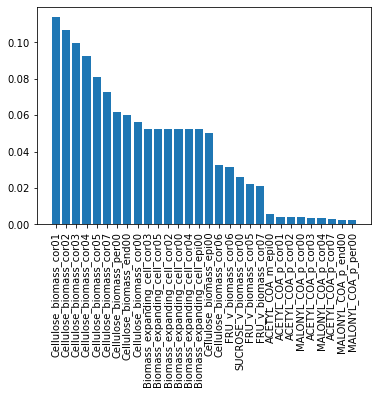

In [ ]:
num = 30
temp2 = sorted(temp.items(),key=lambda x: x[1],reverse=True)[:num]
plt.bar(range(len(temp2)),[x[1] for x in temp2])
xx=plt.xticks(range(len(temp2)),[x[0] for x in temp2],rotation=90)

In [ ]:
temp=makeMetSinkDict(rmodel,sol,'SUCROSE_c_per00',imax=168)
print(temp.keys())
# print(sum(temp.values()))

In [ ]:
temp=traceCarbonToEnd(rmodel,sol,'Butanoyl_ACPs_p_cor04')
print(temp)
print(sum(temp.values()))

In [ ]:
met='HCO3_p_epi00'
for rxn in rmodel.metabolites.get_by_id(met).reactions:
    if sol[rxn.id]!=0:
        print(round(sol[rxn.id]*rxn.get_coefficient(met),3),rxn.id, rxn.reaction)

In [ ]:
rmodel.reactions.Cellulose_biomass_cor05

In [ ]:
temp=makeMetSinkDict(rmodel,sol,'SUCROSE_c_per00',imax=80)
print(temp)


In [ ]:
temp=['fsa','asf','eg']
temp2=temp.pop(0)
print(temp,temp2)

In [ ]:
met='SUCROSE_c_per00'
for rxn in rmodel.metabolites.get_by_id(met).reactions:
    if sol[rxn.id]!=0:
        print(sol[rxn.id],rxn.id)

In [ ]:
rmodel.reactions.get_by_id('2TRANSKETO_RXN_p_cor00')

In [ ]:
for x in temp:
    print(x,temp[x])

In [ ]:
[sum(x.values()) for x in temp.values()]

In [ ]:
met='SUCROSE_c_epi00'
met=rmodel.metabolites.get_by_id(met)
metoformula = formula_bkdown(met.formula)
print(metoformula)

In [ ]:
for rxn in rmodel.metabolites.SUCROSE_c_cor00.reactions:
    if sol[rxn.id]!=0:
        print(round(sol[rxn.id]*rxn.get_coefficient('SUCROSE_c_cor00'),4)/0.1222,rxn.id)

In [ ]:
temp

In [ ]:
temp=traceCarbon(rmodel,sol,'SUCROSE_c_cor00')
# sum(temp.values())
print (temp)

In [ ]:
rmodel.reactions.SUCROSE_SYNTHASE_RXN_c_cor00

# Cheung vacuolar proton pumps

In [ ]:
for met in rmodel.metabolites:
    if 'SUCROSE_c_epi00' in met.id:
        print(met.id, met.reactions)

In [ ]:
idbits = ['epi00','_vc_','MG']
for rxn in rmodel.reactions:
    if all([x in rxn.id for x in idbits]):
        print(rxn.id, rxn.reaction)

# Comparison

In [ ]:
odict={}
for rxn in rmodel.reactions:
    if '_tx' in rxn.id and solo[rxn.id]!=0:
        rr = metroot(rxn.id)
        if rr not in list(odict.keys()):
            odict[rr]=0
        odict[rr]+=solo[rxn.id]
cdict={}
for rxn in rmodel.reactions:
    if '_tx' in rxn.id and sol[rxn.id]!=0:
        rr = metroot(rxn.id)
        if rr not in list(cdict.keys()):
            cdict[rr]=0
        cdict[rr]+=sol[rxn.id]
        # print(cdict)

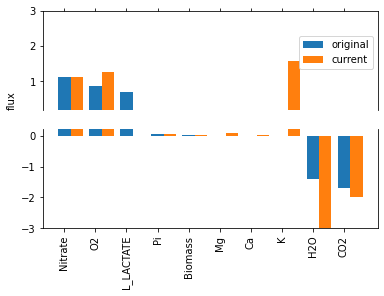

In [ ]:
for key in list(cdict.keys()):
    if key not in list(odict.keys()):
        odict[key]=0
for key in list(odict.keys()):
    if key not in list(cdict.keys()):
        cdict[key]=0
sortkeys = sorted(odict.keys(),key=lambda x:odict[x],reverse=True)
fig,(ax1,ax2)=plt.subplots(2,1,sharex=True)
width = 0.4
temp=ax1.bar(range(len(odict)),[odict[key] for key in sortkeys],width=width)
temp=ax1.bar(np.arange((len(cdict)))+width,[cdict[key] for key in sortkeys],width=width)
# temp=ax1.xticks(range(len(odict)),odict.keys(),rotation=90)
temp=ax2.bar(range(len(odict)),[odict[key] for key in sortkeys],width=width)
temp=ax2.bar(np.arange(len(cdict))+width,[cdict[key] for key in sortkeys],width=width)
temp=plt.xticks(range(len(odict)),sortkeys,rotation=90)
ax2.set_ylim(-3,0.2)
ax1.set_ylim(0.2,3)
ax2.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False)
ax2.xaxis.tick_bottom()
plt.legend({'original','current'},bbox_to_anchor=(1,2))
plt.ylabel('flux',position=(0,1.3))
plt.show()
# temp=plt.bar(range(len(cdict)),cdict.values())
# temp=plt.xticks(range(len(cdict)),cdict.keys(),rotation=90)

In [ ]:
print(cdict)
print([cdict[key] for key in sortkeys])
print(sortkeys)

{'Ca': -1.0620371134732367, 'CO2': -1.2009468738877185, 'Biomass': 0.018946691517913578, 'Mg': 0.032721531755232014, 'Nitrate': 1.1258879399177, 'K': 3.671631624503728, 'NADPHoxm': -0.06897798510769879, 'NADPHoxp': 3.7243764038971054, 'H2O': 0, 'O2': 0, 'Pi': 0, 'L_LACTATE': 0}
[1.1258879399177, 0, 0, 0, 0.018946691517913578, 0.032721531755232014, -1.0620371134732367, 3.671631624503728, -0.06897798510769879, 3.7243764038971054, 0, -1.2009468738877185]
['Nitrate', 'O2', 'L_LACTATE', 'Pi', 'Biomass', 'Mg', 'Ca', 'K', 'NADPHoxm', 'NADPHoxp', 'H2O', 'CO2']


In [ ]:
for rxn in rmodel.reactions:
    if 'NADPHoxm' in rxn.id:
        print (round(sol[rxn.id],4),rxn.id, rxn.upper_bound, rxn.lower_bound)

0.0 NADPHoxm_tx_epi00 1000.0 0.0
0.0 NADPHoxm_tx_cor00 1000.0 0.0
0.0 NADPHoxm_tx_cor01 1000.0 0.0
0.0 NADPHoxm_tx_cor02 1000.0 0.0
2.3551 NADPHoxm_tx_cor03 1000.0 0.0
0.0 NADPHoxm_tx_cor04 1000.0 0.0
0.0 NADPHoxm_tx_cor05 1000.0 0.0
0.0 NADPHoxm_tx_cor06 1000.0 0.0
0.0 NADPHoxm_tx_cor07 1000.0 0.0
-1.976 NADPHoxm_tx_end00 1000.0 0.0
0.0 NADPHoxm_tx_per00 1000.0 0.0


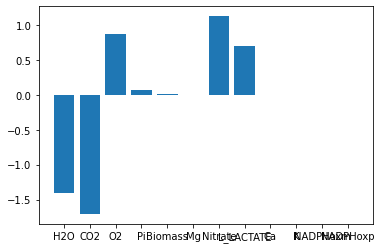

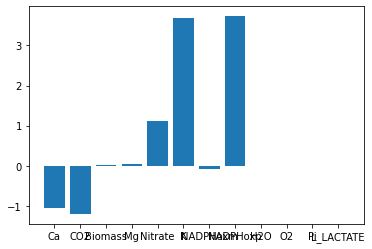

In [ ]:
temp=plt.bar(range(len(odict)),odict.values())
temp=plt.xticks(range(len(odict)),odict.keys())
plt.show()
temp=plt.bar(range(len(cdict)),cdict.values())
temp=plt.xticks(range(len(cdict)),cdict.keys())

In [ ]:
ophdict={}
for rxn in rmodel.reactions:
    if '_ph' in rxn.id and solo[rxn.id]!=0 and not 'EX_X' in rxn.id:
        rr = metroot(rxn.id)
        if rr not in list(ophdict.keys()):
            ophdict[rr]=0
        ophdict[rr]+=solo[rxn.id]

cphdict={}
for rxn in rmodel.reactions:
    if '_ph' in rxn.id and sol[rxn.id]!=0 and not 'EX_X' in rxn.id:
        rr = metroot(rxn.id)
        if rr not in list(cphdict.keys()):
            cphdict[rr]=0
        cphdict[rr]+=sol[rxn.id]

In [ ]:
for rxn in rmodel.reactions:
    if '_ph' in rxn.id and sol[rxn.id]!=0 and 'PHE' in rxn.id and not 'EX_X' in rxn.id:
        print(rxn.id, rxn.reaction)


In [ ]:
for rxn in rmodel.metabolites.Phloem_carbon_in.reactions:
    if  sol[rxn.id]!=0:
        print(rxn.id, rxn.reaction)

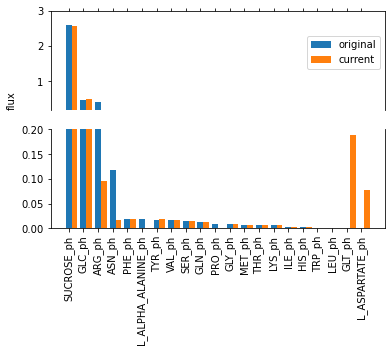

In [ ]:
for key in list(cphdict.keys()):
    if key not in list(ophdict.keys()):
        ophdict[key]=0
for key in list(ophdict.keys()):
    if key not in list(cphdict.keys()):
        cphdict[key]=0
sortkeys = sorted(ophdict.keys(),key=lambda x:ophdict[x],reverse=True)
fig,(ax1,ax2)=plt.subplots(2,1,sharex=True)
width = 0.4
temp=ax1.bar(range(len(ophdict)),[ophdict[key] for key in sortkeys],width=width)
temp=ax1.bar(np.arange((len(cphdict)))+width,[cphdict[key] for key in sortkeys],width=width)
# temp=ax1.xticks(range(len(ophdict)),ophdict.keys(),rotation=90)
temp=ax2.bar(range(len(ophdict)),[ophdict[key] for key in sortkeys],width=width)
temp=ax2.bar(np.arange(len(cphdict))+width,[cphdict[key] for key in sortkeys],width=width)
temp=plt.xticks(range(len(ophdict)),sortkeys,rotation=90)
ax2.set_ylim(0,0.2)
ax1.set_ylim(0.2,3)
plt.legend({'original','current'},bbox_to_anchor=(1,2))
ax2.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False)
ax2.xaxis.tick_bottom()
plt.ylabel('flux',position=(0,1.3))
plt.show()
# temp=plt.bar(range(len(cphdict)),cphdict.values())
# temp=plt.xticks(range(len(cphdict)),cphdict.keys(),rotation=90)

In [ ]:
osum

0

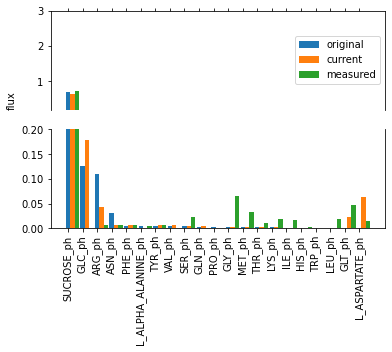

In [ ]:
ddict = {'L_ASPARTATE_ph':0.046,'THR_ph':0.038,'SER_ph':0.074,'ASN_ph':0.019,'GLT_ph':0.157,'GLN_ph':0,'GLY_ph':0.219,'L_ALPHA_ALANINE_ph':0.013,'MET_ph':0.107,'ILE_ph':0.053,'LEU_ph':0.063,'TYR_ph':0.023,'PHE_ph':0.024,'LYS_ph':0.062,'HIS_ph':0.012,'ARG_ph':0.025,'SUCROSE_ph':38.3/16,'GLC_ph':0,'VAL_ph':0,'PRO_ph':0,'TRP_ph':0}

for key in list(cphdict.keys()):
    if key not in list(ophdict.keys()):
        ophdict[key]=0
for key in list(ophdict.keys()):
    if key not in list(cphdict.keys()):
        cphdict[key]=0
csum = sum(cphdict.values())
osum=sum(ophdict.values())
dsum=sum(ddict.values())
sortkeys = sorted(ophdict.keys(),key=lambda x:ophdict[x],reverse=True)
fig,(ax1,ax2)=plt.subplots(2,1,sharex=True)
width = 0.3
temp1=ax1.bar(range(len(ophdict)),[ophdict[key]/osum for key in sortkeys],width=width)
temp2=ax1.bar(np.arange((len(cphdict)))+width,[cphdict[key]/csum for key in sortkeys],width=width)
temp3=ax1.bar(np.arange((len(cphdict)))+2*width,[ddict[key]/dsum for key in sortkeys],width=width)
# temp=ax1.xticks(range(len(ophdict)),ophdict.keys(),rotation=90)
temp1=ax2.bar(range(len(ophdict)),[ophdict[key]/osum for key in sortkeys],width=width)
temp2=ax2.bar(np.arange((len(cphdict)))+width,[cphdict[key]/csum for key in sortkeys],width=width)
temp3=ax2.bar(np.arange((len(cphdict)))+2*width,[ddict[key]/dsum for key in sortkeys],width=width)
temp=plt.xticks(range(len(ophdict)),sortkeys,rotation=90)
ax2.set_ylim(0,0.2)
ax1.set_ylim(0.2,3)
plt.legend([temp1,temp2,temp3],['original','current','measured'],bbox_to_anchor=(1,2))
ax2.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False)
ax2.xaxis.tick_bottom()
plt.ylabel('flux',position=(0,1.3))
plt.show()
# temp=plt.bar(range(len(cphdict)),cphdict.values())
# temp=plt.xticks(range(len(cphdict)),cphdict.keys(),rotation=90)

300


Text(0, 0.5, 'Proportion of SUCROSE_c_per00')

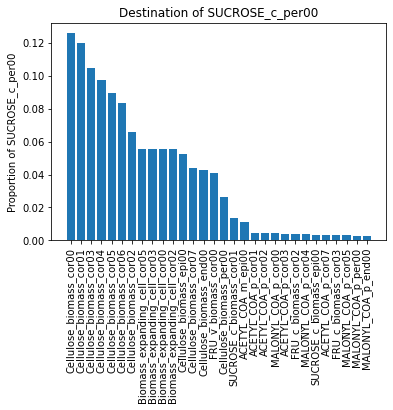

In [ ]:
met='SUCROSE_c_per00'
temp=findCarbonSinks(rmodel,sol,met,imax=300)
num = 30
temp2 = sorted(temp.items(),key=lambda x: x[1],reverse=True)[:num]
plt.bar(range(len(temp2)),[x[1] for x in temp2])
xx=plt.xticks(range(len(temp2)),[x[0] for x in temp2],rotation=90)
plt.title('Destination of '+met)
plt.ylabel('Proportion of '+met)

200


Text(0, 0.5, 'Proportion of SUCROSE_c_per00')

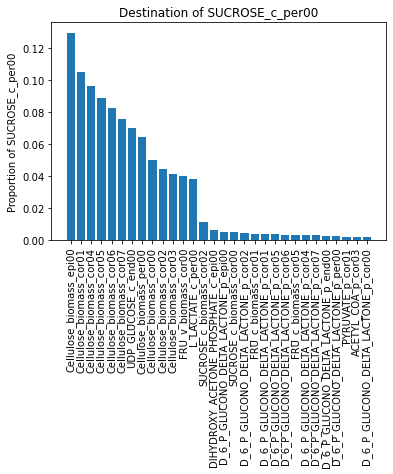

In [ ]:
met='SUCROSE_c_per00'
temp=findCarbonSinks(rmodel,solo,met,imax=200)
num = 30
temp2 = sorted(temp.items(),key=lambda x: x[1],reverse=True)[:num]
plt.bar(range(len(temp2)),[x[1] for x in temp2])
xx=plt.xticks(range(len(temp2)),[x[0] for x in temp2],rotation=90)
plt.title('Destination of '+met)
plt.ylabel('Proportion of '+met)

In [ ]:
import matplotlib.pyplot as plt
met='PYRUVATE_c_epi00'
temp=findCarbonSinks(rmodel,sol,met,imax=20)
num = 30
temp2 = sorted(temp.items(),key=lambda x: x[1],reverse=True)[:num]
plt.bar(range(len(temp2)),[x[1] for x in temp2])
xx=plt.xticks(range(len(temp2)),[x[0] for x in temp2],rotation=90)
plt.title('Destination of '+met)
plt.ylabel('Proportion of '+met)

KeyError: 'RXN_9650-Hexanoyl_ACPs'

In [ ]:
met='PYRUVATE_c_epi00'
for rxn in rmodel.metabolites.get_by_id(met).reactions:
    if sol[rxn.id]!=0:
        print(round(sol[rxn.id]*rxn.get_coefficient(met),4),rxn.id)

-0.106 PYRUVATE_pc_epi00
-0.1629 PYRUVATE_PROTON_mc_epi00
0.2688 PYRUVATE_c_epi00_Transfer_epi00_to_cor00


[]


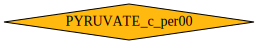

In [ ]:
from analysis import *
mapSink(rmodel,sol,'PYRUVATE_c_per00',7)

100


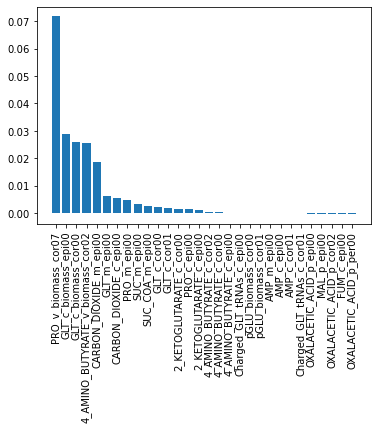

In [ ]:
temp=findCarbonSinks(rmodel,sol,'PRO_c_per00',imax=100)
num = 30
temp2 = sorted(temp.items(),key=lambda x: x[1],reverse=True)[:num]
plt.bar(range(len(temp2)),[x[1] for x in temp2])
xx=plt.xticks(range(len(temp2)),[x[0] for x in temp2],rotation=90)
# VO and energy

100


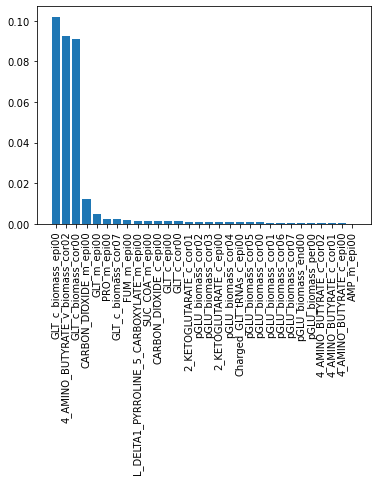

In [ ]:
temp=findCarbonSinks(rmodel,sol,'GLT_c_per00',imax=100)
num = 30
temp2 = sorted(temp.items(),key=lambda x: x[1],reverse=True)[:num]
plt.bar(range(len(temp2)),[x[1] for x in temp2])
xx=plt.xticks(range(len(temp2)),[x[0] for x in temp2],rotation=90)

95


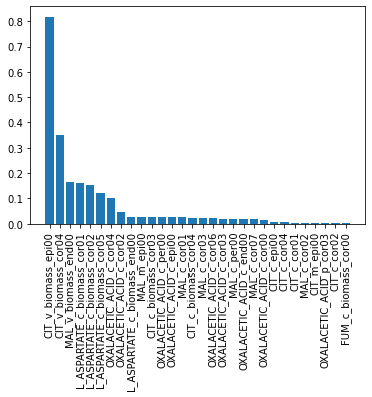

In [ ]:
temp=findCarbonSinks(rmodel,sol,'L_ASPARTATE_c_per00',imax=300)
num = 30
temp2 = sorted(temp.items(),key=lambda x: x[1],reverse=True)[:num]
plt.bar(range(len(temp2)),[x[1] for x in temp2])
xx=plt.xticks(range(len(temp2)),[x[0] for x in temp2],rotation=90)

200


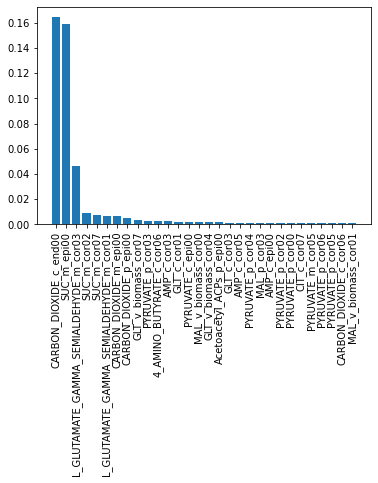

In [ ]:
temp=findCarbonSinks(rmodel,solo,'ARG_c_per00',imax=200,priority_mets=['ARG','SUC_COA','UREA','OXALACETIC','MAL','GLT','ORNITHINE','KETOGLUTARATE'])
num = 30
temp2 = sorted(temp.items(),key=lambda x: x[1],reverse=True)[:num]
plt.bar(range(len(temp2)),[x[1] for x in temp2])
xx=plt.xticks(range(len(temp2)),[x[0] for x in temp2],rotation=90)

[]


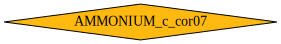

In [ ]:
mapSink(rmodel,solo,'AMMONIUM_c_cor07',7)

In [ ]:
met='MGII_c_epi00'
for rxn in rmodel.metabolites.get_by_id(met).reactions:
    if solo[rxn.id]!=0:
        print(round(solo[rxn.id]*rxn.get_coefficient(met),4),rxn.id)
        print('   ',rxn.reaction)

0.0006 Mg_ec_epi00
    MGII_e_epi00 --> MGII_c_epi00
-0.0006 MGII_c_epi00_Transfer_epi00_to_cor00
    MGII_c_epi00 <=> MGII_c_cor00


# Carbon sinks

In [ ]:
diffCreacts=[]
for rxn in rmodel.reactions:
    reactmetsC = [met for met in rxn.reactants if formula_bkdown(met.formula)[0]!=0]
    prodmetsC = [met for met in rxn.products if formula_bkdown(met.formula)[0]!=0]
    sumprodmetsC = sum([formula_bkdown(met.formula)[0]*rxn.get_coefficient(met) for met in rxn.products])
    sumreactmetsC = -sum([formula_bkdown(met.formula)[0]*rxn.get_coefficient(met) for met in rxn.reactants])
    if round(sumprodmetsC,3)!=round(sumreactmetsC,3):
        diffCreacts+=[rxn.id]

Csinkdict = {}
for rxn in diffCreacts:
    if sol[rxn]!=0:
        rxnobj = rmodel.reactions.get_by_id(rxn)
        reactmetsC = [met for met in rxnobj.reactants if formula_bkdown(met.formula)[0]!=0]
        prodmetsC = [met for met in rxnobj.products if formula_bkdown(met.formula)[0]!=0]
        sumprodmetsC = sum([formula_bkdown(met.formula)[0]*rxnobj.get_coefficient(met) for met in rxnobj.products])
        sumreactmetsC = -sum([formula_bkdown(met.formula)[0]*rxnobj.get_coefficient(met) for met in rxnobj.reactants])
        rxnroot = '_'.join(rxn.split('_')[:-1])
        if rxnroot[:5]=='EX_X_':
            rxnroot=rxnroot[5:]
        if rxnroot not in list(Csinkdict.keys()):
            Csinkdict[rxnroot]=0
        if sol[rxn]>0:
            Csinkdict[rxnroot]+=(sumreactmetsC-sumprodmetsC)*sol[rxn]
        else:
            Csinkdict[rxnroot]+=(sumprodmetsC-sumreactmetsC)*sol[rxn]


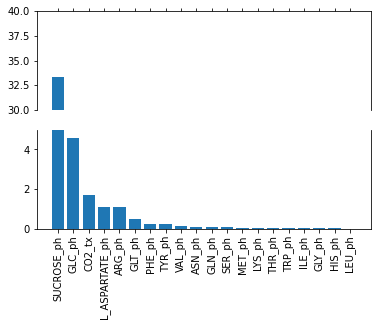

In [ ]:
minthresh=1e-4
Csinks = {}
for key in list(Csinkdict.keys()):
    if Csinkdict[key]<-minthresh:
        Csinks[key]=-Csinkdict[key]
Csinks=sorted(Csinks.items(),key=lambda x:x[1],reverse=True)
fig,(ax1,ax2)=plt.subplots(2,1,sharex=True)
# plt.title('Sources of carbon (current)',position=(0,-20))
ax1.bar(range(len(Csinks)),[x[1] for x in Csinks])
ax2.bar(range(len(Csinks)),[x[1] for x in Csinks])
ax2.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False)
ax2.xaxis.tick_bottom()
ax2.set_ylim(0,5)
ax1.set_ylim(30,40)
temp=plt.xticks(range(len(Csinks)),[x[0] for x in Csinks],rotation=90)

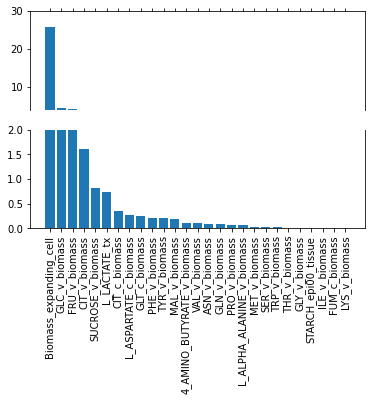

In [ ]:
minthresh=1e-4
Csinks = {}
for key in list(Csinkdict.keys()):
    if Csinkdict[key]>minthresh:
        Csinks[key]=Csinkdict[key]
Csinks=sorted(Csinks.items(),key=lambda x:x[1],reverse=True)
fig,(ax1,ax2)=plt.subplots(2,1,sharex=True)
ax1.bar(range(len(Csinks)),[x[1] for x in Csinks])
ax2.bar(range(len(Csinks)),[x[1] for x in Csinks])
ax2.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False)
ax2.xaxis.tick_bottom()
ax2.set_ylim(0,2)
ax1.set_ylim(4,30)
temp=plt.xticks(range(len(Csinks)),[x[0] for x in Csinks],rotation=90)

In [ ]:
Csinkdicto = {}
for rxn in diffCreacts:
    if solo[rxn]!=0:
        rxnobj = rmodel.reactions.get_by_id(rxn)
        reactmetsC = [met for met in rxnobj.reactants if formula_bkdown(met.formula)[0]!=0]
        prodmetsC = [met for met in rxnobj.products if formula_bkdown(met.formula)[0]!=0]
        sumprodmetsC = sum([formula_bkdown(met.formula)[0]*rxnobj.get_coefficient(met) for met in rxnobj.products])
        sumreactmetsC = -sum([formula_bkdown(met.formula)[0]*rxnobj.get_coefficient(met) for met in rxnobj.reactants])
        rxnroot = '_'.join(rxn.split('_')[:-1])
        if rxnroot[:5]=='EX_X_':
            rxnroot=rxnroot[5:]
        if rxnroot not in list(Csinkdicto.keys()):
            Csinkdicto[rxnroot]=0
        if solo[rxn]>0:
            Csinkdicto[rxnroot]+=(sumreactmetsC-sumprodmetsC)*solo[rxn]
        else:
            Csinkdicto[rxnroot]+=(sumprodmetsC-sumreactmetsC)*solo[rxn]


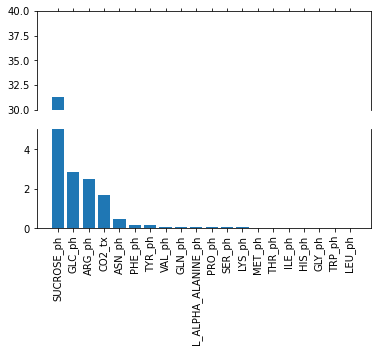

In [ ]:
minthresh=1e-4
Csinks = {}
for key in list(Csinkdicto.keys()):
    if Csinkdicto[key]<-minthresh:
        Csinks[key]=-Csinkdicto[key]
Csinks=sorted(Csinks.items(),key=lambda x:x[1],reverse=True)
fig,(ax1,ax2)=plt.subplots(2,1,sharex=True)
# plt.title('Sources of carbon (current)',position=(0,-20))
ax1.bar(range(len(Csinks)),[x[1] for x in Csinks])
ax2.bar(range(len(Csinks)),[x[1] for x in Csinks])
ax2.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False)
ax2.xaxis.tick_bottom()
ax2.set_ylim(0,5)
ax1.set_ylim(30,40)
temp=plt.xticks(range(len(Csinks)),[x[0] for x in Csinks],rotation=90)

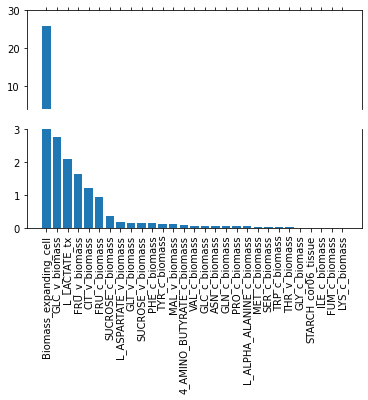

In [ ]:
minthresh=1e-4
Csinks = {}
for key in list(Csinkdicto.keys()):
    if Csinkdicto[key]>minthresh:
        Csinks[key]=Csinkdicto[key]
Csinks=sorted(Csinks.items(),key=lambda x:x[1],reverse=True)
fig,(ax1,ax2)=plt.subplots(2,1,sharex=True)
ax1.bar(range(len(Csinks)),[x[1] for x in Csinks])
ax2.bar(range(len(Csinks)),[x[1] for x in Csinks])
ax2.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False)
ax2.xaxis.tick_bottom()
ax2.set_ylim(0,3)
ax1.set_ylim(4,30)
temp=plt.xticks(range(len(Csinks)),[x[0] for x in Csinks],rotation=90)

In [ ]:
ii=2
rxn = rmodel.reactions.get_by_id(diffCreacts[ii])
reactmetsC = [met for met in rxn.reactants if formula_bkdown(met.formula)[0]!=0]
prodmetsC = [met for met in rxn.products if formula_bkdown(met.formula)[0]!=0]
sumprodmetsC = sum([formula_bkdown(met.formula)[0]*rxn.get_coefficient(met) for met in rxn.products])
sumreactmetsC = -sum([formula_bkdown(met.formula)[0]*rxn.get_coefficient(met) for met in rxn.reactants])
print(rxn.id,': ', rxn.reaction)
print(reactmetsC,sumreactmetsC)
print(prodmetsC,sumprodmetsC)

GLC_tx_epi00 :   <=> GLC_e_epi00
[] 0
[<Metabolite GLC_e_epi00 at 0x7fe8b3727af0>] 6.0


# Energy sinks

In [ ]:
for rxn in rmodel.metabolites.GMP_p_epi00.reactions:
    print(rxn.id,rxn.reaction)

GMP_pc_epi00 0.5 GMP_p_epi00 + 0.37 PROTON_c_epi00 + 0.5 bGMP_p_epi00 <=> 0.75 GMP_c_epi00 + 0.06 aGMP_c_epi00 + 0.19 bGMP_c_epi00
GUANYL_KIN_RXN_p_epi00 0.9 ATP_p_epi00 + 0.5 GMP_p_epi00 + 1.4 PROTON_c_epi00 + 0.1 aATP_p_epi00 + 0.5 bGMP_p_epi00 --> 0.8 ADP_p_epi00 + 0.2 GDP_p_epi00 + 0.2 aADP_p_epi00 + 0.8 aGDP_p_epi00


In [ ]:
def energydif(rxn):
    energy_mets = ['ATP_','UTP_','GTP_','PPI_']
    anti_energy_mets = ['AMP_','UMP_','GMP_']
    if any([met.id[:4]==x for x in energy_mets for met in rxn.metabolites]):
        react_energy = sum([-rxn.get_coefficient(met) for met in rxn.reactants if any([met.id[:4]==x or (met.id[1:5]==x and met.id[0]!='D') for x in energy_mets])])-sum([-rxn.get_coefficient(met) for met in rxn.reactants if any([met.id[:4]==x or (met.id[1:5]==x and met.id[0]!='D') for x in anti_energy_mets])])
        prod_energy = sum([rxn.get_coefficient(met) for met in rxn.products if any([met.id[:4]==x or (met.id[1:5]==x and met.id[0]!='D') for x in energy_mets])])-sum([rxn.get_coefficient(met) for met in rxn.products if any([met.id[:4]==x or (met.id[1:5]==x and met.id[0]!='D') for x in anti_energy_mets])])
        # print(prod_energy,react_energy)
        return prod_energy-react_energy
    else:
        return 0

In [ ]:
diffEreacts=[]
for rxn in rmodel.reactions:
    if round(energydif(rxn),4)!=0:
        diffEreacts+=[rxn.id]

Esinkdict = {}
for rxn in diffEreacts:
    if sol[rxn]!=0:
        rxnobj = rmodel.reactions.get_by_id(rxn)
        rxnroot = '_'.join(rxn.split('_')[:-1])
        if rxnroot[:5]=='EX_X_':
            rxnroot=rxnroot[5:]
        if rxnroot not in list(Esinkdict.keys()):
            Esinkdict[rxnroot]=0
        Esinkdict[rxnroot]+=energydif(rxnobj)*sol[rxn]


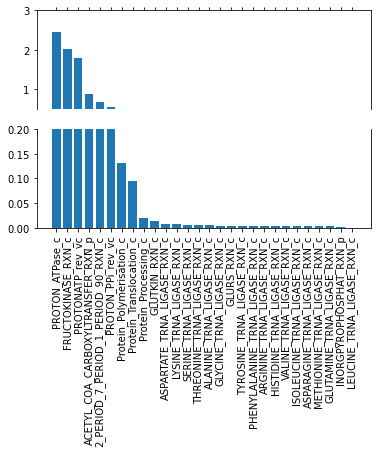

In [ ]:
minthresh=1e-4
Csinks = {}
for key in list(Esinkdict.keys()):
    if Esinkdict[key]<-minthresh:
        Csinks[key]=-Esinkdict[key]
Csinks=sorted(Csinks.items(),key=lambda x:x[1],reverse=True)
fig,(ax1,ax2)=plt.subplots(2,1,sharex=True)
# plt.title('Sinks for energy (current)',position=(0,-20))
ax1.bar(range(len(Csinks)),[x[1] for x in Csinks])
ax2.bar(range(len(Csinks)),[x[1] for x in Csinks])
ax2.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False)
ax2.xaxis.tick_bottom()
ax2.set_ylim(0,0.2)
ax1.set_ylim(0.5,3)
temp=plt.xticks(range(len(Csinks)),[x[0] for x in Csinks],rotation=90)

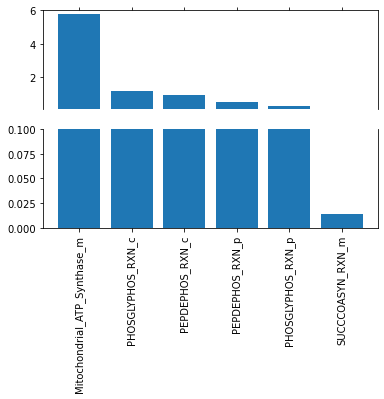

In [ ]:
minthresh=1e-4
Csinks = {}
for key in list(Esinkdict.keys()):
    if Esinkdict[key]>minthresh:
        Csinks[key]=Esinkdict[key]
Csinks=sorted(Csinks.items(),key=lambda x:x[1],reverse=True)
fig,(ax1,ax2)=plt.subplots(2,1,sharex=True)
ax1.bar(range(len(Csinks)),[x[1] for x in Csinks])
ax2.bar(range(len(Csinks)),[x[1] for x in Csinks])
ax2.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False)
ax2.xaxis.tick_bottom()
ax2.set_ylim(0,0.1)
ax1.set_ylim(0.1,6)
temp=plt.xticks(range(len(Csinks)),[x[0] for x in Csinks],rotation=90)

In [ ]:
formula_bkdown(rmodel.metabolites.CAII_e_epi00.formula)

[0, 0, 0, 0, 0]

# Lynch data based accumulation

In [ ]:
rmodel.reactions.soluble_biomass_tissue.reaction

'0.0782640711807921 4_AMINO_BUTYRATE_b_tissue + 0.0600589625201899 ASN_b_tissue + 0.878889892905373 CIT_b_tissue + 1.86489235724427 FRU_b_tissue + 0.00340006336379793 FUM_b_tissue + 2.05448400169609 GLC_b_tissue + 0.0435465316692712 GLN_b_tissue + 0.130396168497184 GLT_b_tissue + 0.0180009727871383 GLY_b_tissue + 0.00344712080821492 ILE_b_tissue + 0.0015000983214104 LYS_b_tissue + 0.0585208272824873 L_ALPHA_ALANINE_b_tissue + 0.17925836600129 L_ASPARTATE_b_tissue + 0.135233529659136 MAL_b_tissue + 0.0196487152523661 MET_b_tissue + 0.0639152854553056 PHE_b_tissue + 0.0382990266331706 PRO_b_tissue + 0.0322582767141952 SER_b_tissue + 0.004 STARCH_b_tissue + 0.183948503693606 SUCROSE_b_tissue + 0.0112658684869911 THR_b_tissue + 0.00647935009629252 TRP_b_tissue + 0.0603615725116433 TYR_b_tissue + 0.0596305954212679 VAL_b_tissue --> '

In [ ]:
import pandas as pd
sdata=pd.read_excel('/Users/user/Downloads/Maize-Root-Metabolomics-Lynch-2022.xlsx')

lynchdict={}
for ii in range(len(sdata)-1):
    lynchdict[list(sdata['Unnamed: 0'])[ii+1]]=list(sdata['Unnamed: 2'])[ii+1]
sortedl=sorted(lynchdict.items(),key=lambda x:x[1],reverse=True)
suml = sum([x[1] for x in sortedl])

l_to_model={
    'trans-Aconitate': 'CIT',
    'Glucose':'GLC',
    'Glutamine':'GLN',
    'Alanine':'L_ALPHA_ALANINE',
    'Malate':'MAL',
    'Fructose':'FRU',
    'Glutamate':'GLT',
    'Asparagine':'ASN',
    # 'Lactate':'L_LACTATE',
    'Sucrose':'SUCROSE',
    '4-Aminobutyrate':'4_AMINO_BUTYRATE',
    'Valine':'VAL',
    'Aspartate':'L_ASPARTATE',
    # 'Leucine':'LEU',
    'Citrate':'CIT',
    'Isoleucine':'ILE',
    'Fumarate':'FUM'
}
sumsbdict=sum([x[1] for x in sortedsb])
y1sb = {}
y2ly = {}
for ii in list(sbdict.keys())+list(lynchdict.keys()):
    if ii in sbdict.keys():
        y1sb[ii]=sbdict[ii]
    elif ii not in list(l_to_model.keys()):
        y1sb[ii]=0
    if '_'.join(ii.split('_')[:-2]) in list(l_to_model.values()):
        lykey = [x for x in list(l_to_model.keys()) if l_to_model[x]=='_'.join(ii.split('_')[:-2])]
        # print(ii,lykey,sum([lynchdict[x] for x in lykey]))
        y2ly[ii]=sum([lynchdict[x] for x in lykey])

ILE_b_tissue ['Isoleucine'] 0.2153569235950431
SUCROSE_b_tissue ['Sucrose'] 0.9154252243691497
GLN_b_tissue ['Glutamine'] 10.106990936937928
GLC_b_tissue ['Glucose'] 18.78369139917533
CIT_b_tissue ['trans-Aconitate', 'Citrate'] 11.153694778675753
FUM_b_tissue ['Fumarate'] 0.03337397972276653
GLT_b_tissue ['Glutamate'] 2.243970351600145
ASN_b_tissue ['Asparagine'] 1.3202726074092366
L_ALPHA_ALANINE_b_tissue ['Alanine'] 6.596971089092725
VAL_b_tissue ['Valine'] 0.7815470032270024
FRU_b_tissue ['Fructose'] 5.455572216798678
MAL_b_tissue ['Malate'] 5.899001634297329
4_AMINO_BUTYRATE_b_tissue ['4-Aminobutyrate'] 1.461194555965118


In [ ]:
list(sbdict.keys())+list(lynchdict.keys())

['ILE_b_tissue',
 'SUCROSE_b_tissue',
 'GLN_b_tissue',
 'GLC_b_tissue',
 'CIT_b_tissue',
 'FUM_b_tissue',
 'GLT_b_tissue',
 'ASN_b_tissue',
 'L_ALPHA_ALANINE_b_tissue',
 'VAL_b_tissue',
 'FRU_b_tissue',
 'MAL_b_tissue',
 '4_AMINO_BUTYRATE_b_tissue',
 '3-Hydroxyisovalerate',
 '4-Aminobutyrate',
 'Adenosine',
 'Alanine',
 'Asparagine',
 'Aspartate',
 'Choline',
 'Citrate',
 'Ethanolamine',
 'Formate',
 'Fructose',
 'Fumarate',
 'Glucose',
 'Glutamate',
 'Glutamine',
 'Isoleucine',
 'Lactate',
 'Leucine',
 'Malate',
 'Succinate',
 'Sucrose',
 'Uridine',
 'Valine',
 'trans-Aconitate',
 'Ethanol']

In [ ]:
rmodel.remove_reactions({'soluble_biomass_tissue_Lynch'})
rxn = Reaction('soluble_biomass_tissue_Lynch')
rmodel.add_reaction(rxn)
rxn.lower_bound=0
rmodel_mets=[x.id for x in rmodel.metabolites]
for met in y2ly.keys():
    if met in rmodel_mets:
        # print(met)
        rxn.add_metabolites({met:-y2ly[met]})
print(rxn.reaction)

1.461194555965118 4_AMINO_BUTYRATE_b_tissue + 1.3202726074092366 ASN_b_tissue + 11.153694778675753 CIT_b_tissue + 5.455572216798678 FRU_b_tissue + 0.03337397972276653 FUM_b_tissue + 18.78369139917533 GLC_b_tissue + 10.106990936937928 GLN_b_tissue + 2.243970351600145 GLT_b_tissue + 0.2153569235950431 ILE_b_tissue + 6.596971089092725 L_ALPHA_ALANINE_b_tissue + 5.899001634297329 MAL_b_tissue + 0.9154252243691497 SUCROSE_b_tissue + 0.7815470032270024 VAL_b_tissue --> 


In [ ]:
rmodel.reactions.soluble_biomass_tissue.upper_bound=0
sol2=rmodel.optimize()

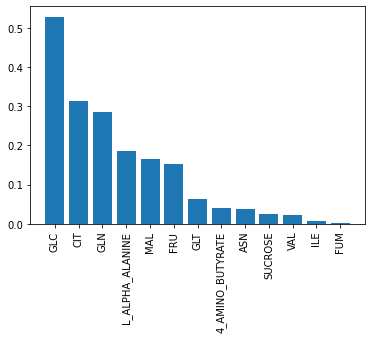

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
sbdict={}
# rxn=rmodel.reactions.soluble_biomass_tissue
rxn=rmodel.reactions.soluble_biomass_tissue_Lynch
for met in rxn.metabolites:
    sbdict[met.id]=-rxn.get_coefficient(met.id)*sol2[rxn.id]
sortedsb = sorted(sbdict.items(),key=lambda x:x[1],reverse=True)
width=0.8
plt.bar(np.arange(len(sbdict)),[x[1] for x in sortedsb],width=width)
# plt.bar(np.arange(len(sbdict))+width,[sbodict[x[0]] for x in sortedsb],width=width)
temp=plt.xticks(range(len(sbdict)),['_'.join(x[0].split('_')[:-2]) for x in sortedsb],rotation=90)
# plt.ylim(0,2)
# plt.legend(['current','old'])

(0.0, 2.0)

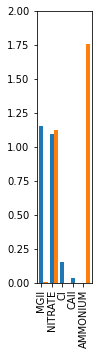

In [ ]:
import matplotlib.pyplot as plt
osbdict={}
osbodict={}
width=0.4
for omet in rmodel.metabolites:
    if '_b_' in omet.id and not 'tissue' in omet.id:
        for rxn in omet.reactions:
            if not any([y in met.id for met in rxn.metabolites for y in ['tissue','Protein','Cellul','Lipi']]) and (sol2[rxn.id]*rxn.get_coefficient(omet.id)<0 or solo[rxn.id]*rxn.get_coefficient(omet.id)<0):
                # print(rxn.id, rxn.reaction)
                metroot='_'.join(omet.id.split('_')[:-2])
                # print(omet.id, rxn.id)
                if metroot not in list(osbdict.keys()):
                    osbdict[metroot]=0
                    osbodict[metroot]=0
                osbdict[metroot]+=-rxn.get_coefficient(omet.id)*sol2[rxn.id]
                osbodict[metroot]+=-rxn.get_coefficient(omet.id)*solo[rxn.id]
sortedosb = sorted(osbdict.items(),key=lambda x:x[1],reverse=True)
fig = plt.figure(figsize=(1,4*len(osbdict)/4))
plt.bar(range(len(osbdict)),[x[1] for x in sortedosb],width=width)
plt.bar(np.arange(len(osbdict))+width,[osbodict[x[0]] for x in sortedosb],width=width)
temp=plt.xticks(range(len(osbdict)),[x[0] for x in sortedosb],rotation=90)
plt.ylim(0,2)

(0.0, 2.0)

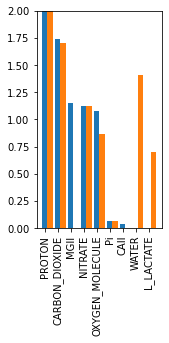

In [ ]:
import matplotlib.pyplot as plt
osbdict={}
osbodict={}
width=0.4
for omet in rmodel.metabolites:
    if '_e_' in omet.id and not 'tissue' in omet.id:
        for rxn in omet.reactions:
            if not any([y in met.id for met in rxn.metabolites for y in ['tissue','Protein','Cellul','Lipi']]) and (sol2[rxn.id]*rxn.get_coefficient(omet.id)<0 or solo[rxn.id]*rxn.get_coefficient(omet.id)<0):
                # print(rxn.id, rxn.reaction)
                metroot='_'.join(omet.id.split('_')[:-2])
                # print(omet.id, rxn.id)
                if metroot not in list(osbdict.keys()):
                    osbdict[metroot]=0
                    osbodict[metroot]=0
                osbdict[metroot]+=-rxn.get_coefficient(omet.id)*sol2[rxn.id]
                osbodict[metroot]+=-rxn.get_coefficient(omet.id)*solo[rxn.id]
sortedosb = sorted(osbdict.items(),key=lambda x:x[1],reverse=True)
fig = plt.figure(figsize=(1*len(osbdict)/4,4))
plt.bar(range(len(osbdict)),[x[1] for x in sortedosb],width=width)
plt.bar(np.arange(len(osbdict))+width,[osbodict[x[0]] for x in sortedosb],width=width)
temp=plt.xticks(range(len(osbdict)),[x[0] for x in sortedosb],rotation=90)
plt.ylim(0,2)

In [ ]:
rmodel.reactions.L_LACTATE_tx_epi00.reaction

'L_LACTATE_e_epi00 --> '

In [ ]:
sol1=sol
sol=sol2

# Li et al 2014

In [ ]:
lidata=pd.read_excel('/Users/user/Documents/Ox/roots/Spreadsheets/Li_roots_2014.xlsx')

In [ ]:
lidata.head(2)

,Metabolites,Standard curve,Coefficient r,LLOD (ng/ml),LLOQ (ng/ml),Maize_control (µg/mg FW),Maize_Pb treatment (µg/mg FW),Fold change (Pb treatment/control)
0,1-Pyrroline-5-carboxylic acid,y=0.11915x+0.04077,0.9918,0.0132,0.058,1.248E-03±1.031E-04,1.961E-03±9.702E-04,1.57
1,2-Ketobutyric acid,y=0.006705x+0.02787,0.9900,0.0963,0.102,0.0105±8.702E-03,0.0117±6.305E-03,1.11


In [ ]:
lidict={}
limets=list(lidata['Metabolites'])
livals=list(lidata['Maize_control (µg/mg FW)'])
for ii in range(len(lidata)):
    if livals[ii]!='ND':
        lidict[limets[ii]]=float(livals[ii].split('±')[0])

In [ ]:
for ii in range(len(lidict)):
    if 'serine' in limets[ii]:
        print(limets[ii],livals[ii])

Homoserine 0.4651±0.03865
N-acetylserine 1.469E-04±1.22087E-05
Phosphoserine 0.0291±2.424E-03


In [ ]:
lisorted=sorted(lidict.items(),key=lambda x:x[1],reverse=True)
print(lisorted[:30])

[('Hexose pool', 57.661), ('Beta-alanine', 37.323), ('Citric acid', 36.112), ('Citrulline', 18.394), ('Sucrose', 13.466), ('3-Phosphoglyceric acid', 11.296), ('PI(34:3)', 5.115), ('Aspartic acid', 5.103), ('Glyceraldehyde', 4.696), ('Glutamic acid', 4.103), ('Malic acid', 3.878), ('PC(34:3)', 3.477), ('PI(34:2)', 3.421), ('PC(36:4)', 3.019), ('PC(36:5)', 2.941), ('PC(36:6)', 2.707), ('Tyrosine', 2.339), ('Phenylalanine', 2.258), ('Ascorbic acid', 2.251), ('PC(34:1)', 2.161), ('PC(34:2)', 1.947), ('PC(36:3)', 1.943), ('Gamma-Aminobutyric acid', 1.726), ('Asparagine', 1.697), ('ATP', 1.692), ('PI(34:1)', 1.608), ('Valine', 1.494), ('Oxalic acid', 1.488), ('Lactic acid', 1.466), ('Glutamine', 1.361)]


# Explore biomass composition2

In [257]:
# Load biomass composition exploration as dict
import pandas as pd
# rs2=pd.read_csv('Spreadsheets/BiomassComposition2.csv')
rs2=pd.read_csv('Spreadsheets/BiomassComposition2no_lact_prot.csv')
sol_dict = {}
for solname in rs2.columns[7:]:
    sol_dict[solname]={}
    for ii in range(len(rs2)):
        sol_dict[solname][rs2.loc[ii]['reaction_id']]=rs2.loc[ii][solname]
    for rxn in rmodel.reactions:
        if rxn.id not in sol_dict[solname].keys():
            sol_dict[solname][rxn.id] = 0


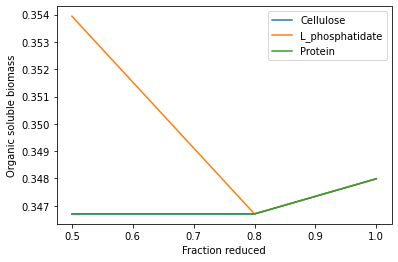

In [261]:
import matplotlib.pyplot as plt
bits = [1,0.8,0.5]
plt.figure()
plt.plot(bits,[sol_dict[str(x)+'-1-1']['soluble_biomass_tissue'] for x in bits])
plt.plot(bits,[sol_dict['1-'+str(x)+'-1']['soluble_biomass_tissue'] for x in bits])
plt.plot(bits,[sol_dict['1-1-'+str(x)]['soluble_biomass_tissue'] for x in bits])
plt.legend(['Cellulose','L_phosphatidate','Protein'])
plt.xlabel('Fraction reduced')
plt.ylabel('Organic soluble biomass')
plt.show()

In [260]:
[sol_dict['1-1-'+str(x)]['soluble_biomass_tissue'] for x in bits]

[0.3479887302281129, 0.3467021415271961, 0.3467021415271962]

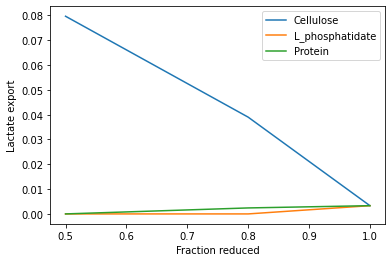

In [262]:
import matplotlib.pyplot as plt
bits = [1,0.8,0.5]
rxn = 'L_LACTATE_tx_epi00'
plt.figure()
plt.plot(bits,[sol_dict[str(x)+'-1-1'][rxn] for x in bits])
plt.plot(bits,[sol_dict['1-'+str(x)+'-1'][rxn] for x in bits])
plt.plot(bits,[sol_dict['1-1-'+str(x)][rxn] for x in bits])
plt.legend(['Cellulose','L_phosphatidate','Protein'])
plt.xlabel('Fraction reduced')
plt.ylabel('Lactate export')
plt.show()

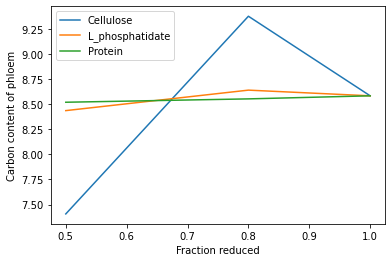

In [264]:
import matplotlib.pyplot as plt
bits = [1,0.8,0.5]
rxn = 'Phloem_carbon_import'
plt.figure()
plt.plot(bits,[sol_dict[str(x)+'-1-1'][rxn] for x in bits])
plt.plot(bits,[sol_dict['1-'+str(x)+'-1'][rxn] for x in bits])
plt.plot(bits,[sol_dict['1-1-'+str(x)][rxn] for x in bits])
plt.legend(['Cellulose','L_phosphatidate','Protein'])
plt.xlabel('Fraction reduced')
plt.ylabel('Carbon content of phloem')
plt.show()

In [ ]:
testmodel = rmodel.copy()

Read LP format model from file /var/folders/rx/sg79_yds24z7clp5pp_fnpnh0000gp/T/tmpwhqvnxyo.lp
Reading time = 0.48 seconds
: 10050 rows, 26537 columns, 137837 nonzeros


In [ ]:
testobj = testmodel.problem.Objective(
    testmodel.reactions.soluble_biomass_tissue.flux_expression,
    direction='min')
testmodel.objective = testobj
tsol=pfba(testmodel)

In [ ]:
testobj = testmodel.problem.Objective(
    testmodel.reactions.Phloem_carbon_import.flux_expression,
    direction='min')
testmodel.objective = testobj
ssol=pfba(testmodel)

In [ ]:
print(tsol['soluble_biomass_tissue'],tsol['L_LACTATE_tx_epi00'],tsol['Phloem_carbon_import'])
print(sol['soluble_biomass_tissue'],sol['L_LACTATE_tx_epi00'],sol['Phloem_carbon_import'])
print(ssol['soluble_biomass_tissue'],ssol['L_LACTATE_tx_epi00'],ssol['Phloem_carbon_import'])

0.19264034677796646 0.45054362602887604 9.531543523801894
0.3702989193885454 0.24658696917038847 10.952152550346096
0.19264034677798647 0.0 9.099639682470368


MET
VAL
MGII
FUM
aFUM
L_ASPARTATE
ILE
MAL
aMAL
THR
LYS
KI
CAII
PRO
TYR
GLN
FRU
Cl
SUCROSE
CIT
aCIT
GLC
TRP
4_AMINO_BUTYRATE
SER
GLY
PHE
NITRATE
ASN
L_ALPHA_ALANINE
GLT


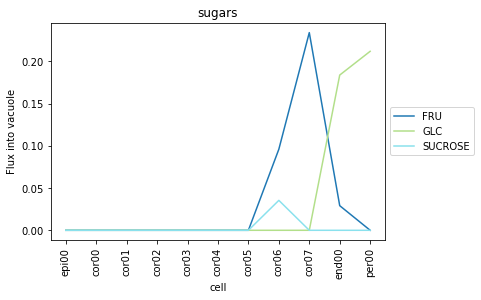

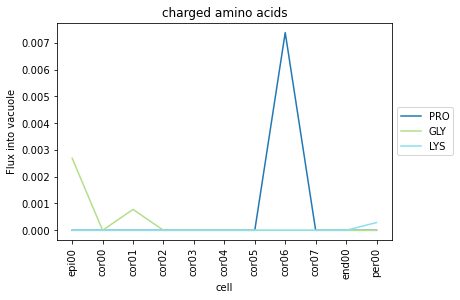

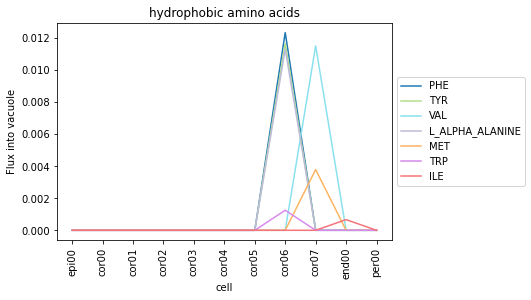

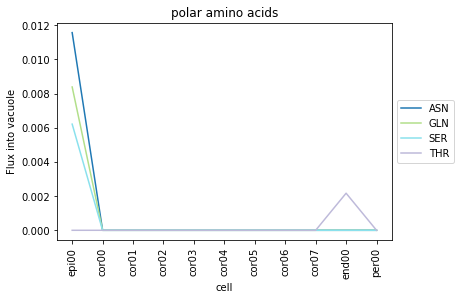

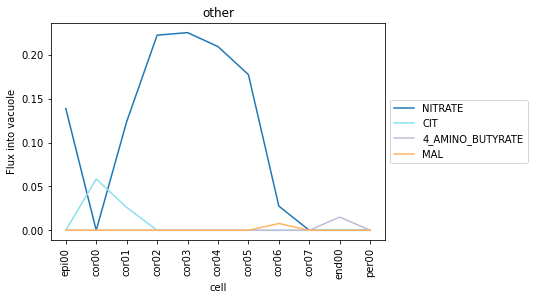

In [ ]:
# For original model solution
# vo contributions
cell='cor02'
meto='VO_'
vo_mets=[]
metdictt = {}
for rxn in rmodel.metabolites.get_by_id(meto+cell).reactions:
    # if ssol[rxn.id]!=0:
        for met in rxn.reactants:
            if '_v_' in met.id:
                vo_mets+=[met.id]
                metroot = met.id.split('_v_')[0]
                rxnroot = '_'.join(rxn.id.split('_')[:-1])
                print(metroot)
                if met.id[0]!='a':
                    # if metroot not in metdictsmax.keys():
                    #     metdictsmax[metroot]={}
                    #     metdictsmin[metroot]={}
                    metdictt[metroot]=[-ssol[rmodel.reactions.get_by_id(rxnroot+'_'+cell).id]*rmodel.reactions.get_by_id(rxnroot+'_'+cell).get_coefficient(metroot+'_v_'+cell) for cell in cells]
                else:
                    metdictt[metroot[1:]]=[-ssol[rmodel.reactions.get_by_id(rxnroot+'_'+cell).id]*rmodel.reactions.get_by_id(rxnroot+'_'+cell).get_coefficient(metroot+'_v_'+cell) for cell in cells]
# Original model sol
import matplotlib.pyplot as plt
dict_cats={}
# dict_cats['sugars']  = ['SUCROSE','FRU','GLC']
# dict_cats['charges amino acids']     = ['GLY','LYS','PRO']
# dict_cats['hydrophobic amino acids']     = ['L_ALPHA_ALANINE','ILE','MET','PHE','TRP','TYR','VAL']
# dict_cats['polar amino acids']     = ['ASN','SER','THR','GLN']
# # dict_cats['aas']     = ['L_ALPHA_ALANINE','ASN','GLN','GLY','ILE','LYS','MET','PHE','PRO','SER','THR','TRP','TYR','VAL']
# dict_cats['other']   = [x for x in list(set(metdictt.keys())) if not any([x in dict_cats[y] for y in list(dict_cats.keys())])]

dict_cats['sugars']  = ['FRU','GLC','SUCROSE']
dict_cats['charged amino acids']     = ['PRO','GLY','LYS']
dict_cats['hydrophobic amino acids']     = ['PHE','TYR','VAL','L_ALPHA_ALANINE','MET','TRP','ILE']
dict_cats['polar amino acids']     = ['ASN','GLN','SER','THR']
dict_cats['other']   = ['NITRATE','MGII','CIT','4_AMINO_BUTYRATE','MAL']

sudpglc_ict = {}
celltags = ['_epi00','_cor00','_cor01','_cor02','_cor03','_cor04','_cor05','_cor06','_cor07','_end00','_per00']

for cat in dict_cats:
    plts=[]
    plted=[]
    for it,rxn in enumerate(dict_cats[cat]):
        if rxn in metdictt.keys():
            if not all([abs(x)<1e-4 for x in metdictt[rxn]]):
                plts+=plt.plot(metdictt[rxn],color=col[it])
                plted+=[it]
    plt.legend(plts,[dict_cats[cat][x] for x in plted],bbox_to_anchor=(1,0.5),loc='center left')
    plt.title(cat)
    plt.xticks(range(len(metdictt[rxn])),labels=[x[1:] for x in celltags],rotation=90)
    plt.xlabel('cell')
    plt.ylabel('Flux into vacuole')
    plt.show()

# Compare glycolysis between cells...

GAP_c_cor00 ['epi00', 'cor00', 'cor01', 'cor02', 'cor03', 'cor04', 'cor05', 'cor06', 'cor07', 'end00', 'per00']
GAP_3PGA_pc_cor00 G3P_c_cor00 + GAP_p_cor00 <=> G3P_p_cor00 + GAP_c_cor00
[0.0185, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
GAPOXNPHOSPHN_RXN_c_cor00 GAP_c_cor00 + NAD_c_cor00 + 0.7 Pi_c_cor00 + 0.3 aPi_c_cor00 <=> DPG_c_cor00 + NADH_c_cor00 + 1.3 PROTON_c_cor00
[-0.0, -0.0, -0.3543, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.6134, -0.0]
TRIOSEPISOMERIZATION_RXN_c_cor00 GAP_c_cor00 <=> DIHYDROXY_ACETONE_PHOSPHATE_c_cor00
[-0.0, 0.1824, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.2543, -0.0, -0.0]
GAP_Pi_pc_cor00 GAP_p_cor00 + 0.7 Pi_c_cor00 + 0.3 aPi_c_cor00 <=> GAP_c_cor00 + 0.3 PROTON_c_cor00 + Pi_p_cor00
[0.0, 0.0, -0.033, 0.0, 0.0, 0.0, -0.0247, 0.0, 0.0, 0.0, 0.0]
F16ALDOLASE_RXN_c_cor00 FRUCTOSE_16_DIPHOSPHATE_c_cor00 <=> DIHYDROXY_ACETONE_PHOSPHATE_c_cor00 + GAP_c_cor00
[0.0, 0.1865, 0.0, 0.0, 0.0, 0.0247, 0.0, 0.3522, 0.0, 0.0, 0.0069]


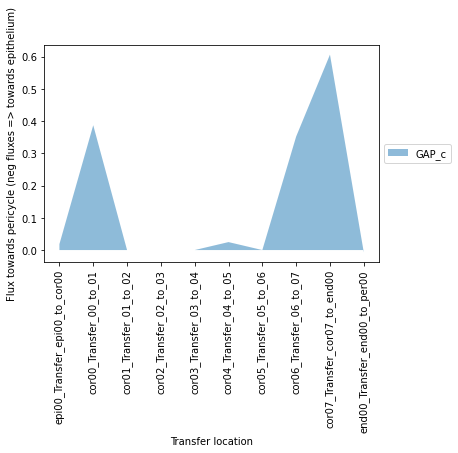

In [ ]:
cells = [rxn.id.split('_')[-1] for rxn in rmodel.reactions if 'CELLULOSE_SYNTHASE_UDP_FORMING_RXN_c' in rxn.id]
met = 'GAP_c_cor00'
print(met,cells)
for rxn in rmodel.metabolites.get_by_id(met).reactions:
    if not 'Transfer' in rxn.id and any([round(sol[rxn.id.replace(met.split('_')[-1],x)],4)for x in cells]):
        print(rxn.id, rxn.reaction)
        print([round(sol[rxn.id.replace(met.split('_')[-1],x)]*rxn.get_coefficient(met),4)for x in cells])


large_symp = sorted([rxn for rxn in rmodel.reactions if any([x in rxn.id for x in list(transfers)]) and not rxn.id[0]=='a' and '_'.join(met.split('_')[:-1]) in rxn.id],key=lambda x:abs(sol[x.id]),reverse=True)
subset_symp = set(['_'.join(x.id.split('_')[:-5]) for x in large_symp[:100]])
# print(len(subset_symp),subset_symp)
# print(list(transfers)[0])
partitions = 1
partition_size=6
sym_partitions={}
temp_symp=list(subset_symp)[:partition_size*partitions]
for ii in range(partitions):
    ref_met = sorted(temp_symp,key=lambda x: formula_bkdown(rmodel.metabolites.get_by_id(x+'_cor01').formula)[0])[-1]
    if len(temp_symp)>partition_size:
        sym_partitions[ii] = sorted(temp_symp,key=lambda x: dls(rmodel.metabolites.get_by_id(ref_met+'_cor01'),rmodel.metabolites.get_by_id(x+'_cor01')))[:partition_size]
    else:
        sym_partitions[ii]=temp_symp.copy()
    plot_sym_transport(sym_partitions[ii],rmodel,col)
    # print(sorted(temp_symp,key=lambda x: dls(rmodel.metabolites.get_by_id(ref_met+'_cor01'),rmodel.metabolites.get_by_id(x+'_cor01'))))
    temp_symp = list(set(temp_symp).difference(set(sym_partitions[ii])))


In [ ]:
glycolysis_rxns=set(['_'.join(rxn.id.split('_')[:-2]) for rxn in rmodel.reactions if 'glycolysis' in str(rxn.notes)])

In [ ]:
print(glycolysis_rxns)

{'1_PERIOD_2_PERIOD_1_PERIOD_9_RXN', '3PGAREARR_RXN', 'PYRUVDEH_RXN', '2PGADEHYDRAT_RXN', 'TRIOSEPISOMERIZATION_RXN', 'F16ALDOLASE_RXN', '2_PERIOD_7_PERIOD_1_PERIOD_90_RXN', '6PFRUCTPHOS_RXN', 'PHOSGLYPHOS_RXN', 'GLUCOKIN_RXN', 'GAPOXNPHOSPHN_RXN', 'F16BDEPHOS_RXN', 'PEPDEPHOS_RXN', 'PGLUCISOM_RXN'}


In [ ]:
cell=['epi00']
comps = ['_c_','_p_','_m_','_x_']
exclmets = ['PROTON_','ATP_','ADP_','NADH_','NADPH_','NAD_','NADP_']
rgraph=cobraSysToGraph(rmodel,sol,rxnsin=[x+y+z for x in glycolysis_rxns for y in comps for z in cell],exclmets=exclmets)

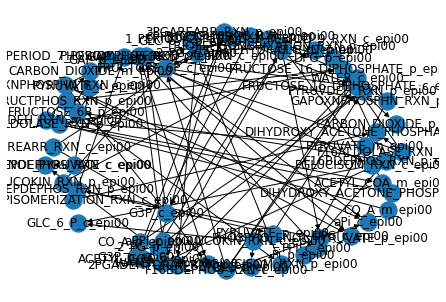

In [ ]:
glayout=nx.spring_layout(rgraph)
nx.draw(rgraph,glayout)
temp=nx.draw_networkx_labels(rgraph, glayout)

/Users/user/opt/anaconda3/lib/python3.9/site-packages/networkx/drawing/layout.py:727: RuntimeWarning: divide by zero encountered in true_divide
  costargs = (np, 1 / (dist_mtx + np.eye(dist_mtx.shape[0]) * 1e-3), meanwt, dim)


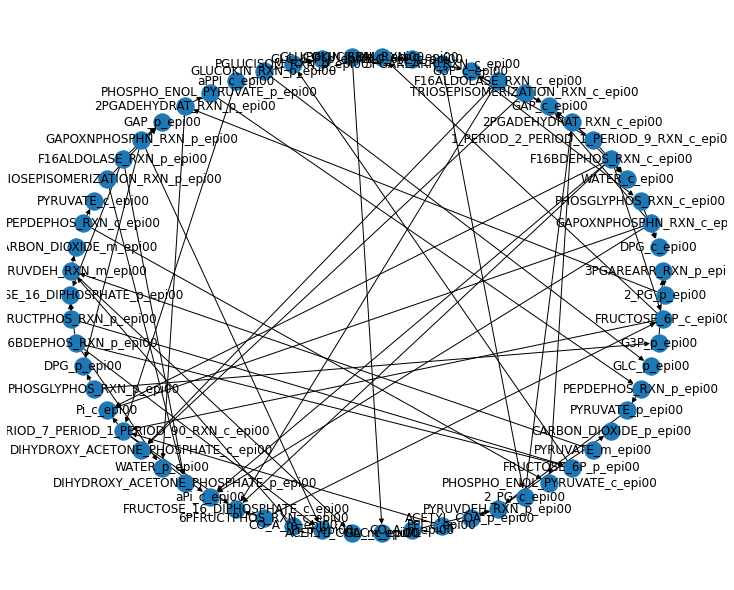

In [ ]:
plt.figure(figsize=(10,8))
glayout=nx.kamada_kawai_layout(rgraph)
nx.draw(rgraph,glayout)
temp=nx.draw_networkx_labels(rgraph, glayout)

In [ ]:
glycolysis_rxns=list(set(['_'.join(rxn.id.split('_')[:-2]) for rxn in rmodel.reactions if 'glycolysis' in str(rxn.notes)]))
other_rxns = ['SUCROSE_SYNTHASE_RXN','3_PERIOD_2_PERIOD_1_PERIOD_48_RXN','FRUCTOKINASE_RXN']
cell='end00'
comps = ['_c_','_p_','_m_','_x_']
exclmets = ['PROTON_','ATP_','ADP_','NADH_','NADPH_','NAD_','NADP_','WATER_','Pi_','PPI_']
inrxns=[x+y+z for x in glycolysis_rxns+other_rxns for y in comps for z in [cell]]
rdict=cobraSysToGraph(rmodel,sol,rxnsin=inrxns,exclmets=exclmets,dictout=1)

In [ ]:
temp=mapDict(rdict,rmodel,weight_mult=10,rxnsin=inrxns)

In [ ]:
count_carbon(rmodel.metabolites[0])

1

In [ ]:
def count_carbon(met):
    carbons=0
    metformula=met.formula
    if metformula and 'C' in metformula:
        formula_nondigits=[x for x in range(len(metformula)) if not metformula[x].isdigit()]
        cind = metformula.index('C')
        cnext = [x for x in formula_nondigits if x>cind]
        if not cnext:
            carbons = int(metformula[(cind+1):])
        elif cnext[0]==cind+1:
            carbons = 1
        else:
            carbons = int(metformula[(cind+1):(cnext[0])])
    return carbons

In [ ]:
cell = '_epi00'
for rxn in rmodel.reactions:
    if cell in rxn.id and any([count_carbon(met)==6 for met in rxn.metabolites]) and any([count_carbon(met)==3 for met in rxn.metabolites]):
        print(rxn.id,rxn.reaction)

F16ALDOLASE_RXN_p_epi00 FRUCTOSE_16_DIPHOSPHATE_p_epi00 <=> DIHYDROXY_ACETONE_PHOSPHATE_p_epi00 + GAP_p_epi00
F16ALDOLASE_RXN_c_epi00 FRUCTOSE_16_DIPHOSPHATE_c_epi00 <=> DIHYDROXY_ACETONE_PHOSPHATE_c_epi00 + GAP_c_epi00
ACETOOHBUTSYN_RXN_p_epi00 2_OXOBUTANOATE_p_epi00 + PROTON_p_epi00 + PYRUVATE_p_epi00 --> 2_ACETO_2_HYDROXY_BUTYRATE_p_epi00 + CARBON_DIOXIDE_p_epi00
RXN_9523_p_epi00 Hexanoyl_ACPs_p_epi00 + MALONYL_ACP_p_epi00 + PROTON_p_epi00 --> 3_Oxo_octanoyl_ACPs_p_epi00 + ACP_p_epi00 + CARBON_DIOXIDE_p_epi00
RXN_9516_p_epi00 Butanoyl_ACPs_p_epi00 + MALONYL_ACP_p_epi00 + PROTON_p_epi00 --> 3_oxo_hexanoyl_ACPs_p_epi00 + ACP_p_epi00 + CARBON_DIOXIDE_p_epi00
Biomass_tx_epi00 0.2326035201 pALA_b_epi00 + 0.1771733159 pARG_b_epi00 + 0.1447158566 pASN_b_epi00 + 0.3855539754 pASP_b_epi00 + 0.1325494187 pGLN_b_epi00 + 0.2261465373 pGLU_b_epi00 + 0.2309411553 pGLY_b_epi00 + 0.1673732646 pHIS_b_epi00 + 0.1454255314 pILE_b_epi00 + 0.0053400685 pLEU_b_epi00 + 0.3415370304 pLYS_b_epi00 + 0.142032

In [ ]:
metroot='_b_epi00'
for met in rmodel.metabolites:
    if metroot in met.id:
        for rxn in met.reactions:
            if sol[rxn.id]*rxn.get_coefficient(met.id)>0 and not 'Transfer' in rxn.id:
                print(round(sol[rxn.id]*rxn.get_coefficient(met.id),4),rxn.id, rxn.reaction)

0.0003 pGLN_biomass_epi00 GLN_tRNAs_c_epi00 + 2.0 PROTON_c_epi00 + pGLN_b_epi00 <-- Charged_GLN_tRNAs_c_epi00 + Protein_polymerisation_cost_c_epi00 + Protein_processing_cost_c_epi00 + Protein_tranlocation_cost_c_epi00 + WATER_c_epi00
0.0004 pVAL_biomass_epi00 2.0 PROTON_c_epi00 + VAL_tRNAs_c_epi00 + pVAL_b_epi00 <-- Charged_VAL_tRNAs_c_epi00 + Protein_polymerisation_cost_c_epi00 + Protein_processing_cost_c_epi00 + Protein_tranlocation_cost_c_epi00 + WATER_c_epi00
0.0005 pPHE_biomass_epi00 PHE_tRNAs_c_epi00 + 2.0 PROTON_c_epi00 + pPHE_b_epi00 <-- Charged_PHE_tRNAs_c_epi00 + Protein_polymerisation_cost_c_epi00 + Protein_processing_cost_c_epi00 + Protein_tranlocation_cost_c_epi00 + WATER_c_epi00
0.0005 pTYR_biomass_epi00 2.0 PROTON_c_epi00 + TYR_tRNAs_c_epi00 + pTYR_b_epi00 <-- Charged_TYR_tRNAs_c_epi00 + Protein_polymerisation_cost_c_epi00 + Protein_processing_cost_c_epi00 + Protein_tranlocation_cost_c_epi00 + WATER_c_epi00
0.4743 Cellulose_biomass_epi00 Cellulose_b_epi00 <-- CELLULOSE_c

In [169]:
metroot='PROTON'
prot_dict={}
for met in rmodel.metabolites:
    if metroot in met.id:
        for rxn in met.reactions:
            if (sol[rxn.id]*rxn.get_coefficient(met.id) or sol2[rxn.id]*rxn.get_coefficient(met.id)) and not 'Transfer' in rxn.id and not (any([metroot in x.id for x in rxn.reactants]) and any([metroot in x.id for x in rxn.products])):
                rxnroot = '_'.join(rxn.id.split('_')[:-2])
                if rxnroot not in list(prot_dict.keys()):
                    prot_dict[rxnroot]=0
                    prot_dict[rxnroot+'2']=0
                prot_dict[rxnroot]+=sol[rxn.id]*rxn.get_coefficient(met.id)
                prot_dict[rxnroot+'2']+=sol2[rxn.id]*rxn.get_coefficient(met.id)
                # print(round(sol[rxn.id]*rxn.get_coefficient(met.id),4),round(sol2[rxn.id]*rxn.get_coefficient(met.id),4),rxn.id, rxn.reaction)

In [215]:
for key in list(prot_dict.keys()):
    if '2' not in key:
        # if prot_dict[key]!=prot_dict[key+'2'] and prot_dict[key]:
        #     print(abs(prot_dict[key]-prot_dict[key+'2']),key, prot_dict[key],prot_dict[key+'2'])
        if 1:#prot_dict[key]<0:
            print(prot_dict[key],prot_dict[key+'2'],key)
# t1=sorted(prot_dict.items(),key=lambda x:x[1],reverse=True)
# print(t1)

-0.1205811666834073 -0.1575738987516918 CIT_PROTON
-0.1271489103109619 -0.1271489103109619 RXN_9654
0.8010381349590598 0.8010381349590598 ACETYL_COA_CARBOXYLTRANSFER_RXN
-1.061659938772762 -1.3769262592069529 PEPDEPHOS_RXN
-0.0006240638547407322 -0.000748828238323868 GLUC1PADENYLTRANS_RXN
-0.1271489103109619 -0.1271489103109619 RXN_9659
0.001109446852872413 0.0013312502014646544 GLYCOGENSYN_RXN
0.4461443883653964 0.4463689417322799 6PGLUCONOLACT_RXN
-0.1271489103109619 -0.1271489103109619 RXN_9661
0.001460162960138655 0.0017520823370881684 PRTRANS_RXN
0.0020217640986535225 0.002425960159045156 PRPPSYN_RXN
-0.1271489103109619 -0.1271489103109619 RXN_9540
-0.1271489103109619 -0.1271489103109619 RXN_9536
-0.1271489103109619 -0.1271489103109619 RXN_9651
-0.0022464045540594693 -0.0026955112878279514 IGPSYN_RXN
0.4461443883653964 0.4463689417322799 GLU6PDEHYDROG_RXN
-0.023678462681512177 -0.027811670726196717 ACETOLACTREDUCTOISOM_RXN
-0.1271489103109619 -0.1271489103109619 RXN_9657
-0.127148

In [216]:
key_ss_dict={}
for key in list(prot_dict.keys()):
    key_ss_dict=''
    for rxn in rmodel.reactions:
        if key in rxn.id and 'SUBSYSTEM' in str(rxn.notes):
            key_ss_dict[key]=rxn.notes['SUBSYSTEM']
print(key_ss_dict)


TypeError: 'str' object does not support item assignment

In [153]:
rmodel.reactions.H_tx_epi00.lower_bound=0
rmodel.reactions.NITRATE_c_xy_per00.lower_bound=1.1259*.3
sol2=rmodel.optimize()
rmodel.reactions.H_tx_epi00.lower_bound=-1000
rmodel.reactions.NITRATE_c_xy_per00.lower_bound=1.1259*.3
sol3=rmodel.optimize()

In [232]:
# rmodel.reactions.NITRATE_c_xy_per00.lower_bound=0
rmodel.objective = pfbaobj
# rmodel.reactions.NITRATE_c_xy_per00.lower_bound=1.1259*.19
rxn=Reaction('Dummy_lact_dehydrog_cor00')
rmodel.add_reaction(rxn)
lrxn=rmodel.reactions.L_LACTATEDEHYDROG_RXN_c_cor00
for met in lrxn.metabolites:
    if 'PROTON' not in met.id:
        rxn.add_metabolites({met.id:lrxn.get_coefficient(met.id)})
rxn.upper_bound=1000
rxn.lower_bound=-1000
for rxn in rmodel.reactions:
    if 'L_LACTATEDEHYDROG_RXN_c' in rxn.id:
        rxn.upper_bound=0
        rxn.lower_bound=0
# rmodel.reactions.CO2_tx_epi00.upper_bound=-1000
sol3=rmodel.optimize()

In [250]:
for rxn in rmodel.reactions:
    if 'L_LACTATEDEHYDROG_RXN_c' in rxn.id:
        rxn.upper_bound=1000
        rxn.lower_bound=-1000
    if 'Dummy_lact_dehydrog_cor00' in rxn.id:
        rxn.upper_bound=0
        rxn.lower_bound=-0
sol4 = rmodel.optimize()
print(sol['Phloem_carbon_import'],sol2['Phloem_carbon_import'],sol3['Phloem_carbon_import'],sol4['Phloem_carbon_import'])
# rmodel.reactions.carb

11.06022137306099 11.7931460439315 10.635930517265118 15.322438291907746


In [18]:
for rxn in rmodel.reactions:
    if rxn.id not in list(sol.fluxes.index):
        if rxn.boundary and (sol4[rxn.id]) and not '_b_' in rxn.id and not 'TotalSoluteConstraint' in rxn.id:
            print(0,0,0,round(sol4[rxn.id],4),rxn.id ,rxn.reaction)
    elif rxn.boundary and (sol[rxn.id] or sol2[rxn.id] or sol3[rxn.id] or sol4[rxn.id]) and not '_b_' in rxn.id and not 'TotalSoluteConstraint' in rxn.id:
        print(round(sol[rxn.id],4),round(sol2[rxn.id],4),round(sol3[rxn.id],4),round(sol4[rxn.id],4),rxn.id ,rxn.reaction)

NameError: name 'sol2' is not defined

In [44]:
exp_mets = {}
exbit='EX_X_'
for rxn in rmodel.reactions:
    if rxn.boundary and (sol[rxn.id]) and not '_b_' in rxn.id and not 'TotalSoluteConstraint' in rxn.id:
        rxnroot = '_'.join(rxn.id.split('_')[:-1])
        if exbit in rxnroot:
            rxnroot = '_'.join(rxnroot.split('_')[2:])
        exp_mets[rxnroot]=sol[rxn.id]
        print(round(sol[rxn.id],4),rxn.id ,rxn.reaction)
import matplotlib.pyplot as plt
plt.bar(range(len(exp_mets)),exp_mets.values())
t1=plt.xticks(range(len(exp_mets)),exp_mets.keys(),rotation=90)


In [48]:
import matplotlib.pyplot as plt
import numpy as np
def plot_bdry(it=1,leg='',tot_num=1,rxns=[]):
    exp_mets = {}
    exbit='EX_X_'
    for rxn in rmodel.reactions:
        if (rxn.boundary and (sol[rxn.id]) and not '_b_' in rxn.id and not 'TotalSoluteConstraint' in rxn.id) or rxn.id in rxns:
            rxns+=[rxn.id]
            rxnroot = '_'.join(rxn.id.split('_')[:-1])
            if exbit in rxnroot:
                rxnroot = '_'.join(rxnroot.split('_')[2:])
            exp_mets[rxnroot]=sol[rxn.id]
            # print(round(sol[rxn.id],4),rxn.id ,rxn.reaction)
    width = 0.95/(tot_num)
    plt.bar(np.arange(len(exp_mets))+it*width,exp_mets.values())
    t1=plt.xticks(range(len(exp_mets)),exp_mets.keys(),rotation=90)
    return rxns


In [26]:
for rxn in rmodel.metabolites.FRUCTOSE_16_DIPHOSPHATE_c_cor00.reactions:
    print(rxn.id, rxn.name,rxn.reaction)

F16ALDOLASE_RXN_c_cor00 F16ALDOLASE-RXN:Fructose-bisphosphate aldolase FRUCTOSE_16_DIPHOSPHATE_c_cor00 <=> DIHYDROXY_ACETONE_PHOSPHATE_c_cor00 + GAP_c_cor00
FRUCTOSE_16_DIPHOSPHATE_c_epi00_Transfer_epi00_to_cor00 FRUCTOSE_16_DIPHOSPHATE_c_epi00_Transfer_epi00_to_cor00 FRUCTOSE_16_DIPHOSPHATE_c_epi00 <=> FRUCTOSE_16_DIPHOSPHATE_c_cor00
FRUCTOSE_16_DIPHOSPHATE_c_cor00_Transfer_00_to_01 FRUCTOSE_16_DIPHOSPHATE_c_cor00_Transfer_00_to_01 FRUCTOSE_16_DIPHOSPHATE_c_cor00 <=> FRUCTOSE_16_DIPHOSPHATE_c_cor01
F16BDEPHOS_RXN_c_cor00 F16BDEPHOS-RXN:Fructose-bisphosphatase FRUCTOSE_16_DIPHOSPHATE_c_cor00 + 0.3 PROTON_c_cor00 + WATER_c_cor00 --> FRUCTOSE_6P_c_cor00 + 0.7 Pi_c_cor00 + 0.3 aPi_c_cor00
2_PERIOD_7_PERIOD_1_PERIOD_90_RXN_c_cor00 2.7.1.90-RXN:Diphosphate--fructose-6-phosphate 1-phosphotransferase FRUCTOSE_6P_c_cor00 + 0.65 PPI_c_cor00 + 0.35 aPPI_c_cor00 <=> FRUCTOSE_16_DIPHOSPHATE_c_cor00 + 1.05 PROTON_c_cor00 + 0.7 Pi_c_cor00 + 0.3 aPi_c_cor00
6PFRUCTPHOS_RXN_c_cor00 6PFRUCTPHOS-RXN:NIL

In [29]:
for rxn in rmodel.reactions:
    if 'LACTATE' in rxn.id:
        print(sol[rxn.id],fva_sol.minimum[rxn.id],fva_sol.maximum[rxn.id])

0.0 0.0 8.095735637425605e-09
0.0 0.0 8.095678211139656e-09
0.0 0.0 8.095302872490606e-09
0.0 0.0 8.096517067901488e-09
0.0 0.0 8.0968185767194e-09
0.0 0.0 8.095551515477148e-09
0.0 0.0 8.095154033216367e-09
0.0 0.0 8.09450435251031e-09
0.0 0.0 8.095308756672637e-09
0.0 0.0 8.09595967349308e-09
0.0 0.0 8.094635073341294e-09
0.0 -8.096442008894859e-09 0.0
0.0 -8.097425507891387e-09 0.0
0.0 -8.097401416051753e-09 0.0
0.0 -8.095728920576306e-09 0.0
0.0 -8.092677361570821e-09 0.0
0.0 -8.097601464363002e-09 0.0
0.0 -8.097609749402324e-09 0.0
0.0 -8.095789861209912e-09 0.0
0.0 0.0 8.097348301131882e-09
0.0 -8.095848241795878e-09 0.0
0.0 0.0 8.095008367329607e-09
0.0 -8.094885206588742e-09 0.0


In [129]:
for rxn in rmodel.reactions:
    if rxn.boundary and not '_b_' in rxn.id:
        print(sol2[rxn.id],rxn.id, rxn.lower_bound,rxn.upper_bound)

0.07852627291691847 Ca_tx_epi00 -1000.0 1000.0
0.0 Photon_tx_epi00 0.0 0.0
-1.3957602181284177 H_tx_epi00 -1000 1000.0
0.0 Sucrose_tx_epi00 -1000.0 1000.0
-1.423804880301892 H2O_tx_epi00 -1000.0 1000.0
-2.0439289553364883 CO2_tx_epi00 -1000.0 1000.0
1.028463558346517 O2_tx_epi00 -1000.0 1000.0
0.06357445515546294 Pi_tx_epi00 -1000.0 1000.0
0.9444382240057662 Mg_tx_epi00 -1000.0 1000.0
1.1258879399177 Nitrate_tx_epi00 -1000.0 1000.0
0.0 SO4_tx_epi00 -1000.0 1000.0
0.0 NH4_tx_epi00 0.0 0.0
0.0 K_tx_epi00 -1000.0 1000.0
0.0 unlProtHYPO_c_epi00 0.0 0
0.0 GLC_tx_epi00 -1000.0 1000.0
0.0 Cl_tx_epi00 0.0 1000.0
0.0 L_LACTATE_tx_epi00 0.0 1000.0
0.46705268440099 TotalSoluteConstraint_epi00 0.46705268440099 0.46705268440099
0.0 CO2_tx_cor00 -1000.0 1000.0
0.0 O2_tx_cor00 -1000.0 1000.0
0.0 unlProtHYPO_c_cor00 0.0 0
0.44689213687289 TotalSoluteConstraint_cor00 0.44689213687289 0.44689213687289
0.0 CO2_tx_cor01 -1000.0 1000.0
0.0 O2_tx_cor01 -1000.0 1000.0
0.0 unlProtHYPO_c_cor01 0.0 0
0.46755690

In [120]:
rmodel.reactions.EX_X_PROTON_xy_per00

Reaction identifier,EX_X_PROTON_xy_per00
Name,
Memory address,0x07f9264660eb0
Stoichiometry,PROTON_xy_per00 --> -->
GPR,
Lower bound,0.0
Upper bound,1000.0


In [137]:
sol['CO2_tx_epi00']

-2.0439289553364968

In [136]:
metroot='PROTON_c_epi00'
for met in rmodel.metabolites:
    if metroot in met.id:
        for rxn in met.reactions:
            if sol[rxn.id]*rxn.get_coefficient(met.id)<0 and not 'Transfer' in rxn.id:
                print(round(sol[rxn.id]*rxn.get_coefficient(met.id),4),rxn.id, rxn.reaction)

-0.0067 G6P_Pi_pc_epi00 GLC_6_P_p_epi00 + 0.7 Pi_c_epi00 + 0.3 aPi_c_epi00 <=> GLC_6_P_c_epi00 + 0.3 PROTON_c_epi00 + Pi_p_epi00
-0.0009 ASPARTATE_TRNA_LIGASE_RXN_c_epi00 ASP_tRNAs_c_epi00 + 0.65 ATP_c_epi00 + L_ASPARTATE_c_epi00 + PROTON_c_epi00 + 0.35 aATP_c_epi00 --> AMP_c_epi00 + Charged_ASP_tRNAs_c_epi00 + 0.65 PPI_c_epi00 + 0.35 aPPI_c_epi00
-0.0003 GLUTAMINE_TRNA_LIGASE_RXN_c_epi00 0.65 ATP_c_epi00 + GLN_c_epi00 + GLN_tRNAs_c_epi00 + PROTON_c_epi00 + 0.35 aATP_c_epi00 --> AMP_c_epi00 + Charged_GLN_tRNAs_c_epi00 + 0.65 PPI_c_epi00 + 0.35 aPPI_c_epi00
-0.4054 H_mc_epi00 PROTON_c_epi00 --> PROTON_m_epi00
-0.0005 THREONINE_TRNA_LIGASE_RXN_c_epi00 0.65 ATP_c_epi00 + PROTON_c_epi00 + THR_c_epi00 + THR_tRNAs_c_epi00 + 0.35 aATP_c_epi00 --> AMP_c_epi00 + Charged_THR_tRNAs_c_epi00 + 0.65 PPI_c_epi00 + 0.35 aPPI_c_epi00
-0.0 LEUCINE_TRNA_LIGASE_RXN_c_epi00 0.65 ATP_c_epi00 + LEU_c_epi00 + LEU_tRNAs_c_epi00 + PROTON_c_epi00 + 0.35 aATP_c_epi00 --> AMP_c_epi00 + Charged_LEU_tRNAs_c_epi00 + 

['1_ACYLGLYCEROL_3_P_ACYLTRANSFER_RXN_p_per00']


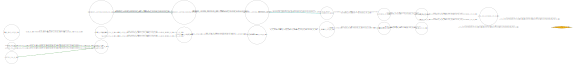

In [ ]:
from analysis import *
mapSource(rmodel,sol,'L_PHOSPHATIDATE_p_per00',7)

In [ ]:
glyc_rxns = ['SUCROSE_SYNTHASE_RXN_c_cor03','3_PERIOD_2_PERIOD_1_PERIOD_48_RXN_v_cor02','CELLULOSE_SYNTHASE_UDP_FORMING_RXN_c_epi00','FRUCTOKINASE_RXN_c_epi00','2_PERIOD_7_PERIOD_1_PERIOD_90_RXN_c_cor06','F16ALDOLASE_RXN_c_per00','3PGAREARR_RXN_p_cor00','2PGADEHYDRAT_RXN_p_cor06','PEPDEPHOS_RXN_c_cor00','PYRUVDEH_RXN_m_epi00','L_LACTATEDEHYDROG_RXN_c_end00','GLYC3PDEHYDROGBIOSYN_RXN_c_epi00','ACETYL_COA_CARBOXYLTRANSFER_RXN_p_epi00','2_PERIOD_3_PERIOD_1_PERIOD_180_RXN_p_epi00','CITSYN_RXN_m_epi00']
glyc_rxns =['_'.join(x.split('_')[:-2]) for x in glyc_rxns]
cells = [rxn.id.split('_')[-1] for rxn in rmodel.reactions if 'CELLULOSE_SYNTHASE_UDP_FORMING_RXN_c' in rxn.id]
glyc_dict={}
for cell in cells:
    glyc_dict[cell]={}
    for rxn in glyc_rxns:
        glyc_dict[cell][rxn]=sum([sol[x.id] for x in rmodel.reactions if cell in x.id and rxn in x.id])
temp=pd.DataFrame(glyc_dict)
temp1=[x for y in temp.values for x in y]

In [ ]:
# temp1=[x for y in temp.values for x in y]
print(max(temp1),min(temp1))

2.337985381696488 0.0


In [ ]:
temp=pd.DataFrame(glyc_dict)
print(temp)

                                       epi00     cor00     cor01     cor02  \
SUCROSE_SYNTHASE_RXN                0.000000  0.453812  0.432043  0.406023   
3_PERIOD_2_PERIOD_1_PERIOD_48_RXN   0.000000  0.000000  0.215882  0.211541   
CELLULOSE_SYNTHASE_UDP_FORMING_RXN  0.540016  0.453812  0.432043  0.406023   
2_PERIOD_7_PERIOD_1_PERIOD_90_RXN   0.548009  0.000000  0.000000  0.000000   
F16ALDOLASE_RXN                     0.000000  0.186483  0.000000  0.000000   
3PGAREARR_RXN                       0.018468  0.051938  0.049484  0.426013   
2PGADEHYDRAT_RXN                    0.340153  0.051938  0.049484  0.046470   
PEPDEPHOS_RXN                       0.013975  0.130513  0.179715  0.046470   
PYRUVDEH_RXN                        0.344990  0.118716  0.113105  0.106217   
L_LACTATEDEHYDROG_RXN               0.000000  0.000000  0.000000  0.000000   
GLYC3PDEHYDROGBIOSYN_RXN            0.000000  0.000000  0.000000  0.000000   
ACETYL_COA_CARBOXYLTRANSFER_RXN     0.108563  0.103877  0.098967

TypeError: '>' not supported between instances of 'dict' and 'dict'

In [ ]:
temp['epi00']

SUCROSE_SYNTHASE_RXN                  0.000000
3_PERIOD_2_PERIOD_1_PERIOD_48_RXN     0.000000
CELLULOSE_SYNTHASE_UDP_FORMING_RXN    0.540016
2_PERIOD_7_PERIOD_1_PERIOD_90_RXN     0.548009
F16ALDOLASE_RXN                       0.000000
3PGAREARR_RXN                         0.018468
2PGADEHYDRAT_RXN                      0.340153
PEPDEPHOS_RXN                         0.013975
PYRUVDEH_RXN                          0.344990
L_LACTATEDEHYDROG_RXN                 0.000000
GLYC3PDEHYDROGBIOSYN_RXN              0.000000
ACETYL_COA_CARBOXYLTRANSFER_RXN       0.108563
Name: epi00, dtype: float64

In [ ]:
glyc_mets=['SUCROSE','GLC_','FRU','UDP_GLUCOSE','FRUCTOSE_16_DIPHOSPHATE','GAP_','DIHYDROXY_ACETONE_PHOSPHATE_','PHOSPHO_ENOL_PYRUVATE_','PYRUVATE_','ACETYL_COA_']
for met in rmodel.metabolites:
    if 'c_epi00' in met.id and any([met.id[:len(x)]==x for x in glyc_mets]):

        count=0
        # print(met.id)
        for rxn in met.reactions:
            if 'Transfer' in rxn.id and sol[rxn.id]!=0:
                count+=sol[rxn.id]*rxn.get_coefficient(met.id)
                # print('    ',rxn.id, count)
        print(met.id, count)

UDP_GLUCOSE_c_epi00 0
GLC_6_P_c_epi00 -0.6670710836687102
SUCROSE_6P_c_epi00 0
FRUCTOSE_16_DIPHOSPHATE_c_epi00 -0.548008650638
GAP_c_epi00 -0.018468185685041476
SUCROSE_c_epi00 0
PYRUVATE_c_epi00 0.3309989772407632
GLC_c_epi00 -0.06573182914624287
FRU_c_epi00 2.337985381696488
FRUCTOSE_6P_c_epi00 -0.5607881815110285
GLC_1_P_c_epi00 0
ACETYL_COA_c_epi00 0
DIHYDROXY_ACETONE_PHOSPHATE_c_epi00 0
PHOSPHO_ENOL_PYRUVATE_c_epi00 -0.3216844252529757


In [ ]:
tempmax['cor06']

SUCROSE_SYNTHASE_RXN                  0.3006
3_PERIOD_2_PERIOD_1_PERIOD_48_RXN     0.2159
CELLULOSE_SYNTHASE_UDP_FORMING_RXN    0.3006
FRUCTOKINASE_RXN                      0.0000
2_PERIOD_7_PERIOD_1_PERIOD_90_RXN     0.0880
F16ALDOLASE_RXN                       0.5703
3PGAREARR_RXN                         0.8731
2PGADEHYDRAT_RXN                      0.8731
PEPDEPHOS_RXN                         0.4823
PYRUVDEH_RXN                          0.0787
L_LACTATEDEHYDROG_RXN                 0.5498
GLYC3PDEHYDROGBIOSYN_RXN              0.0636
ACETYL_COA_CARBOXYLTRANSFER_RXN       0.0688
Name: cor06, dtype: float64

In [ ]:
cells

['epi00',
 'cor00',
 'cor01',
 'cor02',
 'cor03',
 'cor04',
 'cor05',
 'cor06',
 'cor07',
 'end00',
 'per00']

In [ ]:
sum([temp[cell] for cell in cells[1:]])/(len(cells)-1)

SUCROSE_SYNTHASE_RXN                  0.233799
3_PERIOD_2_PERIOD_1_PERIOD_48_RXN     0.064656
CELLULOSE_SYNTHASE_UDP_FORMING_RXN    0.316860
FRUCTOKINASE_RXN                      0.000000
2_PERIOD_7_PERIOD_1_PERIOD_90_RXN     0.002230
F16ALDOLASE_RXN                       0.057031
3PGAREARR_RXN                         0.120728
2PGADEHYDRAT_RXN                      0.088560
PEPDEPHOS_RXN                         0.120728
PYRUVDEH_RXN                          0.089312
L_LACTATEDEHYDROG_RXN                 0.054980
GLYC3PDEHYDROGBIOSYN_RXN              0.006357
ACETYL_COA_CARBOXYLTRANSFER_RXN       0.078148
dtype: float64

In [ ]:
glyc_mets=['SUCROSE','GLC_','FRU','UDP_GLUCOSE','FRUCTOSE_16_DIPHOSPHATE','GAP_','DIHYDROXY_ACETONE_PHOSPHATE_','PHOSPHO_ENOL_PYRUVATE_','PYRUVATE_','ACETYL_COA_']
count_dict={}
for metr in glyc_mets:
    for met in rmodel.metabolites:
        if met.id[:len(metr)]==metr and '_c_' in met.id:
            metd = '_'.join(met.id.split('_')[:-2])
            if metd not in list(count_dict.keys()):
                count_dict[metd]=0
            for rxn in met.reactions:
                if 'Transfer' in rxn.id and fva_sol.maximum[rxn.id]!=0:
                    count_dict[metd]+=fva_sol.maximum[rxn.id]*rxn.get_coefficient(met.id)/(len(cells)-1)
                    # print('    ',rxn.id, count)
print(count_dict)

{'SUCROSE_6P': 3.2311742677852644e-27, 'SUCROSE': 0.0, 'GLC_6_P': -2.7755575615628914e-17, 'GLC': -8.673617379884035e-19, 'GLC_1_P': 2.7755575615628914e-17, 'FRUCTOSE_16_DIPHOSPHATE': 0.0, 'FRU': -4.232725282417385e-17, 'FRUCTOSE_6P': 0.0, 'UDP_GLUCOSE': 0, 'GAP': -1.3877787807814457e-17, 'DIHYDROXY_ACETONE_PHOSPHATE': 6.938893903907228e-18, 'PHOSPHO_ENOL_PYRUVATE': -2.7755575615628914e-17, 'PYRUVATE': 6.938893903907228e-18, 'ACETYL_COA': -3.2311742677852644e-27}


In [ ]:
met='D_6_P_GLUCONO_DELTA_LACTONE_p_cor05'
for rxn in rmodel.metabolites.get_by_id(met).reactions:
    if round(fva_sol.maximum[rxn.id],4)!=0:
        print(fva_sol.maximum[rxn.id]*rxn.get_coefficient(met),rxn.id)
        print('   ', rxn.reaction)

0.03708217914717009 GLU6PDEHYDROG_RXN_p_cor05
    GLC_6_P_p_cor05 + NADP_p_cor05 --> D_6_P_GLUCONO_DELTA_LACTONE_p_cor05 + NADPH_p_cor05 + PROTON_p_cor05
-0.03708217914719894 6PGLUCONOLACT_RXN_p_cor05
    D_6_P_GLUCONO_DELTA_LACTONE_p_cor05 + WATER_p_cor05 --> CPD_2961_p_cor05 + PROTON_p_cor05


In [ ]:
for rxn in glyc_rxns:
    if rxn+'_c_epi00' in rmodel.reactions:
        print(rmodel.reactions.get_by_id(rxn+'_c_epi00').reaction)
    elif rxn+'_p_epi00' in rmodel.reactions:
        print(rmodel.reactions.get_by_id(rxn+'_p_epi00').reaction)
    elif rxn+'_m_epi00' in rmodel.reactions:
        print(rmodel.reactions.get_by_id(rxn+'_m_epi00').reaction)

SUCROSE_c_epi00 + 0.5 UDP_c_epi00 + 0.5 aUDP_c_epi00 --> FRU_c_epi00 + 0.5 PROTON_c_epi00 + UDP_GLUCOSE_c_epi00
SUCROSE_c_epi00 + WATER_c_epi00 --> FRU_c_epi00 + GLC_c_epi00
0.5 PROTON_c_epi00 + UDP_GLUCOSE_c_epi00 --> CELLULOSE_c_epi00 + 0.5 UDP_c_epi00 + 0.5 aUDP_c_epi00
FRUCTOSE_6P_c_epi00 + 0.65 PPI_c_epi00 + 0.35 aPPI_c_epi00 <=> FRUCTOSE_16_DIPHOSPHATE_c_epi00 + 1.05 PROTON_c_epi00 + 0.7 Pi_c_epi00 + 0.3 aPi_c_epi00
FRUCTOSE_16_DIPHOSPHATE_c_epi00 <=> DIHYDROXY_ACETONE_PHOSPHATE_c_epi00 + GAP_c_epi00
G3P_c_epi00 <=> 2_PG_c_epi00
2_PG_c_epi00 <=> PHOSPHO_ENOL_PYRUVATE_c_epi00 + WATER_c_epi00
0.5 ADP_c_epi00 + PHOSPHO_ENOL_PYRUVATE_c_epi00 + 0.85 PROTON_c_epi00 + 0.5 aADP_c_epi00 --> 0.65 ATP_c_epi00 + PYRUVATE_c_epi00 + 0.35 aATP_c_epi00
CO_A_p_epi00 + NAD_p_epi00 + PYRUVATE_p_epi00 --> ACETYL_COA_p_epi00 + CARBON_DIOXIDE_p_epi00 + NADH_p_epi00
NADH_c_epi00 + PROTON_c_epi00 + PYRUVATE_c_epi00 --> L_LACTATE_c_epi00 + NAD_c_epi00
DIHYDROXY_ACETONE_PHOSPHATE_c_epi00 + NADH_c_epi00 + 

In [ ]:
met='CELLULOSE_c_cor00'
for rxn in rmodel.metabolites.get_by_id(met).reactions:
    if round(sol[rxn.id],4)!=0:
        print(sol[rxn.id]*rxn.get_coefficient(met),rxn.id)
        print('   ', rxn.reaction)

-0.453811537009589 Cellulose_biomass_cor00
    Cellulose_b_cor00 <-- CELLULOSE_c_cor00
0.453811537009589 CELLULOSE_SYNTHASE_UDP_FORMING_RXN_c_cor00
    0.5 PROTON_c_cor00 + UDP_GLUCOSE_c_cor00 --> CELLULOSE_c_cor00 + 0.5 UDP_c_cor00 + 0.5 aUDP_c_cor00


In [ ]:
met='GDP_D_GLUCOSE_c_epi00'
for rxn in rmodel.metabolites.get_by_id(met).reactions:
    if round(fva_sol.maximum[rxn.id],4)!=0:
        print(fva_sol.maximum[rxn.id]*rxn.get_coefficient(met),rxn.id)
        print('   ', rxn.reaction)

In [ ]:
tmax

0.9079789052823972

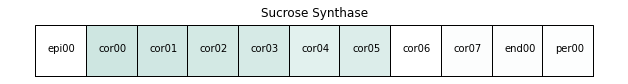

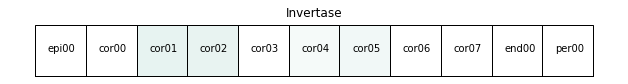

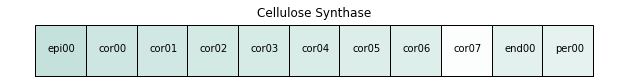

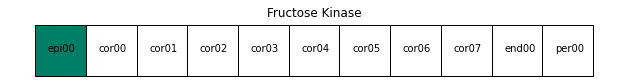

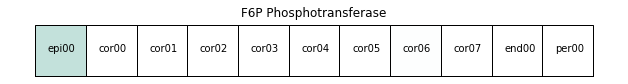

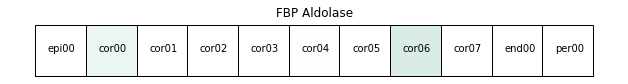

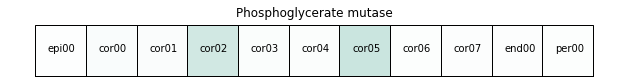

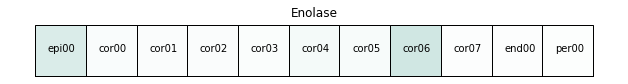

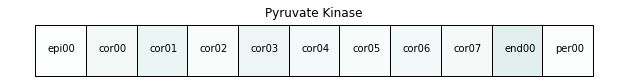

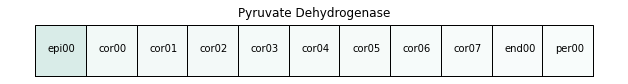

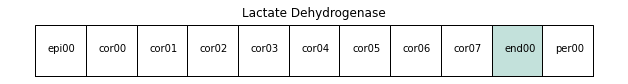

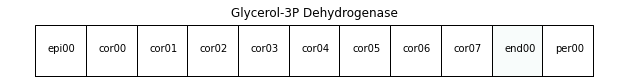

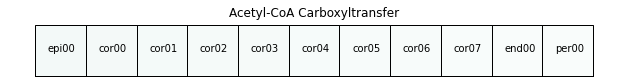

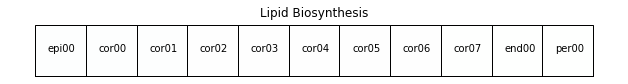

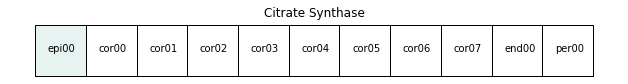

In [ ]:
import matplotlib.pyplot as plt

glyc_rxn_dict = {'SUCROSE_SYNTHASE_RXN':'Sucrose Synthase','3_PERIOD_2_PERIOD_1_PERIOD_48_RXN':'Invertase',
'CELLULOSE_SYNTHASE_UDP_FORMING_RXN':'Cellulose Synthase','FRUCTOKINASE_RXN':'Fructose Kinase','2_PERIOD_7_PERIOD_1_PERIOD_90_RXN':'F6P Phosphotransferase','F16ALDOLASE_RXN':'FBP Aldolase','3PGAREARR_RXN':'Phosphoglycerate mutase','2PGADEHYDRAT_RXN':'Enolase','PEPDEPHOS_RXN':'Pyruvate Kinase','PYRUVDEH_RXN':'Pyruvate Dehydrogenase','L_LACTATEDEHYDROG_RXN':'Lactate Dehydrogenase','GLYC3PDEHYDROGBIOSYN_RXN':'Glycerol-3P Dehydrogenase','ACETYL_COA_CARBOXYLTRANSFER_RXN':'Acetyl-CoA Carboxyltransfer','2_PERIOD_3_PERIOD_1_PERIOD_180_RXN':'Lipid Biosynthesis','CITSYN_RXN':'Citrate Synthase'}
temp1=[x for y in temp.values for x in y]
tmax=max(temp1)
tmin=min(temp1)
# plt.figure(figsize=(11,1))
# plt.bar(range(11),[1 for x in range(11)],color='white',width=1,edgecolor='black')
# plt.bar(range(11),[0.01 for x in range(11)],color='black',width=1)
# for i in range(11):
#     plt.text(i-0.25,0.5,cells[i])
# plt.axis('off')
for ii in temp.index:
    colors = [[1-abs(x)*y/255/tmax for y in [255, 128, 153]] for x in temp.loc[ii]]
    # print(colors,ii)
    plt.figure(figsize=(11,1))
    plt.bar(range(11),[1 for x in range(11)],color=colors,width=1,edgecolor='black')
    plt.bar(range(11),[0.01 for x in range(11)],color='black',width=1)
    plt.axis('off')
    for i in range(11):
        plt.text(i-0.25,0.5,cells[i])
    plt.title(glyc_rxn_dict[ii])
    # plt.axhline(0,color='black')


In [225]:
rmodel.reactions.L_LACTATEDEHYDROG_RXN_c_cor00.reaction

'NADH_c_cor00 + PROTON_c_cor00 + PYRUVATE_c_cor00 --> L_LACTATE_c_cor00 + NAD_c_cor00'

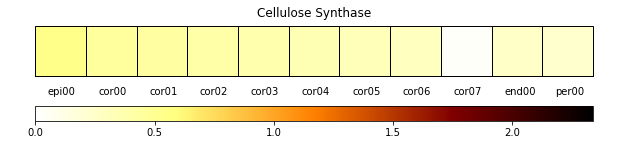

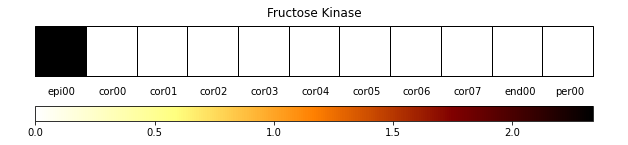

In [ ]:
from matplotlib.cm import ScalarMappable
for ii in temp.index[2:4]:
    colors = [[1-x*y/255/tmax for y in [255, 128, 153]] for x in temp.loc[ii]]
    cm = plt.get_cmap('afmhot').reversed()
    colors = [cm(x/tmax) for x in temp.loc[ii]]
    plt.figure(figsize=(11,1.8))
    plt.bar(range(11),[1 for x in range(11)],color=colors,width=1,edgecolor='black')
    plt.bar(range(11),[0.01 for x in range(11)],color='black',width=1)
    plt.axis('off')
    for i in range(11):
        plt.text(i-0.25,-0.35,cells[i])
    plt.title(glyc_rxn_dict[ii])
    sm = ScalarMappable(cmap=cm, norm=plt.Normalize(tmax,0,-1))
    sm.set_array([])
    cbar=plt.colorbar(sm,orientation='horizontal',pad=0.3,aspect=38)
    # cbar.set_label

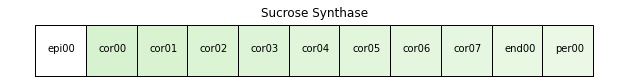

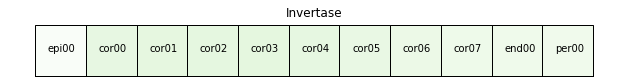

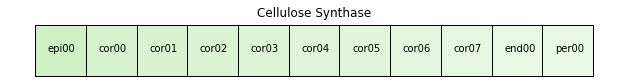

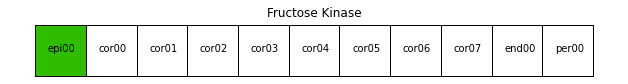

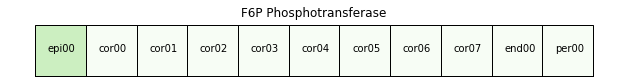

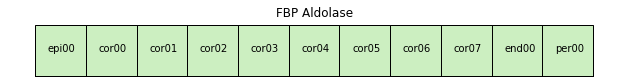

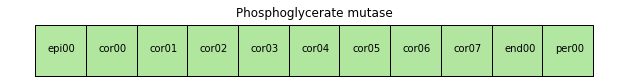

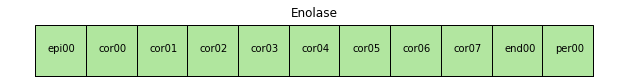

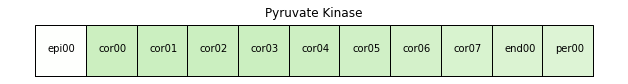

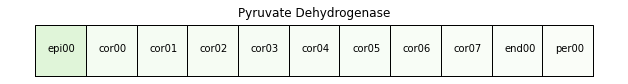

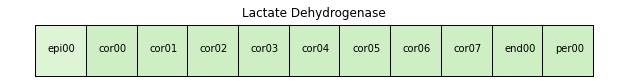

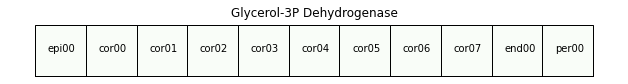

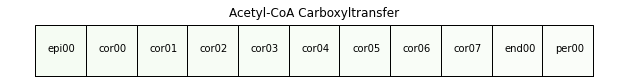

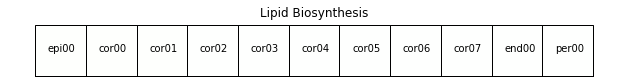

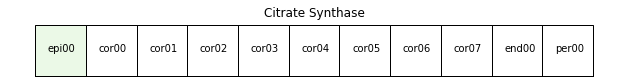

In [ ]:
import matplotlib.pyplot as plt

# glyc_rxns = ['SUCROSE_SYNTHASE_RXN_c_cor03','3_PERIOD_2_PERIOD_1_PERIOD_48_RXN_v_cor02','CELLULOSE_SYNTHASE_UDP_FORMING_RXN_c_epi00','2_PERIOD_7_PERIOD_1_PERIOD_90_RXN_c_cor06','F16ALDOLASE_RXN_c_per00','3PGAREARR_RXN_p_cor00','2PGADEHYDRAT_RXN_p_cor06','PEPDEPHOS_RXN_c_cor00','PYRUVDEH_RXN_m_epi00','L_LACTATEDEHYDROG_RXN_c_end00','GLYC3PDEHYDROGBIOSYN_RXN_c_epi00','ACETYL_COA_CARBOXYLTRANSFER_RXN_p_epi00']
# glyc_rxns =['_'.join(x.split('_')[:-2]) for x in glyc_rxns]
glyc_dict={}
for cell in cells:
    glyc_dict[cell]={}
    for rxn in glyc_rxns:
        glyc_dict[cell][rxn]=round(sum([fva_sol.maximum[x.id] for x in rmodel.reactions if cell in x.id and rxn in x.id]),4)
tempmax=pd.DataFrame(glyc_dict)
temp1max=[x for y in tempmax.values for x in y]


# glyc_rxn_dict = {'SUCROSE_SYNTHASE_RXN':'Sucrose Synthase','3_PERIOD_2_PERIOD_1_PERIOD_48_RXN':'Invertase',
# 'CELLULOSE_SYNTHASE_UDP_FORMING_RXN':'Cellulose Synthase','2_PERIOD_7_PERIOD_1_PERIOD_90_RXN':'F6P Phosphotransferase','F16ALDOLASE_RXN':'FBP Aldolase','3PGAREARR_RXN':'Phosphoglycerate mutase','2PGADEHYDRAT_RXN':'Enolase','PEPDEPHOS_RXN':'Pyruvate Kinase','PYRUVDEH_RXN':'Pyruvate Dehydrogenase','L_LACTATEDEHYDROG_RXN':'Lactate Dehydrogenase','GLYC3PDEHYDROGBIOSYN_RXN':'Glycerol-3P Dehydrogenase','ACETYL_COA_CARBOXYLTRANSFER_RXN':'Acetyl-CoA Carboxyltransfer'}
temp1max=[x for y in tempmax.values for x in y]
tmax=max(temp1max)
tmin=min(temp1max)
# plt.figure(figsize=(11,1))
# plt.bar(range(11),[1 for x in range(11)],color='white',width=1,edgecolor='black')
# plt.bar(range(11),[0.01 for x in range(11)],color='black',width=1)
# for i in range(11):
#     plt.text(i-0.25,0.5,cells[i])
# plt.axis('off')
for ii in tempmax.index:
    colorsmax = [[1-x*y/255/tmax for y in [208, 66, 255]] for x in tempmax.loc[ii]]
    plt.figure(figsize=(11,1))
    plt.bar(range(11),[1 for x in range(11)],color=colorsmax,width=1,edgecolor='black')
    plt.bar(range(11),[0.01 for x in range(11)],color='black',width=1)
    plt.axis('off')
    for i in range(11):
        plt.text(i-0.25,0.5,cells[i])
    plt.title(glyc_rxn_dict[ii])
    # plt.axhline(0,color='black')


In [ ]:
print(np.arange(0,1.1,0.1))
print([np.log((np.exp(1)-1)*x+1) for x in np.arange(0,1.1,0.1)])

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
[0.0, 0.1585650787404291, 0.29539452912034764, 0.4157352218436288, 0.5231371636115855, 0.6201145069582775, 0.7085130668623153, 0.7897280435776314, 0.8648397251631903, 0.9347016640011662, 1.0]


[0.2309666381522669, 0.19409751924721982, 0.1847733105218135, 0.17365269461077845, 0.161633875106929, 0.15021385799828912, 0.13857998289136014, 0.12857142857142856, 0.11822070145423437, 0.10945252352437981, 0.10068434559452523]


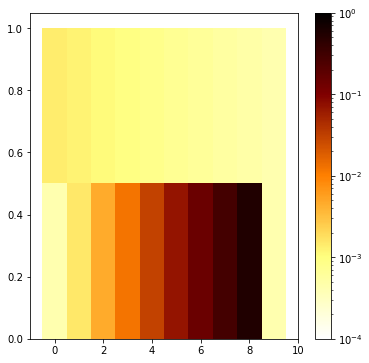

In [ ]:
cmo = plt.get_cmap('afmhot').reversed()
sm = ScalarMappable(cmap=cmo, norm=LogNorm(1e-4,1))
sm.set_array([])
cm=sm.get_cmap()
x=np.arange(0,1,0.1)
temp=plt.figure(figsize=(6,6))
# plt.scatter(x,x,c=x,norm=LogNorm(1e-4,tmax),cmap=cm)
colorsmin = [cm(np.log((np.exp(1)-1)*x/tmax+1)) for x in np.arange(0,tmax,tmax/10)]
colorsmax = [cm(np.log((np.exp(1)-1)*x/tmax+1)) for x in tempmax.loc[ii]]
plt.bar(range(10),[0.5 for x in range(10)],color=colorsmin[1:],width=1,edgecolor='none')
plt.bar(range(10),[0.5 for x in range(10)],bottom = [0.5 for x in range(10)],color=colorsmax[1:],width=1,edgecolor='none')
plt.colorbar(ScalarMappable(cmap=cmo, norm=LogNorm(1e-4,1)))
print([i/tmax for i in tempmax.loc[ii]])

In [ ]:
x=0.1
minlog=1e-2
scale_var=9
print(np.log10(x/minlog)/np.log10(tmax/minlog),tmax)
# (np.exp((x-minlog)/(tmax-minlog))-1)/(scale_var)

0.4221467458579496 2.338


/var/folders/rx/sg79_yds24z7clp5pp_fnpnh0000gp/T/ipykernel_16177/3920455553.py:6: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar=plt.colorbar(ScalarMappable(cmap=cmo, norm=SymLogNorm(minlog,vmin=-tmax,vmax=tmax)),orientation='horizontal',pad=0.3,aspect=35)


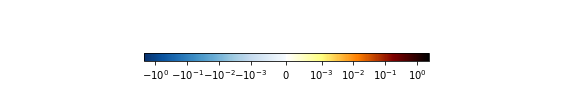

In [ ]:
plt.figure(figsize=(10,1))
plt.bar(range(1),[0 for x in range(1)],width=1,edgecolor='none')
plt.axis('off')
if log_on:
    # cbar=plt.colorbar(ScalarMappable(cmap=cmo, norm=LogNorm(minlog,tmax)),orientation='horizontal',pad=0.3,aspect=35)
    cbar=plt.colorbar(ScalarMappable(cmap=cmo, norm=SymLogNorm(minlog,vmin=-tmax,vmax=tmax)),orientation='horizontal',pad=0.3,aspect=35)
else:
    cbar=plt.colorbar(sm,orientation='horizontal',pad=0.3,aspect=35)
plt.savefig('Figures/barcode_colorbar.eps',bbox_inches='tight')

/var/folders/rx/sg79_yds24z7clp5pp_fnpnh0000gp/T/ipykernel_16177/3497015714.py:26: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar=plt.colorbar(ScalarMappable(cmap=cmo, norm=SymLogNorm(minlog,vmin=-tmax,vmax=tmax)),orientation='horizontal',pad=0.3,aspect=35)
/var/folders/rx/sg79_yds24z7clp5pp_fnpnh0000gp/T/ipykernel_16177/3497015714.py:62: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10,1))


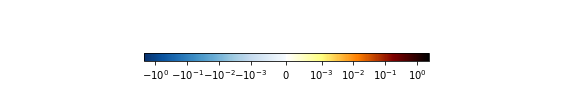

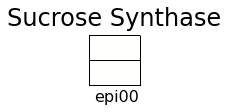

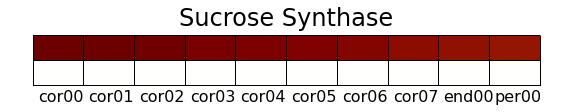

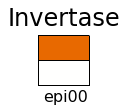

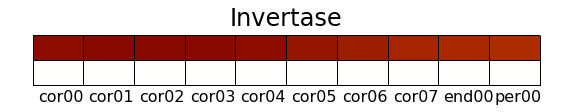

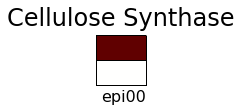

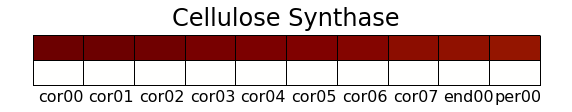

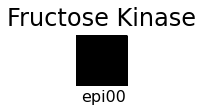

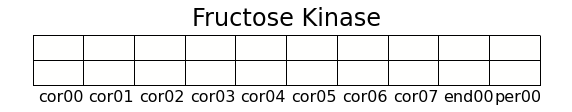

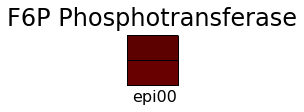

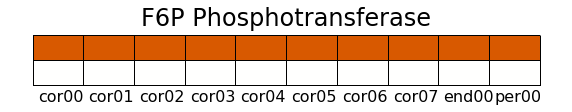

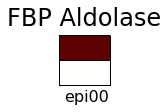

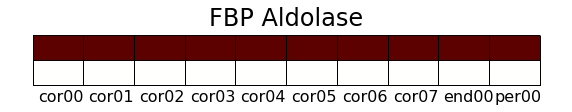

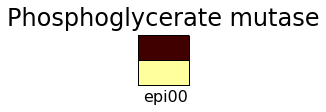

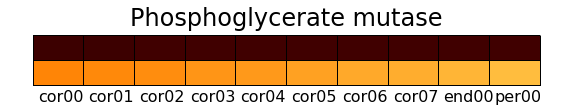

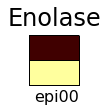

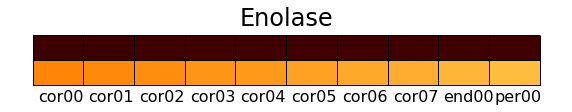

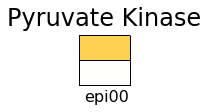

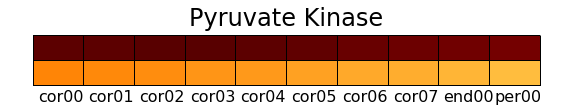

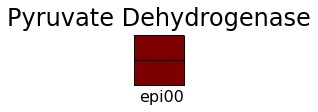

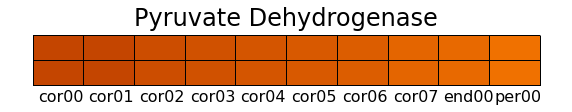

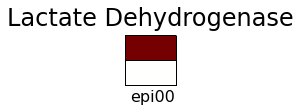

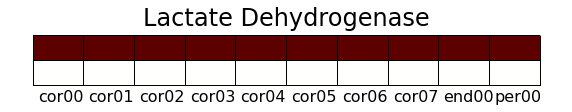

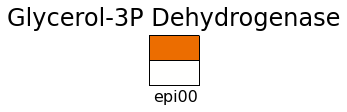

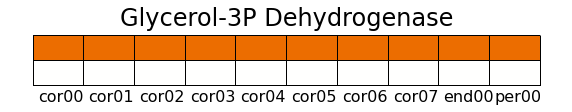

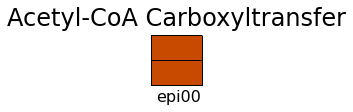

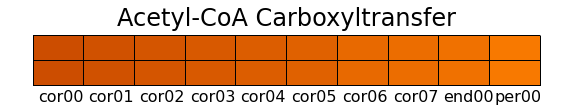

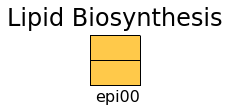

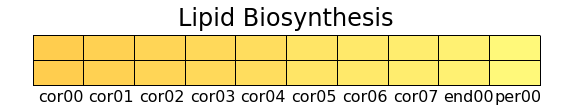

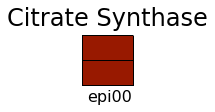

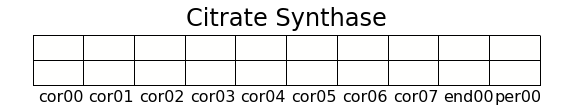

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
glyc_dict={}
for cell in cells:
    glyc_dict[cell]={}
    for rxn in glyc_rxns:
        glyc_dict[cell][rxn]=round(sum([fva_sol.minimum[x.id] for x in rmodel.reactions if cell in x.id and rxn in x.id]),4)
tempmin=pd.DataFrame(glyc_dict)
temp1min=[x for y in tempmin.values for x in y]
log_on=1
minlog=1e-3
cb_on=None
cmo = mymap# plt.get_cmap('afmhot').reversed()
if log_on:
    sm=ScalarMappable(cmap=cmo, norm=LogNorm(minlog,tmax))
else:
    sm = ScalarMappable(cmap=cmo, norm=plt.Normalize(0,tmax))
    sm.set_array([])
if not cb_on:
    plt.figure(figsize=(10,1))
    plt.bar(range(1),[0 for x in range(1)],width=1,edgecolor='none')
    plt.axis('off')
    if log_on:
        # cbar=plt.colorbar(ScalarMappable(cmap=cmo, norm=LogNorm(minlog,tmax)),orientation='horizontal',pad=0.3,aspect=35)
        cbar=plt.colorbar(ScalarMappable(cmap=cmo, norm=SymLogNorm(minlog,vmin=-tmax,vmax=tmax)),orientation='horizontal',pad=0.3,aspect=35)
    else:
        cbar=plt.colorbar(sm,orientation='horizontal',pad=0.3,aspect=35)
    plt.savefig('Figures/barcode_colorbar.eps',bbox_inches='tight')
for ii in tempmin.index:
    # colorsmax = [[1-x*y/255/tmax for y in [208, 66, 255]] for x in tempmax.loc[ii]]
    # colorsmin = [[1-x*y/255/tmax for y in [208, 66, 255]] for x in tempmin.loc[ii]]

    cm = sm.get_cmap()
    if log_on:
        colorsmax = [cm(0.5+np.log10(max(abs(x),minlog)/minlog)/np.log10(tmax/minlog)/2) if x>0 else cm(0.5) if abs(x)<minlog else cm(0.5-np.log10(max(abs(x),minlog)/minlog)/np.log10(tmax/minlog)/2) for x in tempmax.loc[ii]]
        colorsmin = [cm(0.5+np.log10(max(abs(x),minlog)/minlog)/np.log10(tmax/minlog)/2) if x>0 else cm(0.5) if abs(x)<minlog else cm(0.5-np.log10(max(abs(x),minlog)/minlog)/np.log10(tmax/minlog)/2) for x in tempmin.loc[ii]]
    else:
        colorsmax = [cm(x/tmax) for x in tempmax.loc[ii]]
        colorsmin = [cm(x/tmax) for x in tempmin.loc[ii]]

    # print(glyc_rxn_dict[ii],[x for x in tempmax.loc[ii]])
    # print([x for x in tempmin.loc[ii]])
    # plt.figure(figsize=(10,1))

    plt.figure(figsize=(1,1))
    plt.bar(range(1),[0.5 for x in range(1)],color=colorsmin[0],width=1,edgecolor='none')
    plt.bar(range(1),[0.5 for x in range(1)],bottom = [0.5 for x in range(1)],color=colorsmax[0],width=1,edgecolor='none')
    plt.bar(range(1),[0.02 for x in range(1)],color='black',width=1)
    plt.bar(range(1),[0.02 for x in range(1)],bottom = [0.49 for x in range(1)],color='black',width=1)
    plt.bar(range(1),[0.02 for x in range(1)],bottom = [0.99 for x in range(1)],color='black',width=1)
    plt.bar(np.arange(1)-0.5,[1 for x in range(1)],color='none',width=0.001,edgecolor='black')
    plt.bar(np.arange(1)+0.5,[1 for x in range(1)],color='none',width=0.001,edgecolor='black')
    plt.axis('off')
    for i in range(1):
        plt.text(i-0.4,-0.3,cells[i],fontsize=16)
    plt.title(glyc_rxn_dict[ii],fontsize=24)
    plt.savefig('Figures/barcode_epi'+glyc_rxn_dict[ii]+'.png',bbox_inches='tight')
    if cb_on:
        plt.figure(figsize=(10,1.8))
    else:
        plt.figure(figsize=(10,1))
    plt.bar(range(10),[0.5 for x in range(10)],color=colorsmin[1:],width=1,edgecolor='none')
    plt.bar(range(10),[0.5 for x in range(10)],bottom = [0.5 for x in range(10)],color=colorsmax[1:],width=1,edgecolor='none')
    plt.bar(range(10),[0.02 for x in range(10)],color='black',width=1)
    plt.bar(range(10),[0.02 for x in range(10)],bottom = [0.49 for x in range(10)],color='black',width=1)
    plt.bar(range(10),[0.02 for x in range(10)],bottom = [0.99 for x in range(10)],color='black',width=1)
    plt.bar(np.arange(10)-0.5,[1 for x in range(10)],color='none',width=0.0001,edgecolor='black')
    plt.bar(np.arange(10)+0.5,[1 for x in range(10)],color='none',width=0.0001,edgecolor='black')
    plt.axis('off')
    plt.title(glyc_rxn_dict[ii],fontsize=24)
    if cb_on:
        for i in range(1,11):
            plt.text((i-1)-0.25,-0.35,cells[i])
        if log_on:
            plt.colorbar(ScalarMappable(cmap=cmo, norm=LogNorm(minlog,tmax)))
        else:
            sm = ScalarMappable(cmap=cm, norm=plt.Normalize(0,tmax))
            sm.set_array([])
            cbar=plt.colorbar(sm,orientation='horizontal',pad=0.3,aspect=35)
    else:
        for i in range(1,11):
            plt.text((i-1)-0.4,-0.3,cells[i],fontsize=16)
    plt.savefig('Figures/barcode_'+glyc_rxn_dict[ii]+'.png',bbox_inches='tight')
    # plt.axhline(0,color='black')


In [ ]:
print(min([y for x in tempmin for y in tempmin[x] if y!=0]))
print(min([y for x in tempmax for y in tempmax[x] if y!=0]))

0.0045
0.0077


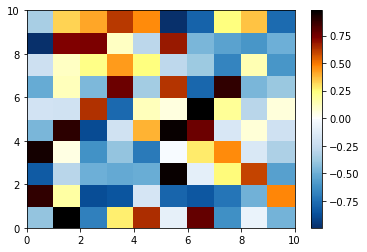

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.colors as mcolors
# colors.SymLogNorm
# viridis = mpl.colormaps['afmhot']
data=np.random.rand(10,10)*2-1
colors1 = plt.cm.afmhot_r(np.linspace(0., 1, 128))
colors2 = plt.cm.Blues_r(np.linspace(0, 1, 128))

# combine them and build a new colormap
colors = np.vstack((colors2, colors1))
mymap = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)

plt.pcolor(data, cmap=mymap)
plt.colorbar()
plt.show()

/var/folders/rx/sg79_yds24z7clp5pp_fnpnh0000gp/T/ipykernel_16177/3253910955.py:52: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar=plt.colorbar(ScalarMappable(cmap=cmo, norm=SymLogNorm(minlog,vmin=-tmax,vmax=tmax)),orientation='horizontal',pad=0.3,aspect=35)
/var/folders/rx/sg79_yds24z7clp5pp_fnpnh0000gp/T/ipykernel_16177/3253910955.py:84: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10,1))


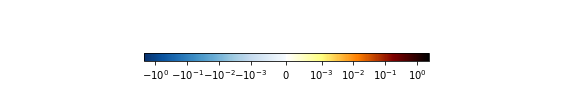

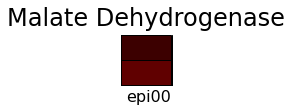

<Figure size 720x72 with 0 Axes>

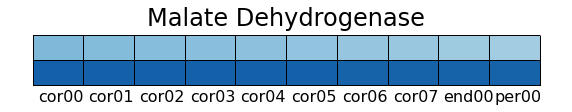

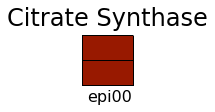

<Figure size 720x72 with 0 Axes>

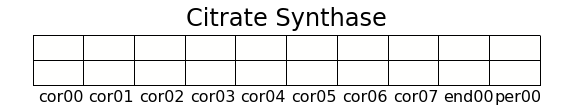

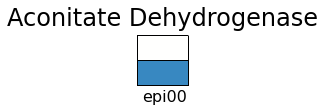

<Figure size 720x72 with 0 Axes>

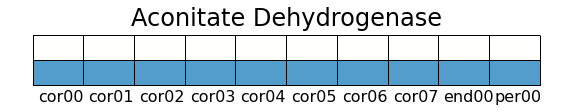

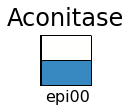

<Figure size 720x72 with 0 Axes>

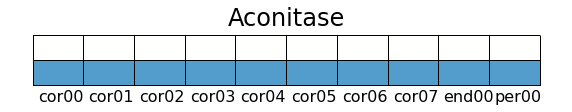

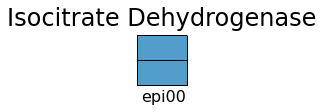

<Figure size 720x72 with 0 Axes>

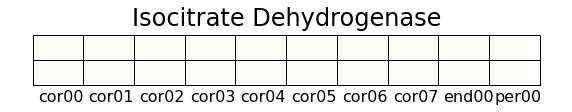

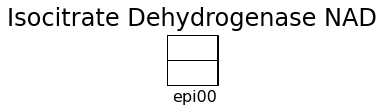

<Figure size 720x72 with 0 Axes>

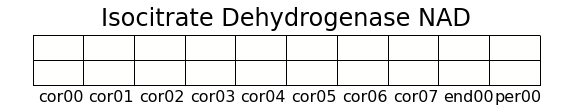

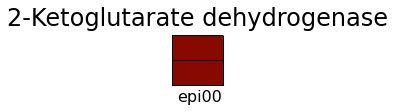

<Figure size 720x72 with 0 Axes>

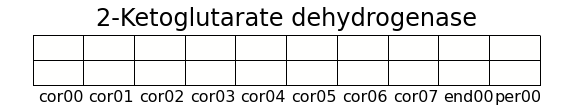

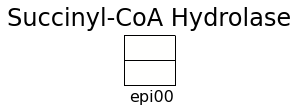

<Figure size 720x72 with 0 Axes>

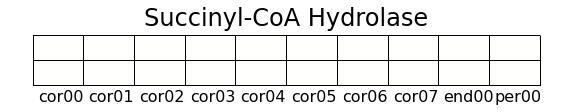

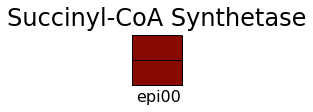

<Figure size 720x72 with 0 Axes>

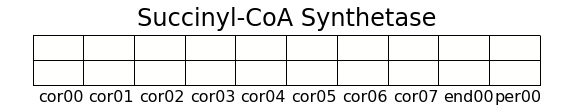

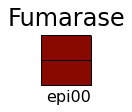

<Figure size 720x72 with 0 Axes>

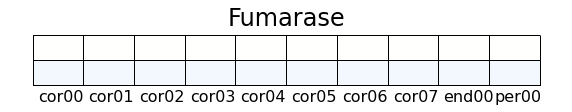

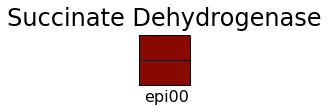

<Figure size 720x72 with 0 Axes>

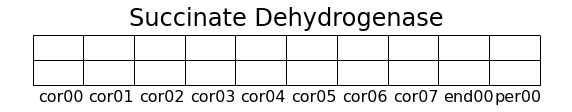

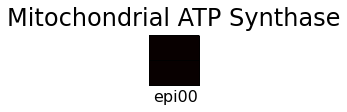

<Figure size 720x72 with 0 Axes>

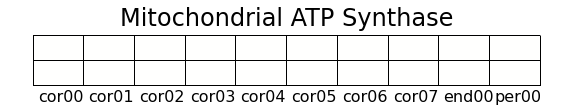

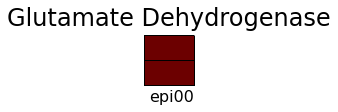

<Figure size 720x72 with 0 Axes>

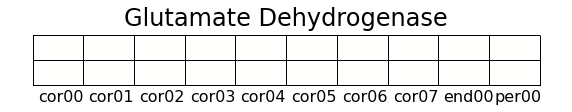

In [ ]:
from matplotlib.cm import ScalarMappable
from matplotlib.colors import LogNorm,SymLogNorm
TCA_rxns = ['MALATE_DEH_RXN','CITSYN_RXN','ACONITATEDEHYDR_RXN','ACONITATEHYDR_RXN','ISOCITDEH_RXN','ISOCITRATE_DEHYDROGENASE_NAD_RXN','2OXOGLUTARATEDEH_RXN','SUCCINYL_COA_HYDROLASE_RXN','SUCCCOASYN_RXN','FUMHYDR_RXN','SUCCINATE_DEHYDROGENASE_UBIQUINONE_RXN','Mitochondrial_ATP_Synthase','GLUTAMATE_DEHYDROGENASE_RXN']
tca_rxn_dict = {'MALATE_DEH_RXN':'Malate Dehydrogenase','CITSYN_RXN':'Citrate Synthase','ACONITATEDEHYDR_RXN':'Aconitate Dehydrogenase','ACONITATEHYDR_RXN':'Aconitase','ISOCITDEH_RXN':'Isocitrate Dehydrogenase','ISOCITRATE_DEHYDROGENASE_NAD_RXN':'Isocitrate Dehydrogenase NAD','2OXOGLUTARATEDEH_RXN':'2-Ketoglutarate dehydrogenase','SUCCINYL_COA_HYDROLASE_RXN':'Succinyl-CoA Hydrolase','SUCCCOASYN_RXN':'Succinyl-CoA Synthetase','FUMHYDR_RXN':'Fumarase','SUCCINATE_DEHYDROGENASE_UBIQUINONE_RXN':'Succinate Dehydrogenase','Mitochondrial_ATP_Synthase':'Mitochondrial ATP Synthase','GLUTAMATE_DEHYDROGENASE_RXN':'Glutamate Dehydrogenase'}
import matplotlib.pyplot as plt
import numpy as np

colors1 = plt.cm.afmhot_r(np.linspace(0., 1, 256))
colors2 = plt.cm.Blues_r(np.linspace(0, 1, 256))
# combine them and build a new colormap
colors = np.vstack((colors2, colors1))
mymap = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)

tca_dict={}
for cell in cells:
    tca_dict[cell]={}
    for rxn in TCA_rxns:
        tca_dict[cell][rxn]=sum([sol[x.id] for x in rmodel.reactions if cell in x.id and rxn in x.id])
temp=pd.DataFrame(tca_dict)
temp1=[x for y in temp.values for x in y]

tca_dict={}
for cell in cells:
    tca_dict[cell]={}
    for rxn in TCA_rxns:
        tca_dict[cell][rxn]=round(sum([fva_sol.maximum[x.id] for x in rmodel.reactions if cell in x.id and rxn in x.id]),4)
tcatempmax=pd.DataFrame(tca_dict)
temp1max=[x for y in tcatempmax.values for x in y]
# tmax=max(temp1max)
# tmin=min(temp1max)
tca_dict={}
for cell in cells:
    tca_dict[cell]={}
    for rxn in TCA_rxns:
        tca_dict[cell][rxn]=round(sum([fva_sol.minimum[x.id] for x in rmodel.reactions if cell in x.id and rxn in x.id]),4)
tcatempmin=pd.DataFrame(tca_dict)
temp1min=[x for y in tcatempmin.values for x in y]
# log_on=1
# minlog=1e-5
cb_on=None
cmo = mymap#plt.get_cmap('afmhot').reversed()
if log_on:
    sm=ScalarMappable(cmap=cmo, norm=LogNorm(minlog,tmax))
else:
    sm = ScalarMappable(cmap=cmo, norm=plt.Normalize(0,tmax))
    sm.set_array([])
if not cb_on:
    plt.figure(figsize=(10,1))
    plt.bar(range(1),[0 for x in range(1)],width=1,edgecolor='none')
    plt.axis('off')
    if log_on:
        cbar=plt.colorbar(ScalarMappable(cmap=cmo, norm=SymLogNorm(minlog,vmin=-tmax,vmax=tmax)),orientation='horizontal',pad=0.3,aspect=35)
    else:
        cbar=plt.colorbar(sm,orientation='horizontal',pad=0.3,aspect=35)
for ii in tcatempmin.index:
    # colorsmax = [[1-x*y/255/tmax for y in [208, 66, 255]] for x in tcatempmax.loc[ii]]
    # colorsmin = [[1-x*y/255/tmax for y in [208, 66, 255]] for x in tcatempmin.loc[ii]]

    cm = sm.get_cmap()
    if log_on:
        colorsmax = [cm(0.5+np.log10(max(abs(x),minlog)/minlog)/np.log10(tmax/minlog)/2) if x>0 else cm(0.5) if abs(x)<minlog else cm(0.5-np.log10(max(abs(x),minlog)/minlog)/np.log10(tmax/minlog)/2) for x in tcatempmax.loc[ii]]
        colorsmin = [cm(0.5+np.log10(max(abs(x),minlog)/minlog)/np.log10(tmax/minlog)/2) if x>0 else cm(0.5) if abs(x)<minlog else cm(0.5-np.log10(max(abs(x),minlog)/minlog)/np.log10(tmax/minlog)/2) for x in tcatempmin.loc[ii]]
    else:
        colorsmax = [cm(max(abs(x),minlog)/tmax) for x in tcatempmax.loc[ii]]
        colorsmin = [cm(max(abs(x),minlog)/tmax) for x in tcatempmin.loc[ii]]

    plt.figure(figsize=(1,1))
    plt.bar(range(1),[0.5 for x in range(1)],color=colorsmin[0],width=1,edgecolor='none')
    plt.bar(range(1),[0.5 for x in range(1)],bottom = [0.5 for x in range(1)],color=colorsmax[0],width=1,edgecolor='none')
    plt.bar(range(1),[0.02 for x in range(1)],color='black',width=1)
    plt.bar(range(1),[0.02 for x in range(1)],bottom = [0.49 for x in range(1)],color='black',width=1)
    plt.bar(range(1),[0.02 for x in range(1)],bottom = [0.99 for x in range(1)],color='black',width=1)
    plt.bar(np.arange(1)-0.5,[1 for x in range(1)],color='none',width=0.001,edgecolor='black')
    plt.bar(np.arange(1)+0.5,[1 for x in range(1)],color='none',width=0.001,edgecolor='black')
    plt.axis('off')
    for i in range(1):
        plt.text(i-0.4,-0.3,cells[i],fontsize=16)
    plt.title(tca_rxn_dict[ii],fontsize=24)
    plt.savefig('Figures/barcode_TCA_epi'+ii+'.png',bbox_inches='tight')

    if cb_on:
        plt.figure(figsize=(10,1.8))
    else:
        plt.figure(figsize=(10,1))
    plt.figure(figsize=(10,1))
    plt.bar(range(10),[0.5 for x in range(10)],color=colorsmin[1:],width=1,edgecolor='none')
    plt.bar(range(10),[0.5 for x in range(10)],bottom = [0.5 for x in range(10)],color=colorsmax[1:],width=1,edgecolor='none')
    plt.bar(range(10),[0.02 for x in range(10)],color='black',width=1)
    plt.bar(range(10),[0.02 for x in range(10)],bottom = [0.49 for x in range(10)],color='black',width=1)
    plt.bar(range(10),[0.02 for x in range(10)],bottom = [0.99 for x in range(10)],color='black',width=1)
    plt.bar(np.arange(10)-0.5,[1 for x in range(10)],color='none',width=0.0001,edgecolor='black')
    plt.bar(np.arange(10)+0.5,[1 for x in range(10)],color='none',width=0.0001,edgecolor='black')
    plt.axis('off')
    plt.title(tca_rxn_dict[ii],fontsize=24)
    if cb_on:
        for i in range(1,11):
            plt.text((i-1)-0.2,-0.35,cells[i],fontsize=16)
        if log_on:
            plt.colorbar(ScalarMappable(cmap=cmo, norm=SymLogNorm(minlog,tmax)))
        else:
            sm = ScalarMappable(cmap=cm, norm=plt.Normalize(0,tmax))
            sm.set_array([])
            cbar=plt.colorbar(sm,orientation='horizontal',pad=0.3,aspect=35)
    else:
        for i in range(1,11):
            plt.text((i-1)-0.4,-0.3,cells[i],fontsize=16)
    plt.savefig('Figures/barcode_TCA_'+ii+'.png',bbox_inches='tight')
    # plt.axhline(0,color='black')


In [ ]:
print(tcatempmax)
print(tcatempmin)

                                         epi00   cor00   cor01   cor02  \
MALATE_DEH_RXN                          0.9080 -0.0322 -0.0306 -0.0288   
CITSYN_RXN                              0.2209  0.0000  0.0000  0.0000   
ACONITATEDEHYDR_RXN                     0.0000  0.0000  0.0000  0.0000   
ACONITATEHYDR_RXN                       0.0000  0.0000  0.0000  0.0000   
ISOCITDEH_RXN                          -0.0838  0.0000  0.0000  0.0000   
ISOCITRATE_DEHYDROGENASE_NAD_RXN        0.0000  0.0000  0.0000  0.0000   
2OXOGLUTARATEDEH_RXN                    0.2823  0.0000  0.0000  0.0000   
SUCCINYL_COA_HYDROLASE_RXN              0.0000  0.0000  0.0000  0.0000   
SUCCCOASYN_RXN                          0.2823  0.0000  0.0000  0.0000   
FUMHYDR_RXN                             0.2823  0.0000  0.0000  0.0000   
SUCCINATE_DEHYDROGENASE_UBIQUINONE_RXN  0.2823  0.0000  0.0000  0.0000   

                                         cor03   cor04  cor05   cor06   cor07  \
MALATE_DEH_RXN                

In [ ]:
TCA_rxns = ['MALATE_DEH_RXN','CITSYN_RXN','ACONITATEDEHYDR_RXN','ACONITATEHYDR_RXN','ISOCITDEH_RXN','ISOCITRATE_DEHYDROGENASE_NAD_RXN','2OXOGLUTARATEDEH_RXN','SUCCINYL_COA_HYDROLASE_RXN','SUCCCOASYN_RXN','FUMHYDR_RXN','SUCCINATE_DEHYDROGENASE_UBIQUINONE_RXN']
for rxnroot in TCA_rxns:
    for rxn in rmodel.reactions:
        if rxnroot in rxn.id and 'epi00' in rxn.id and sol[rxn.id]:
            print(round(sol[rxn.id],4),rxn.id,rxn.reaction)

-0.0155 MALATE_DEH_RXN_p_epi00 MAL_p_epi00 + NAD_p_epi00 <=> NADH_p_epi00 + OXALACETIC_ACID_p_epi00 + PROTON_p_epi00
0.9235 MALATE_DEH_RXN_m_epi00 MAL_m_epi00 + NAD_m_epi00 <=> NADH_m_epi00 + OXALACETIC_ACID_m_epi00 + PROTON_m_epi00
0.2209 CITSYN_RXN_m_epi00 ACETYL_COA_m_epi00 + OXALACETIC_ACID_m_epi00 + WATER_m_epi00 --> CIT_m_epi00 + CO_A_m_epi00 + PROTON_m_epi00
-0.0838 ACONITATEDEHYDR_RXN_m_epi00 CIT_m_epi00 <=> CIS_ACONITATE_m_epi00 + WATER_m_epi00
-0.0838 ACONITATEHYDR_RXN_m_epi00 CIS_ACONITATE_m_epi00 + WATER_m_epi00 <=> THREO_DS_ISO_CITRATE_m_epi00
-0.0838 ISOCITDEH_RXN_m_epi00 NADP_m_epi00 + THREO_DS_ISO_CITRATE_m_epi00 <=> 2_KETOGLUTARATE_m_epi00 + CARBON_DIOXIDE_m_epi00 + NADPH_m_epi00
0.2823 2OXOGLUTARATEDEH_RXN_m_epi00 2_KETOGLUTARATE_m_epi00 + CO_A_m_epi00 + NAD_m_epi00 --> CARBON_DIOXIDE_m_epi00 + NADH_m_epi00 + SUC_COA_m_epi00
0.2823 SUCCCOASYN_RXN_m_epi00 0.8 ADP_m_epi00 + Pi_m_epi00 + SUC_COA_m_epi00 + 0.2 aADP_m_epi00 --> 0.9 ATP_m_epi00 + CO_A_m_epi00 + 0.1 PROTON_m

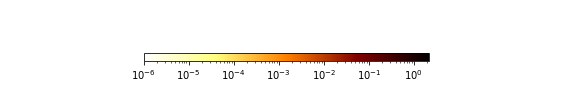

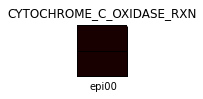

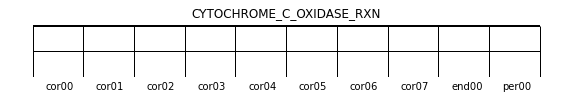

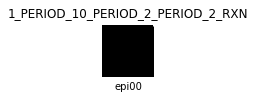

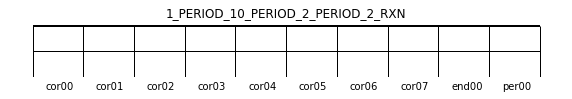

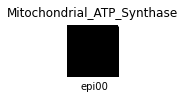

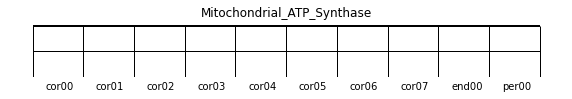

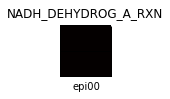

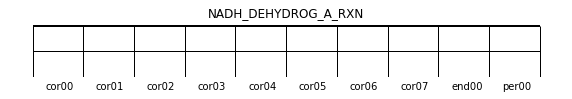

In [ ]:
ETC_rxns = ['CYTOCHROME_C_OXIDASE_RXN','1_PERIOD_10_PERIOD_2_PERIOD_2_RXN','Mitochondrial_ATP_Synthase','NADH_DEHYDROG_A_RXN']
ETC_rxn_dict = {'CYTOCHROME_C_OXIDASE_RXN':'CYTOCHROME_C_OXIDASE_RXN','1_PERIOD_10_PERIOD_2_PERIOD_2_RXN':'1_PERIOD_10_PERIOD_2_PERIOD_2_RXN','Mitochondrial_ATP_Synthase':'Mitochondrial_ATP_Synthase','NADH_DEHYDROG_A_RXN':'NADH_DEHYDROG_A_RXN'}
import matplotlib.pyplot as plt
import numpy as np
ETC_dict={}
for cell in cells:
    ETC_dict[cell]={}
    for rxn in ETC_rxns:
        ETC_dict[cell][rxn]=sum([sol[x.id] for x in rmodel.reactions if cell in x.id and rxn in x.id])
temp=pd.DataFrame(ETC_dict)
temp1=[x for y in temp.values for x in y]

ETC_dict={}
for cell in cells:
    ETC_dict[cell]={}
    for rxn in ETC_rxns:
        ETC_dict[cell][rxn]=round(sum([fva_sol.maximum[x.id] for x in rmodel.reactions if cell in x.id and rxn in x.id]),4)
ETCtempmax=pd.DataFrame(ETC_dict)
temp1max=[x for y in ETCtempmax.values for x in y]
ETCmax=max(temp1max)
ETC_dict={}
for cell in cells:
    ETC_dict[cell]={}
    for rxn in ETC_rxns:
        ETC_dict[cell][rxn]=round(sum([fva_sol.minimum[x.id] for x in rmodel.reactions if cell in x.id and rxn in x.id]),4)
ETCtempmin=pd.DataFrame(ETC_dict)
temp1min=[x for y in ETCtempmin.values for x in y]
if log_on:
    sm=ScalarMappable(cmap=cmo, norm=LogNorm(minlog,ETCmax))
else:
    sm = ScalarMappable(cmap=cmo, norm=plt.Normalize(0,ETCmax))
    sm.set_array([])
if not cb_on:
    plt.figure(figsize=(10,1))
    plt.bar(range(1),[0 for x in range(1)],width=1,edgecolor='none')
    plt.axis('off')
    if log_on:
        cbar=plt.colorbar(ScalarMappable(cmap=cmo, norm=LogNorm(minlog,ETCmax)),orientation='horizontal',pad=0.3,aspect=35)
    else:
        cbar=plt.colorbar(sm,orientation='horizontal',pad=0.3,aspect=35)
for ii in ETCtempmin.index:
    # colorsmax = [[1-x*y/255/ETCmax for y in [208, 66, 255]] for x in ETCtempmax.loc[ii]]
    # colorsmin = [[1-x*y/255/ETCmax for y in [208, 66, 255]] for x in ETCtempmin.loc[ii]]

    cm = sm.get_cmap()
    if log_on:
        scale_var=np.exp(1)-1
        colorsmax = [cm(np.log10(max(x,minlog)/minlog)/np.log10(ETCmax/minlog)) for x in ETCtempmax.loc[ii]]
        colorsmin = [cm(np.log10(max(x,minlog)/minlog)/np.log10(ETCmax/minlog)) for x in ETCtempmin.loc[ii]]
    else:
        colorsmax = [cm(max(x,minlog)/ETCmax) for x in ETCtempmax.loc[ii]]
        colorsmin = [cm(max(x,minlog)/ETCmax) for x in ETCtempmin.loc[ii]]

    plt.figure(figsize=(1,1))
    plt.bar(range(1),[0.5 for x in range(1)],color=colorsmin[0],width=1,edgecolor='none')
    plt.bar(range(1),[0.5 for x in range(1)],bottom = [0.5 for x in range(1)],color=colorsmax[0],width=1,edgecolor='none')
    plt.bar(range(1),[0.02 for x in range(1)],color='black',width=1)
    plt.bar(range(1),[0.02 for x in range(1)],bottom = [0.49 for x in range(1)],color='black',width=1)
    plt.bar(range(1),[0.02 for x in range(1)],bottom = [0.99 for x in range(1)],color='black',width=1)
    plt.bar(np.arange(1)-0.5,[1 for x in range(1)],color='none',width=0.001,edgecolor='black')
    plt.bar(np.arange(1)+0.5,[1 for x in range(1)],color='none',width=0.001,edgecolor='black')
    plt.axis('off')
    for i in range(1):
        plt.text(i-0.25,-0.25,cells[i])
    plt.title(ETC_rxn_dict[ii])
    plt.savefig('Figures/barcode_ETC_epi'+ETC_rxn_dict[ii]+'.png',bbox_inches='tight')
    if cb_on:
        plt.figure(figsize=(10,1.8))
    else:
        plt.figure(figsize=(10,1))
    plt.bar(range(10),[0.5 for x in range(10)],color=colorsmin[1:],width=1,edgecolor='none')
    plt.bar(range(10),[0.5 for x in range(10)],bottom = [0.5 for x in range(10)],color=colorsmax[1:],width=1,edgecolor='none')
    plt.bar(range(10),[0.01 for x in range(10)],color='black',width=1)
    plt.bar(range(10),[0.03 for x in range(10)],bottom = [0.49 for x in range(10)],color='black',width=1)
    plt.bar(range(10),[0.03 for x in range(10)],bottom = [0.99 for x in range(10)],color='black',width=1)
    plt.bar(np.arange(10)-0.5,[1 for x in range(10)],color='none',width=0.0001,edgecolor='black')
    plt.bar(np.arange(10)+0.5,[1 for x in range(10)],color='none',width=0.0001,edgecolor='black')
    plt.axis('off')
    plt.title(ETC_rxn_dict[ii])
    if cb_on:
        for i in range(1,11):
            plt.text((i-1)-0.25,-0.35,cells[i])
        if log_on:
            plt.colorbar(ScalarMappable(cmap=cmo, norm=LogNorm(minlog,ETCmax)))
        else:
            sm = ScalarMappable(cmap=cm, norm=plt.Normalize(0,ETCmax))
            sm.set_array([])
            cbar=plt.colorbar(sm,orientation='horizontal',pad=0.3,aspect=35)
    else:
        for i in range(1,11):
            plt.text((i-1)-0.25,-0.25,cells[i])
    plt.savefig('Figures/barcode_ETC_'+ETC_rxn_dict[ii]+'.png',bbox_inches='tight')
    # plt.axhline(0,color='black')

In [ ]:
print(list([1-x*y/255/tmax for y in [208, 66, 255]] for x in list(tempmin.loc['2_PERIOD_7_PERIOD_1_PERIOD_90_RXN'])))
print(list([1-x*y/255/tmax for y in [208, 66, 255]] for x in list(tempmax.loc['2_PERIOD_7_PERIOD_1_PERIOD_90_RXN'])))

[[0.5582825475802962, 0.8598396545206709, 0.4584713924662285], [1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0, 1.0]]
[[0.47768193055358554, 0.8342644587333492, 0.359658136015213], [0.9193781547880033, 0.9744180683461934, 0.9011607186102926], [0.9193781547927949, 0.9744180683477138, 0.9011607186161669], [0.9193781547887222, 0.9744180683464214, 0.9011607186111739], [0.919378154792565, 0.9744180683476408, 0.901160718615885], [0.9193781547933747, 0.9744180683478978, 0.9011607186168776], [0.9193781547887063, 0.9744180683464164, 0.9011607186111543], [0.9193781547878894, 0.9744180683461572, 0.9011607186101529], [0.9193781547878515, 0.9744180683461452, 0.9011607186101063], [0.9193781548014609, 0.9744180683504635, 0.9011607186267909], [0.9193781547939583, 0.9744180683480829, 0.9011607186175931]]


In [ ]:
for cell in cells:
    glycolysis_rxns=list(set(['_'.join(rxn.id.split('_')[:-2]) for rxn in rmodel.reactions if 'glycolysis' in str(rxn.notes)]))
    other_rxns = ['SUCROSE_SYNTHASE_RXN','3_PERIOD_2_PERIOD_1_PERIOD_48_RXN','FRUCTOKINASE_RXN']
    comps = ['_c_','_p_','_m_','_x_']
    exclmets = ['PROTON_','ATP_','ADP_','NADH_','NADPH_','NAD_','NADP_','WATER_','Pi_','PPI_']
    inrxns=[x+y+z for x in glycolysis_rxns+other_rxns for y in comps for z in [cell]]
    rdict=cobraSysToGraph(rmodel,sol,rxnsin=inrxns,exclmets=exclmets,dictout=1)
    mapDict(rdict,rmodel,weight_mult=10,rxnsin=inrxns)

In [ ]:
lookup='SUCROSE_c_epi00'
print(rdict[lookup]).0483228958227
for key in list(rdict.keys()):
    if lookup in str(rdict[key]):
        print(key,rdict[key])

{}
3_PERIOD_2_PERIOD_1_PERIOD_48_RXN_c_epi00 {'SUCROSE_c_epi00': {'weight': -0.0}, 'FRU_c_epi00': {'weight': 0.0}, 'GLC_c_epi00': {'weight': 0.0}}
SUCROSE_SYNTHASE_RXN_c_epi00 {'SUCROSE_c_epi00': {'weight': -0.0}, 'FRU_c_epi00': {'weight': 0.0}}
SUCROSE_c_epi00_Transfer_epi00_to_cor00 {'SUCROSE_c_epi00': {'weight': -0.0}}
Sucrose_ec_epi00 {'SUCROSE_c_epi00': {'weight': 0.0}}
SUCROSE_PHOSPHATASE_RXN_c_epi00 {'SUCROSE_c_epi00': {'weight': 0.0}}
SUCROSE_PROTON_rev_vc_epi00 {'SUCROSE_c_epi00': {'weight': 0.0}}
SUCROSE_c_biomass_epi00 {'SUCROSE_c_epi00': {'weight': -0.0}}
SUCROSE_PROTON_vc_epi00 {'SUCROSE_c_epi00': {'weight': -0.0}}
sSUCROSE_biomass_epi00 {'SUCROSE_c_epi00': {'weight': 0.0}}


In [ ]:
temp='FRU_c_end00'
nodekeyroot2 = '_'.join(temp.split('_')[:-2])
if nodekeyroot2 in metalias_dict.keys() and temp in rmodel.metabolites:
    nodetemp = metalias_dict[nodekeyroot2]+'_'+temp.split('_')[-2]
else:
    nodetemp = '_'.join(temp.split('_')[:-1])
print(nodetemp)

FRU_c


In [ ]:
from graphviz import Digraph
metalias_dict = {'SUCROSE':'Suc','PYRUVATE':'PYR','CARBON_DIOXIDE':'CO_2','FRUCTOSE_16_DIPHOSPHATE':'FBP','FRUCTOSE_6P':'F6P',
'GLC_6_P':'G6P','DIHYDROXY_ACETONE_PHOSPHATE':'DHAP','PHOSPHO_ENOL_PYRUVATE':'PEP','UDP_GLUCOSE':'UDP_GLC'}
def mapDict(rdict,rmodel,weight_mult=1,rxnsin=None):
    thiscell=list(rdict.keys())[0].split('_')[-1]
    f=Digraph('dicttest'+thiscell,filename='Sources/dicttest'+thiscell+'.gv',strict=True)
    f.attr(rankdir='LR',size='8,5')
    f.attr('node', shape='circle',style='filled',fillcolor='white')
    rxns = [key for key in rdict.keys() if key in rmodel.reactions]
    colours=['black','royalblue','deeppink4','red','forestgreen','darkorchid','lightseagreen','orange']
    count=1
    # print(str(f).count('node'))
    for key in list(rdict.keys()):
        if key in rxns and key not in rxnsin and all([rdict[key][key2]['weight']==0 for key2 in list(rdict[key].keys())]):
            # print(key)
            continue
        elif rdict[key]:
            nodekeyroot = '_'.join(key.split('_')[:-2])
            if nodekeyroot in metalias_dict.keys() and key in rmodel.metabolites:
                nodekey = metalias_dict[nodekeyroot]+'_'+key.split('_')[-2]
            elif 'Transfer' in key:
                nodekey=key
            else:
                nodekey = '_'.join(key.split('_')[:-1])
            if key not in str(f):
                if key in rmodel.reactions:
                    f.attr('node', shape='diamond',style='filled',fillcolor='darkgoldenrod1')
                else:
                    f.attr('node', shape='rectangle',style='filled',fillcolor='white')
                f.node(nodekey)
                count+=1
        if rdict[key]:
            for key2 in list(rdict[key].keys()):
                if key in rxns and key not in rxnsin and rdict[key][key2]['weight']==0:
                    continue
                else:
                    nodekeyroot2 = '_'.join(key2.split('_')[:-2])
                    if nodekeyroot2 in metalias_dict.keys() and key2 in rmodel.metabolites:
                        nodekey2 = metalias_dict[nodekeyroot2]+'_'+key2.split('_')[-2]
                    elif 'Transfer' in key2:
                        nodekey2=key2
                    else:
                        nodekey2 = '_'.join(key2.split('_')[:-1])
                    # assert 'FRU' not in metalias_dict.keys()
                    # if key2=='FRU_c_end00':
                    #     Exception
                    #     print(nodekeyroot2,nodekey2,key2)
                    if key2 not in str(f):
                        
                        if key2 in rmodel.reactions:
                            f.attr('node', shape='diamond',style='filled',fillcolor='darkgoldenrod1')
                        else:
                            f.attr('node', shape='rectangle',style='filled',fillcolor='white')
                        # print(key in rxns and key not in rxnsin and rdict[key][key2]['weight']==0,key2)
                        f.node(nodekey2)
                        count+=1
                    this_width=min(weight_mult*rdict[key][key2]['weight'],60)
                    this_edge=str(max(this_width,.5))
                    this_arrow=str(min(max(this_width/20,0.5),10))
                    rxnid = [x for x in [key,key2] if x in rmodel.reactions][0]
                    metid = [x for x in [key,key2] if x != rxnid][0]
                    rxn = rmodel.reactions.get_by_id(rxnid)
                    if (key==metid and metid in [x.id for x in rxn.reactants]) or (key2==metid and metid in [x.id for x in rxn.products]):
                        prods=[met.id for met in rxn.products]
                        reacts=[met.id for met in rxn.reactants]
                    else:
                        reacts=[met.id for met in rxn.products]
                        prods=[met.id for met in rxn.reactants]

                    if 'Transfer' in rxnid or '_ec_' in rxn.id:
                        this_col=2
                    elif any(['ATP' in met for met in prods]):
                        this_col=3
                    elif any(['ATP' in met for met in reacts]):
                        this_col=4
                    elif any(['NADH' in met for met in prods]) or any(['NADPH' in met for met in prods]):
                        this_col=5
                    elif any(['NADH' in met for met in reacts]) or any(['NADPH' in met for met in reacts]):
                        this_col=6
                    elif any(['PPI' in met for met in prods]):
                        this_col=7
                    else:
                        this_col=0
                    if rdict[key][key2]['weight']==0:
                        # if not any([(x in key or x in key2) for x in rxnsin]):
                        #     continue
                        tailtype='dashed'
                        color = 'grey'
                        # print('Dashed: ',key,key2)
                    else:
                        tailtype=''
                        color=colours[this_col]
                    f.edge(nodekey,nodekey2,arrowsize=this_arrow,penwidth=this_edge,style=tailtype,color=color,
                    label=str(rxn.get_coefficient(metid))+'*'+str(sol[rxn.id]))
                    # print(key,': ',nodekey,', ',key2,': ',nodekey2)
                    if count!=str(f).count('node'):
                        print('Wrong count?',key,key2)
                        return f
    # print(trav_mets)
    f.view()
    return f

In [ ]:
import networkx as nx
# Need to add weights based on sol
def cobraToGraph(model,sol=None,rxns=None):
    ocmetstubs=[]
    gcmets={}
    for met in model.metabolites:
        if any([y in met.id for y in ocmetstubs]):
            gcmets[met.id]={}
        else:
            if met.id not in (gcmets.keys()):
                gcmets[met.id]={}
            for rxn in [x for x in met.reactions]:# if sol[x.id]!=0]:
                gcmets[met.id][rxn.id]={}
                gcmets[met.id][rxn.id]['weight']=sol[rxn.id]*rxn.get_coefficient(met.id)
                if rxn.id not in gcmets.keys():
                    gcmets[rxn.id]={}
                gcmets[rxn.id][met.id]={}
                gcmets[rxn.id][met.id]['weight']=-sol[rxn.id]*rxn.get_coefficient(met.id)
    temp=nx.DiGraph(gcmets)
    return temp
    # components = [temp.subgraph(c).copy() for c in nx.connected_components(temp)]
    # print([len(c) for c in nx.connected_components(temp)])

In [ ]:
import networkx as nx
# Need to add weights based on sol
def cobraSysToGraph(model,sol=None,rxnsin=None,metsin=None,exclmets=None,dictout=None):
    ocmetstubs=[]
    gcmets={}
    if rxnsin:
        rxns = [rxn for rxn in model.reactions if any([x in rxn.id for x in rxnsin])]
        mets = set([met for rxn in rxns for met in rxn.metabolites if not any([x in met.id for x in exclmets])])
        rxns = list(set(rxns+[rxn for met in mets for rxn in met.reactions]))
        # print([x.id for x in rxns])
        # print([x.id for x in mets])
    if metsin:
        mets = [met for met in model.metabolites if any([x in met.id for x in metsin]) and not any([x in met.id for x in exclmets])]
        rxns = set([rxn for met in mets for rxn in met.reactions])
    for met in mets:
        if any([y in met.id for y in ocmetstubs]):
            gcmets[met.id]={}
        else:
            if met.id not in (gcmets.keys()):
                gcmets[met.id]={}
            for rxn in [x for x in met.reactions]:# if x in rxns]:# if sol[x.id]!=0]:
                if sol[rxn.id]*rxn.get_coefficient(met.id)<0:
                    gcmets[met.id][rxn.id]={}
                    gcmets[met.id][rxn.id]['weight']=-sol[rxn.id]*rxn.get_coefficient(met.id)
                else:
                    if rxn.id not in gcmets.keys():
                        gcmets[rxn.id]={}
                    gcmets[rxn.id][met.id]={}
                    gcmets[rxn.id][met.id]['weight']=sol[rxn.id]*rxn.get_coefficient(met.id)
    if dictout:
        return(gcmets)
    temp=nx.DiGraph(gcmets)
    return temp
    # components = [temp.subgraph(c).copy() for c in nx.connected_components(temp)]
    # print([len(c) for c in nx.connected_components(temp)])

# Junk 

In [ ]:
print(sol['CO2_tx_epi00'],solo['CO2_tx_epi00'],rmodel.reactions.CO2_tx_epi00.reaction)

-2.0293972461650163 -1.7067386446553732  <=> CARBON_DIOXIDE_e_epi00


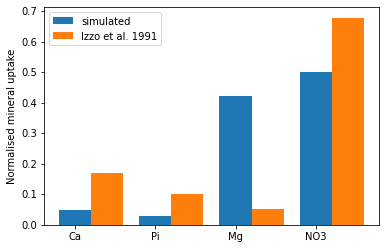

In [ ]:
data1 = [0.1076,.0636,0.9466,1.1259]
data2 = [0.5,0.3,0.15,2]
labels=['Ca','Pi','Mg','NO3']
width=0.4
plt.bar(np.arange(4),[x/sum(data1) for x in data1],width=width)
plt.bar(np.arange(4)+width,[x/sum(data2) for x in data2],width=width)
plt.xticks(np.arange(4),labels)
plt.ylabel('Normalised mineral uptake')
plt.legend(['simulated','Izzo et al. 1991'])

In [142]:
rmodel.reactions.H_tx_epi00

Reaction identifier,H_tx_epi00
Name,H_tx
Memory address,0x07f9254cca250
Stoichiometry,PROTON_e_epi00 <=> PROTON <=>
GPR,
Lower bound,-1000
Upper bound,1000.0


In [150]:
for rxn in rmodel.reactions:
    if rxn.boundary and (sol[rxn.id] or sol2[rxn.id]) and not '_b_' in rxn.id:
        print(round(sol[rxn.id],4),round(sol2[rxn.id],4),rxn.id ,rxn.reaction)

0.1076 0.1406 Ca_tx_epi00  <=> CAII_e_epi00
-2.1511 -1.1023 H2O_tx_epi00  <=> WATER_e_epi00
-2.0294 -1.3424 CO2_tx_epi00  <=> CARBON_DIOXIDE_e_epi00
1.0794 0.6999 O2_tx_epi00  <=> OXYGEN_MOLECULE_e_epi00
0.0636 0.0636 Pi_tx_epi00  <=> Pi_e_epi00
0.9466 0.7061 Mg_tx_epi00  <=> MGII_e_epi00
1.1259 1.1259 Nitrate_tx_epi00  <=> NITRATE_e_epi00
0.5498 2.1678 L_LACTATE_tx_epi00 L_LACTATE_e_epi00 --> 
0.4671 0.4671 TotalSoluteConstraint_epi00 TotalSolute_epi00 --> 
0.4469 0.4469 TotalSoluteConstraint_cor00 TotalSolute_cor00 --> 
0.4676 0.4676 TotalSoluteConstraint_cor01 TotalSolute_cor01 --> 
0.479 0.479 TotalSoluteConstraint_cor02 TotalSolute_cor02 --> 
0.4827 0.4827 TotalSoluteConstraint_cor03 TotalSolute_cor03 --> 
0.4486 0.4486 TotalSoluteConstraint_cor04 TotalSolute_cor04 --> 
0.3822 0.3822 TotalSoluteConstraint_cor05 TotalSolute_cor05 --> 
0.3253 0.3253 TotalSoluteConstraint_cor06 TotalSolute_cor06 --> 
0.2722 0.2722 TotalSoluteConstraint_cor07 TotalSolute_cor07 --> 
0.252 0.252 TotalSo

In [ ]:
# rmodel.metabolites.CAII_b_epi00.reactions
print(rmodel.reactions.CA2_rev_vc_epi00.reaction)
print(rmodel.reactions.MG2_rev_vc_epi00.reaction)

CAII_c_epi00 + 3.0 PROTON_v_epi00 --> CAII_v_epi00 + 3.0 PROTON_c_epi00
MGII_c_epi00 + 2.0 PROTON_v_epi00 --> MGII_v_epi00 + 2.0 PROTON_c_epi00


In [ ]:
rmodel.metabolites.Pi_c_epi00

Metabolite identifier,Pi_c_epi00
Name,Pi[c]
Memory address,0x07f9af0464430
Formula,HO4P
Compartment,c_epi00
In 43 reaction(s),"Protein_Polymerisation_c_epi00, Protein_Processing_c_epi00, PROTON_ATPase_ap_epi00, SUC_Pi_mc_epi00, S_ADENMETSYN_RXN_c_epi00, Pi_ec_epi00, G6P_Pi_pc_epi00, OAA_Pi_mc_epi00, F16BDEPHOS_RXN_c_epi00,..."


In [ ]:
for rxn in rmodel.reactions:
    if 'Pi' in rxn.id and sol[rxn.id]:
        print(round(sol[rxn.id],4),rxn.id,rxn.reaction)

0.3661 OAA_Pi_mc_epi00 OXALACETIC_ACID_m_epi00 + 0.7 Pi_c_epi00 + 0.3 aPi_c_epi00 <=> OXALACETIC_ACID_c_epi00 + 0.3 PROTON_c_epi00 + Pi_m_epi00
0.0636 Pi_ec_epi00 3.0 PROTON_e_epi00 + Pi_e_epi00 --> 2.7 PROTON_c_epi00 + 0.7 Pi_c_epi00 + 0.3 aPi_c_epi00
-0.1027 ATP_ADP_Pi_pc_epi00 0.5 ADP_c_epi00 + 0.9 ATP_p_epi00 + 0.1 PROTON_p_epi00 + 0.7 Pi_c_epi00 + 0.5 aADP_c_epi00 + 0.1 aATP_p_epi00 + 0.3 aPi_c_epi00 <=> 0.8 ADP_p_epi00 + 0.65 ATP_c_epi00 + 0.45 PROTON_c_epi00 + Pi_p_epi00 + 0.2 aADP_p_epi00 + 0.35 aATP_c_epi00
-6.0538 Pi_PROTON_mc_epi00 PROTON_m_epi00 + Pi_m_epi00 <=> 0.7 PROTON_c_epi00 + 0.7 Pi_c_epi00 + 0.3 aPi_c_epi00
0.0636 Pi_tx_epi00  <=> Pi_e_epi00
-0.0221 G6P_Pi_pc_epi00 GLC_6_P_p_epi00 + 0.7 Pi_c_epi00 + 0.3 aPi_c_epi00 <=> GLC_6_P_c_epi00 + 0.3 PROTON_c_epi00 + Pi_p_epi00
-0.0346 3PGA_Pi_pc_cor00 G3P_p_cor00 + 0.7 Pi_c_cor00 + 0.3 aPi_c_cor00 <=> G3P_c_cor00 + 0.3 PROTON_c_cor00 + Pi_p_cor00
-0.0346 ATP_ADP_Pi_pc_cor00 0.5 ADP_c_cor00 + 0.9 ATP_p_cor00 + 0.1 PROTON_p_co

In [ ]:
for rxn in rmodel.reactions:
    if 'PEPCARBOX' in rxn.id:
        print(round(sol[rxn.id],4),rxn.id,rxn.reaction)

0.0 PEPCARBOXYKIN_RXN_c_epi00 0.65 ATP_c_epi00 + OXALACETIC_ACID_c_epi00 + 0.15 PROTON_c_epi00 + 0.35 aATP_c_epi00 --> 0.5 ADP_c_epi00 + CARBON_DIOXIDE_c_epi00 + PHOSPHO_ENOL_PYRUVATE_c_epi00 + 0.5 aADP_c_epi00
0.0 PEPCARBOX_RXN_c_epi00 HCO3_c_epi00 + PHOSPHO_ENOL_PYRUVATE_c_epi00 + 0.3 PROTON_c_epi00 --> OXALACETIC_ACID_c_epi00 + 0.7 Pi_c_epi00 + 0.3 aPi_c_epi00
0.0 PEPCARBOXYKIN_RXN_c_cor00 0.65 ATP_c_cor00 + OXALACETIC_ACID_c_cor00 + 0.15 PROTON_c_cor00 + 0.35 aATP_c_cor00 --> 0.5 ADP_c_cor00 + CARBON_DIOXIDE_c_cor00 + PHOSPHO_ENOL_PYRUVATE_c_cor00 + 0.5 aADP_c_cor00
0.0 PEPCARBOX_RXN_c_cor00 HCO3_c_cor00 + PHOSPHO_ENOL_PYRUVATE_c_cor00 + 0.3 PROTON_c_cor00 --> OXALACETIC_ACID_c_cor00 + 0.7 Pi_c_cor00 + 0.3 aPi_c_cor00
0.0 PEPCARBOXYKIN_RXN_c_cor01 0.65 ATP_c_cor01 + OXALACETIC_ACID_c_cor01 + 0.15 PROTON_c_cor01 + 0.35 aATP_c_cor01 --> 0.5 ADP_c_cor01 + CARBON_DIOXIDE_c_cor01 + PHOSPHO_ENOL_PYRUVATE_c_cor01 + 0.5 aADP_c_cor01
0.0 PEPCARBOX_RXN_c_cor01 HCO3_c_cor01 + PHOSPHO_ENOL_PYR

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
sbdict={}
rxn=rmodel.reactions.soluble_biomass_tissue
for met in rxn.metabolites:
    sbdict[met.id]=-rxn.get_coefficient(met.id)*sol[rxn.id]
sbodict={}
for met in rxn.metabolites:
    sbodict[met.id]=-rxn.get_coefficient(met.id)*solo[rxn.id]
sortedsb = sorted(sbdict.items(),key=lambda x:x[1],reverse=True)
width=0.4
plt.bar(np.arange(len(sbdict)),[x[1] for x in sortedsb],width=width)
plt.bar(np.arange(len(sbdict))+width,[sbodict[x[0]] for x in sortedsb],width=width)
temp=plt.xticks(range(len(sbdict)),['_'.join(x[0].split('_')[:-2]) for x in sortedsb],rotation=90)
plt.ylim(0,2)
plt.legend(['current','old'])

KeyError: 'soluble_biomass_tissue_Lynch'

In [ ]:
met='UDP_GLUCOSE_c_epi00'
for rxn in rmodel.metabolites.get_by_id(met).reactions:
    if sol[rxn.id]!=0:
        print(sol[rxn.id],rxn.id)

0.5400160670735579 GLUC1PURIDYLTRANS_RXN_c_epi00
0.5400160670735579 CELLULOSE_SYNTHASE_UDP_FORMING_RXN_c_epi00


(0.0, 2.0)

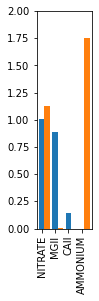

In [ ]:
import matplotlib.pyplot as plt
osbdict={}
osbodict={}
for omet in rmodel.metabolites:
    if '_b_' in omet.id and not 'tissue' in omet.id:
        for rxn in omet.reactions:
            if not any([y in met.id for met in rxn.metabolites for y in ['tissue','Protein','Cellul','Lipi']]) and (sol[rxn.id]*rxn.get_coefficient(omet.id)<0 or solo[rxn.id]*rxn.get_coefficient(omet.id)<0):
                # print(rxn.id, rxn.reaction)
                metroot='_'.join(omet.id.split('_')[:-2])
                # print(omet.id, rxn.id)
                if metroot not in list(osbdict.keys()):
                    osbdict[metroot]=0
                    osbodict[metroot]=0
                osbdict[metroot]+=-rxn.get_coefficient(omet.id)*sol[rxn.id]
                osbodict[metroot]+=-rxn.get_coefficient(omet.id)*solo[rxn.id]
sortedosb = sorted(osbdict.items(),key=lambda x:x[1],reverse=True)
fig = plt.figure(figsize=(1,4*len(osbdict)/4))
plt.bar(range(len(osbdict)),[x[1] for x in sortedosb],width=width)
plt.bar(np.arange(len(osbdict))+width,[osbodict[x[0]] for x in sortedosb],width=width)
temp=plt.xticks(range(len(osbdict)),[x[0] for x in sortedosb],rotation=90)
plt.ylim(0,2)

In [ ]:
import pandas as pd
sdata=pd.read_excel('/Users/user/Downloads/Maize-Root-Metabolomics-Lynch-2022.xlsx')

In [ ]:
sdata.head(2)

,Unnamed: 0,Average (mg/g),Unnamed: 2,Unnamed: 3,Unnamed: 4,Standard Error (n=11),Unnamed: 6,Unnamed: 7
0,NaN,TP,EZ,PEZ,NaN,TP,EZ,PEZ
1,3-Hydroxyisovalerate,0.139425,0.022695,0.027205,NaN,0.014045,0.000717,0.001601


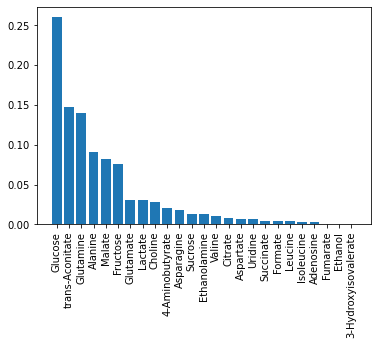

In [ ]:
lynchdict={}
for ii in range(len(sdata)-1):
    lynchdict[list(sdata['Unnamed: 0'])[ii+1]]=list(sdata['Unnamed: 2'])[ii+1]
sortedl=sorted(lynchdict.items(),key=lambda x:x[1],reverse=True)
suml = sum([x[1] for x in sortedl])
plt.bar(range(len(sortedl)),[x[1]/suml for x in sortedl])
temp=plt.xticks(range(len(sortedl)),[x[0] for x in sortedl],rotation=90)

['Isoleucine'] 0.2153569235950431
['Sucrose'] 0.9154252243691497
['Glutamine'] 10.106990936937928
['Glucose'] 18.78369139917533
['trans-Aconitate', 'Citrate'] 11.153694778675753
['Fumarate'] 0.03337397972276653
['Glutamate'] 2.243970351600145
['Asparagine'] 1.3202726074092366
['Alanine'] 6.596971089092725
['Valine'] 0.7815470032270024
['Fructose'] 5.455572216798678
['Malate'] 5.899001634297329
['4-Aminobutyrate'] 1.461194555965118


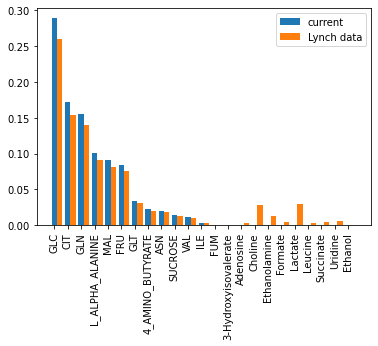

In [ ]:
l_to_model={
    'trans-Aconitate': 'CIT',
    'Glucose':'GLC',
    'Glutamine':'GLN',
    'Alanine':'L_ALPHA_ALANINE',
    'Malate':'MAL',
    'Fructose':'FRU',
    'Glutamate':'GLT',
    'Asparagine':'ASN',
    # 'Lactate':'L_LACTATE',
    'Sucrose':'SUCROSE',
    '4-Aminobutyrate':'4_AMINO_BUTYRATE',
    'Valine':'VAL',
    'Aspartate':'L_ASPARTATE',
    # 'Leucine':'LEU',
    'Citrate':'CIT',
    'Isoleucine':'ILE',
    'Fumarate':'FUM'
}
sumsbdict=sum([x[1] for x in sortedsb])
y1sb = {}
y2ly = {}
for ii in list(sbdict.keys())+list(lynchdict.keys()):
    if ii in sbdict.keys():
        y1sb[ii]=sbdict[ii]
    elif ii not in list(l_to_model.keys()):
        y1sb[ii]=0
    if '_'.join(ii.split('_')[:-2]) in list(l_to_model.values()):
        lykey = [x for x in list(l_to_model.keys()) if l_to_model[x]=='_'.join(ii.split('_')[:-2])]
        y2ly[ii]=sum([lynchdict[x] for x in lykey])
        print(lykey, sum([lynchdict[x] for x in lykey]))
    elif ii in list(lynchdict.keys()):
        y2ly[ii]=lynchdict[ii]
    else:
        # print('_'.join(ii.split('_')[:-2]), list(l_to_model.values()))
        y2ly[ii]=0
sortedsb = sorted(y1sb.items(),key=lambda x:x[1],reverse=True)
plt.bar(np.arange(len(sortedsb)),[x[1]/sumsbdict for x in sortedsb],width=width)
plt.bar(np.arange(len(sortedsb))+width,[y2ly[x[0]]/suml for x in sortedsb],width=width)
temp=plt.xticks(range(len(sortedsb)),['_'.join(x[0].split('_')[:-2]) if x[0] in sbdict.keys() else x[0] for x in sortedsb],rotation=90)
# plt.ylim(0,2)
plt.legend(['current','Lynch data'])

In [ ]:
for rxn in rmodel.reactions:
    if 'soluble' in rxn.id:
        print(rxn.id, '   ',rxn.reaction)

soluble_biomass_epi00      --> 
soluble_biomass_cor00      --> 
soluble_biomass_cor01      --> 
soluble_biomass_cor02      --> 
soluble_biomass_cor03      --> 
soluble_biomass_cor04      --> 
soluble_biomass_cor05      --> 
soluble_biomass_cor06      --> 
soluble_biomass_cor07      --> 
soluble_biomass_end00      --> 
soluble_biomass_per00      --> 
soluble_biomass_tissue     0.0782640711807921 4_AMINO_BUTYRATE_b_tissue + 0.0600589625201899 ASN_b_tissue + 0.878889892905373 CIT_b_tissue + 1.86489235724427 FRU_b_tissue + 0.00340006336379793 FUM_b_tissue + 2.05448400169609 GLC_b_tissue + 0.0435465316692712 GLN_b_tissue + 0.130396168497184 GLT_b_tissue + 0.0180009727871383 GLY_b_tissue + 0.00344712080821492 ILE_b_tissue + 0.0015000983214104 LYS_b_tissue + 0.0585208272824873 L_ALPHA_ALANINE_b_tissue + 0.17925836600129 L_ASPARTATE_b_tissue + 0.135233529659136 MAL_b_tissue + 0.0196487152523661 MET_b_tissue + 0.0639152854553056 PHE_b_tissue + 0.0382990266331706 PRO_b_tissue + 0.032258276714195

In [ ]:
for met in rmodel.metabolites:
    if 'VO_' in met.id:
        for rxn in met.reactions:
            if sol[rxn.id]!=0:
                # print(sol[rxn.id],rxn.id, rxn.reaction)
                for bmet in rxn.products:
                    if 'VO_' not in bmet.id:
                        for brxn in bmet.reactions:
                            if sol[brxn.id]*brxn.get_coefficient(bmet.id)<0:
                                print(sol[brxn.id]*brxn.get_coefficient(bmet.id), bmet.id, brxn.id)
                                print('  ', brxn.reaction)

-0.1901807510124878 CIT_b_epi00 CIT_epi00_tissue_biomass
   CIT_b_epi00 --> CIT_b_tissue
-0.46705268440099 TotalSolute_epi00 TotalSoluteConstraint_epi00
   TotalSolute_epi00 --> 
-0.23772593876560974 MGII_b_epi00 MGII_b_biomass_epi00
   MGII_b_epi00 --> 
-0.4754518775312195 VC_epi00 CIT_v_biomass_epi00
   0.5 CIT_v_epi00 + 2.5 VC_epi00 + 0.5 aCIT_v_epi00 --> CIT_b_epi00 + VO_epi00
-0.44689213687289 TotalSolute_cor00 TotalSoluteConstraint_cor00
   TotalSolute_cor00 --> 
-0.13647863247119185 MGII_b_cor00 MGII_b_biomass_cor00
   MGII_b_cor00 --> 
-0.2729572649423837 VC_cor00 NITRATE_v_biomass_cor00
   NITRATE_v_cor00 + VC_cor00 --> NITRATE_b_cor00 + VO_cor00
-0.2729572649423837 NITRATE_b_cor00 NITRATE_b_biomass_cor00
   NITRATE_b_cor00 --> 
-0.08979501801575487 MGII_b_cor01 MGII_b_biomass_cor01
   MGII_b_cor01 --> 
-0.17959003603150975 VC_cor01 CIT_v_biomass_cor01
   0.5 CIT_v_cor01 + 2.5 VC_cor01 + 0.5 aCIT_v_cor01 --> CIT_b_cor01 + VO_cor01
-0.08615293622823503 CIT_b_cor01 CIT_cor01_tis

In [ ]:
printedrxns=[]
for met in rmodel.metabolites:
    if '_b_' in met.id:
        for rxn in met.reactions:
            if (sol[rxn.id]*rxn.get_coefficient(met.id)<0 or solo[rxn.id]*rxn.get_coefficient(met.id)<0) and rxn.id not in printedrxns:
                print(round(sol[rxn.id]*rxn.get_coefficient(met.id),4),round(solo[rxn.id]*rxn.get_coefficient(met.id),4),rxn.id, rxn.lower_bound,rxn.upper_bound)
                print('   ', rxn.reaction)
                printedrxns+=[rxn.id]


-0.0003 -0.0003 Biomass_tx_epi00 0.0 1000.0
    0.2326035201 pALA_b_epi00 + 0.1771733159 pARG_b_epi00 + 0.1447158566 pASN_b_epi00 + 0.3855539754 pASP_b_epi00 + 0.1325494187 pGLN_b_epi00 + 0.2261465373 pGLU_b_epi00 + 0.2309411553 pGLY_b_epi00 + 0.1673732646 pHIS_b_epi00 + 0.1454255314 pILE_b_epi00 + 0.0053400685 pLEU_b_epi00 + 0.3415370304 pLYS_b_epi00 + 0.1420323181 pMET_b_epi00 + 0.1980982902 pPHE_b_epi00 + 0.3368402626 pSER_b_epi00 + 0.2365218861 pTHR_b_epi00 + 0.2071316851 pTYR_b_epi00 + 0.158571619 pVAL_b_epi00 --> Protein_b_epi00
-0.4743 -0.4743 Biomass_expanding_cell_epi00 1.0 1.0
    0.474284237927315 Cellulose_b_epi00 + 0.00775447925401353 L_PHOSPHATIDATE_p_epi00 + 0.00230429728520733 Protein_b_epi00 --> 
-0.0015 -0.0 STARCH_epi00_tissue_biomass 0.0 1000.0
    Starch_b_epi00 --> STARCH_b_tissue
-0.1902 -0.0 CIT_epi00_tissue_biomass 0.0 1000.0
    CIT_b_epi00 --> CIT_b_tissue
-0.0056 -0.0 GLT_epi00_tissue_biomass 0.0 1000.0
    GLT_b_epi00 --> GLT_b_tissue
-0.0205 -0.0412 L_ASPA

In [ ]:
printedrxns=[]
for met in rmodel.metabolites:
    if 'tissue' in met.id:
        for rxn in met.reactions:
            if sol[rxn.id]*rxn.get_coefficient(met.id)<0 and rxn.id not in printedrxns:
                print(round(sol[rxn.id]*rxn.get_coefficient(met.id),4),rxn.id)
                print('   ', rxn.reaction)
                printedrxns+=[rxn.id]


-0.0013 soluble_biomass_tissue
    0.0782640711807921 4_AMINO_BUTYRATE_b_tissue + 0.0600589625201899 ASN_b_tissue + 0.878889892905373 CIT_b_tissue + 1.86489235724427 FRU_b_tissue + 0.00340006336379793 FUM_b_tissue + 2.05448400169609 GLC_b_tissue + 0.0435465316692712 GLN_b_tissue + 0.130396168497184 GLT_b_tissue + 0.0180009727871383 GLY_b_tissue + 0.00344712080821492 ILE_b_tissue + 0.0015000983214104 LYS_b_tissue + 0.0585208272824873 L_ALPHA_ALANINE_b_tissue + 0.17925836600129 L_ASPARTATE_b_tissue + 0.135233529659136 MAL_b_tissue + 0.0196487152523661 MET_b_tissue + 0.0639152854553056 PHE_b_tissue + 0.0382990266331706 PRO_b_tissue + 0.0322582767141952 SER_b_tissue + 0.004 STARCH_b_tissue + 0.183948503693606 SUCROSE_b_tissue + 0.0112658684869911 THR_b_tissue + 0.00647935009629252 TRP_b_tissue + 0.0603615725116433 TYR_b_tissue + 0.0596305954212679 VAL_b_tissue --> 


In [ ]:
mapSink(rmodel,sol,'MGII_c_epi00',7)

KeyError: 'AMMONIUM_c_biomass_cor00'

In [ ]:
for met in rmodel.metabolites:
    if 'MG' in met.id:
        for rxn in met.reactions:
            if sol[rxn.id]!=0:
                print(sol[rxn.id],rxn.id,'    ', rxn.reaction)

0.9229449422268204 Mg_ec_epi00      MGII_e_epi00 --> MGII_c_epi00
0.9229449422268204 Mg_tx_epi00       <=> MGII_e_epi00
0.9229449422268204 Mg_ec_epi00      MGII_e_epi00 --> MGII_c_epi00
0.23772593876560974 MG2_rev_vc_epi00      MGII_c_epi00 + 2.0 PROTON_v_epi00 --> MGII_v_epi00 + 2.0 PROTON_c_epi00
0.6852190034612107 MGII_c_epi00_apoplast_exchange_ap1      MGII_c_epi00 <=> MGII_ap1
0.23772593876560974 MG2_rev_vc_epi00      MGII_c_epi00 + 2.0 PROTON_v_epi00 --> MGII_v_epi00 + 2.0 PROTON_c_epi00
0.23772593876560974 MGII_v_biomass_epi00      MGII_v_epi00 --> MGII_b_epi00 + 2.0 VC_epi00 + VO_epi00
0.23772593876560974 MGII_b_biomass_epi00      MGII_b_epi00 --> 
0.23772593876560974 MGII_v_biomass_epi00      MGII_v_epi00 --> MGII_b_epi00 + 2.0 VC_epi00 + VO_epi00
0.11039329413940974 MG2_rev_vc_cor00      MGII_c_cor00 + 2.0 PROTON_v_cor00 --> MGII_v_cor00 + 2.0 PROTON_c_cor00
0.11039329413940974 MGII_v_biomass_cor00      MGII_v_cor00 --> MGII_b_cor00 + 2.0 VC_cor00 + VO_cor00
0.012917759056827

In [ ]:
for rxn in rmodel.metabolites.VO_epi00.reactions:
    print(rxn.id, rxn.reaction)

ASN_v_biomass_epi00 ASN_v_epi00 --> ASN_b_epi00 + VO_epi00
PRO_v_biomass_epi00 PRO_v_epi00 --> PRO_b_epi00 + VO_epi00
VacCytRatio_epi00 CO_epi00 + 10.9310465578989 VO_epi00 --> 11.9310465578989 TotalSolute_epi00
MET_v_biomass_epi00 MET_v_epi00 --> MET_b_epi00 + VO_epi00
SER_v_biomass_epi00 SER_v_epi00 --> SER_b_epi00 + VO_epi00
SUCROSE_v_biomass_epi00 SUCROSE_v_epi00 --> SUCROSE_b_epi00 + VO_epi00
TRP_v_biomass_epi00 TRP_v_epi00 --> TRP_b_epi00 + VO_epi00
CAII_v_biomass_epi00 CAII_v_epi00 --> CAII_b_epi00 + 2.0 VC_epi00 + VO_epi00
FRU_v_biomass_epi00 FRU_v_epi00 --> FRU_b_epi00 + VO_epi00
GLC_v_biomass_epi00 GLC_v_epi00 --> GLC_b_epi00 + VO_epi00
GLY_v_biomass_epi00 GLY_v_epi00 --> GLY_b_epi00 + VO_epi00
KI_v_biomass_epi00 KI_v_epi00 --> KI_b_epi00 + VC_epi00 + VO_epi00
ILE_v_biomass_epi00 ILE_v_epi00 --> ILE_b_epi00 + VO_epi00
LYS_v_biomass_epi00 LYS_v_epi00 --> LYS_b_epi00 + VC_epi00 + VO_epi00
THR_v_biomass_epi00 THR_v_epi00 --> THR_b_epi00 + VO_epi00
L_ASPARTATE_v_biomass_epi00 L_A

# End